In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset

In [2]:
import os
os.chdir('d:/Datasets/')

In [3]:
import pandas as pd
df = pd.read_csv('training_set.csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
s = df.isna().sum()
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Decide categorical strategy as constant - fill value with notAvailable

## EDA (Exploratory Data Analysis)

In [7]:
df = df.drop(columns=['Id'])
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## Seperate cat and con features

In [8]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [9]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## Univariate Anlaysis
1. Cat - countplot
2. con - histogram

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

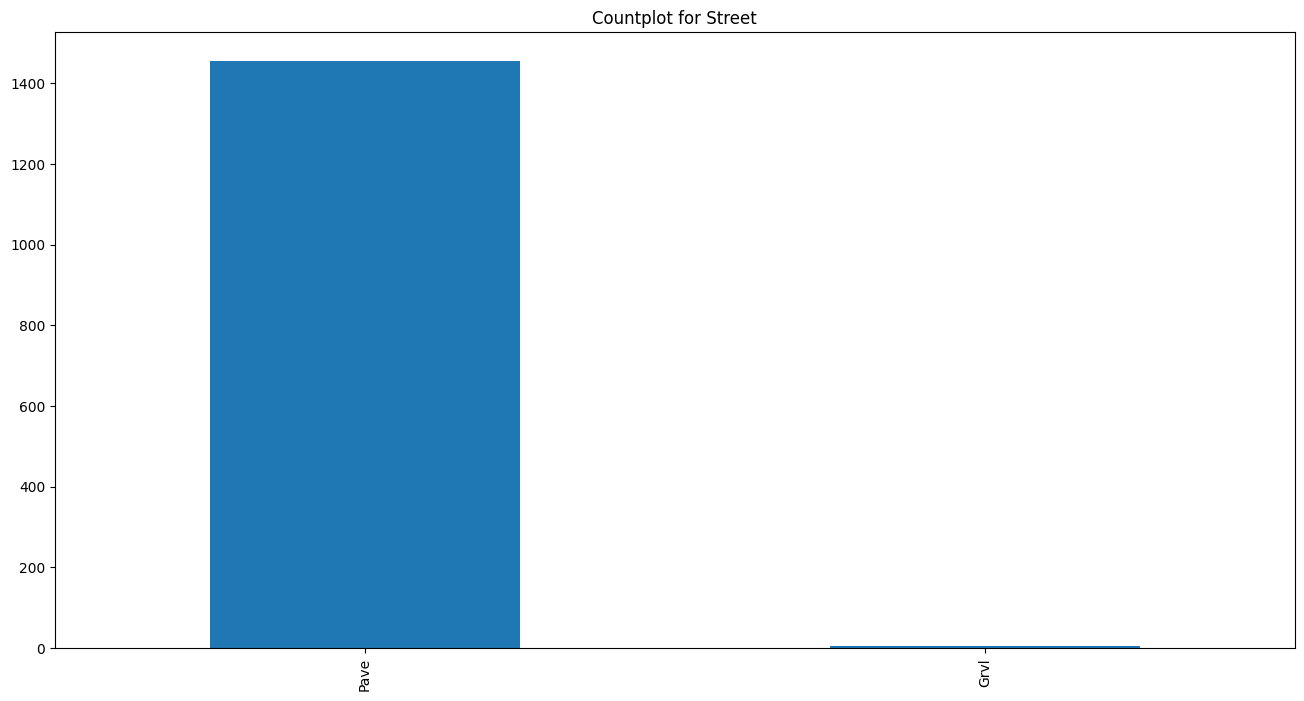

In [13]:
df['Street'].value_counts().plot(kind='bar',
                                 title='Countplot for Street',
                                 figsize=(16,8))
plt.show()

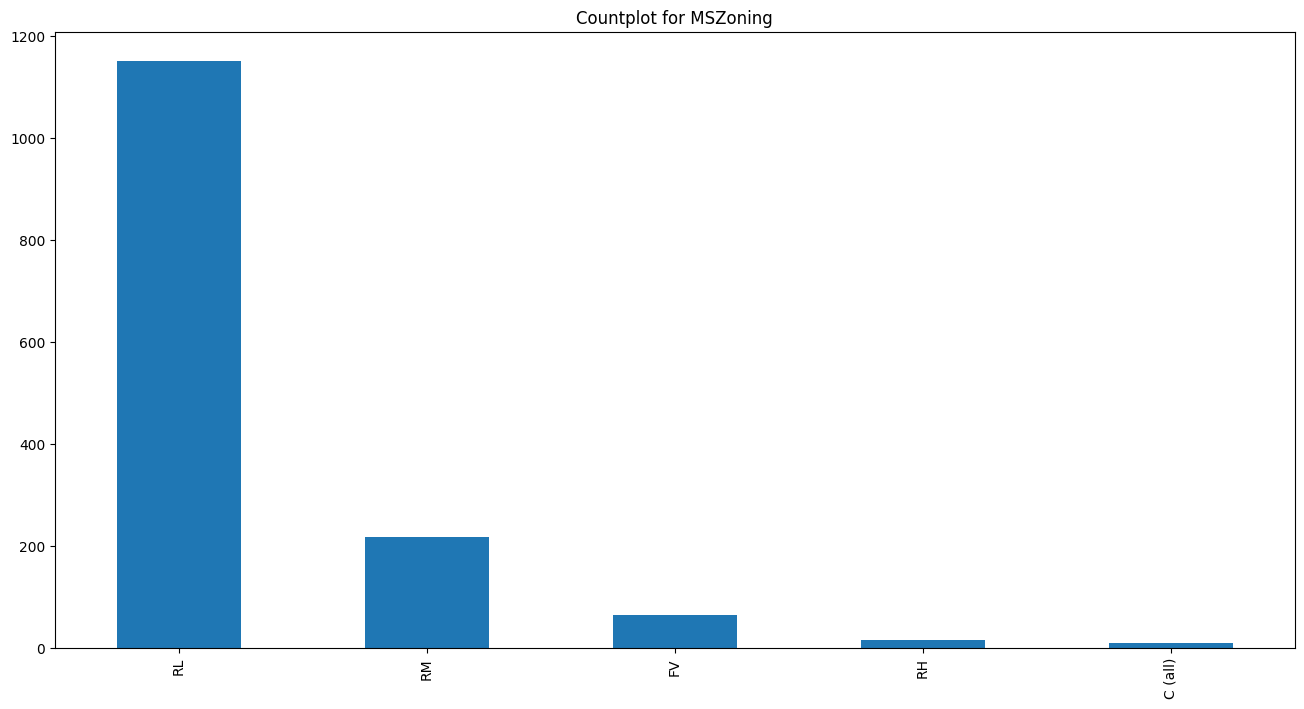

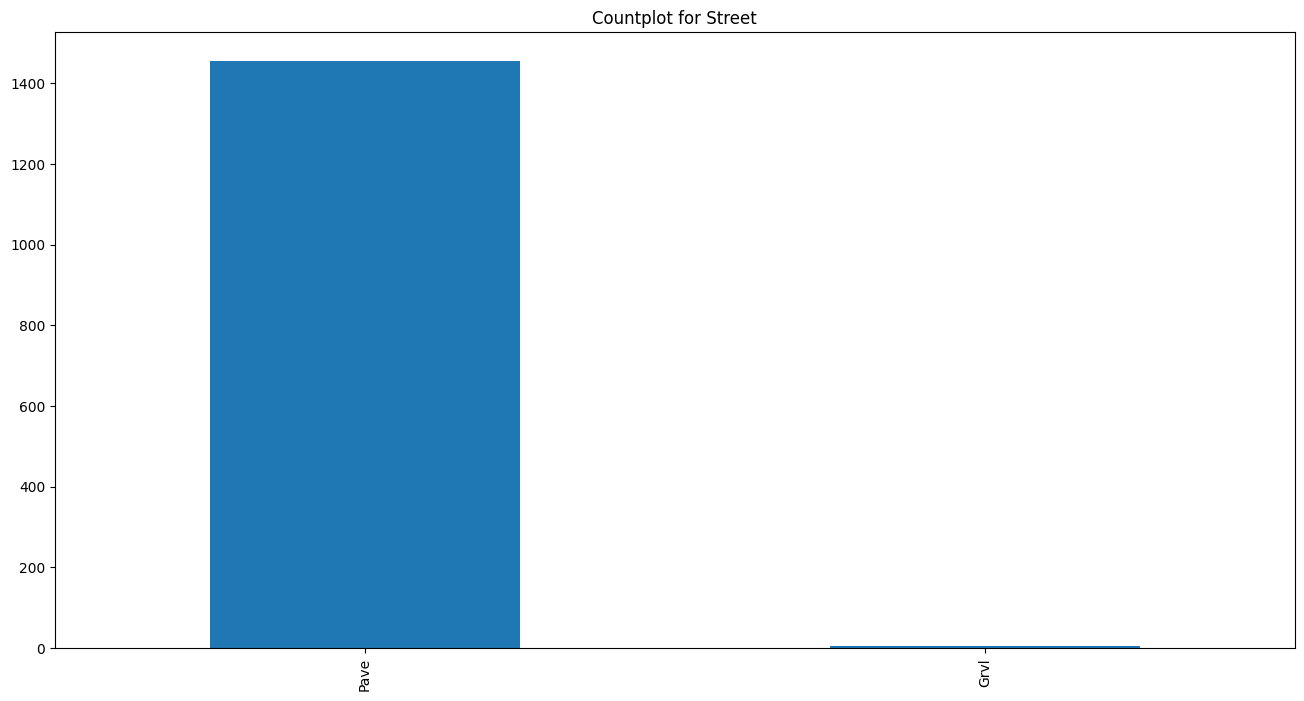

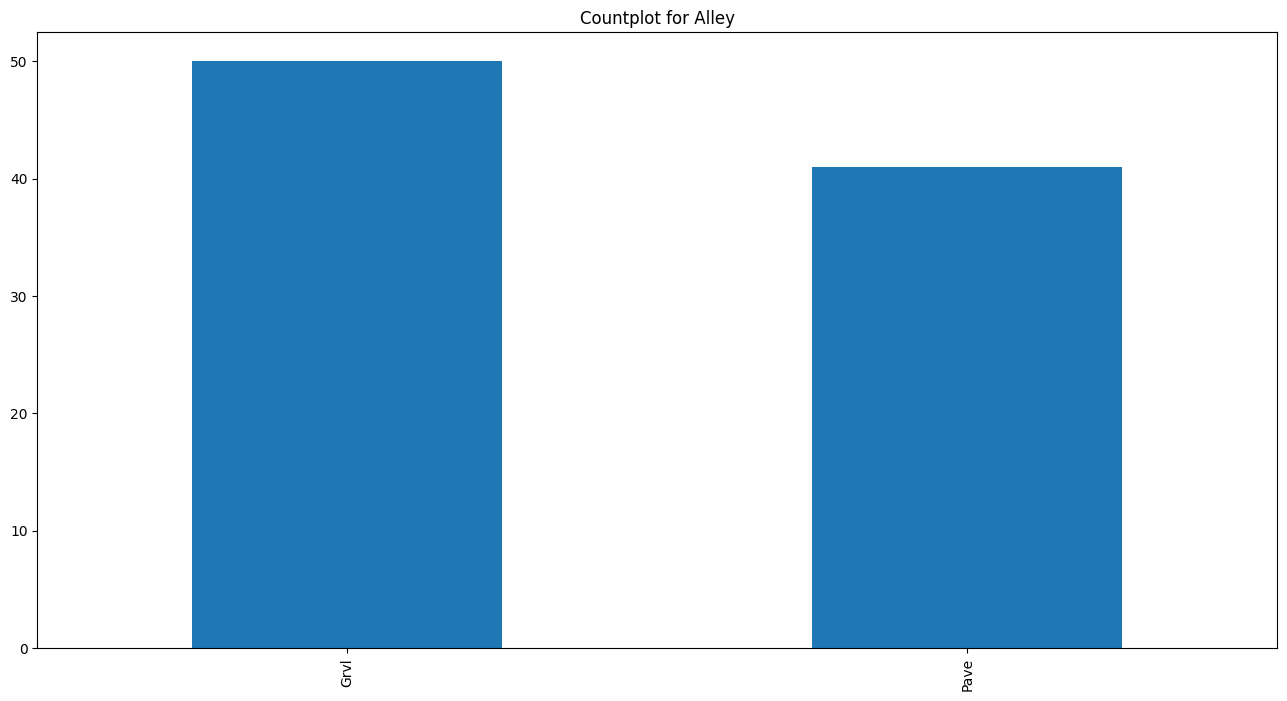

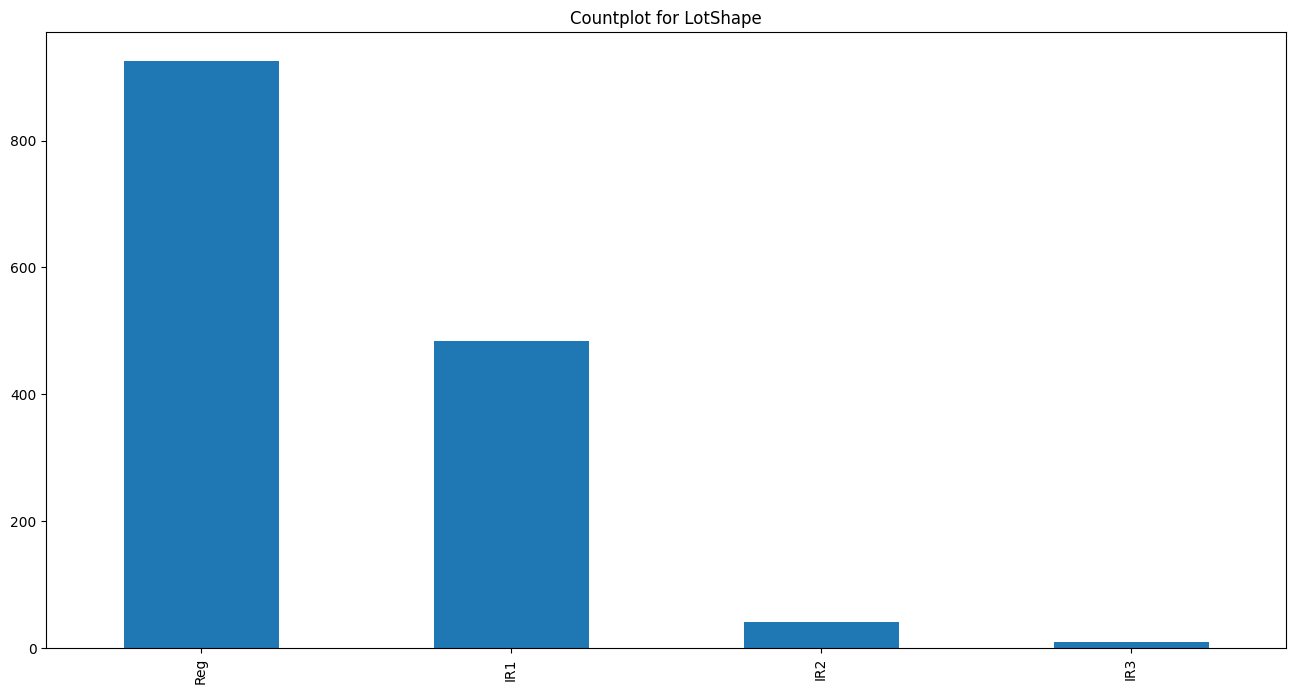

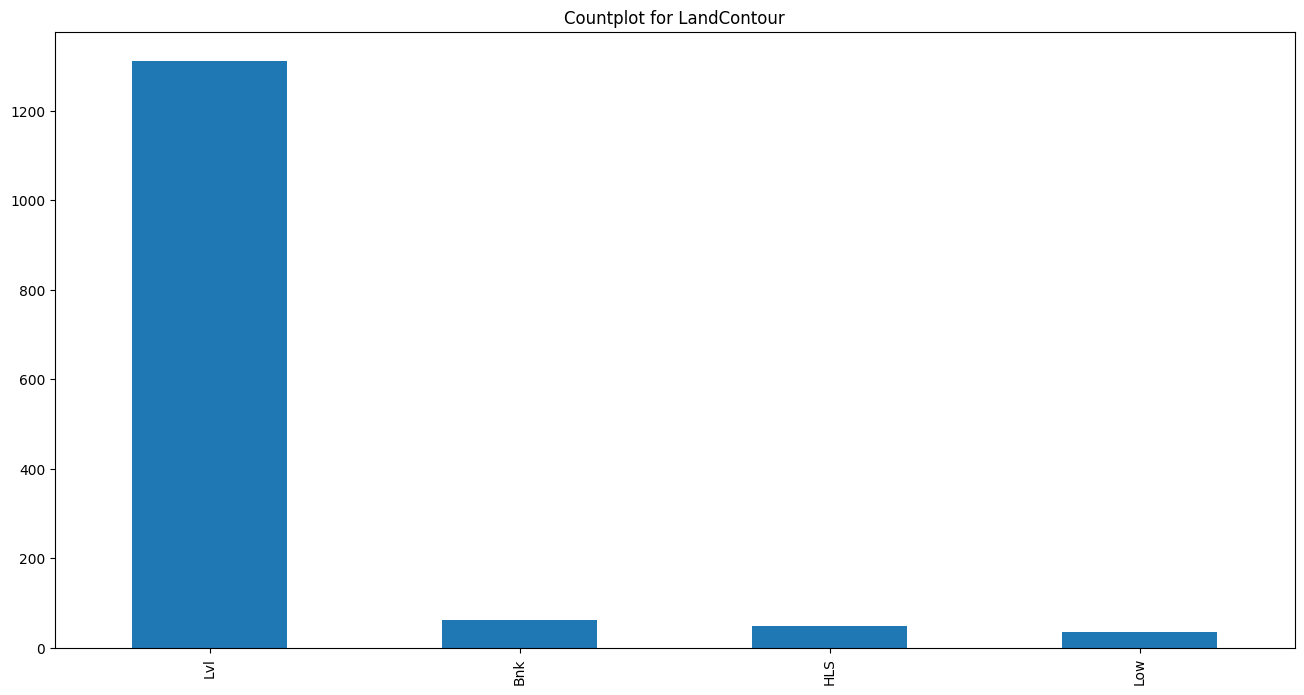

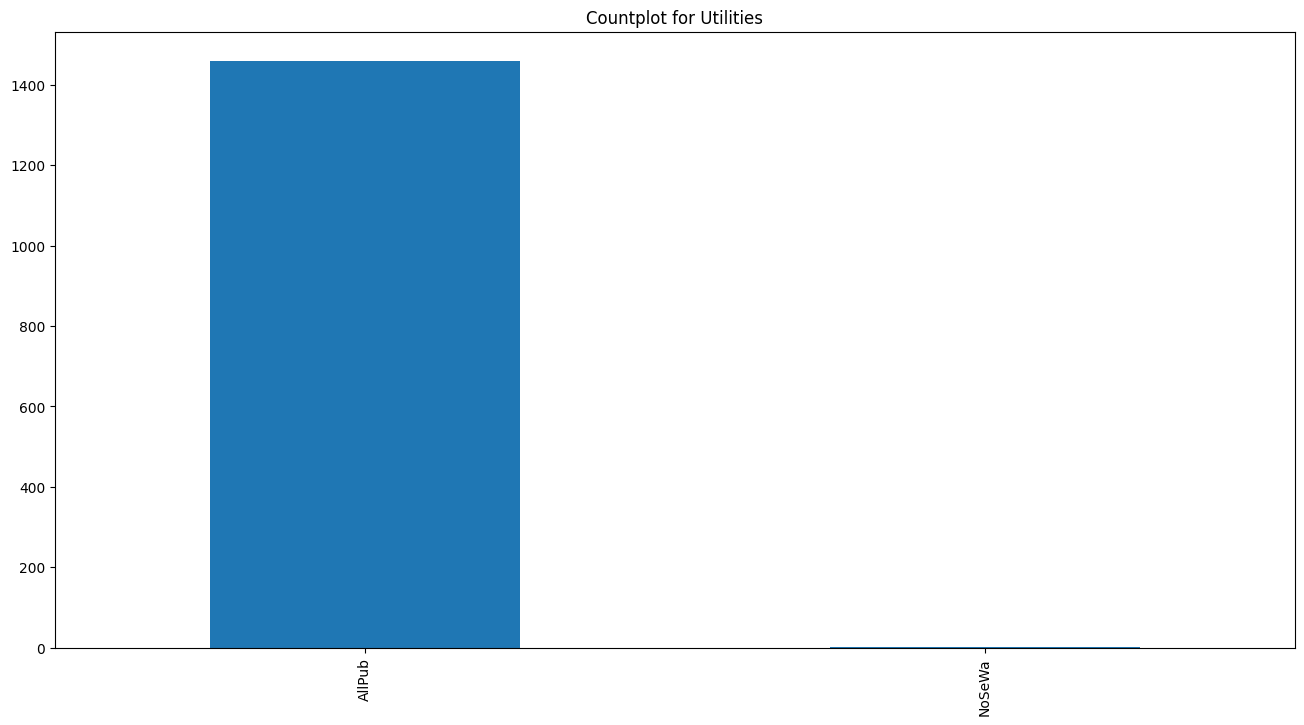

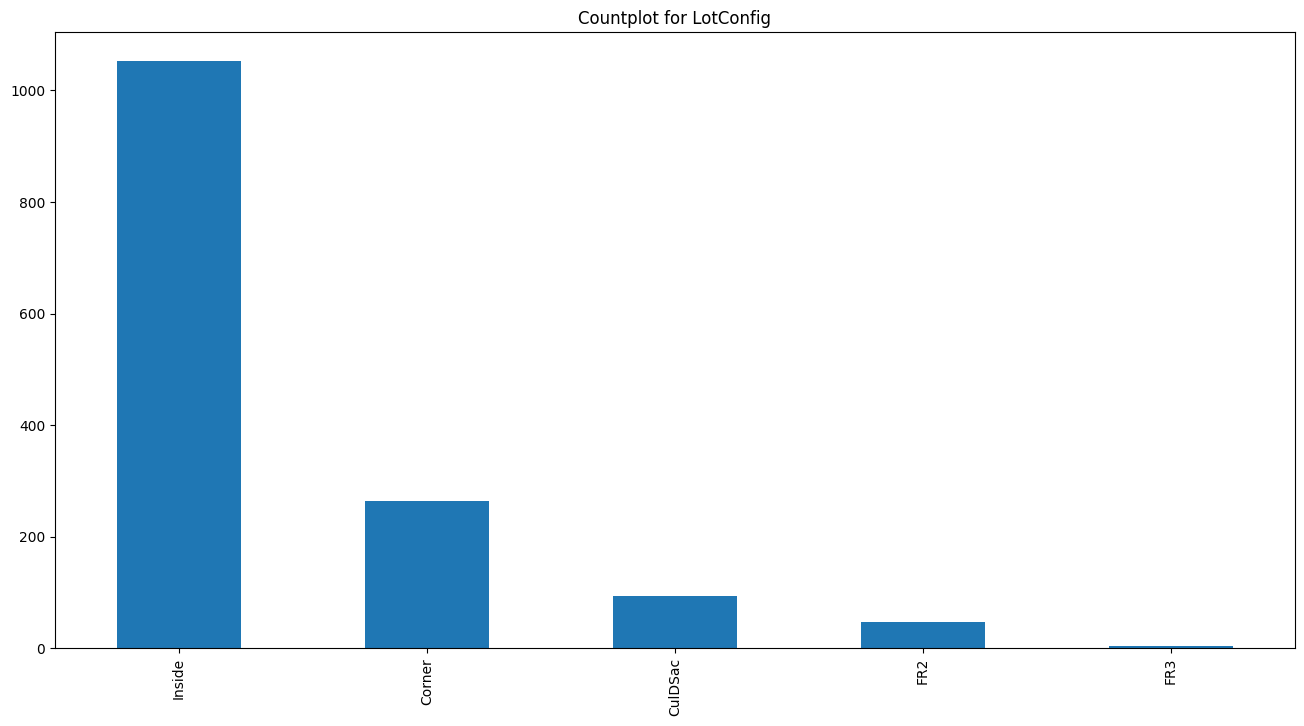

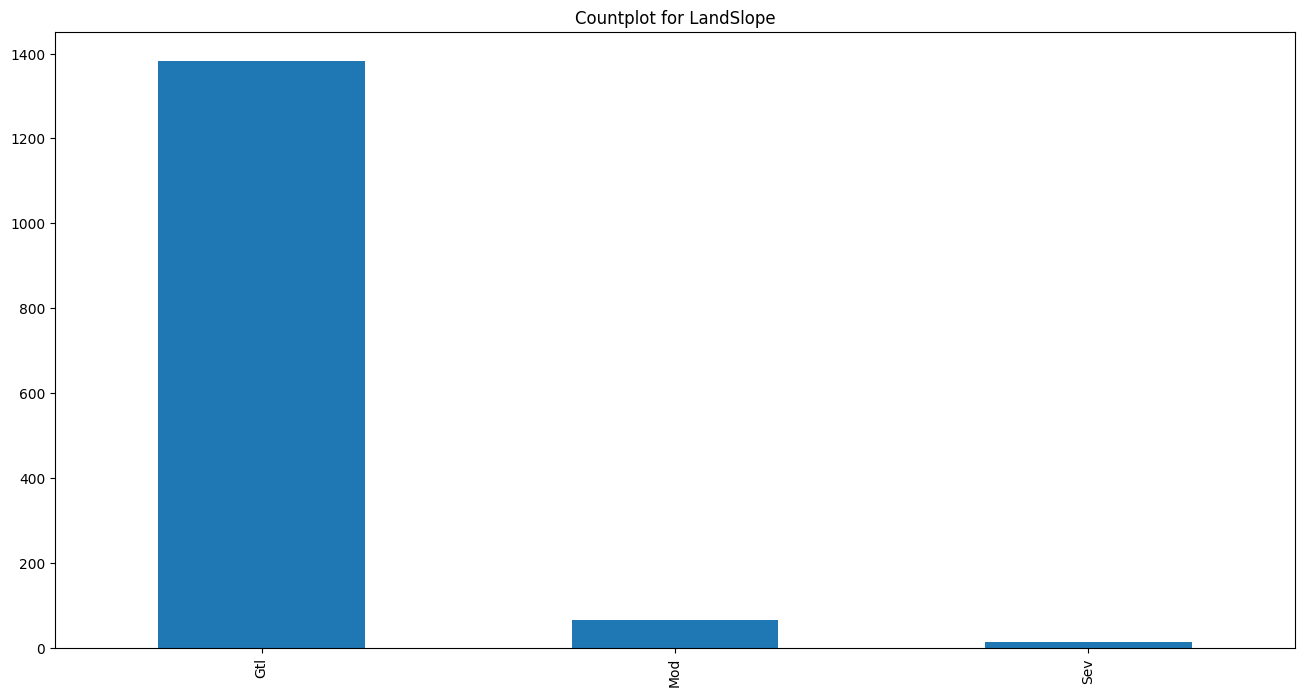

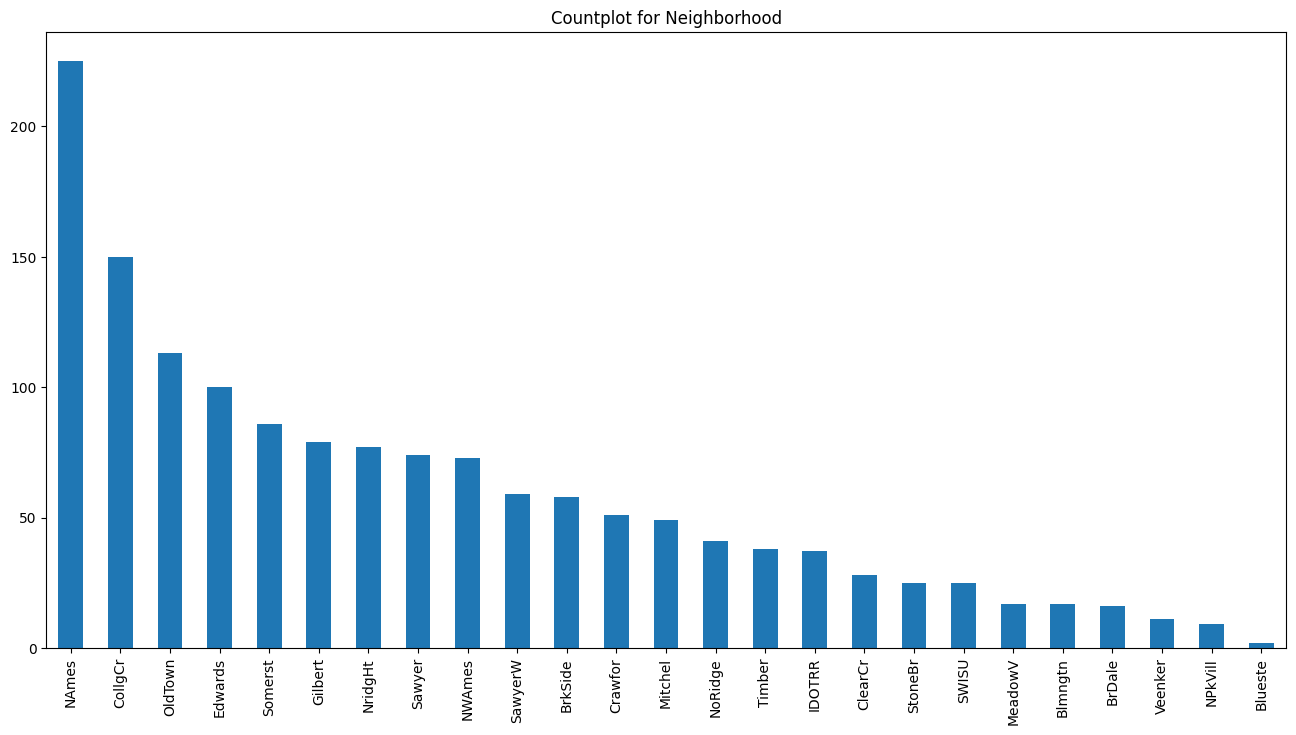

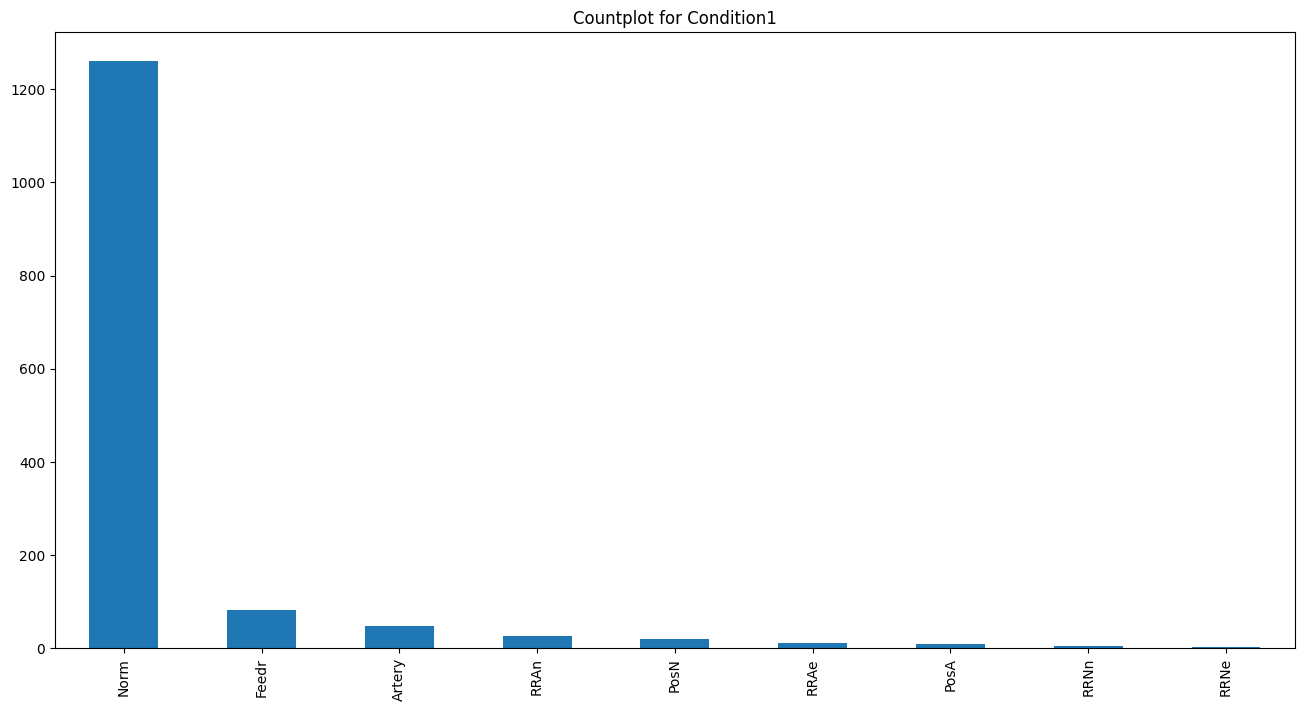

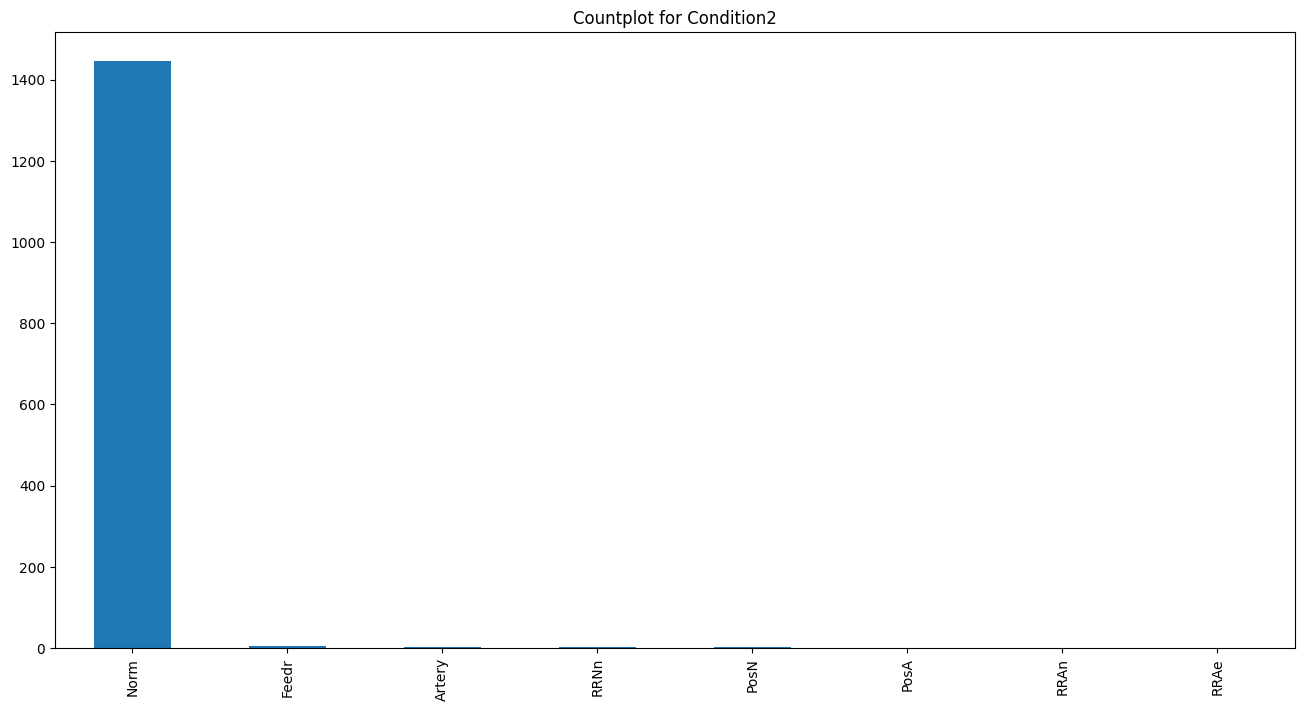

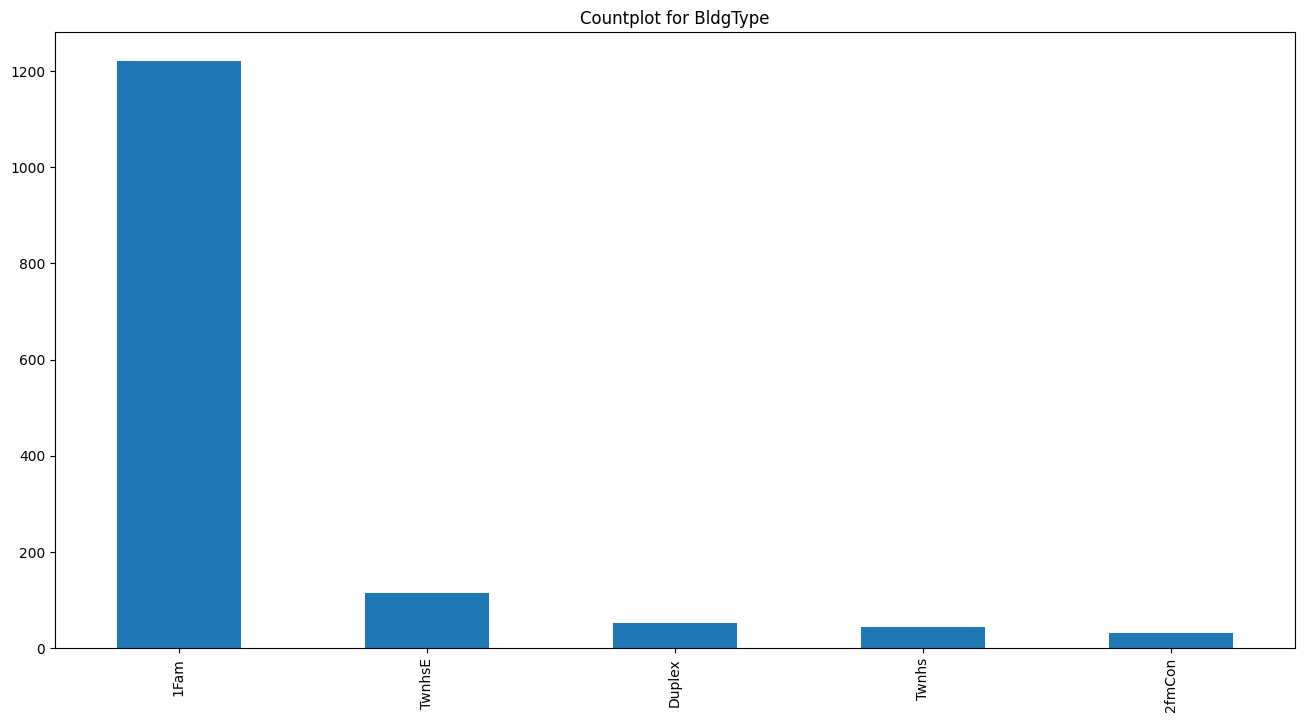

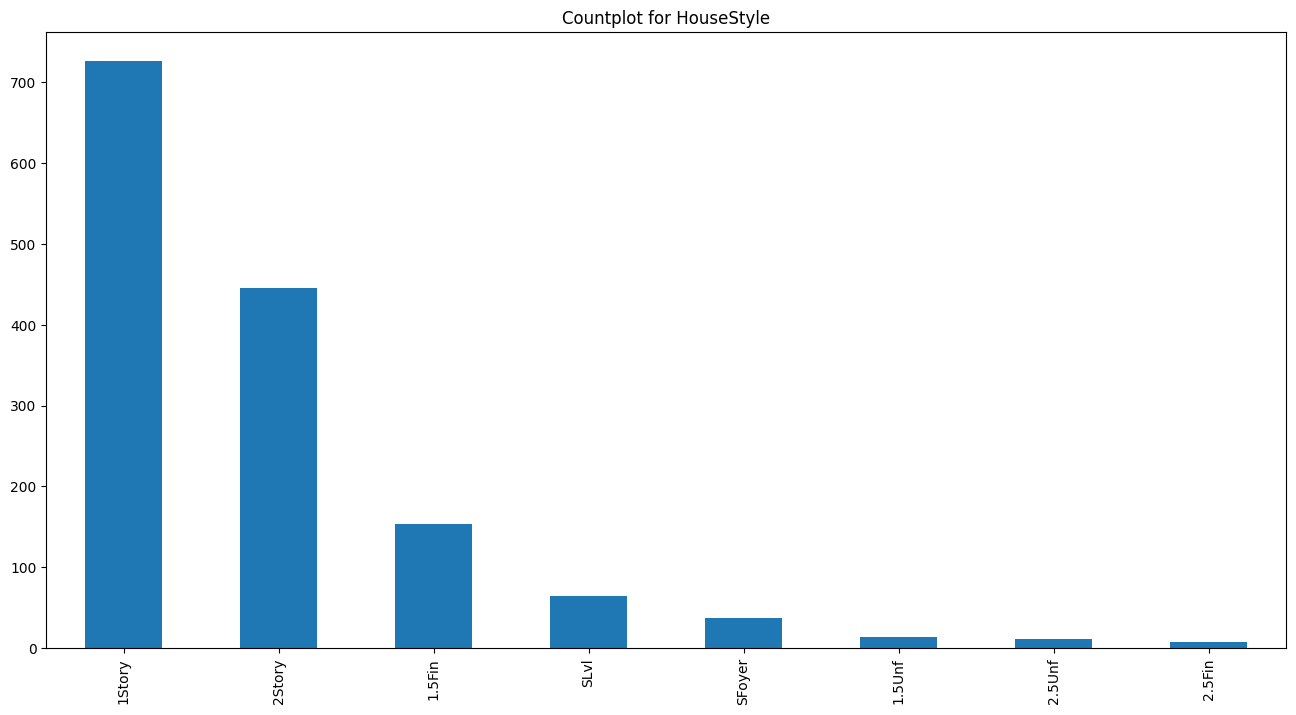

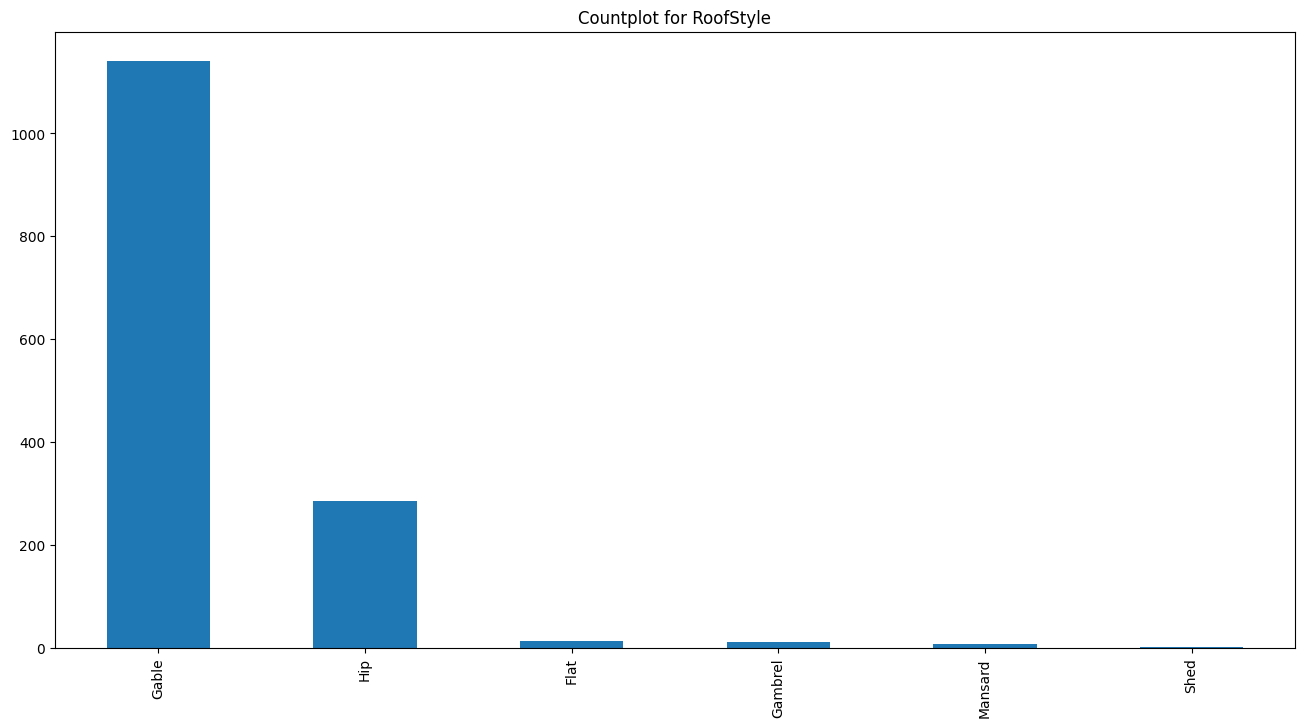

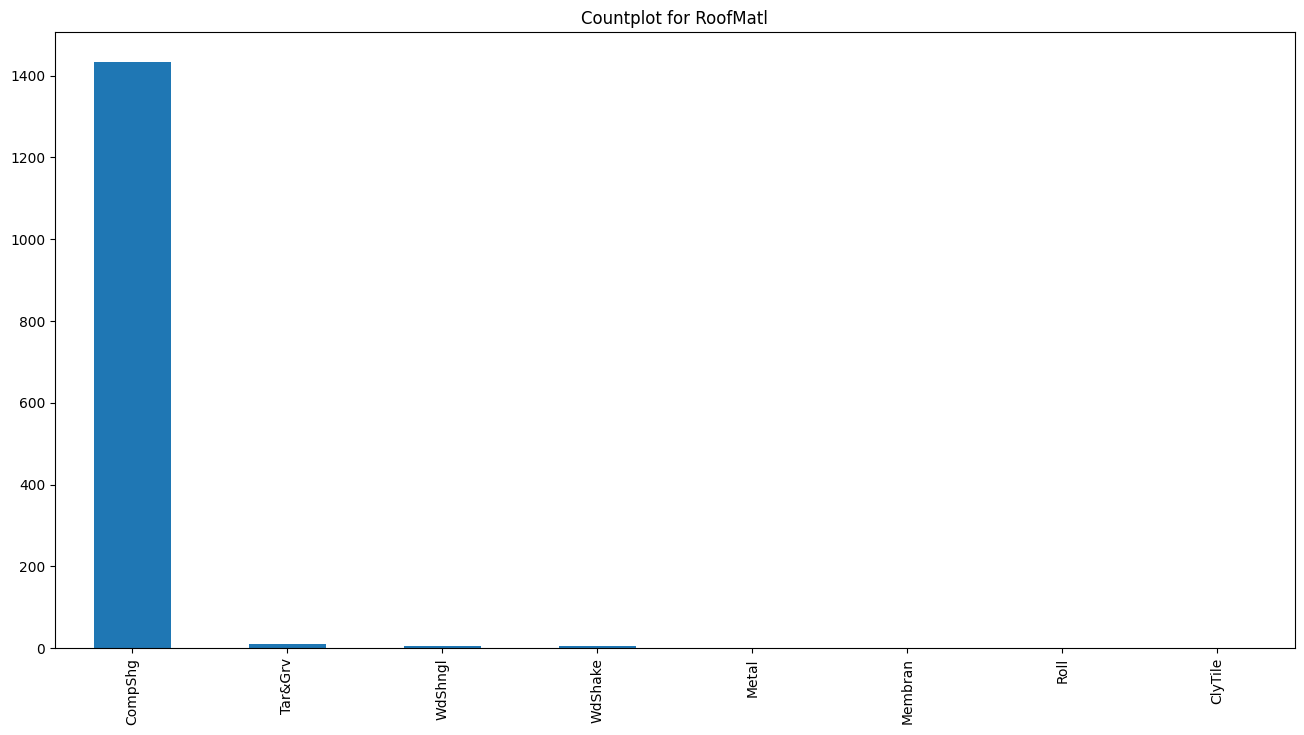

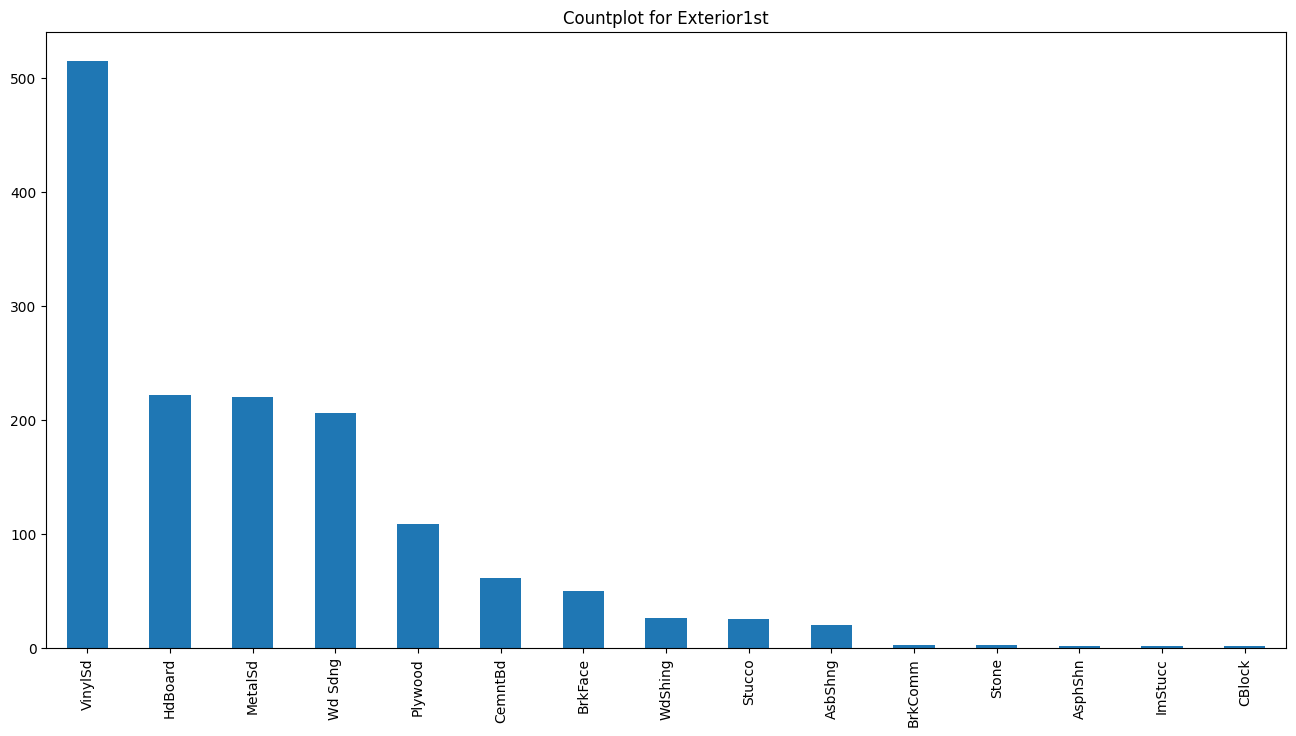

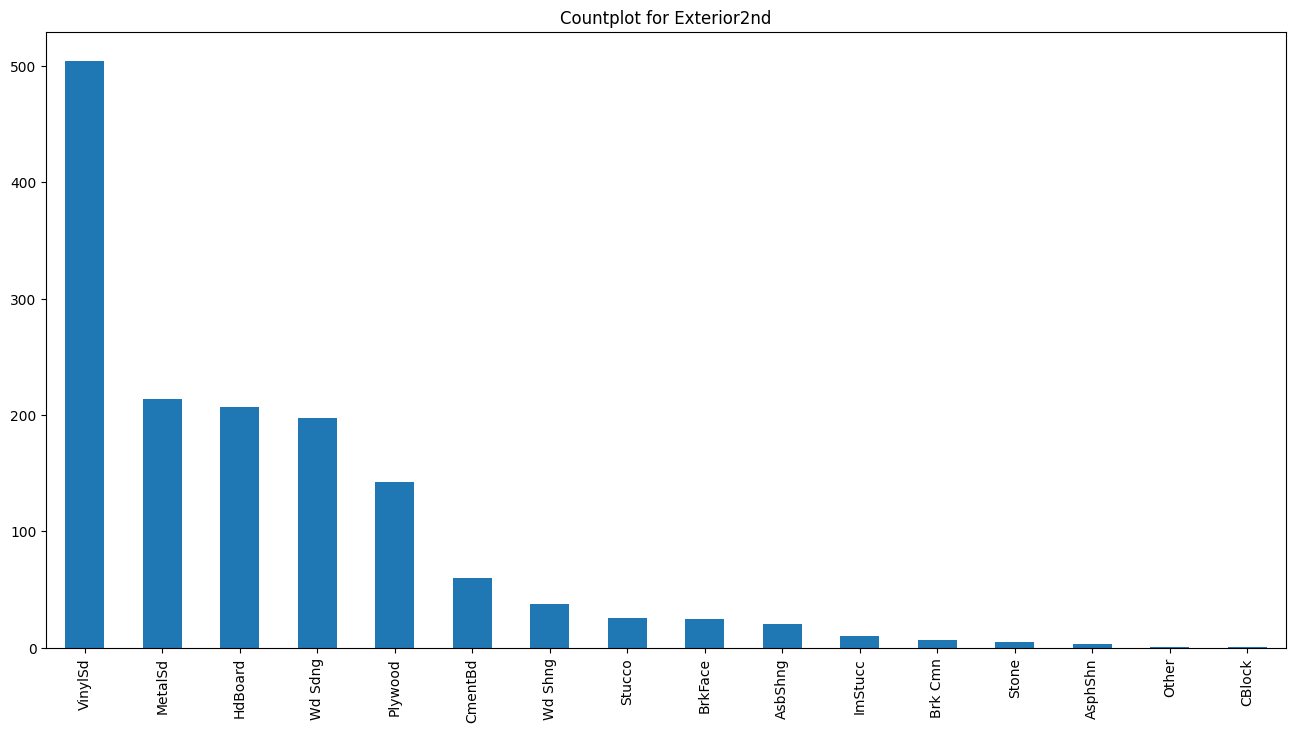

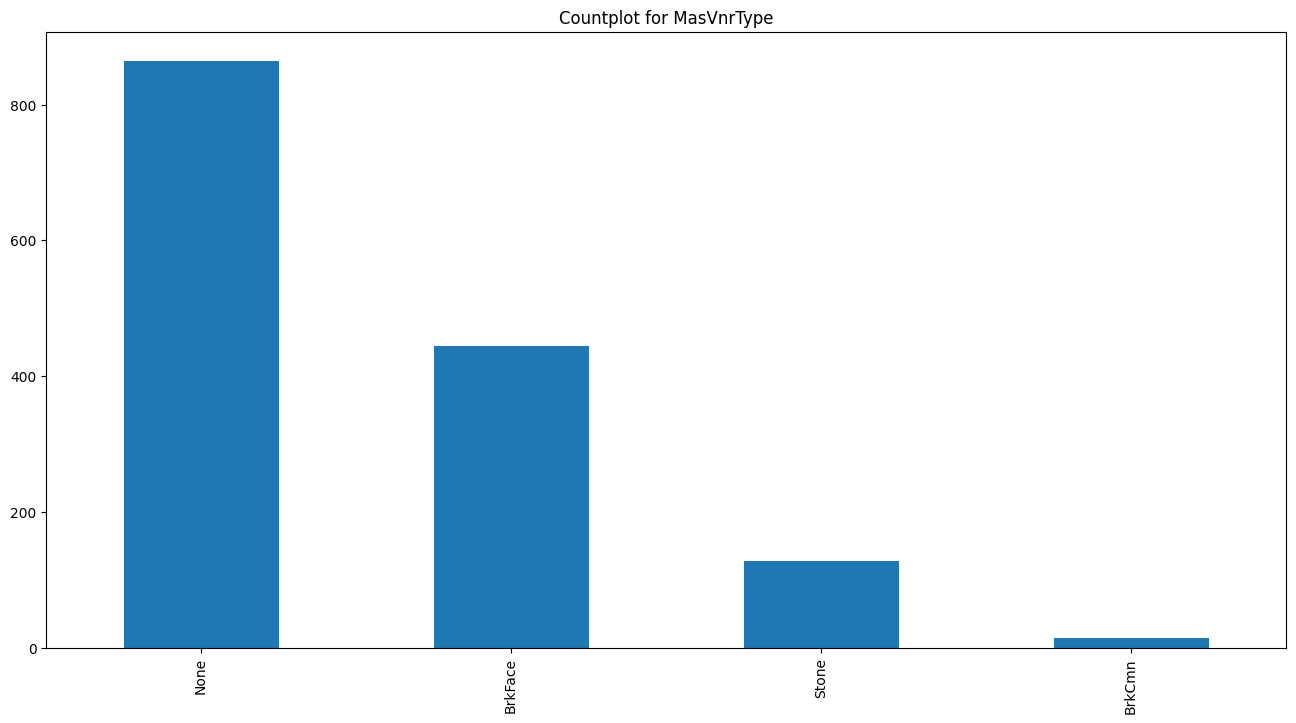

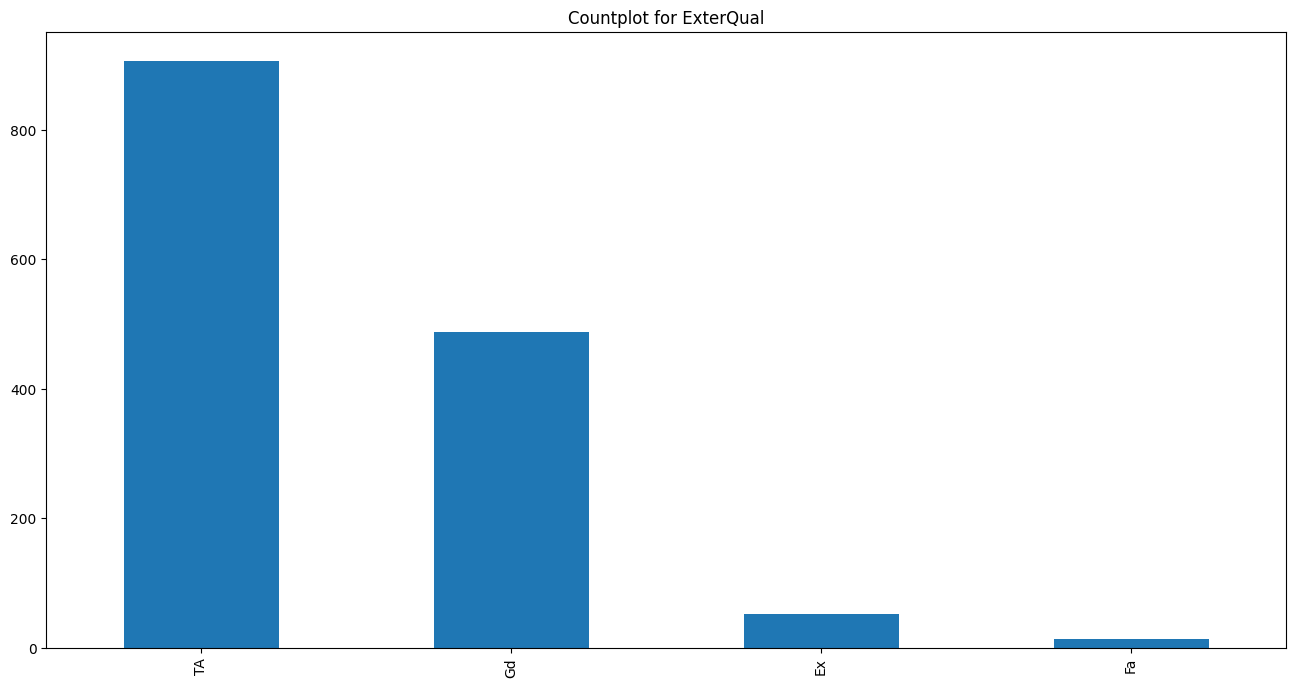

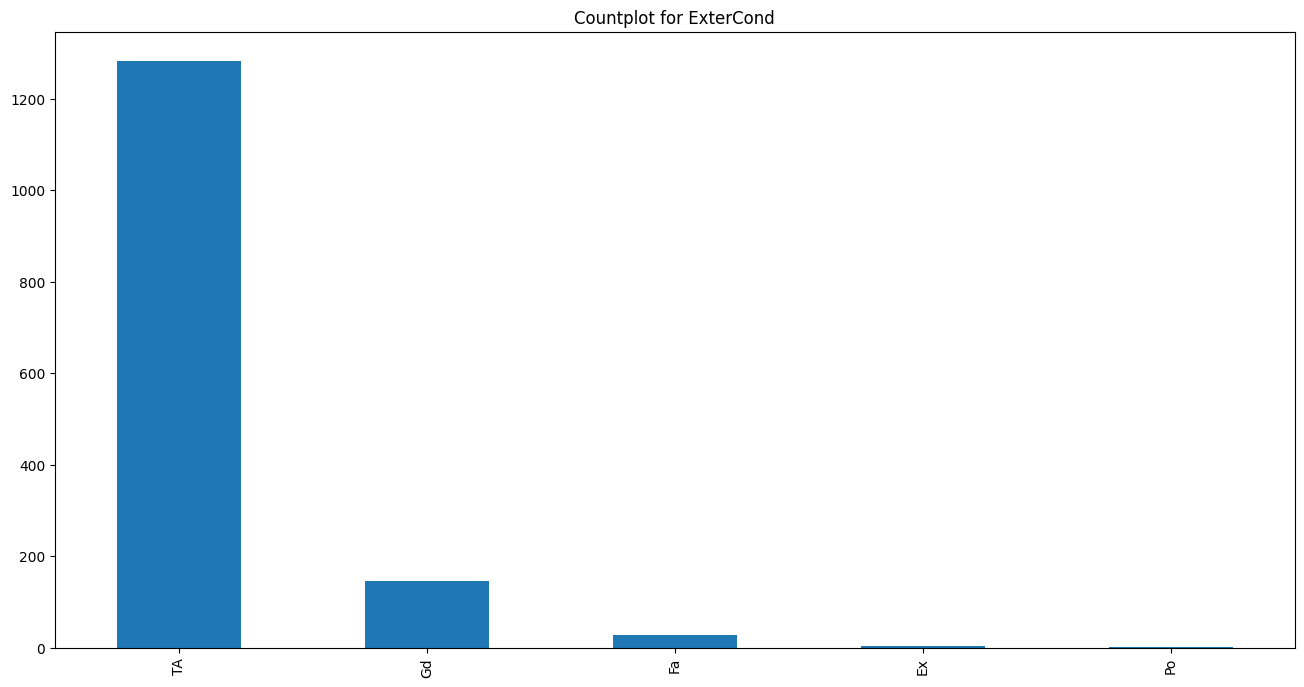

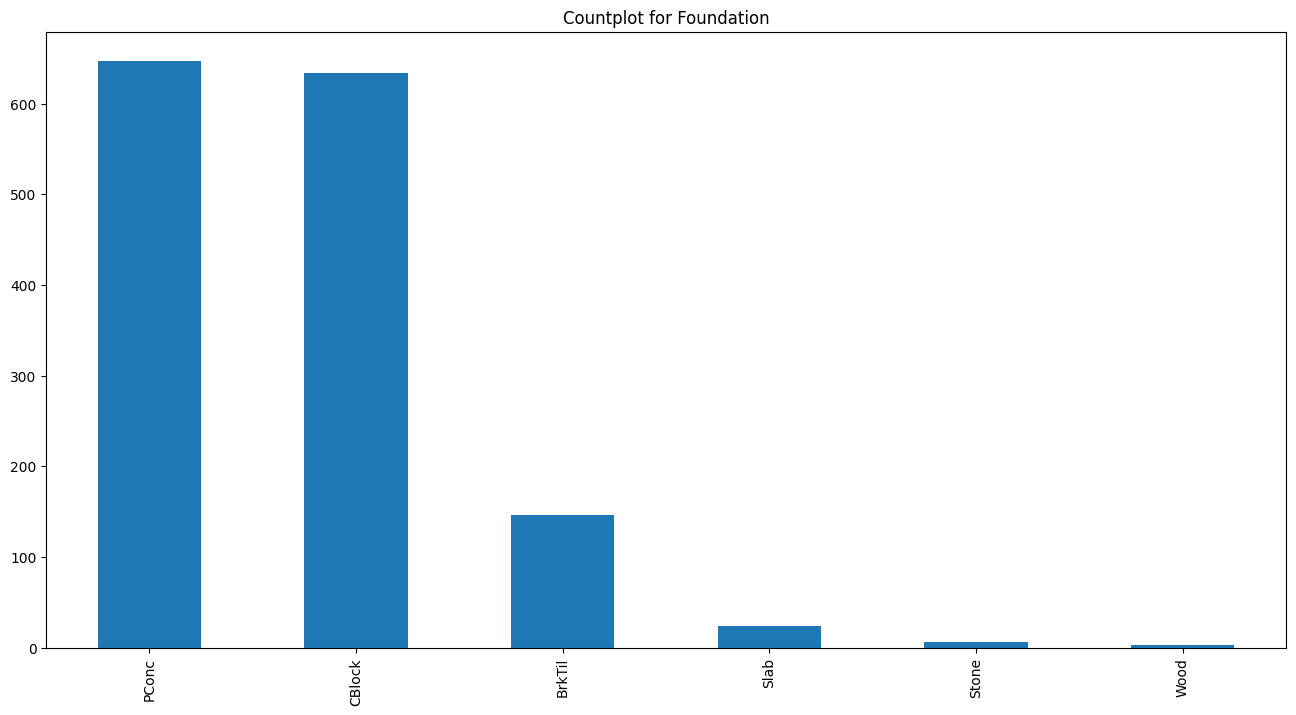

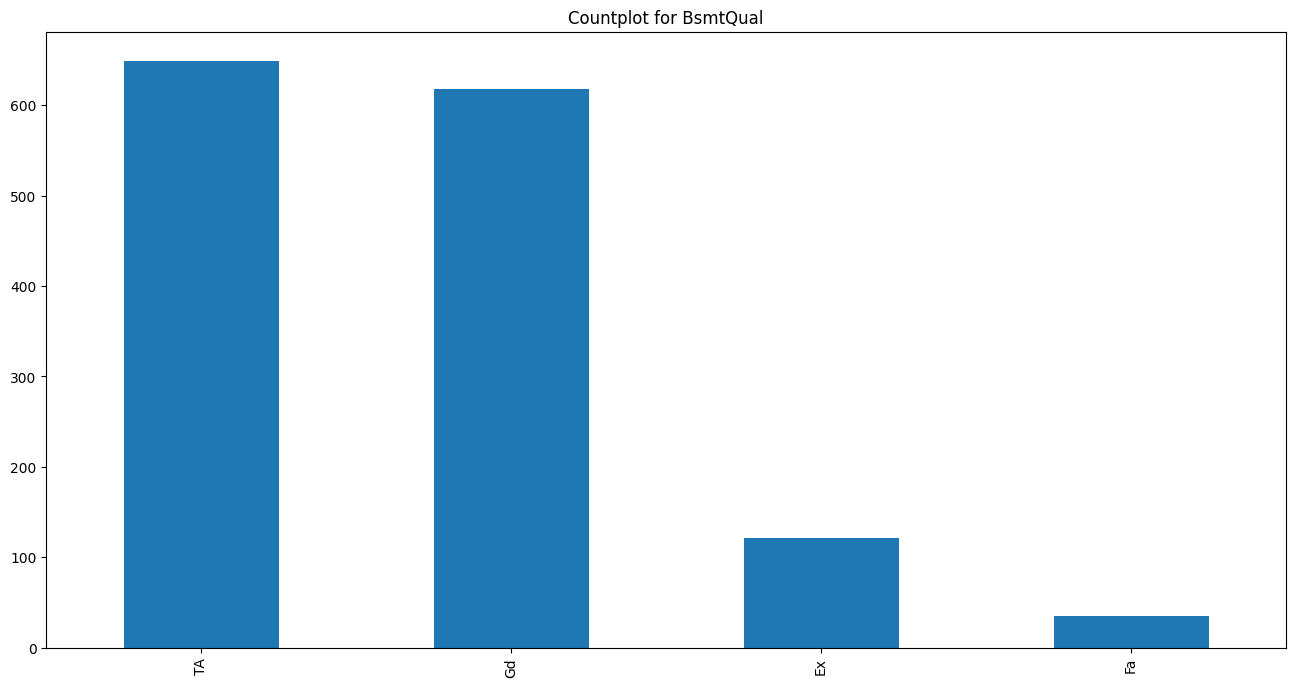

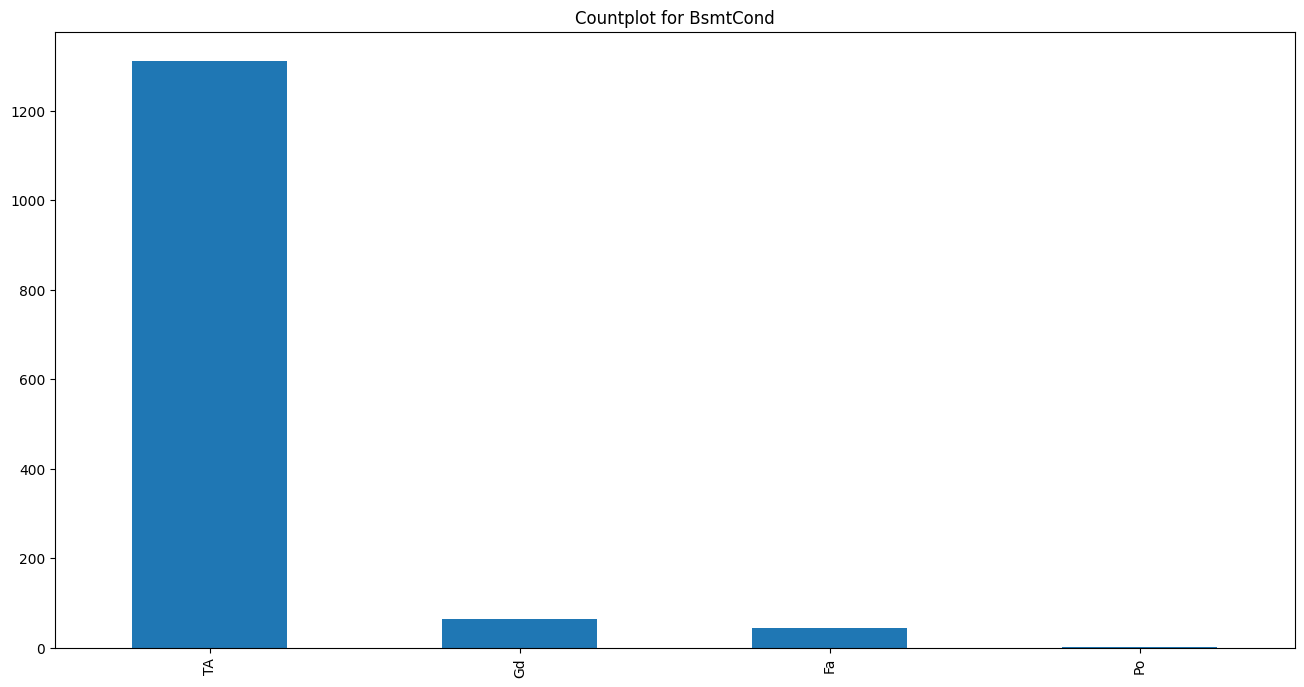

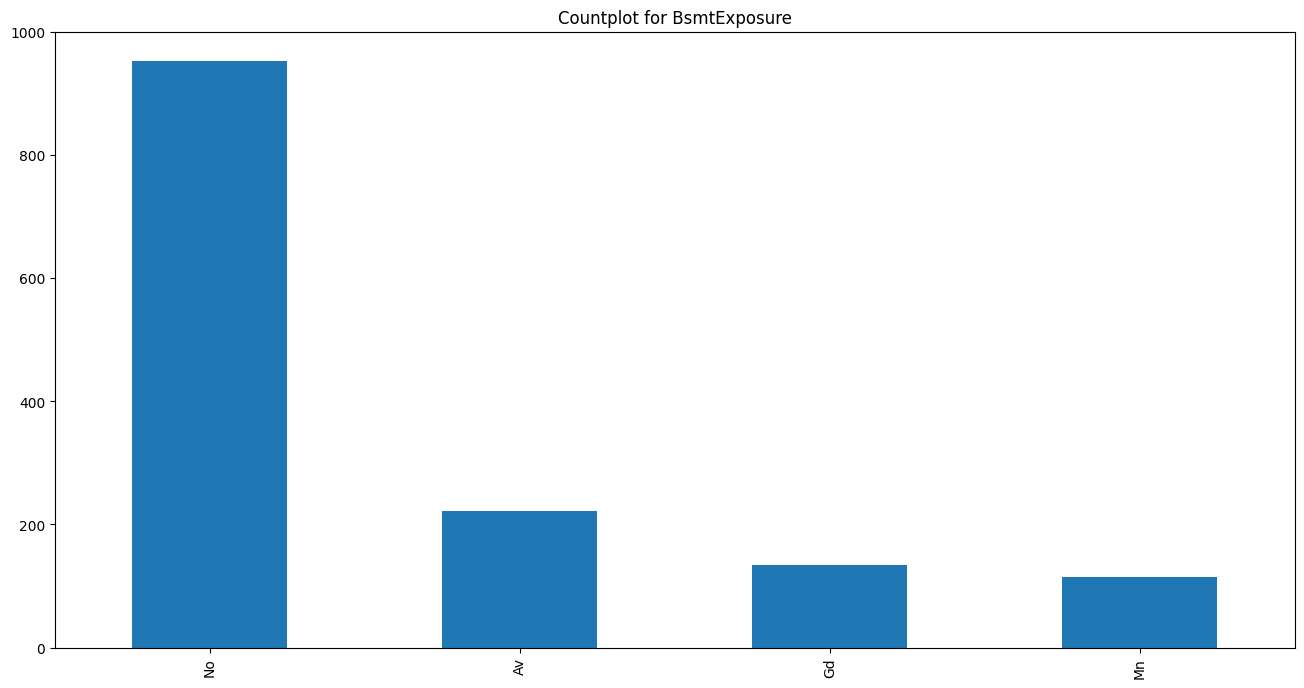

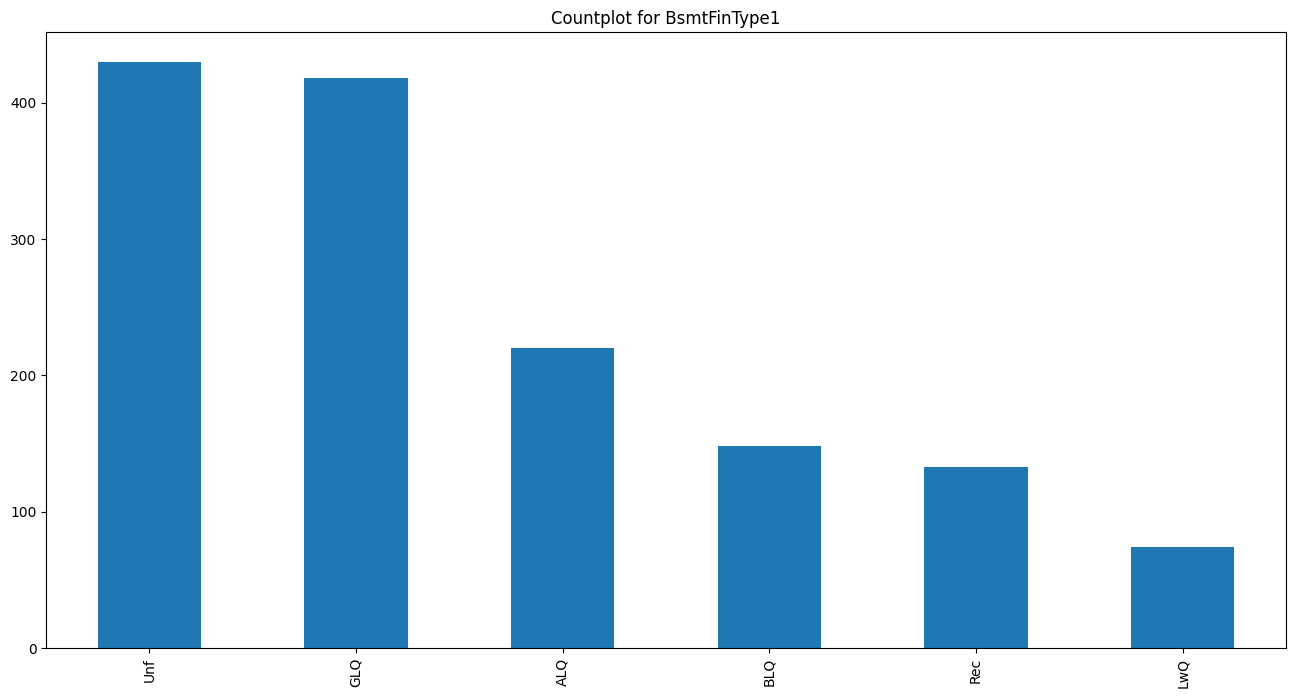

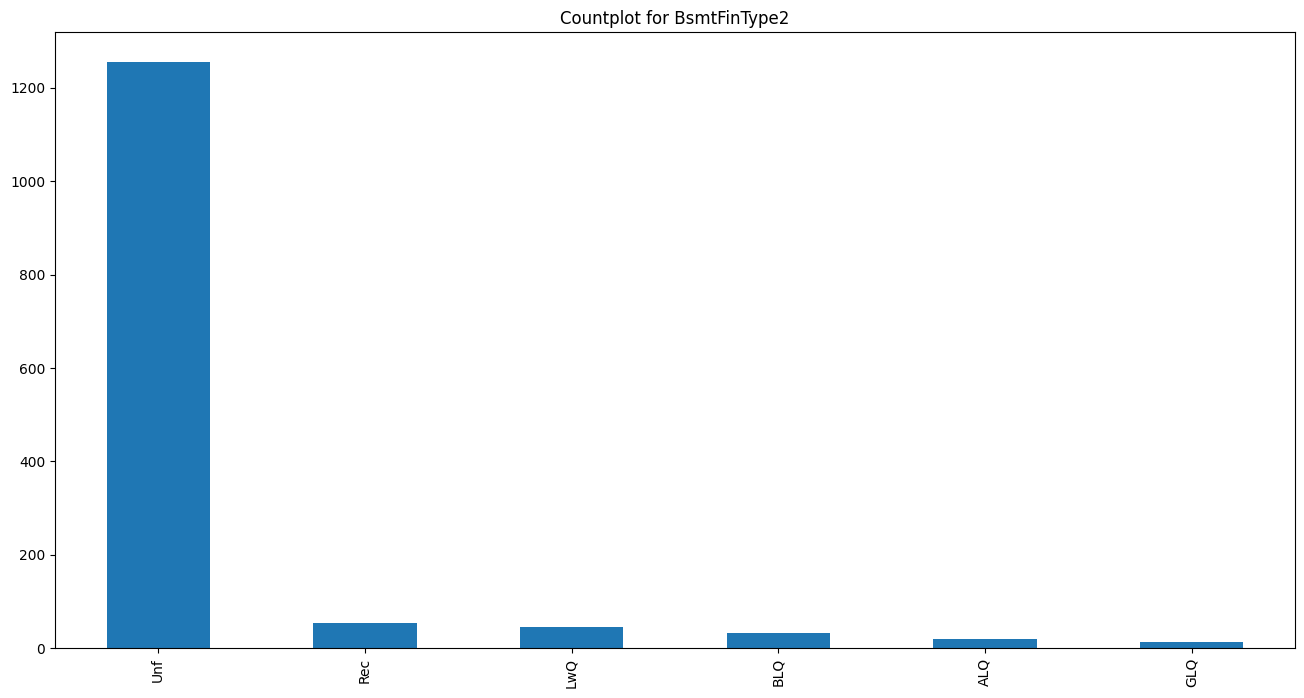

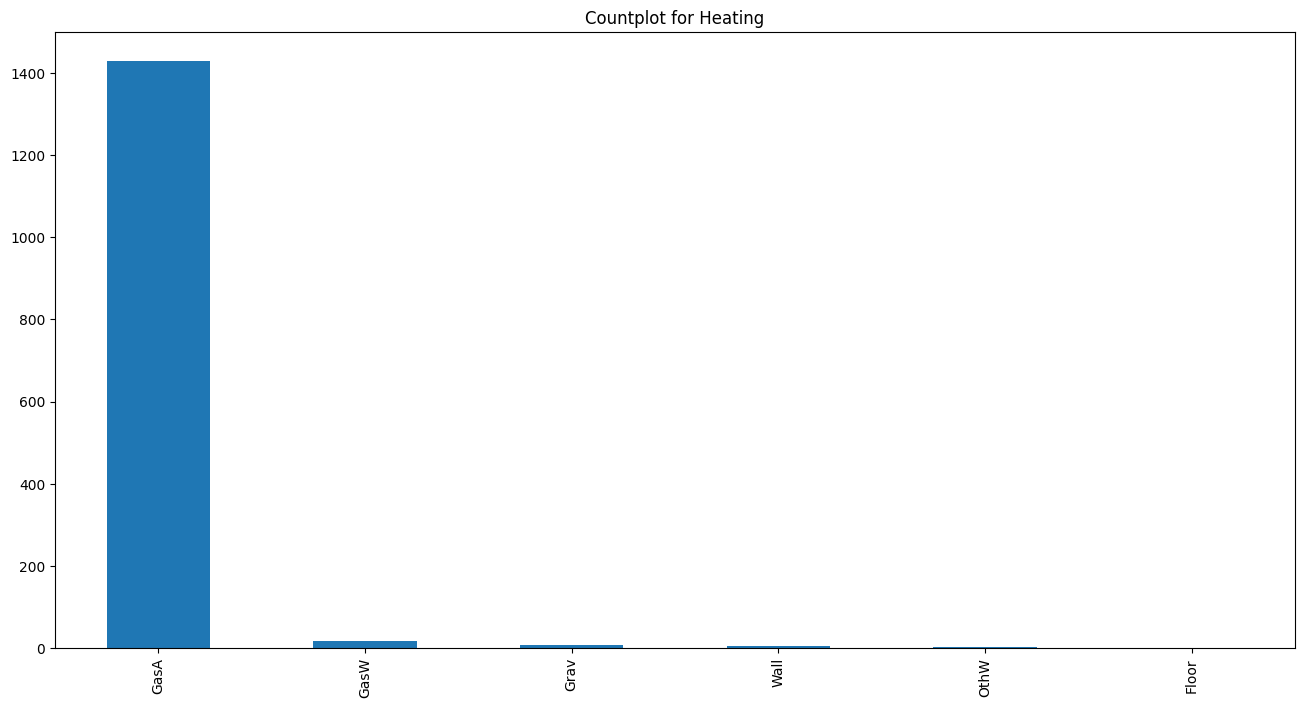

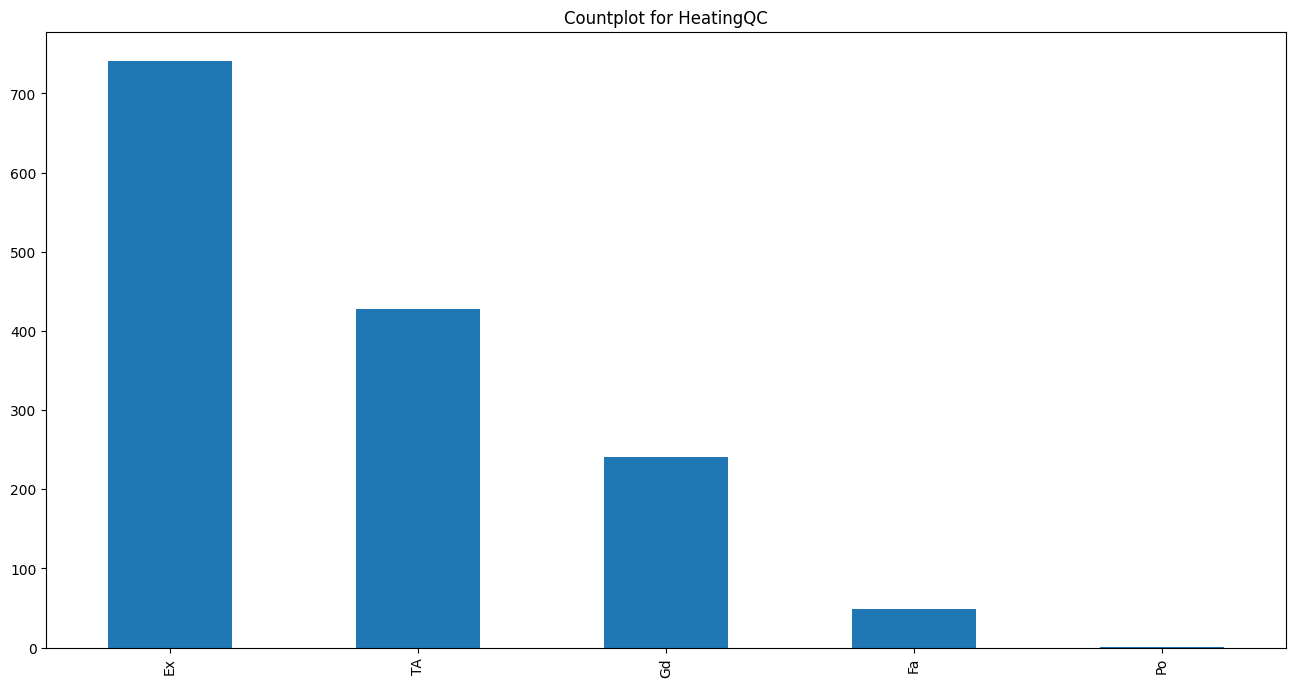

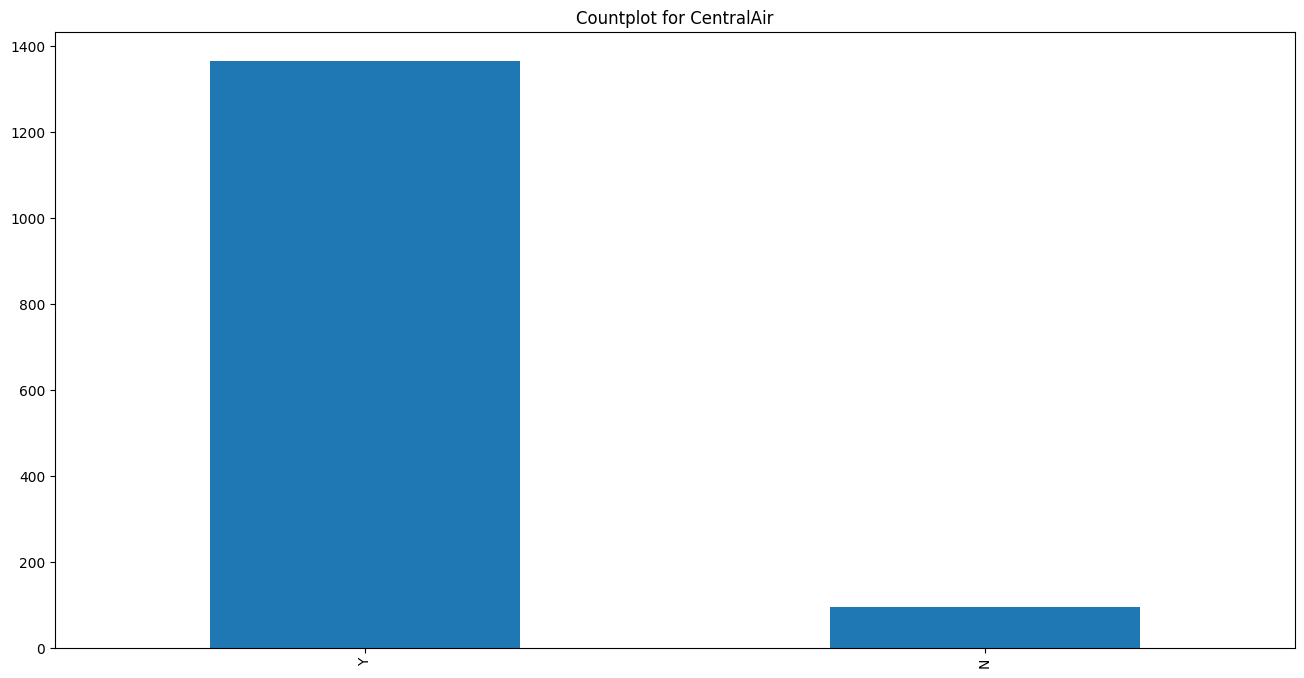

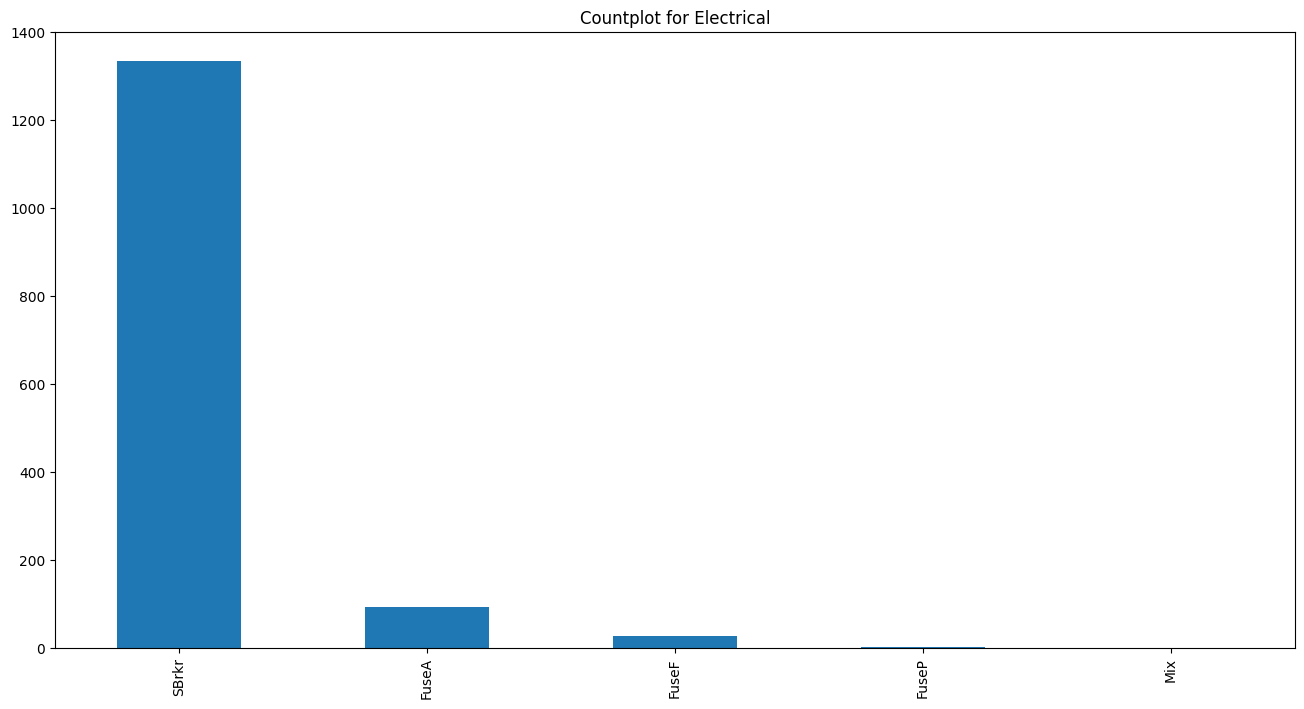

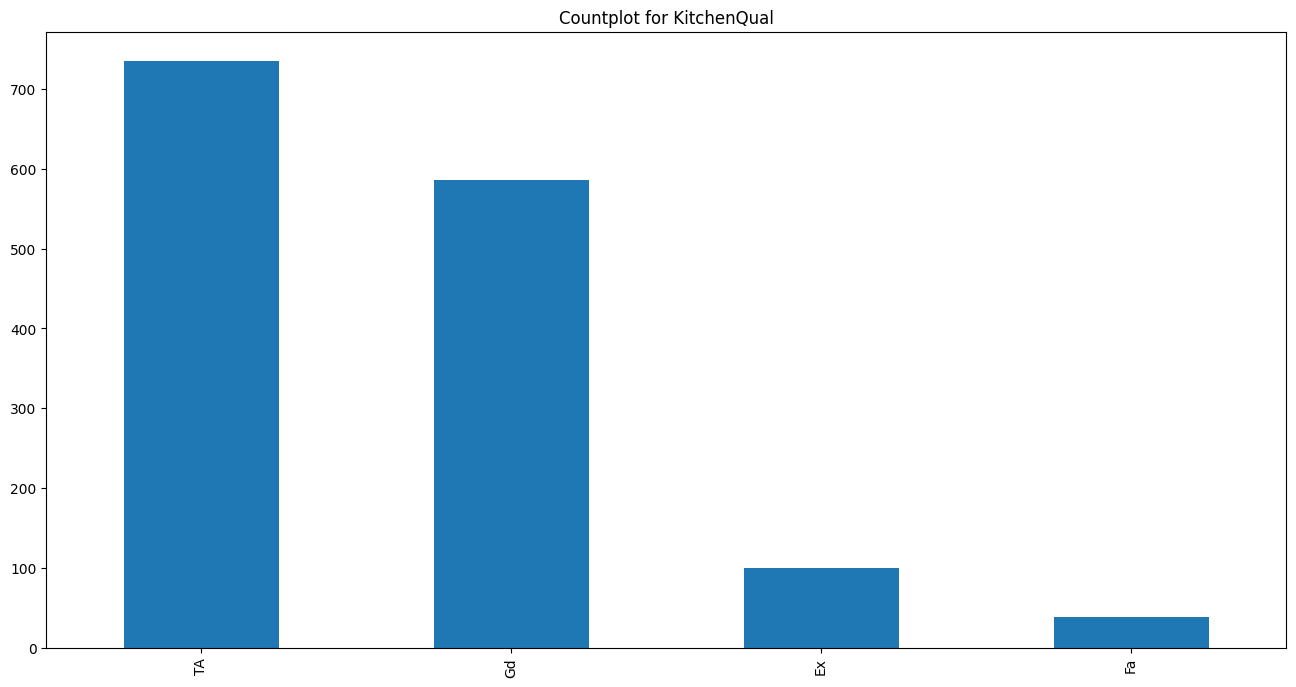

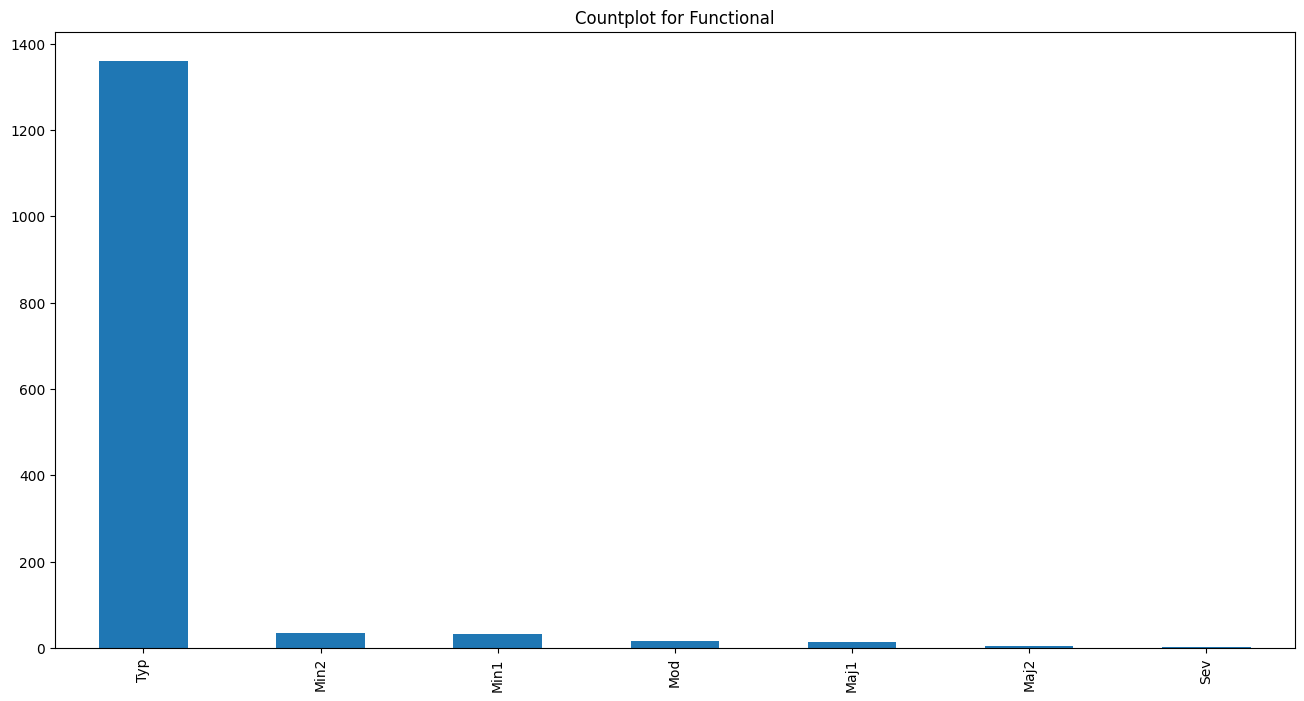

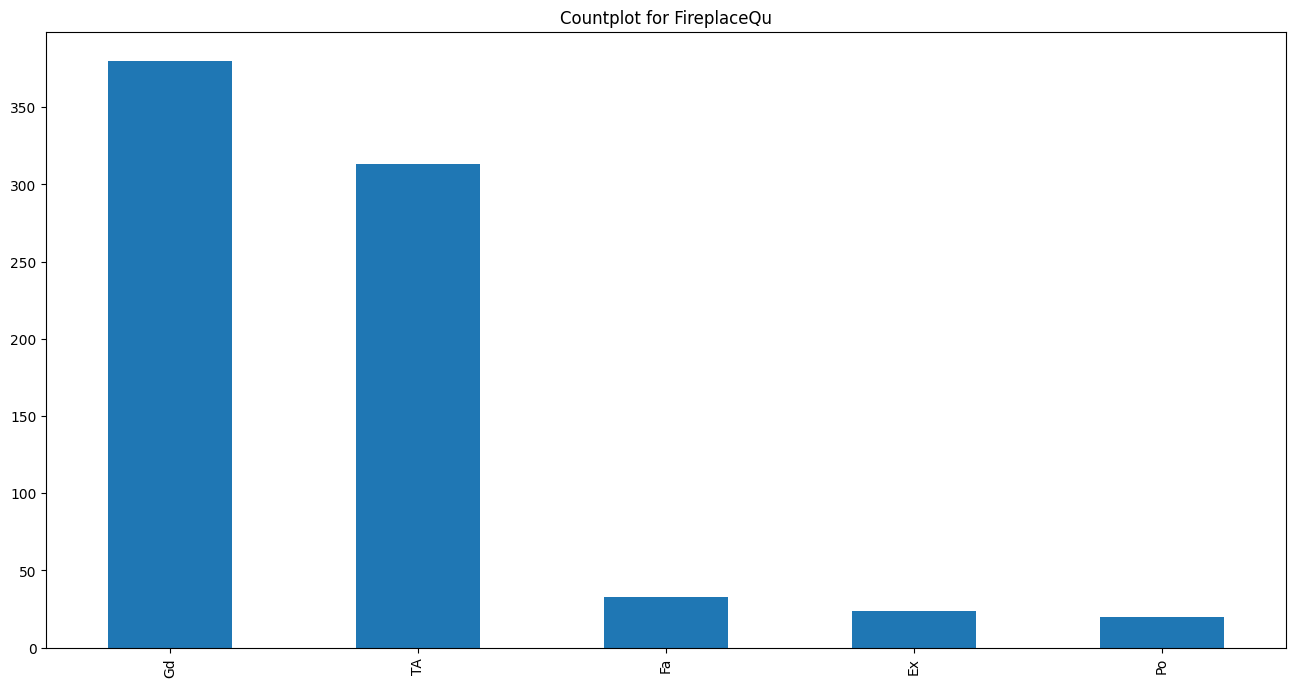

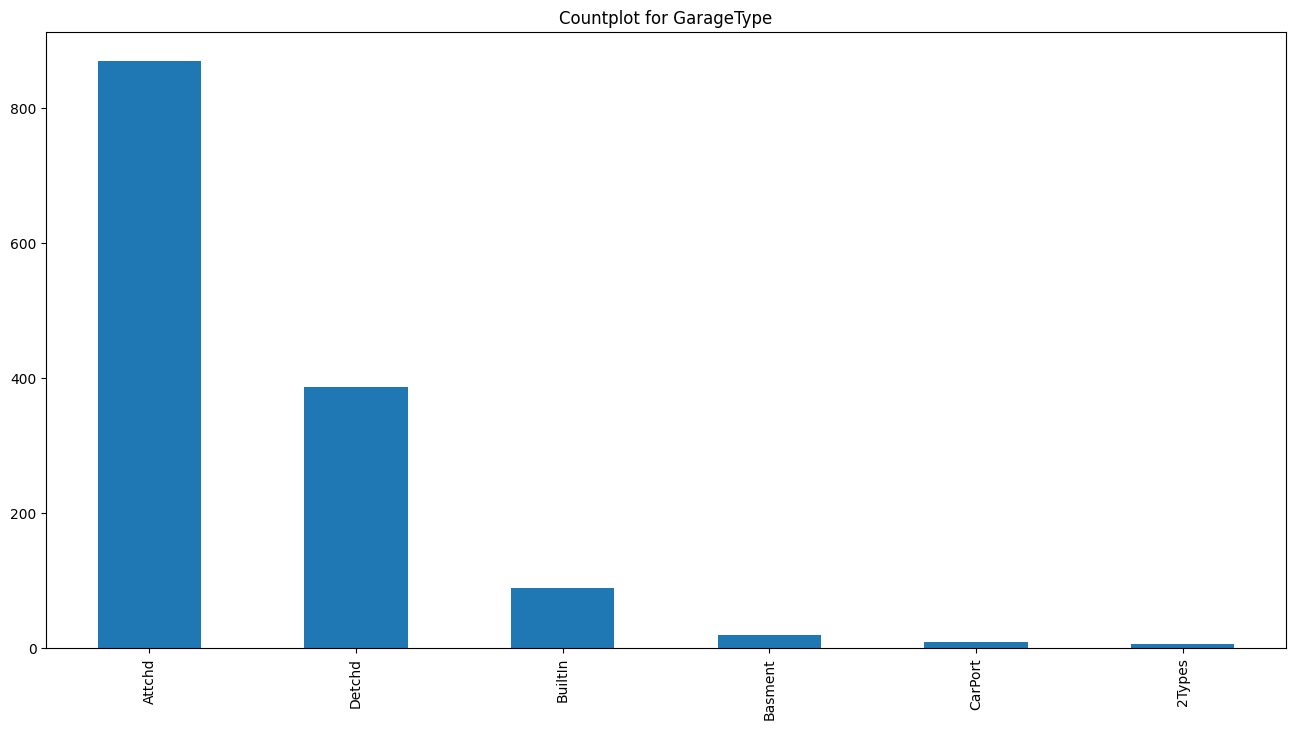

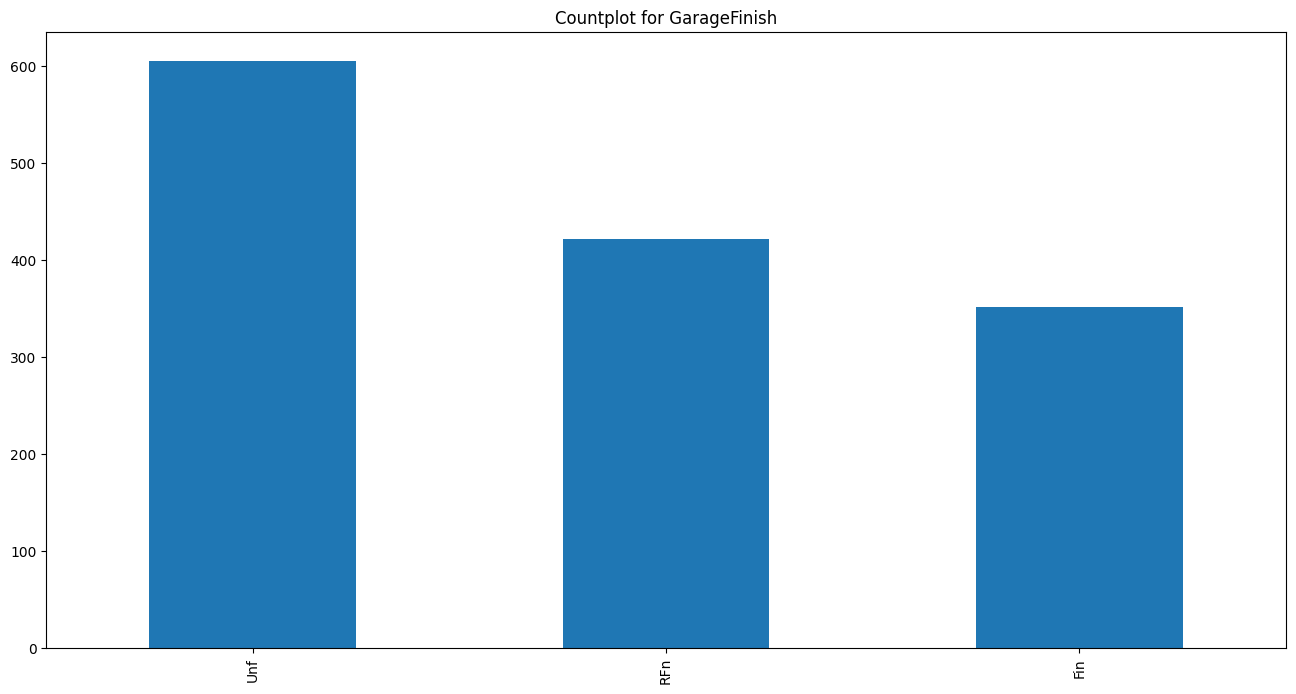

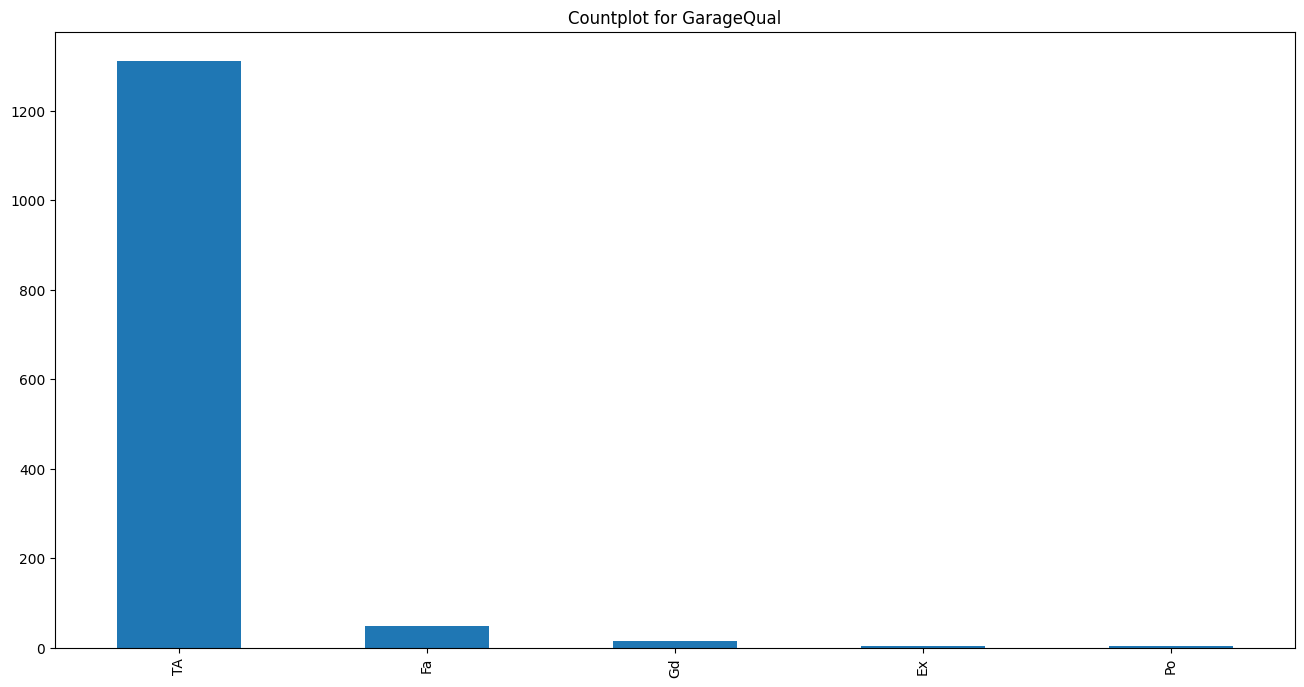

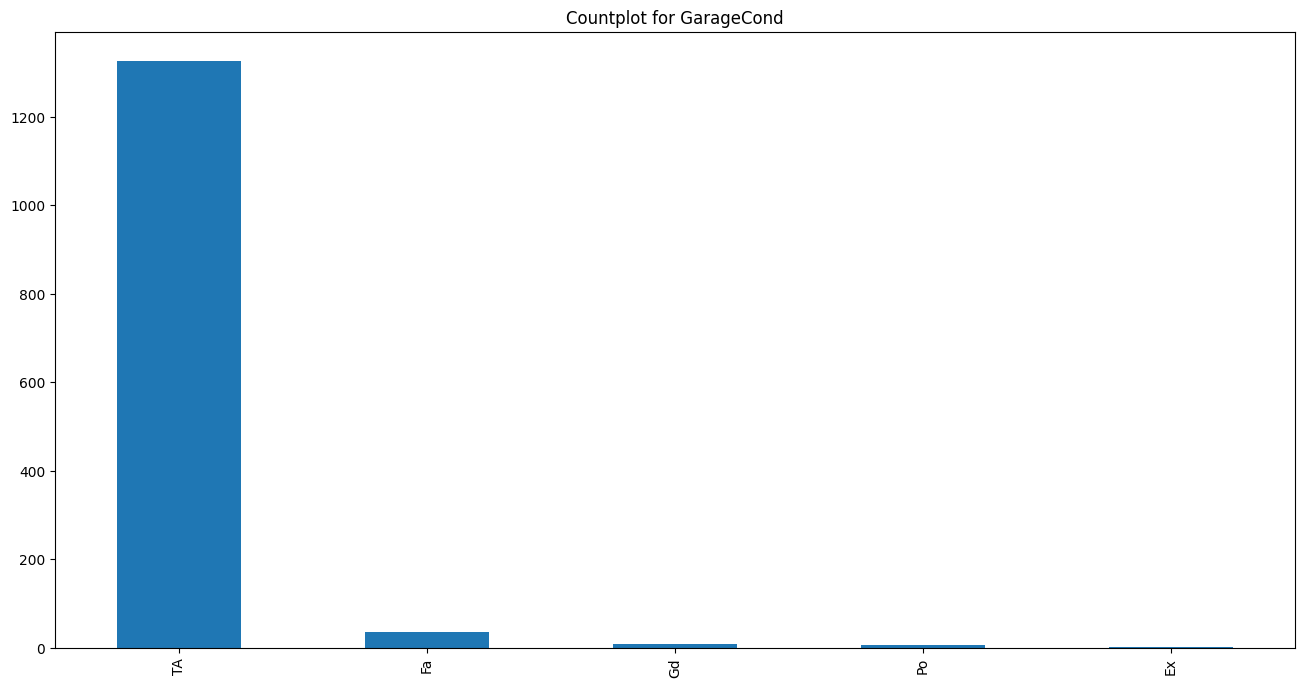

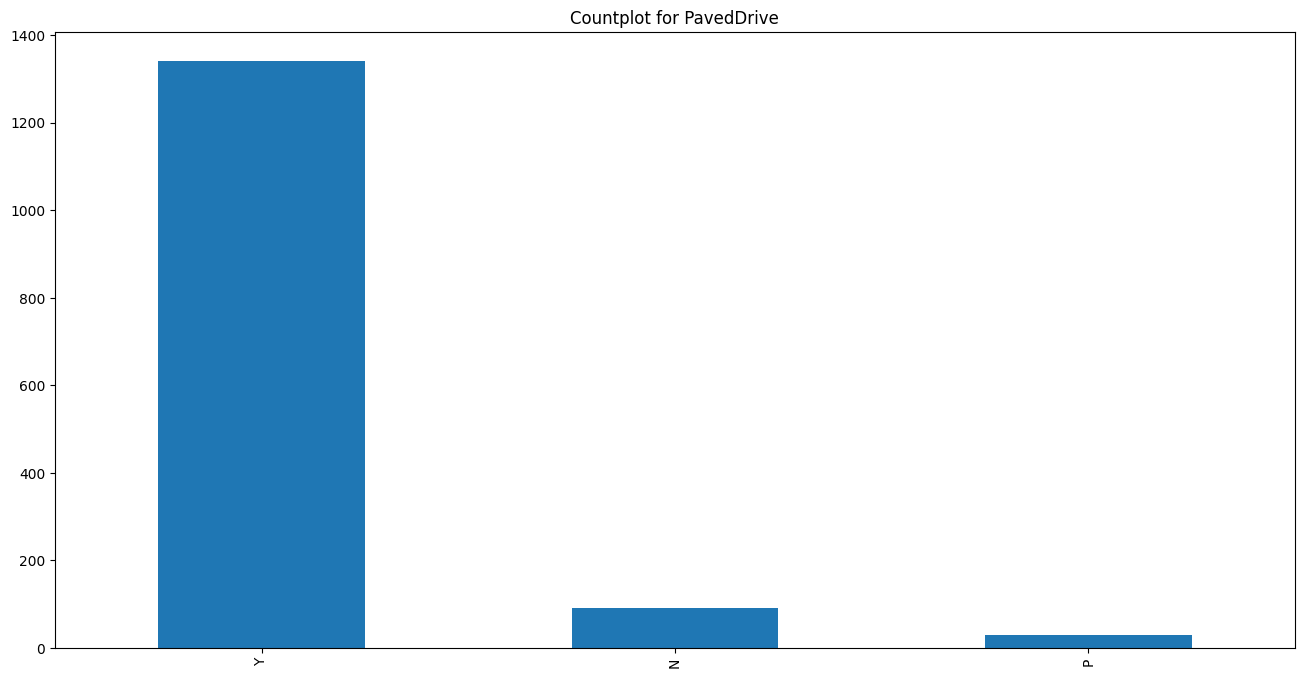

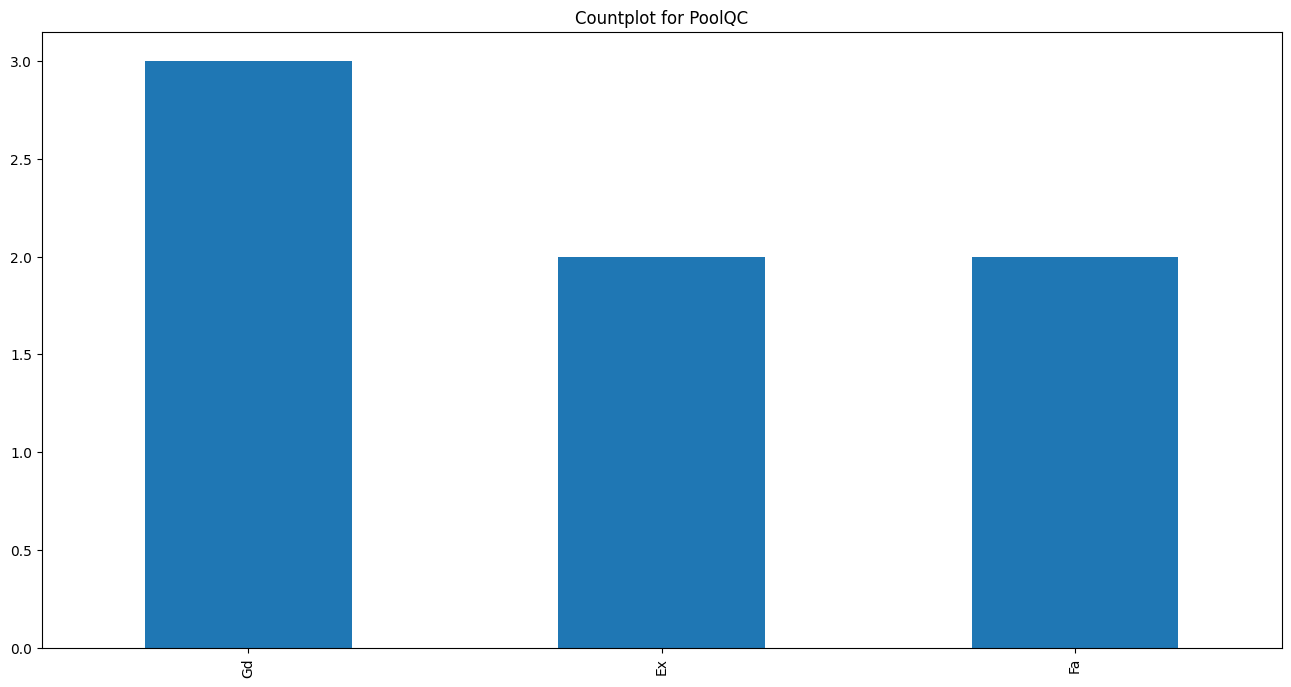

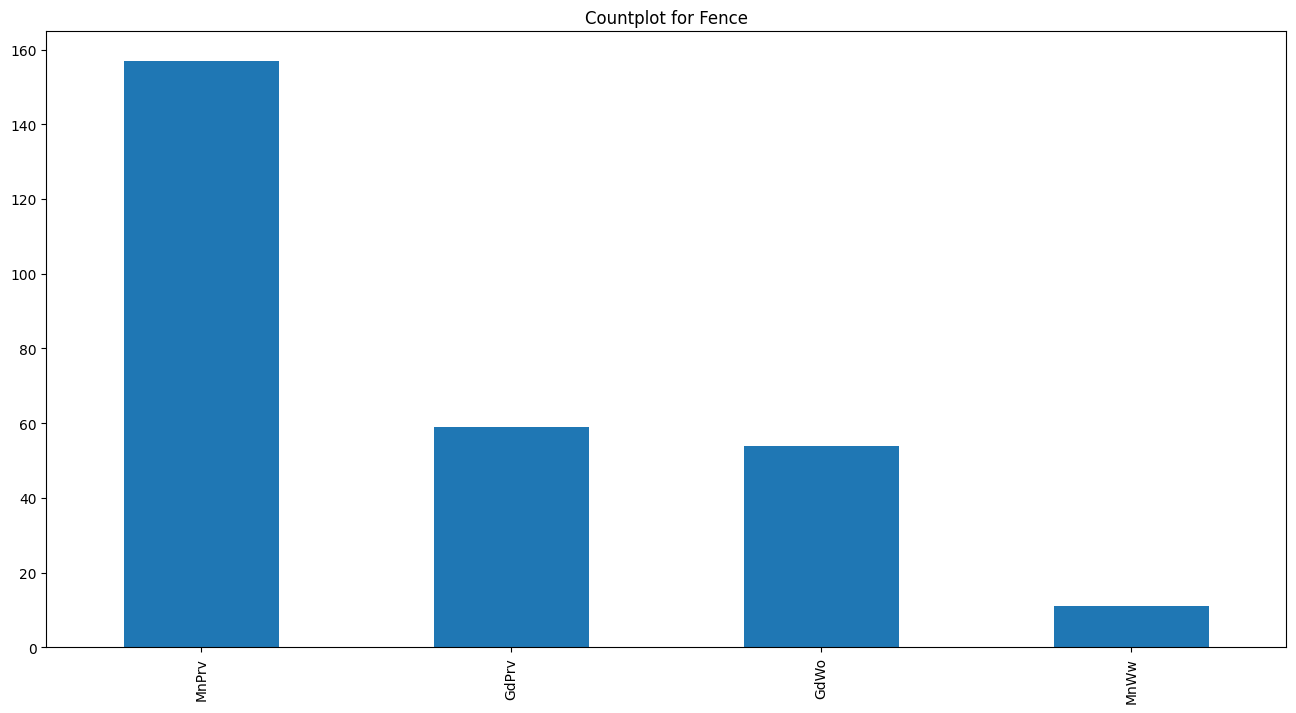

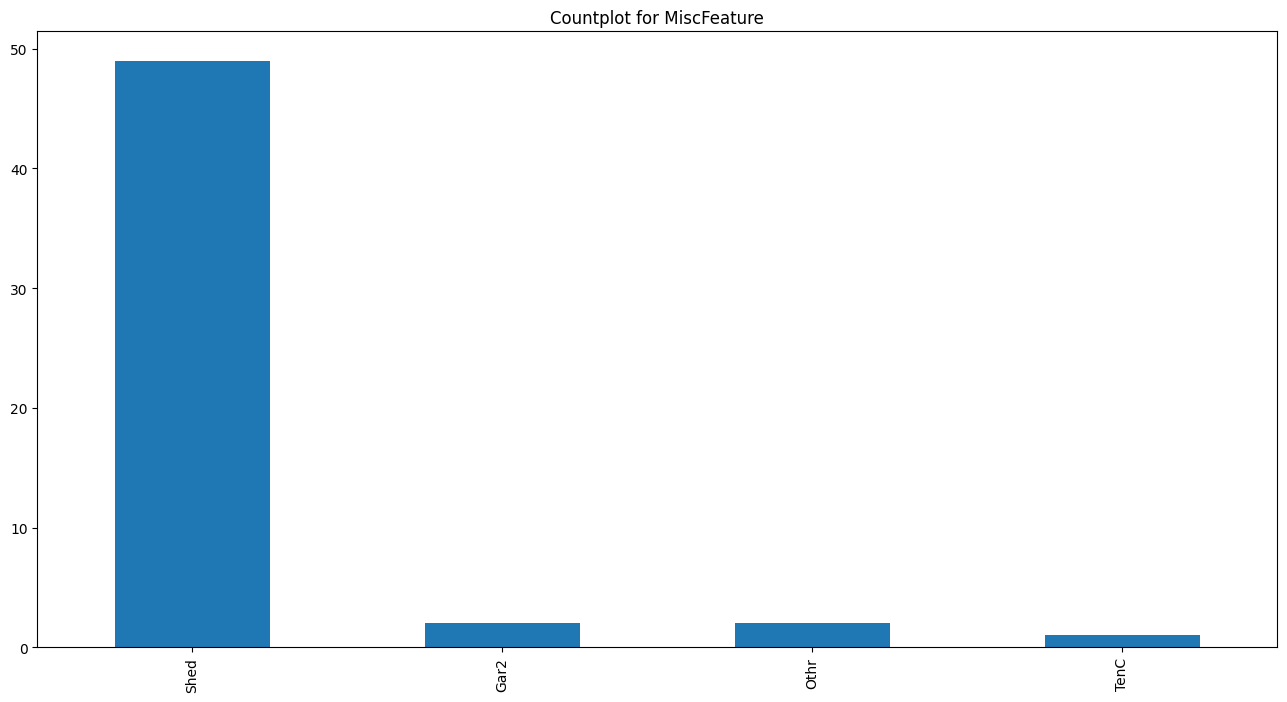

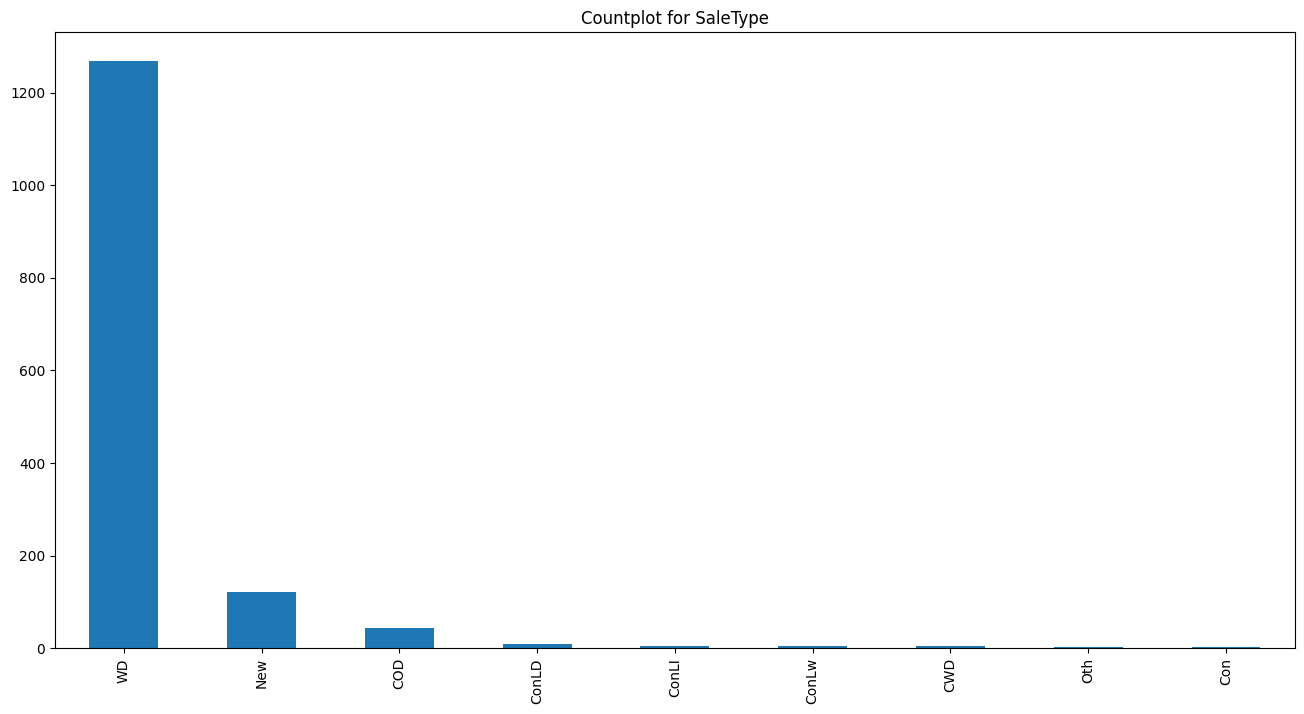

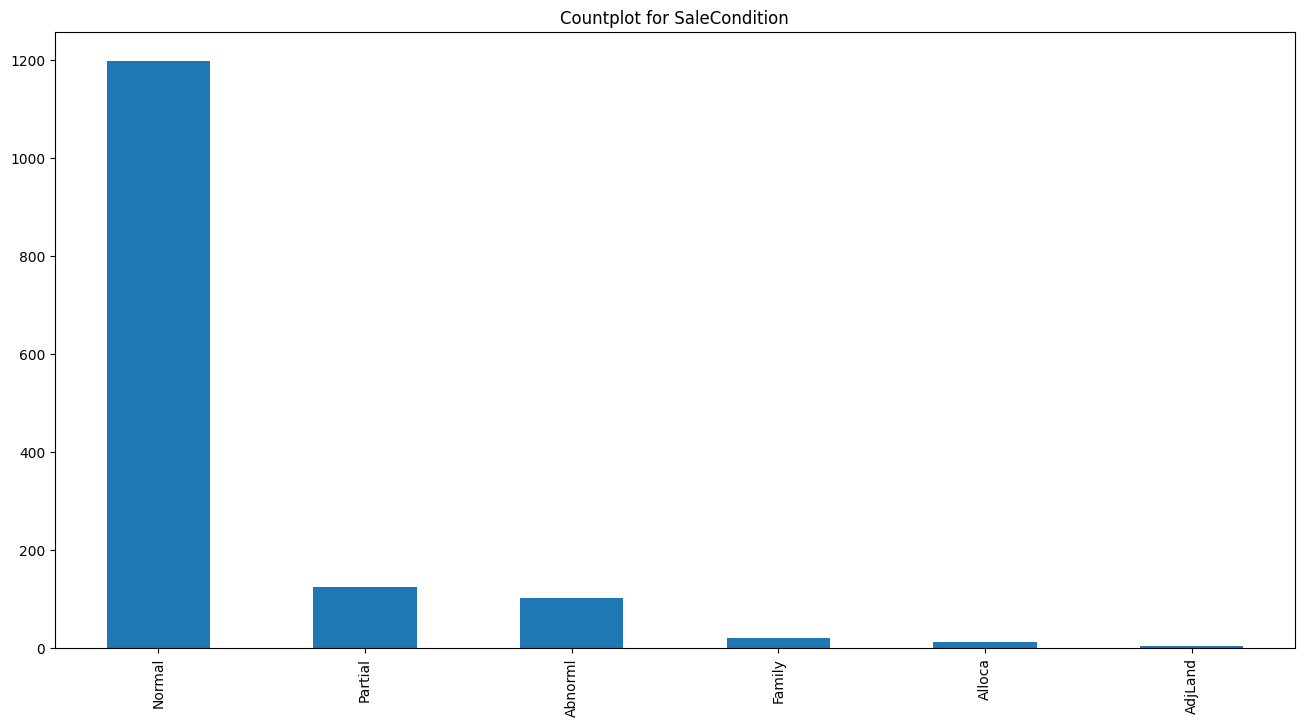

In [14]:
for i in cat:
    df[i].value_counts().plot(kind='bar',
                              title=f'Countplot for {i}',
                              figsize=(16,8))
    plt.show()

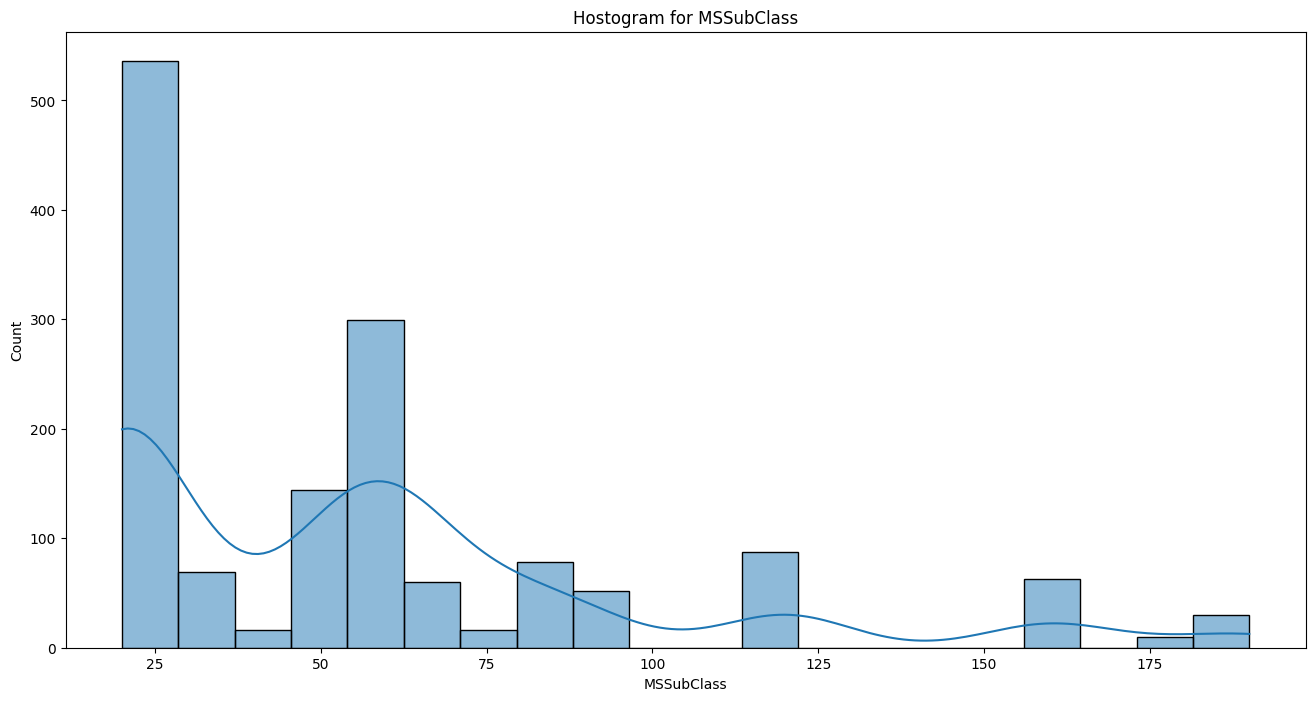

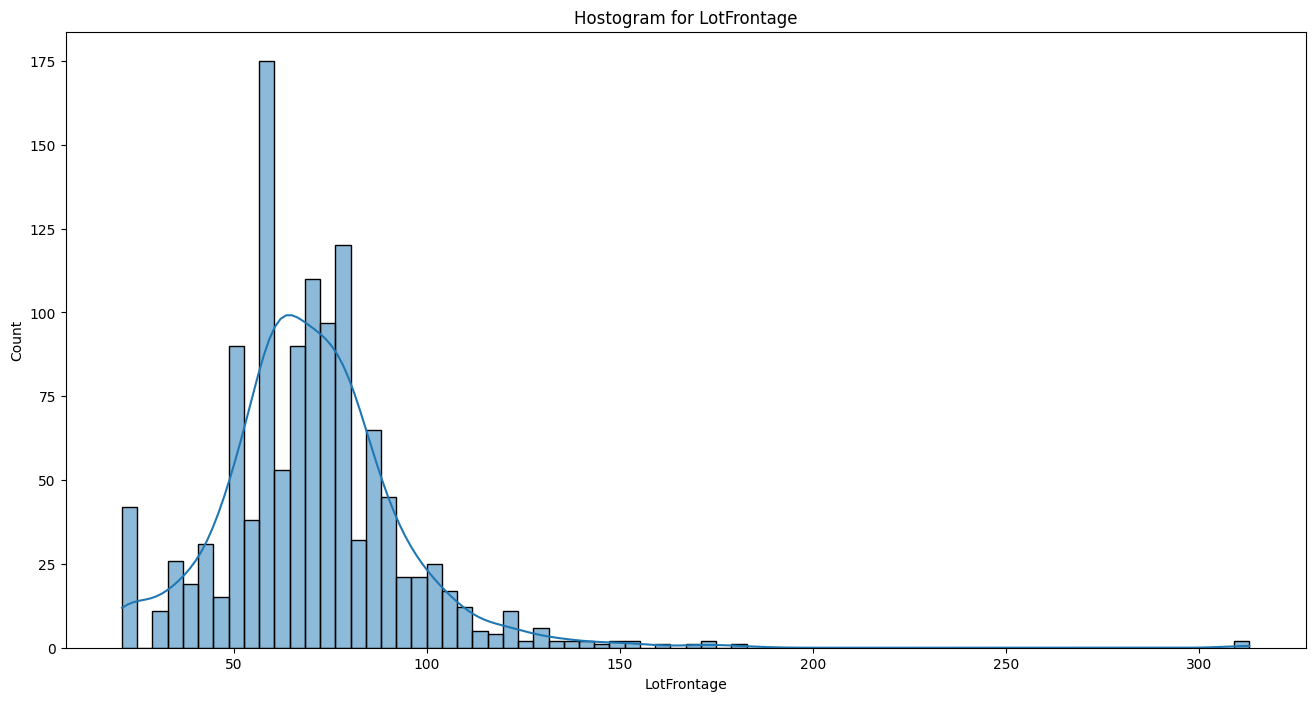

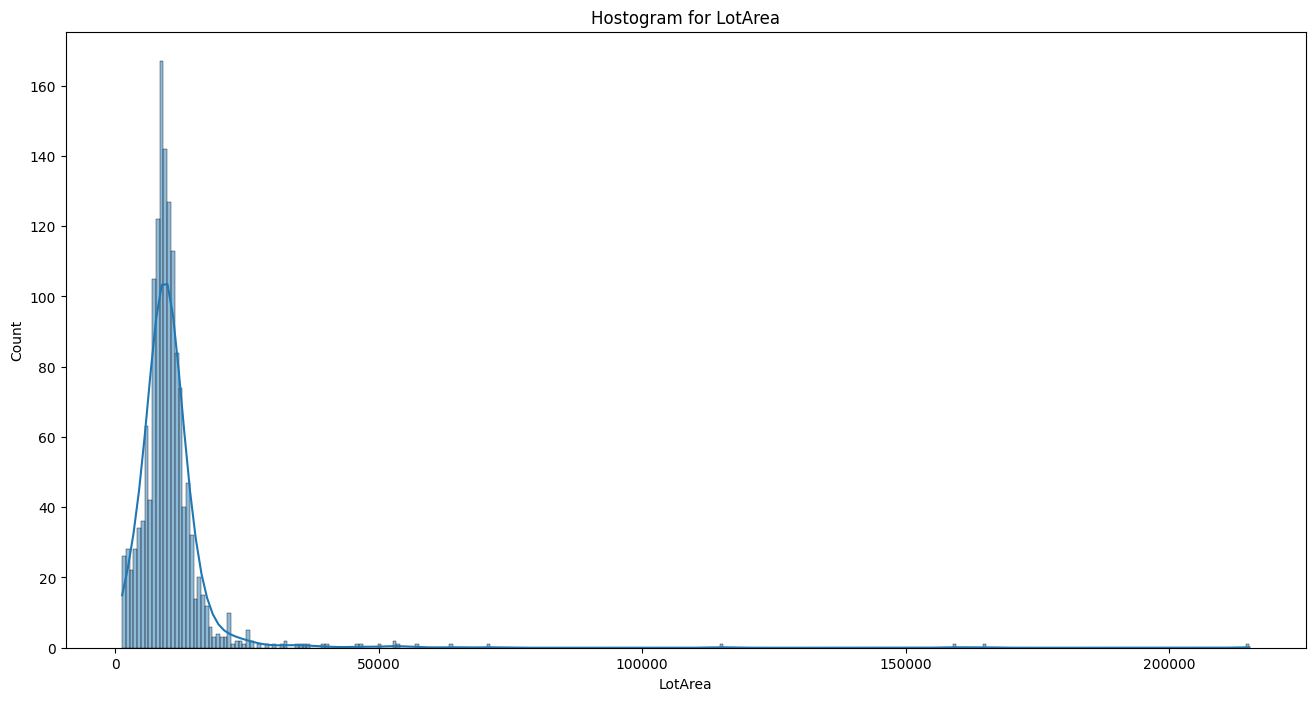

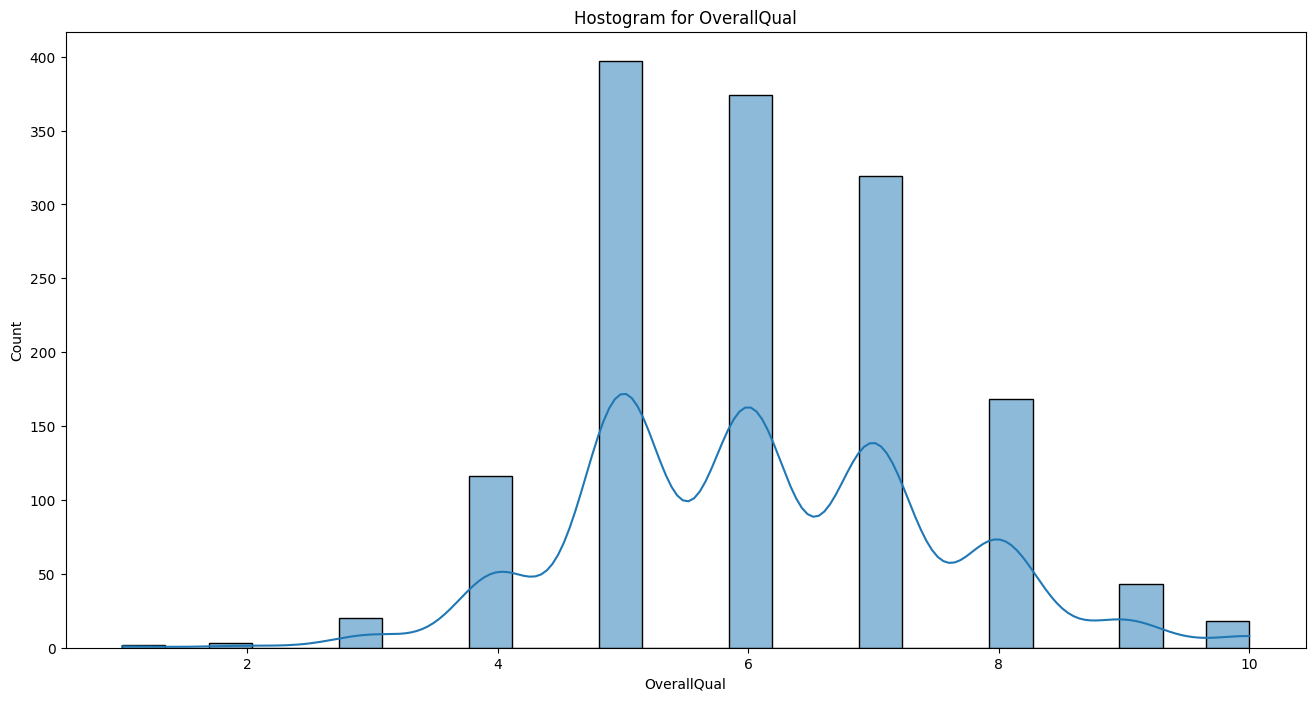

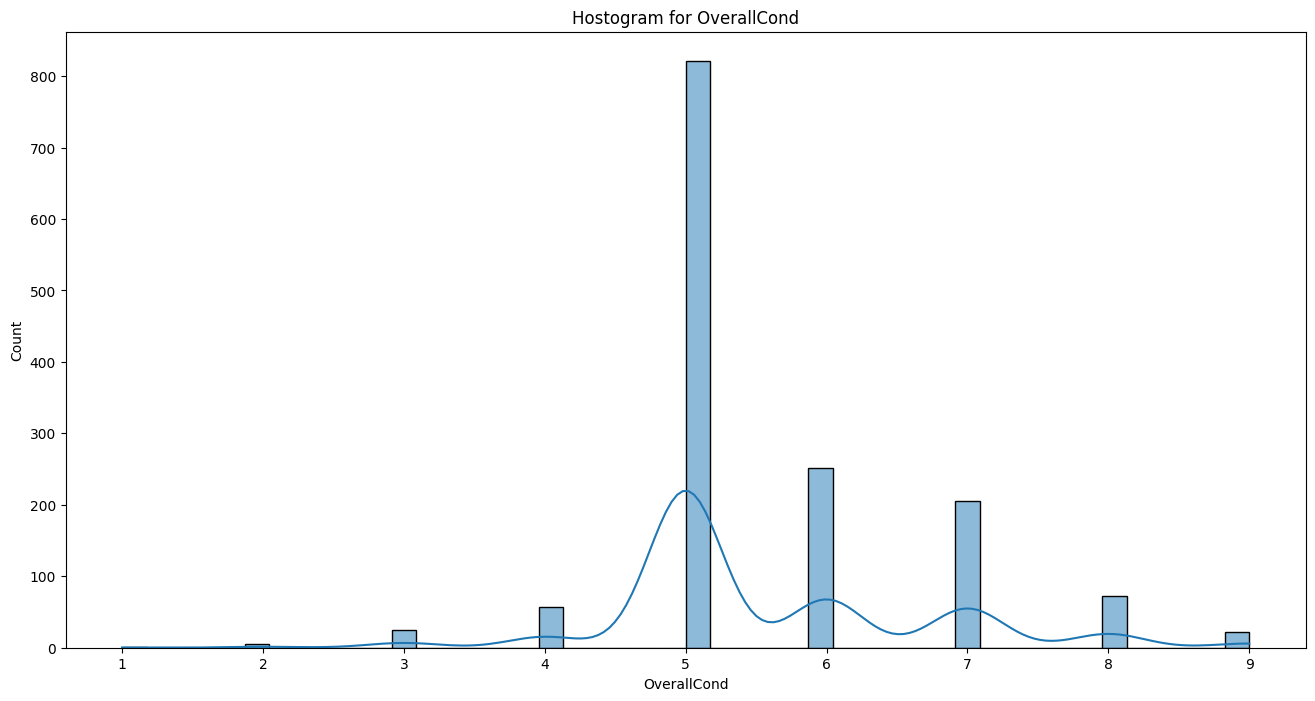

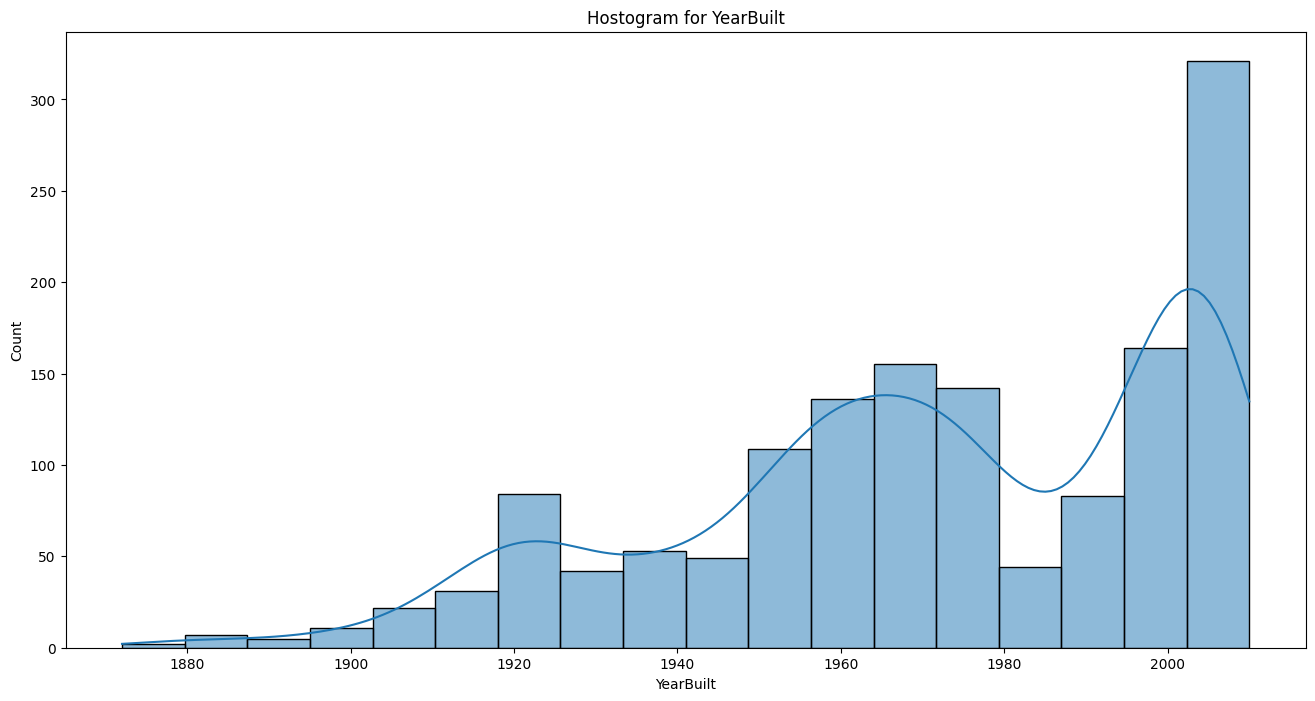

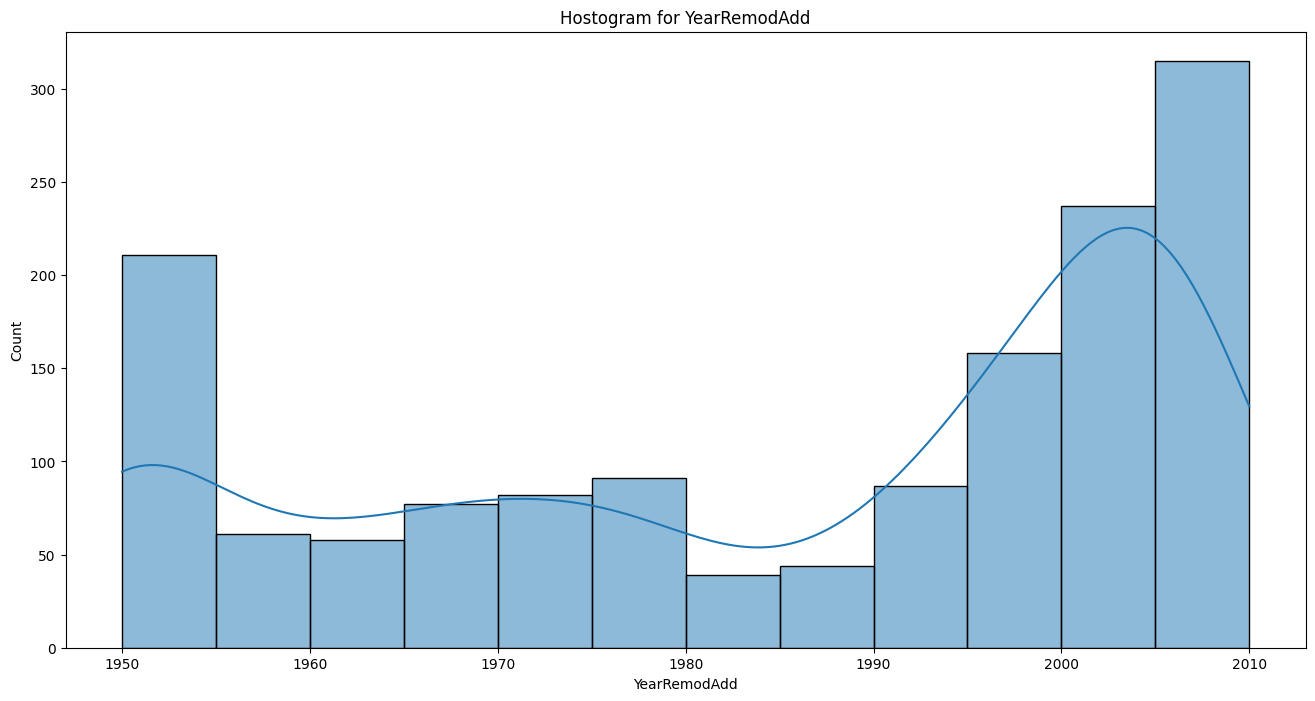

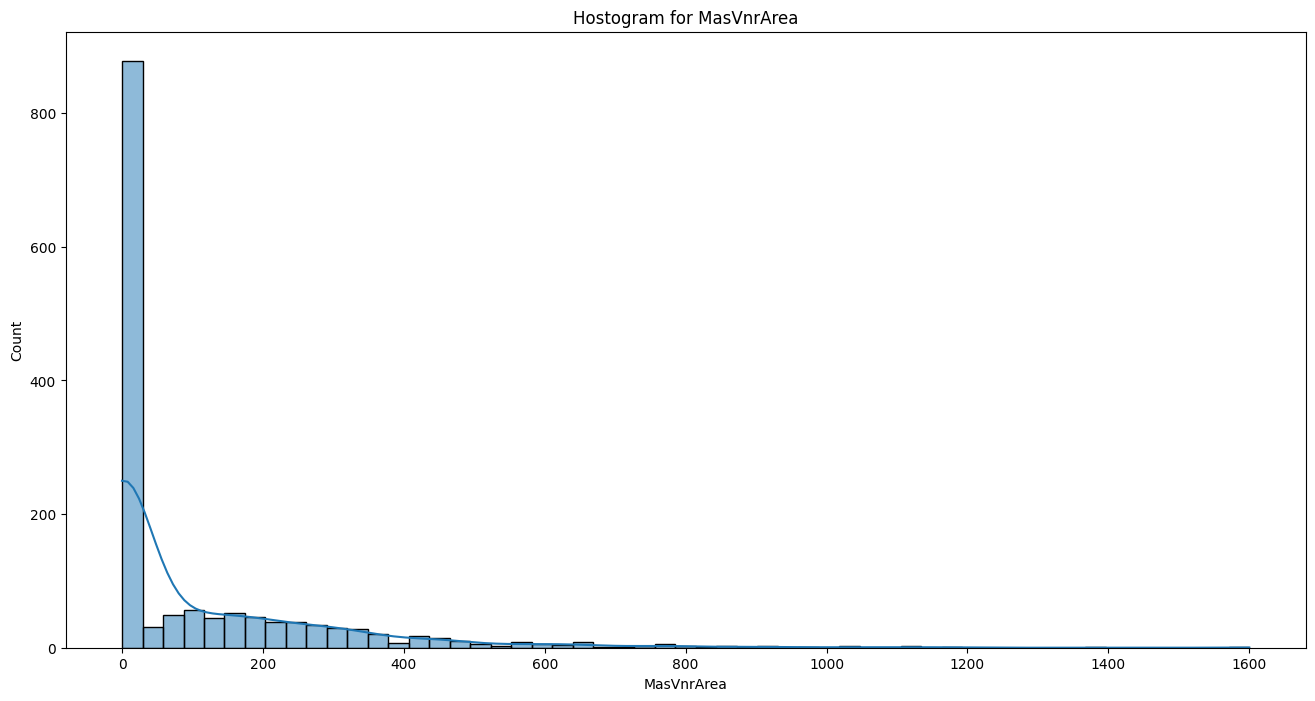

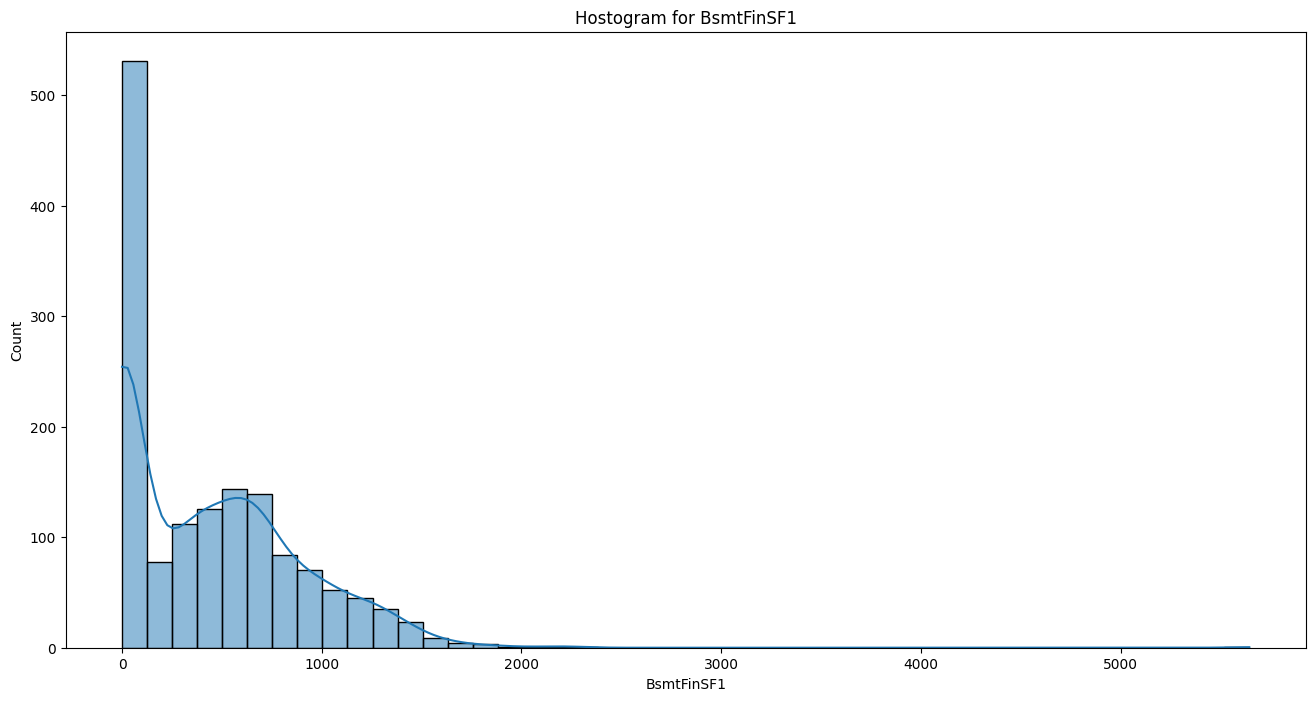

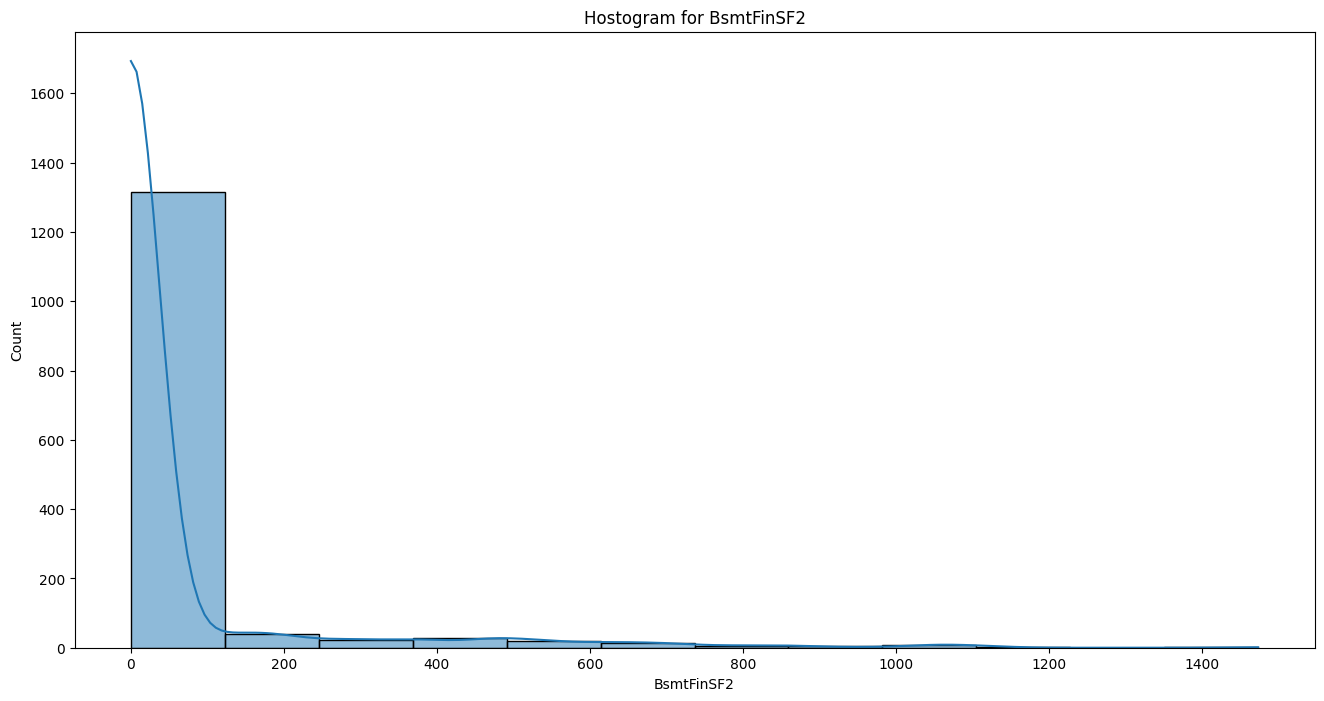

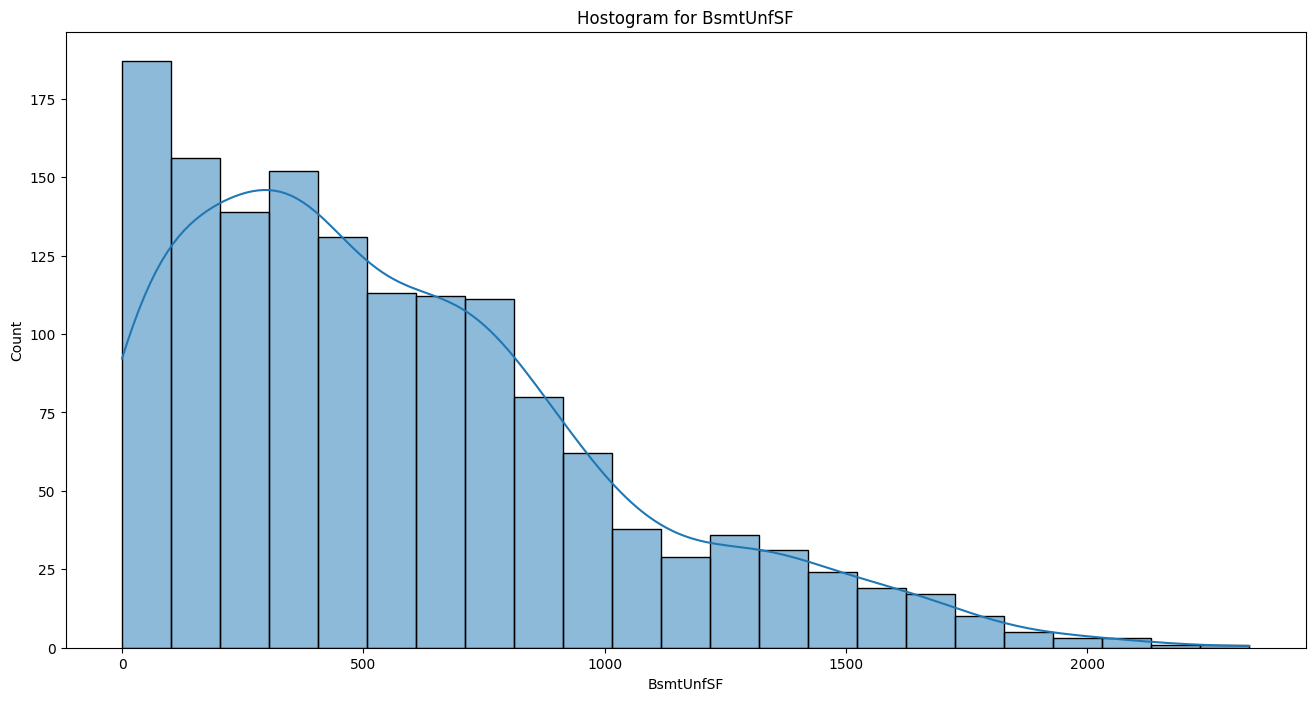

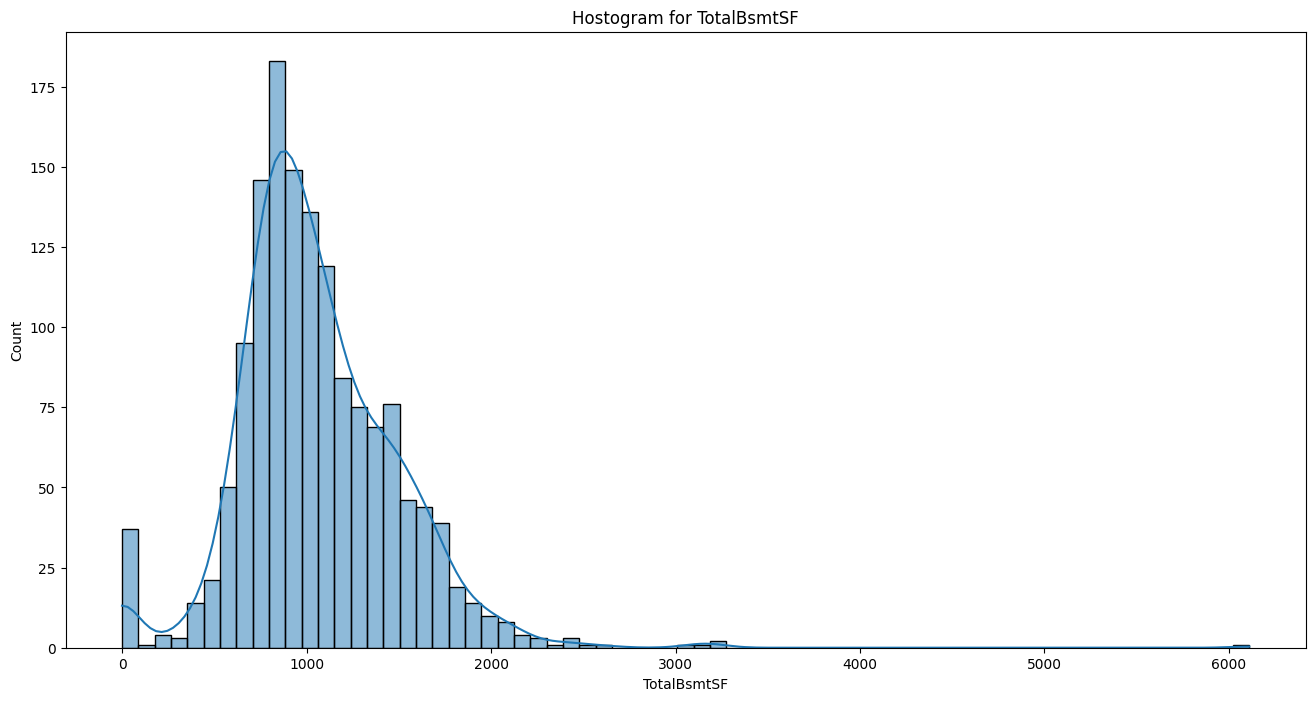

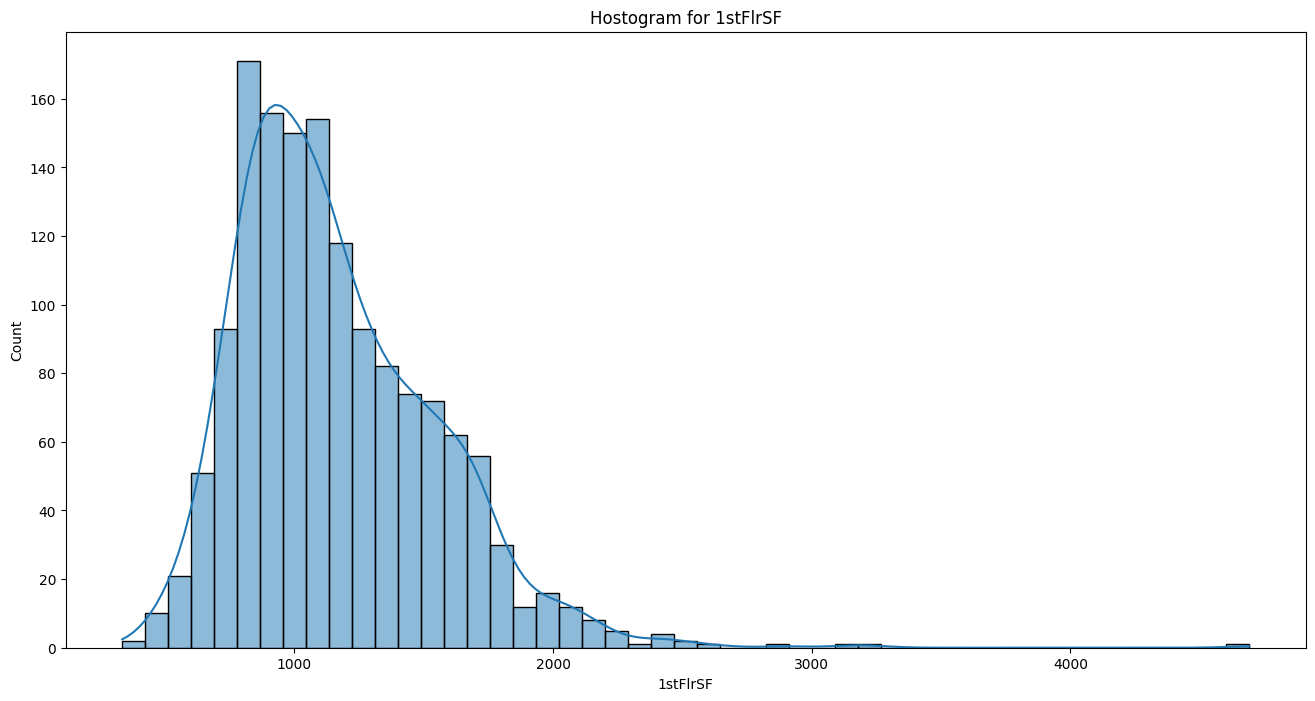

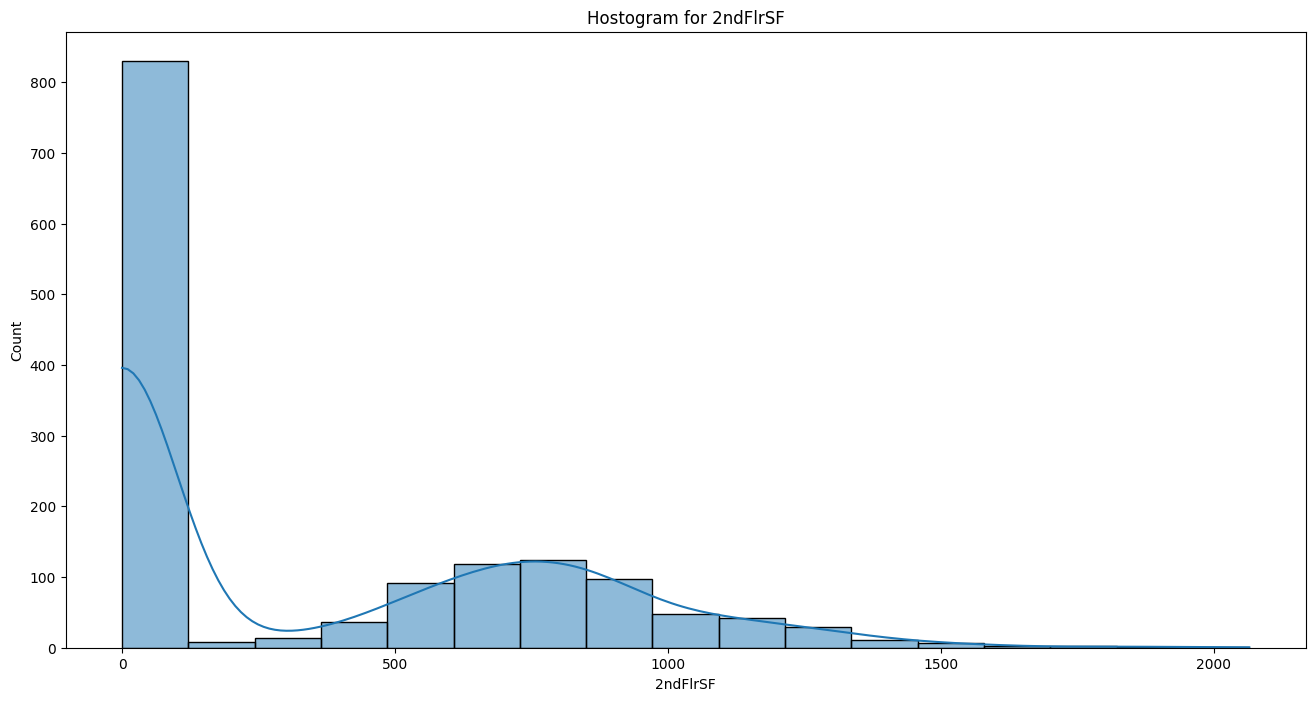

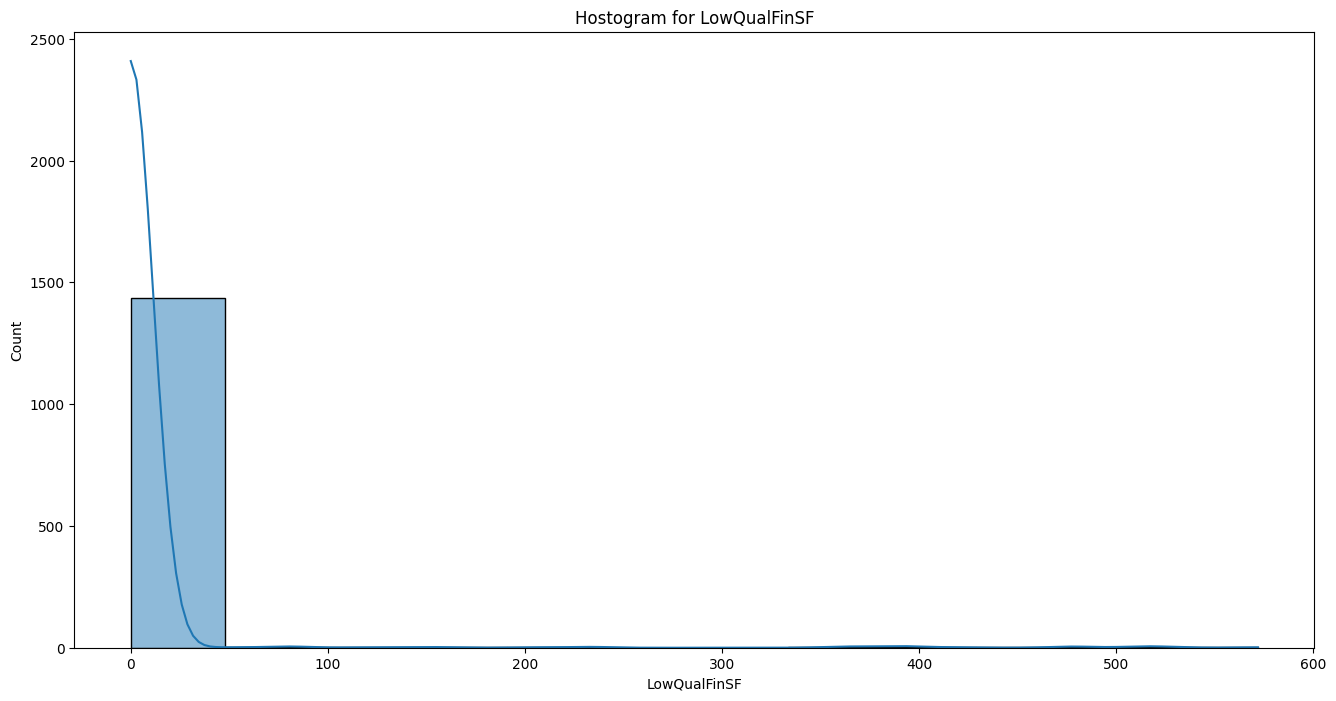

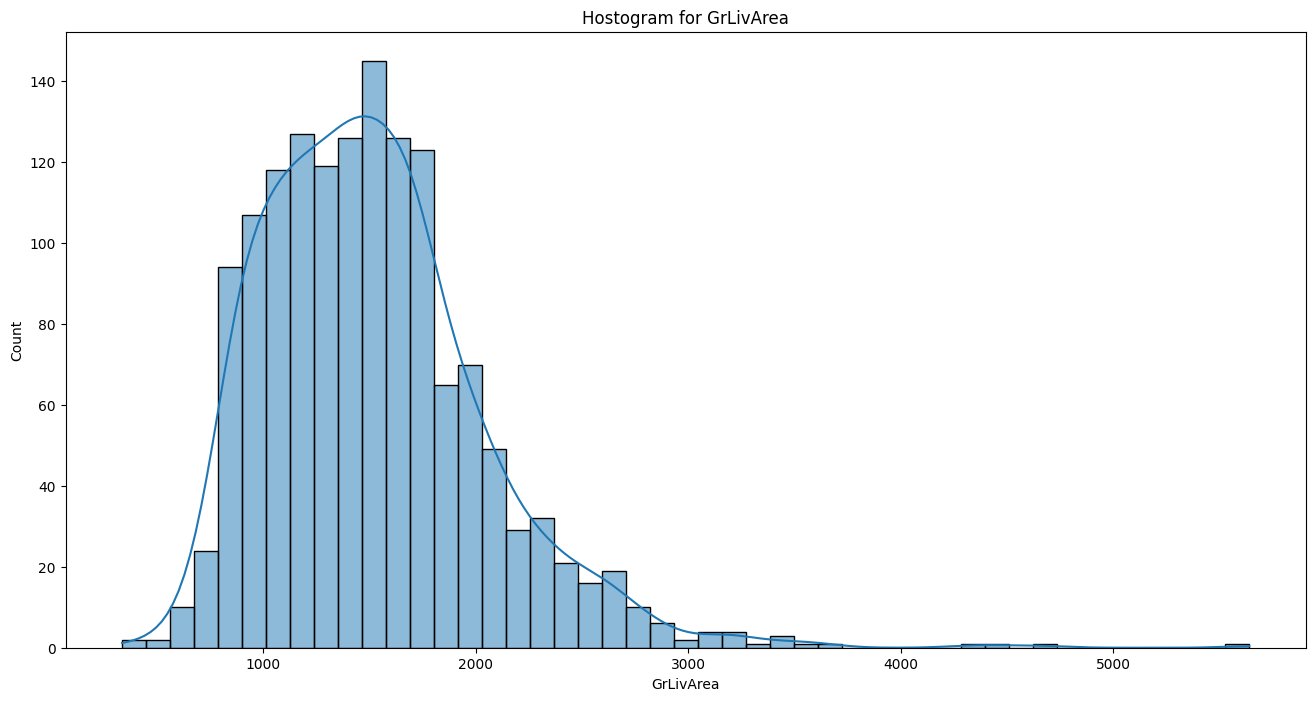

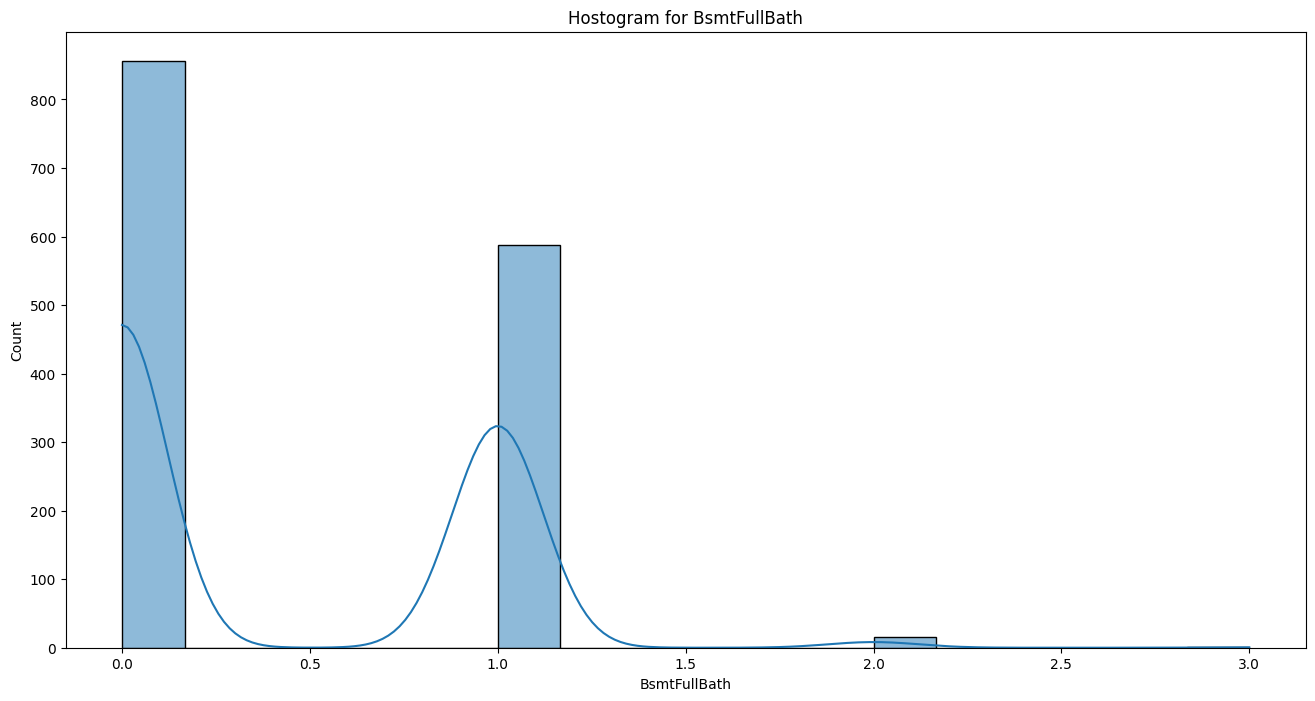

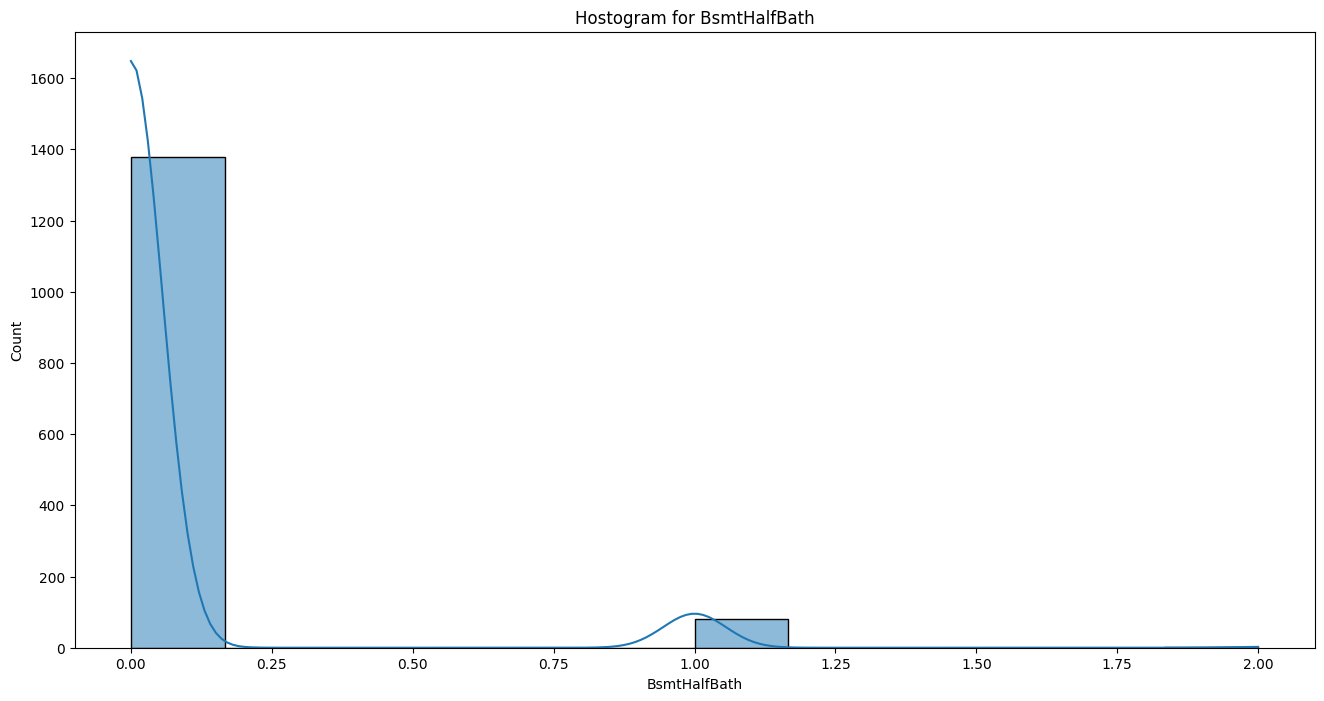

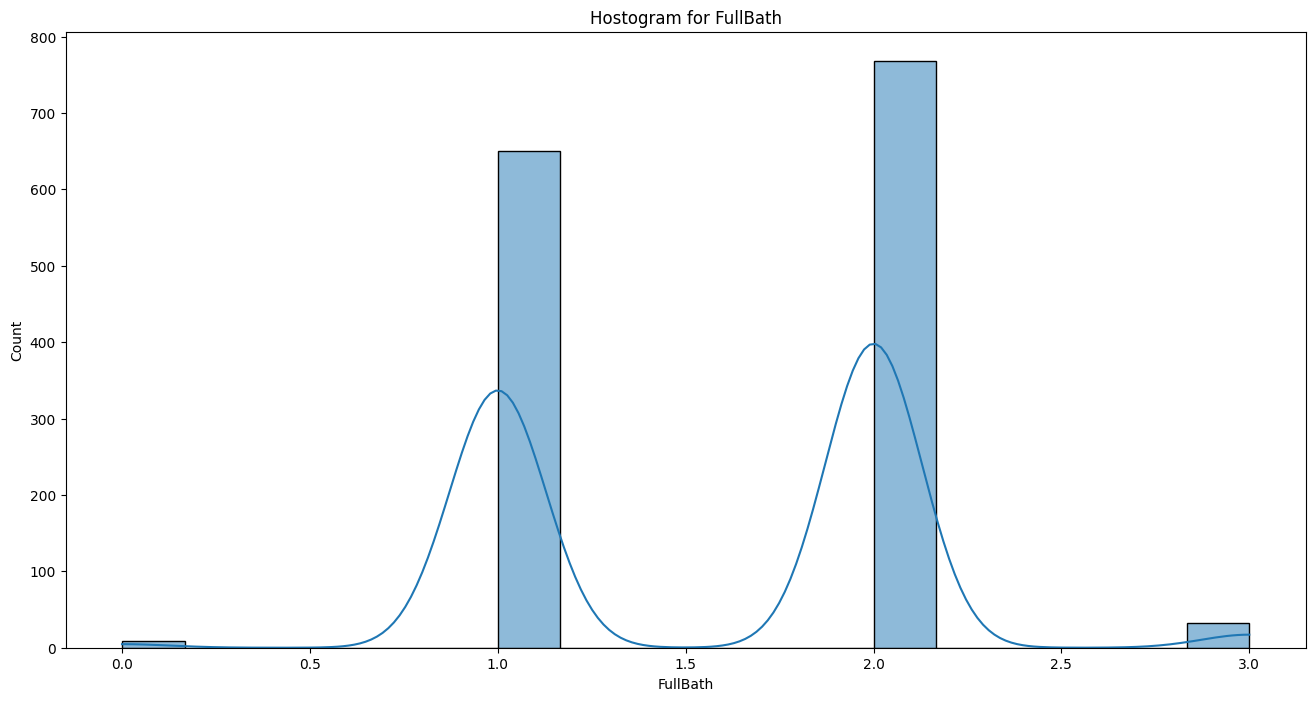

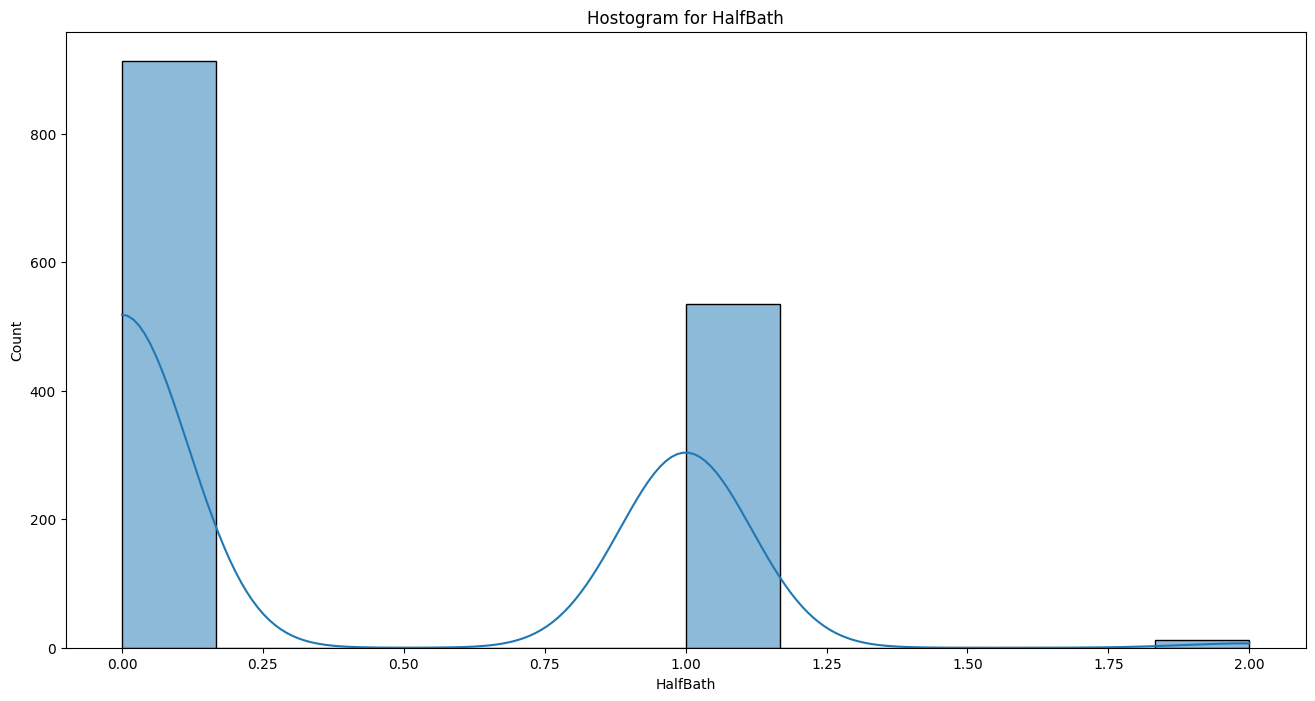

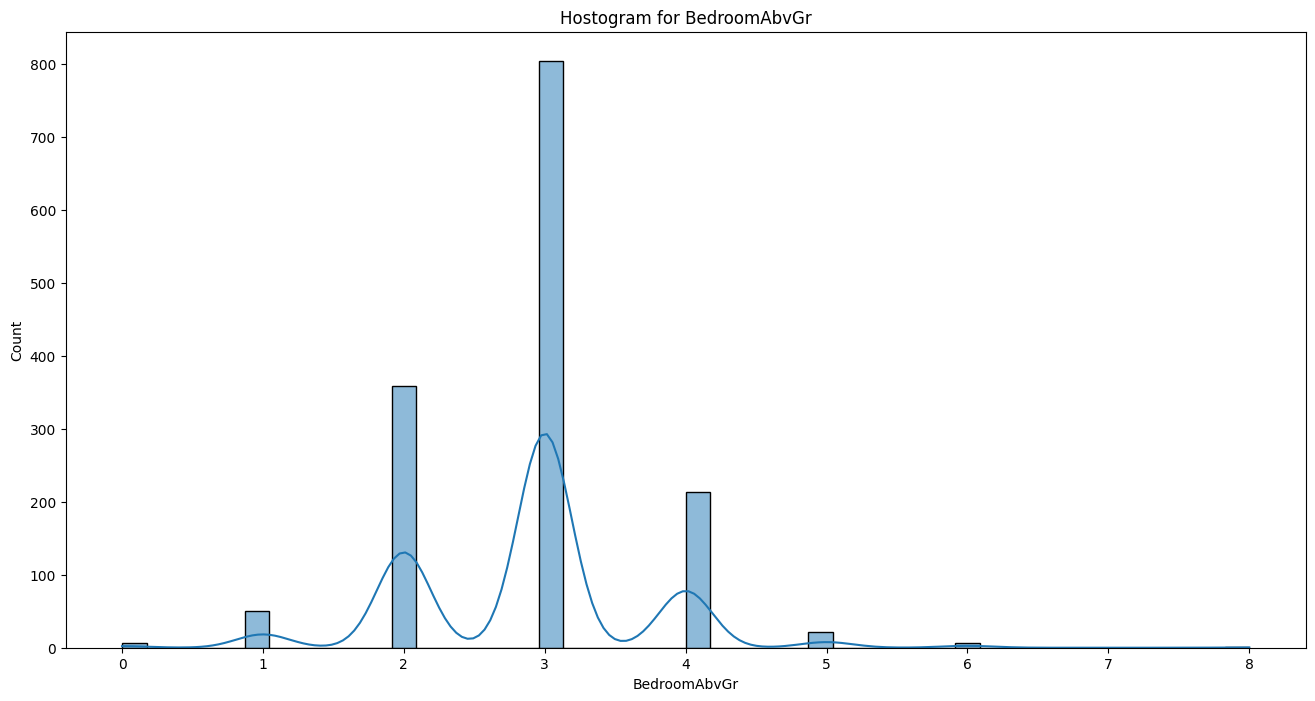

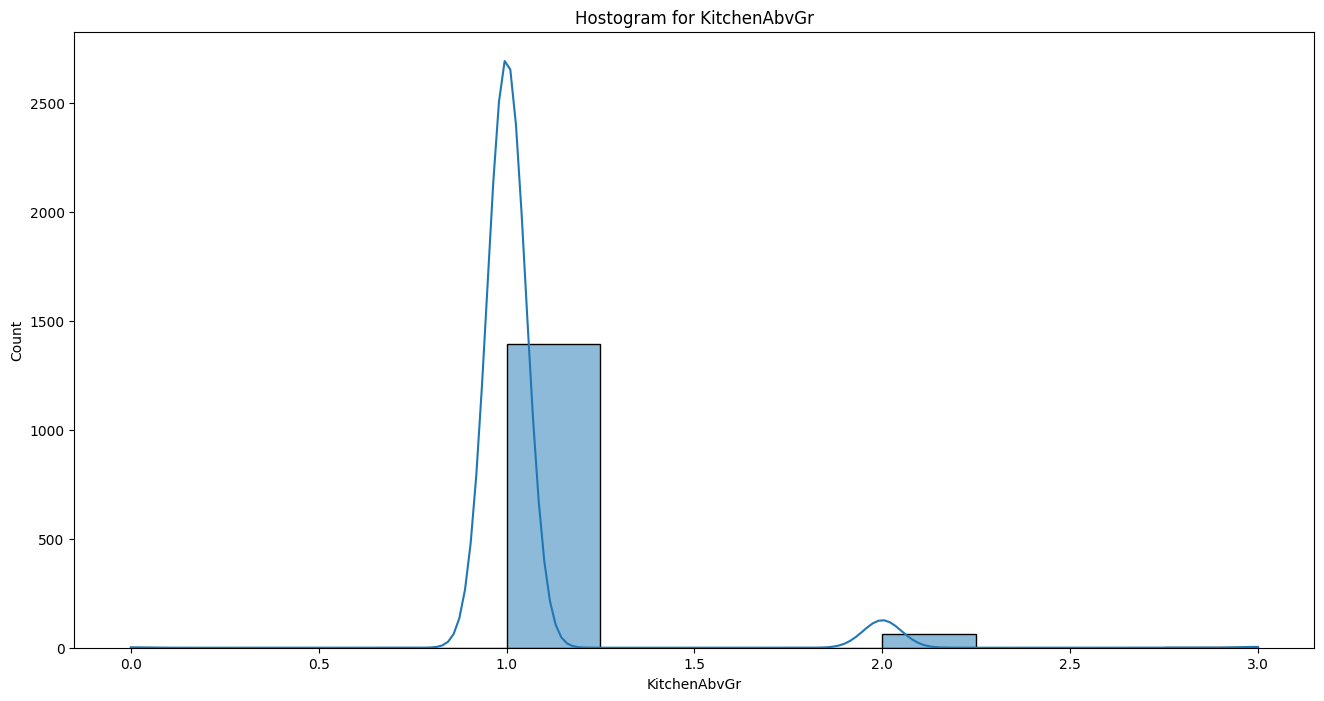

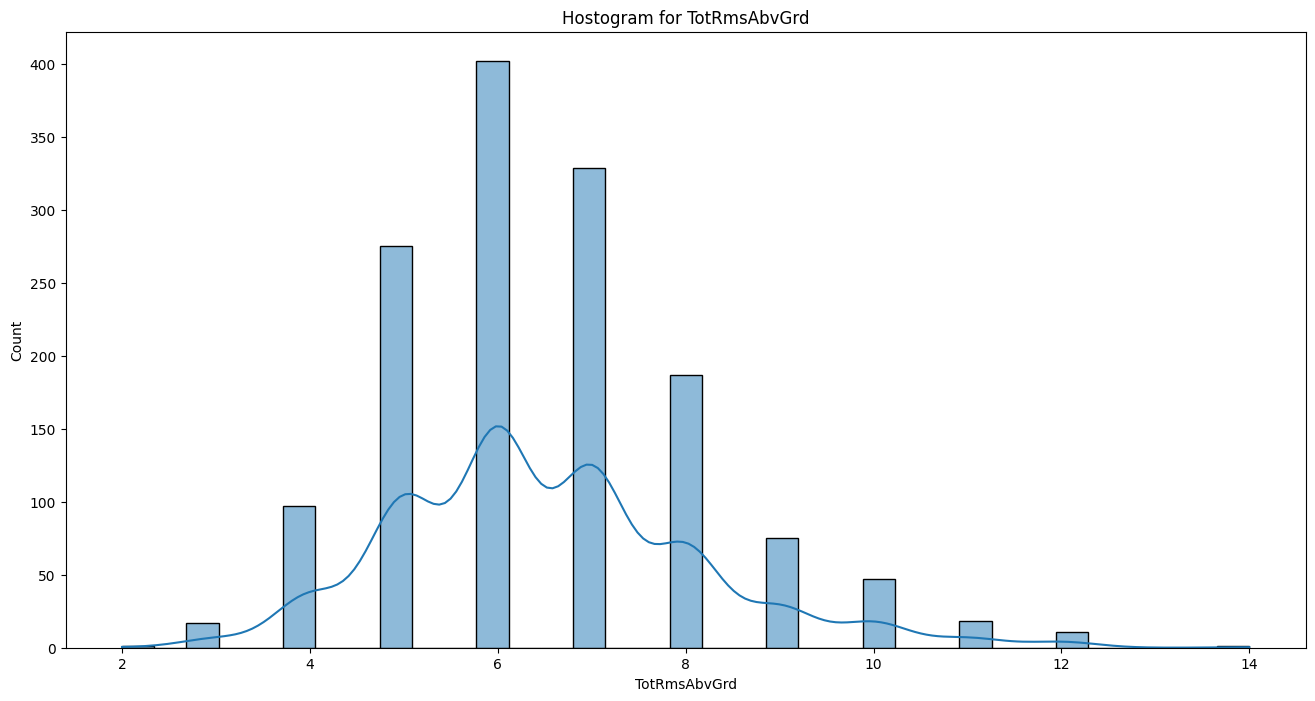

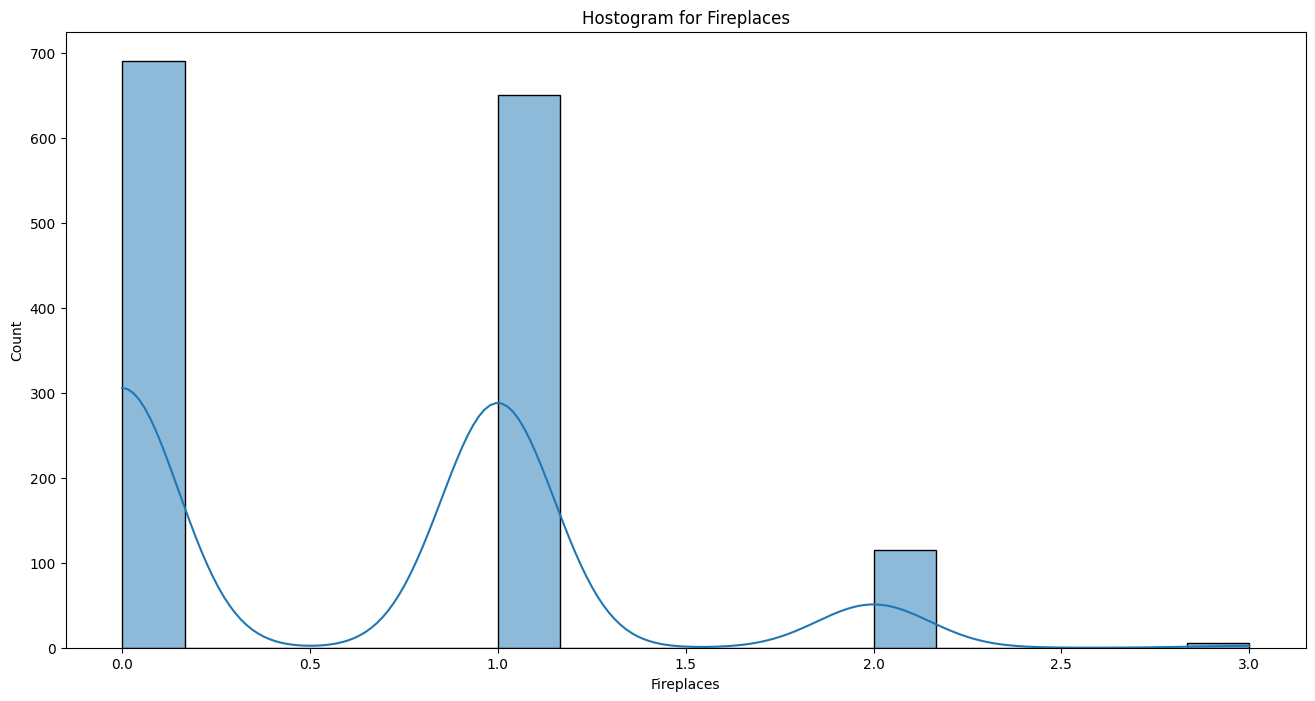

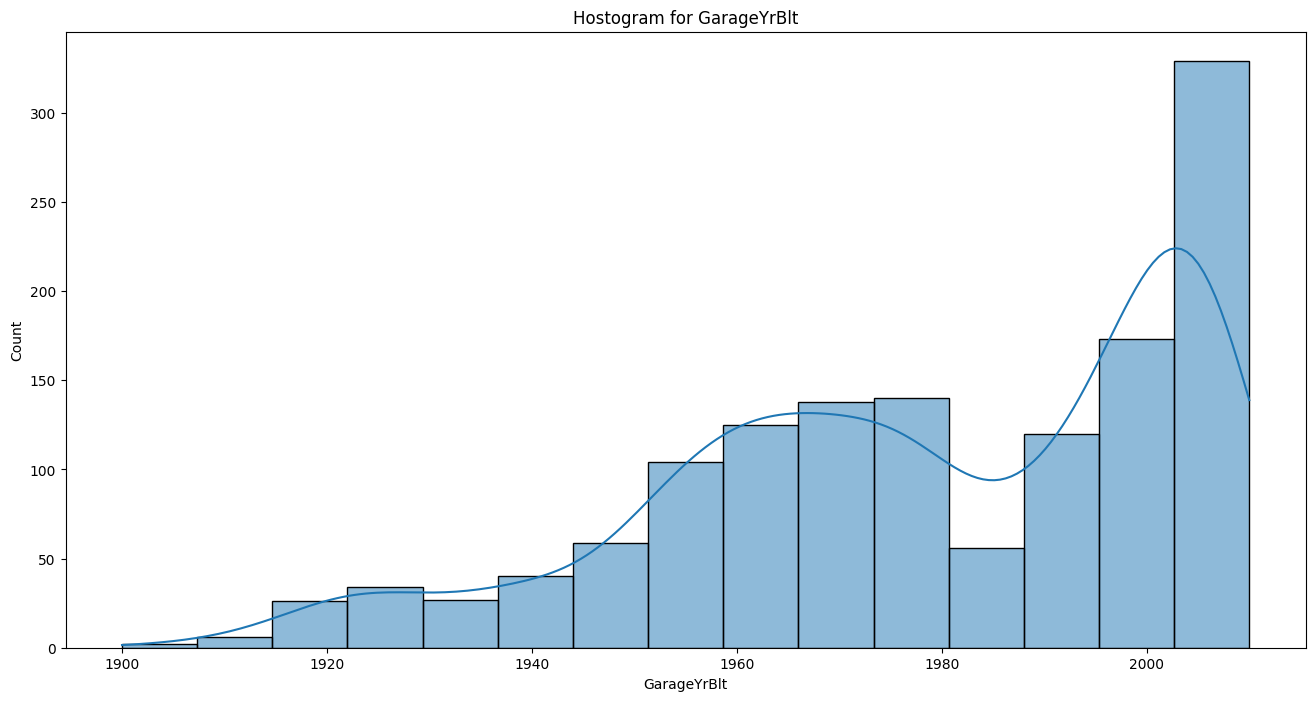

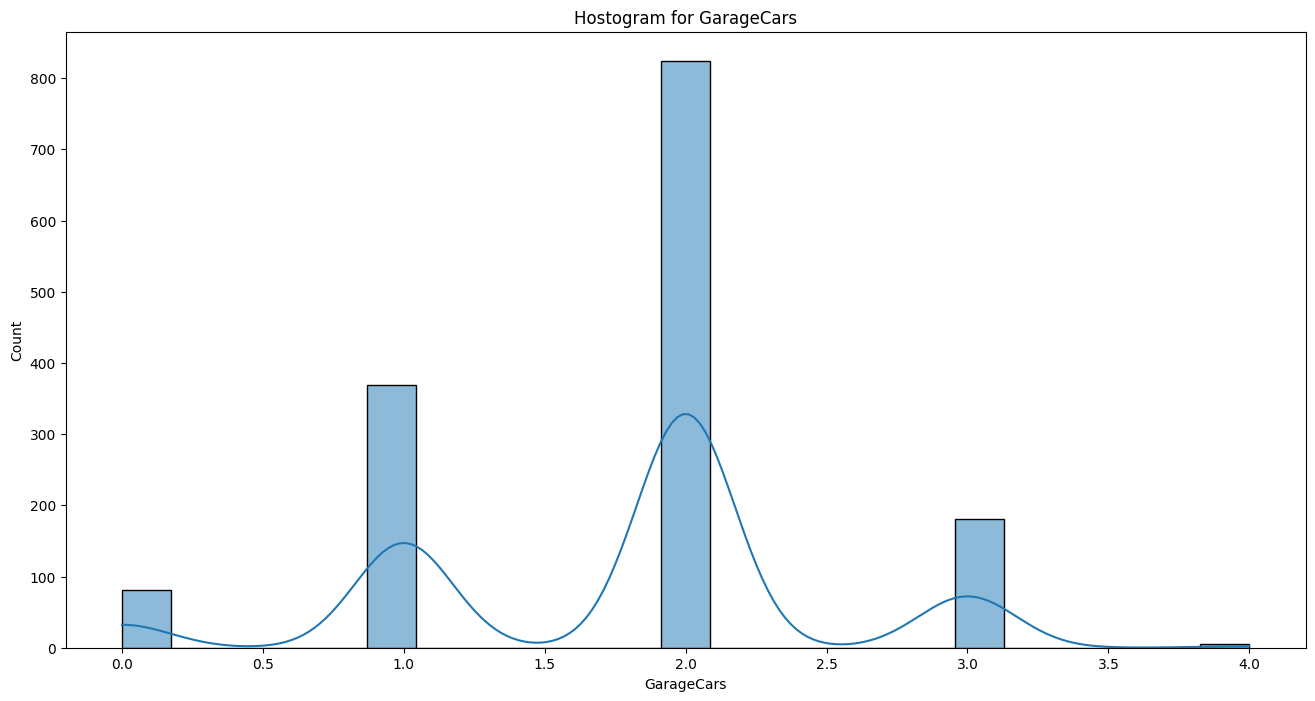

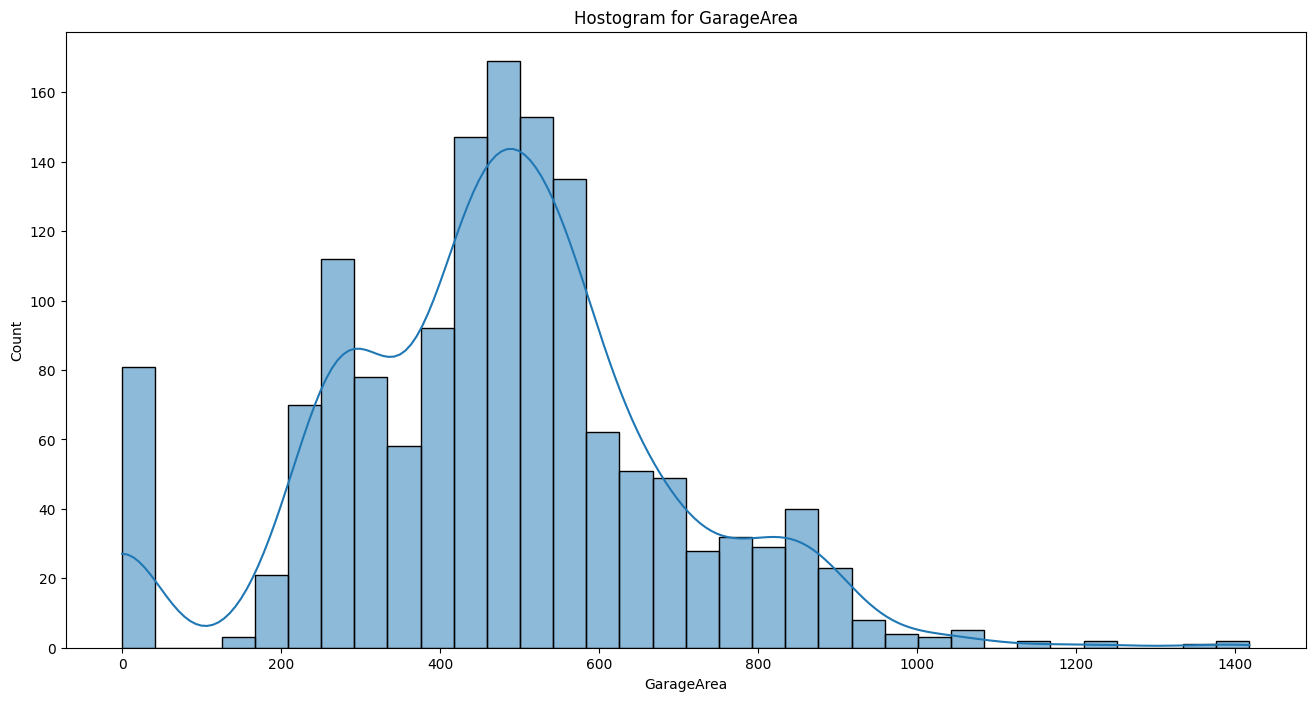

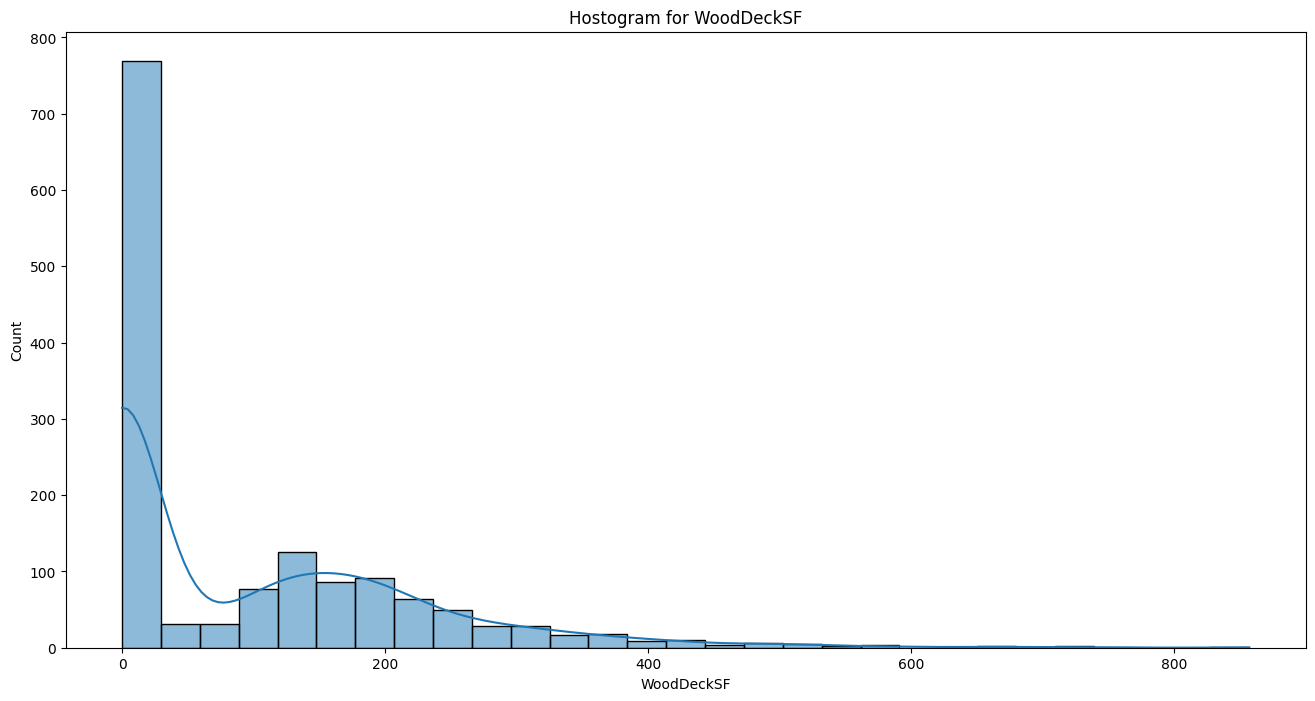

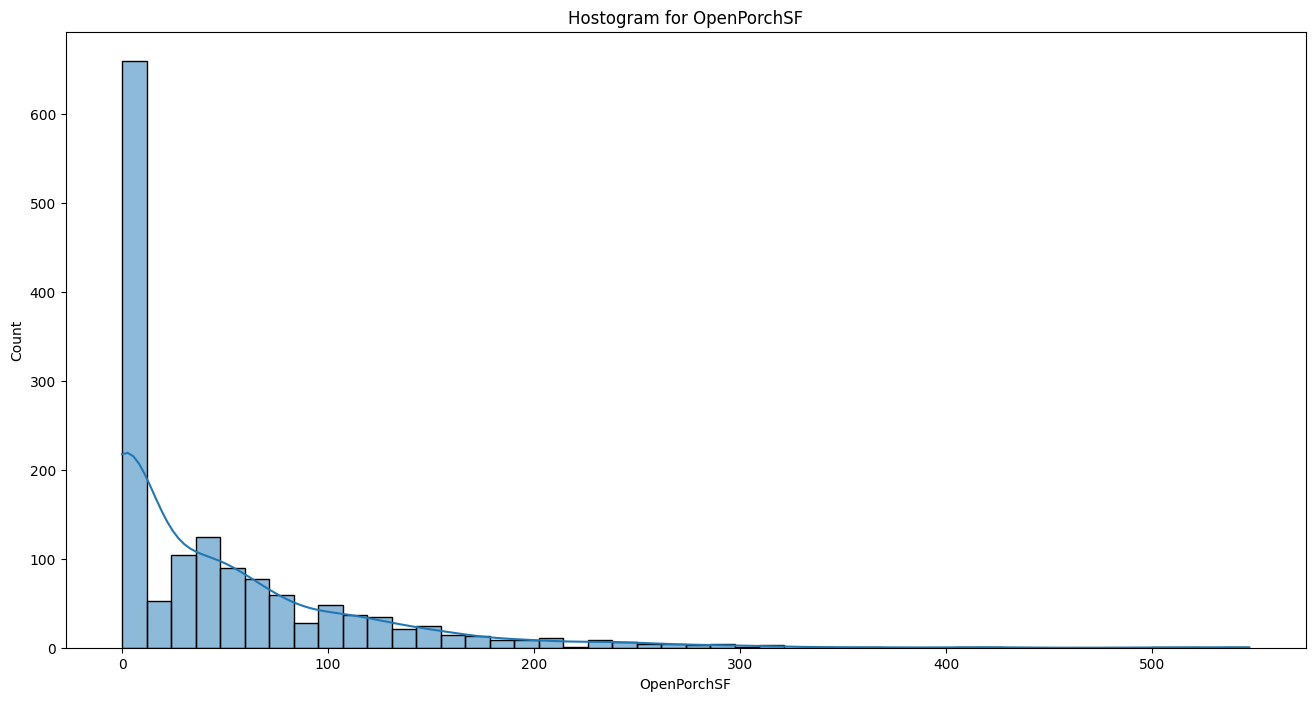

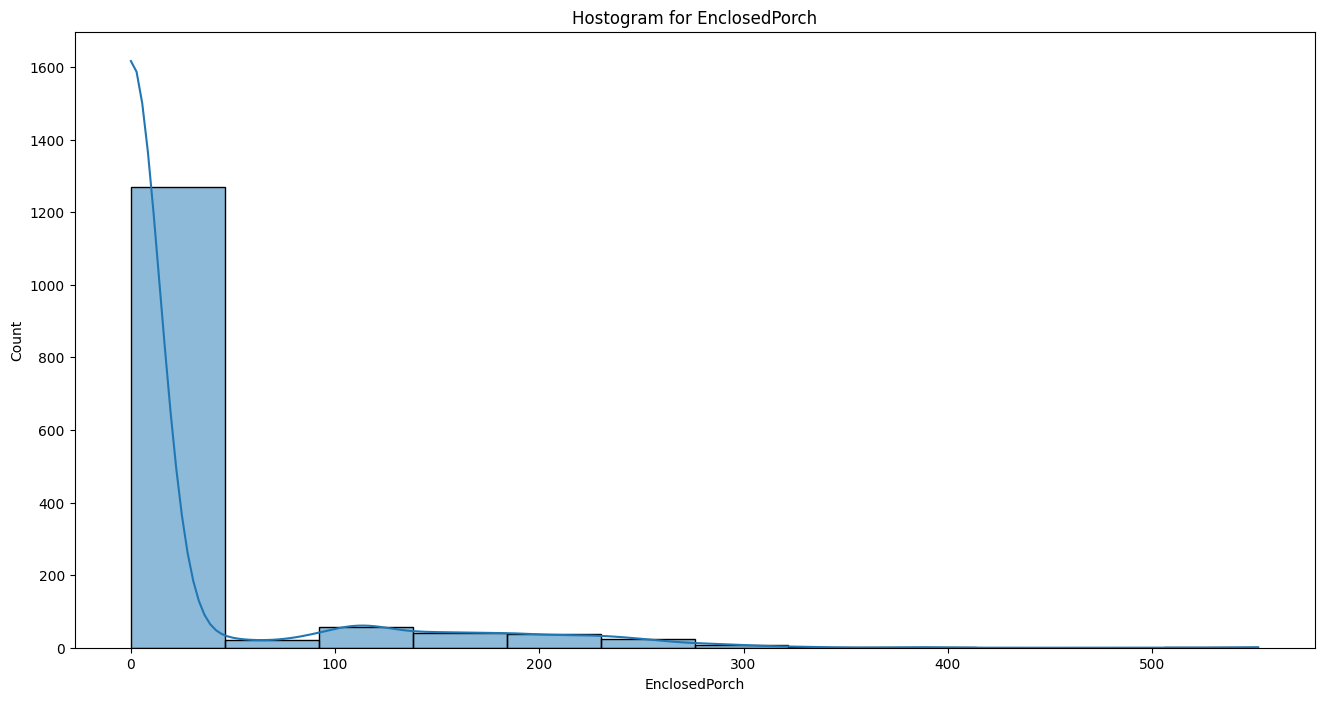

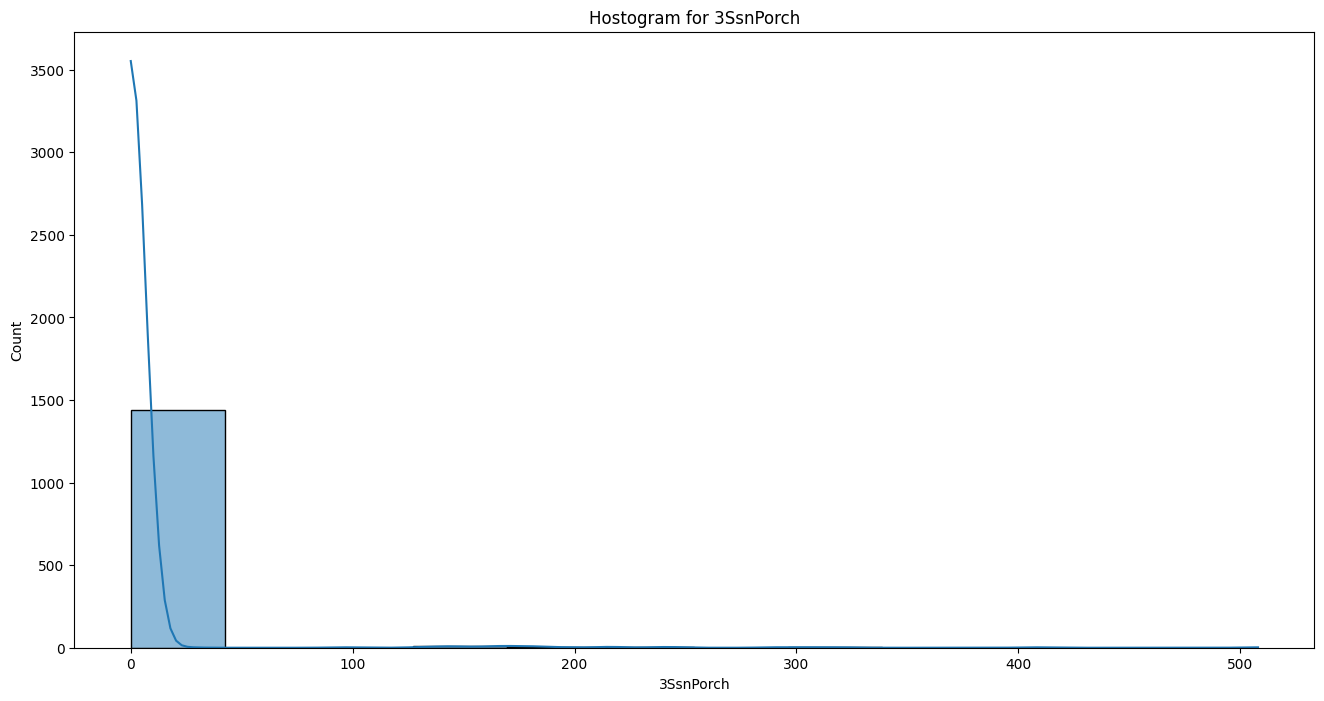

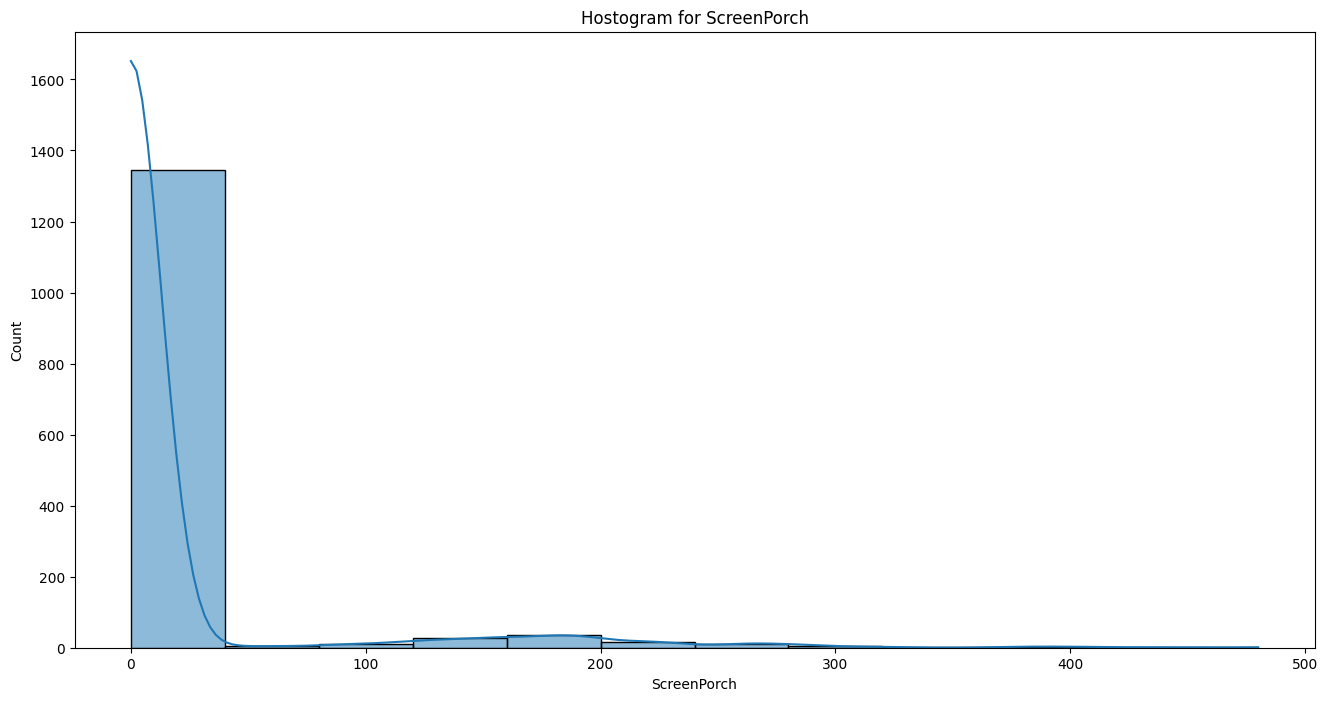

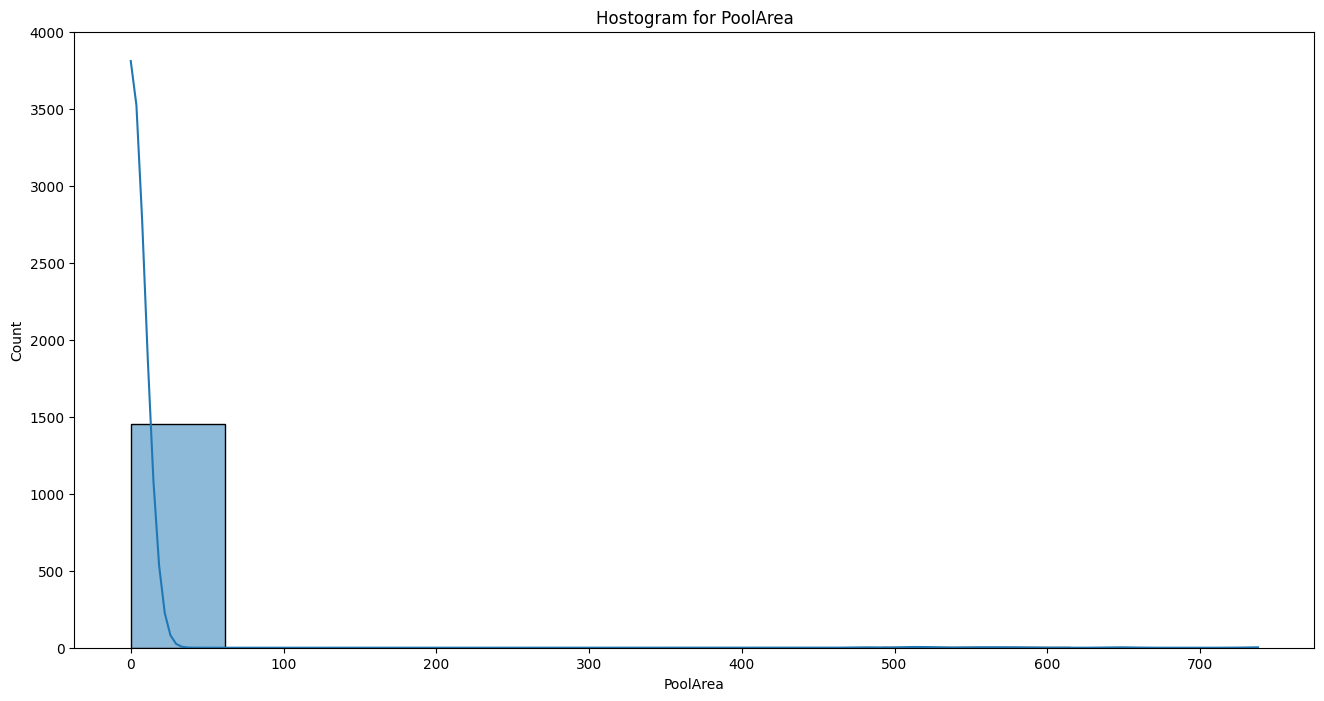

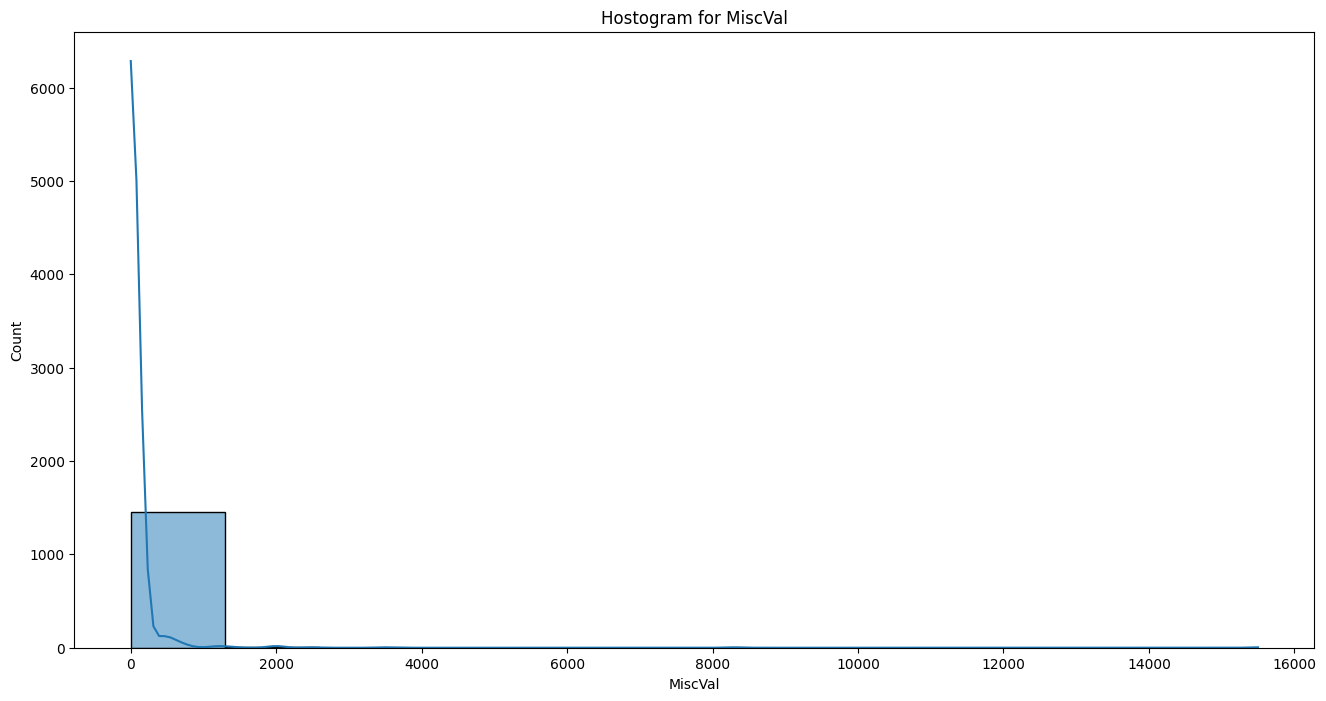

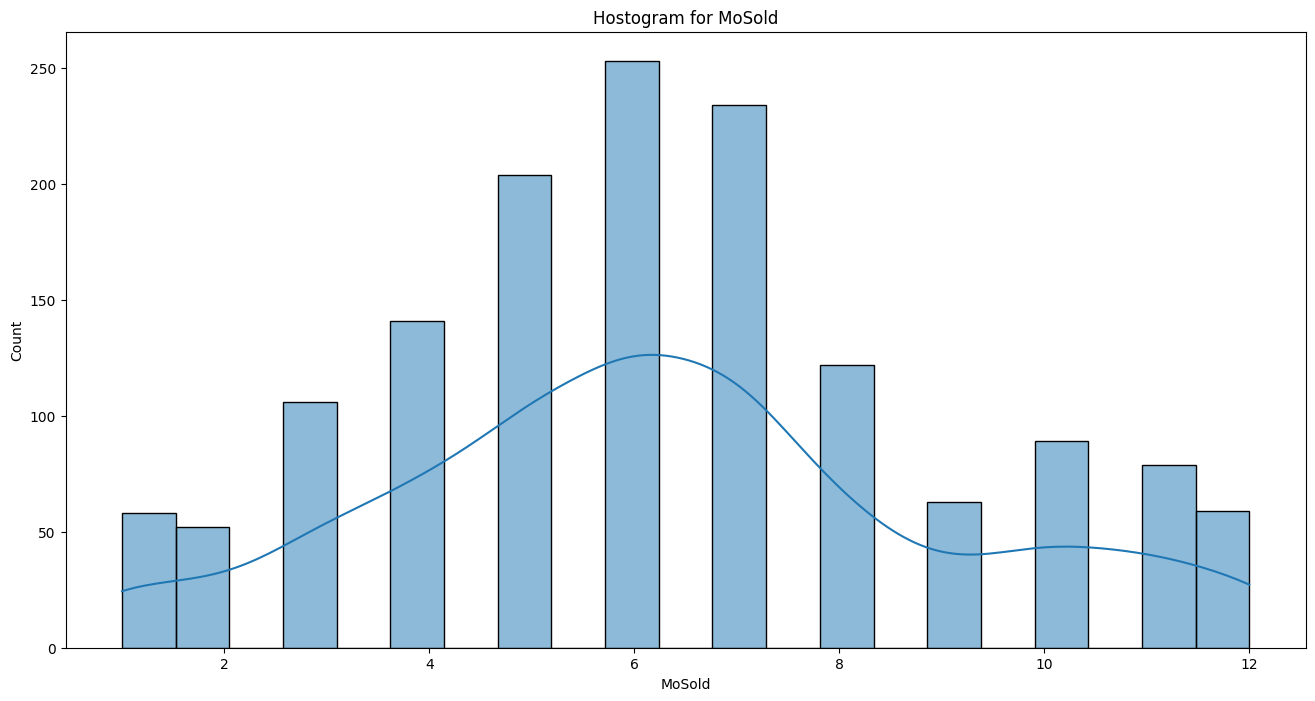

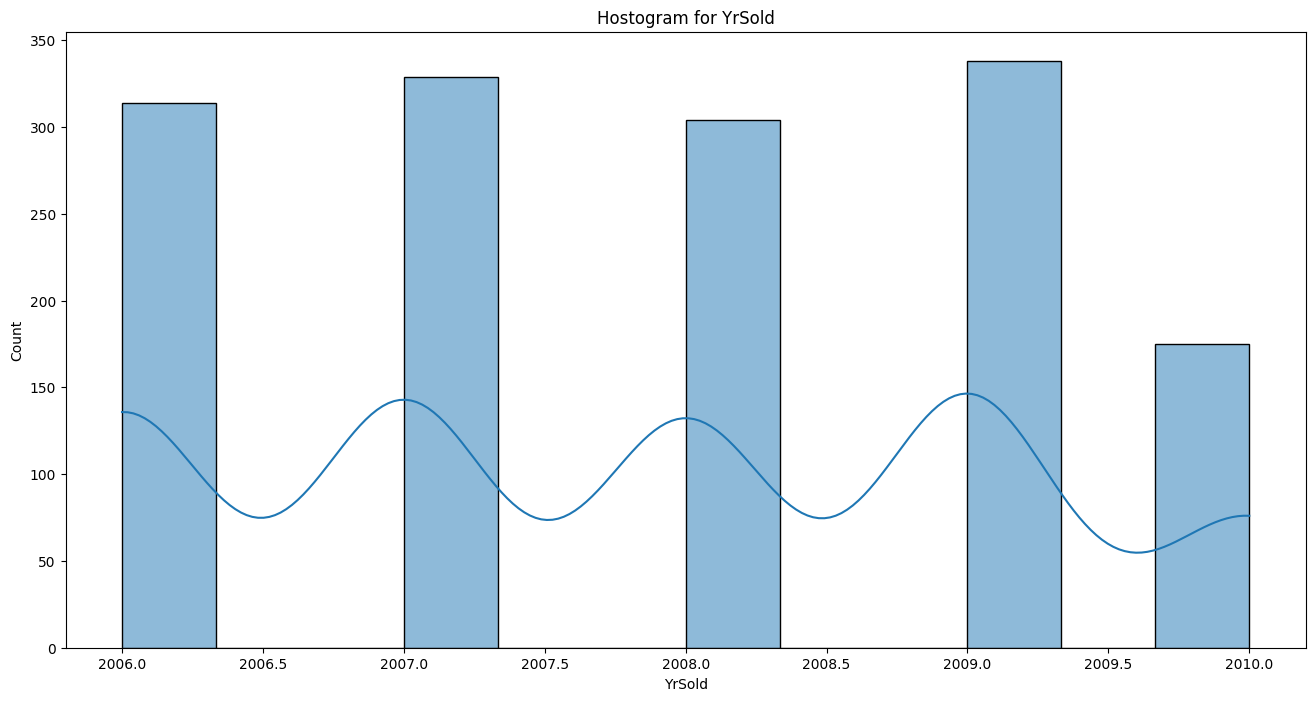

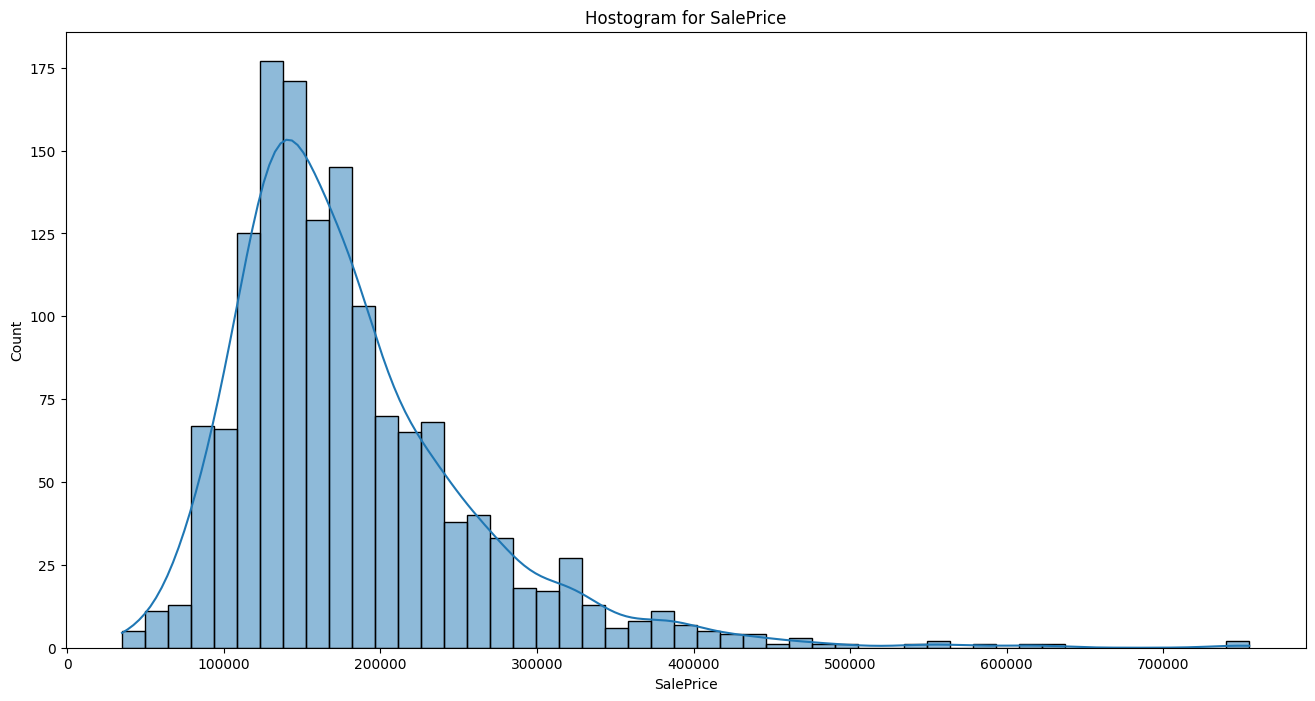

In [15]:
for i in con:
    plt.figure(figsize=(16,8))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Hostogram for {i}')
    plt.show()

## Bivariate analysis
1. con vs con - Scatterplot

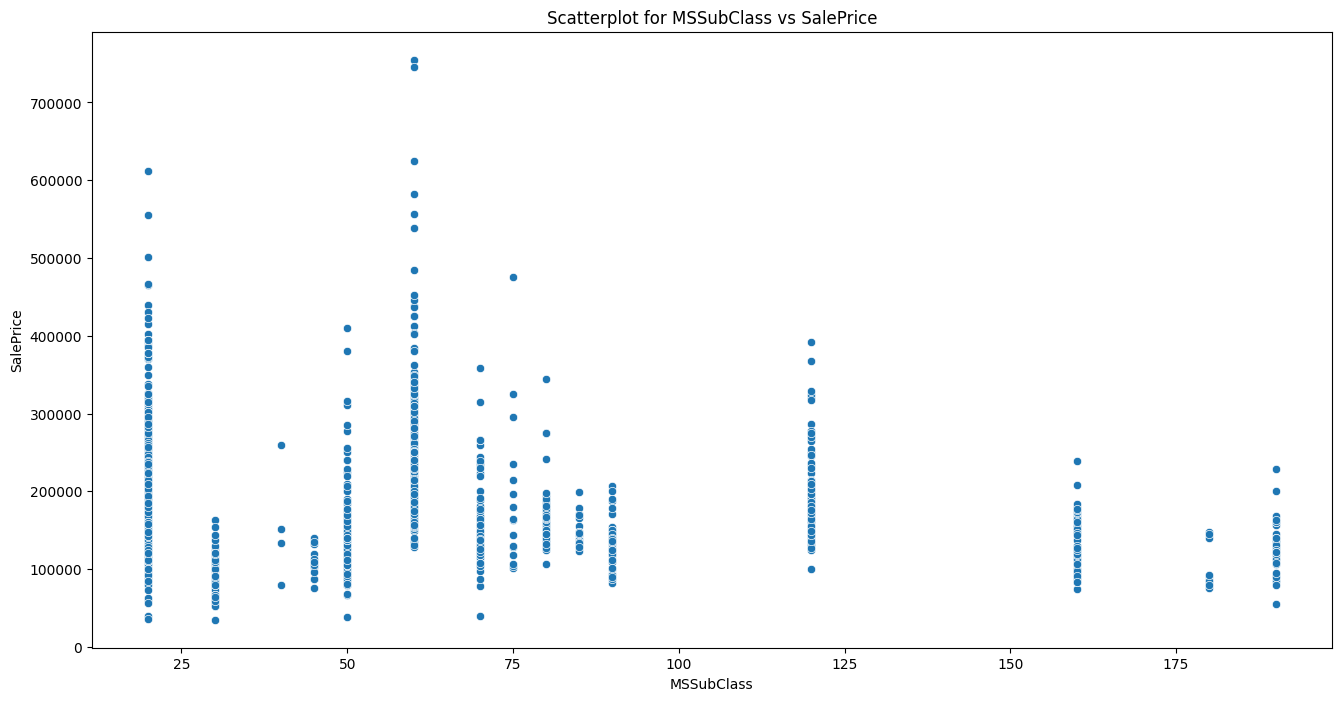

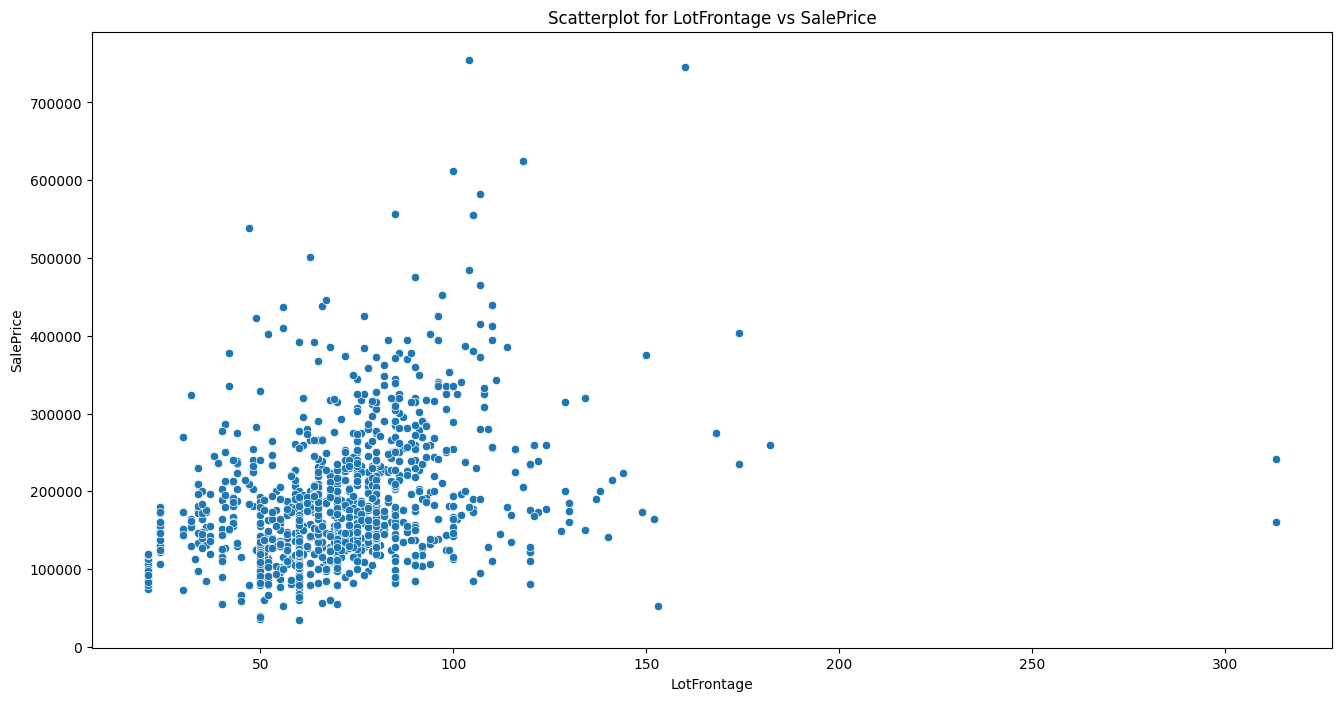

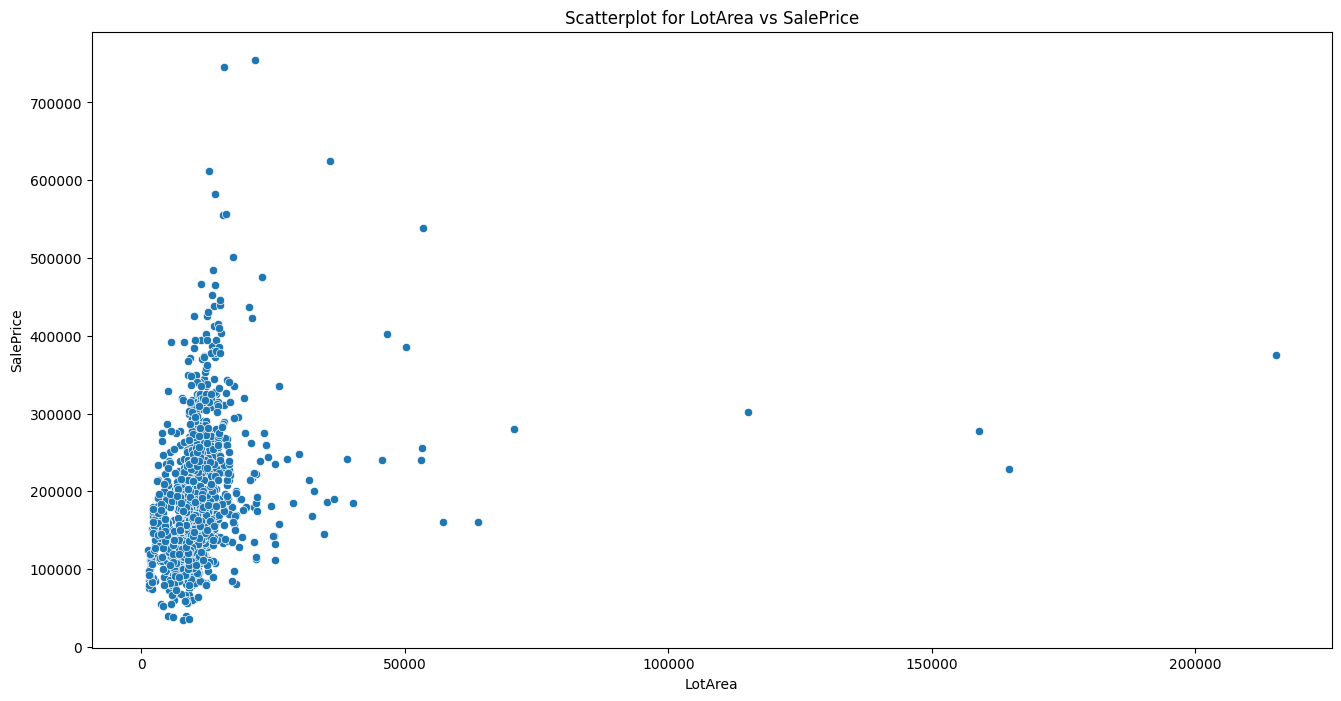

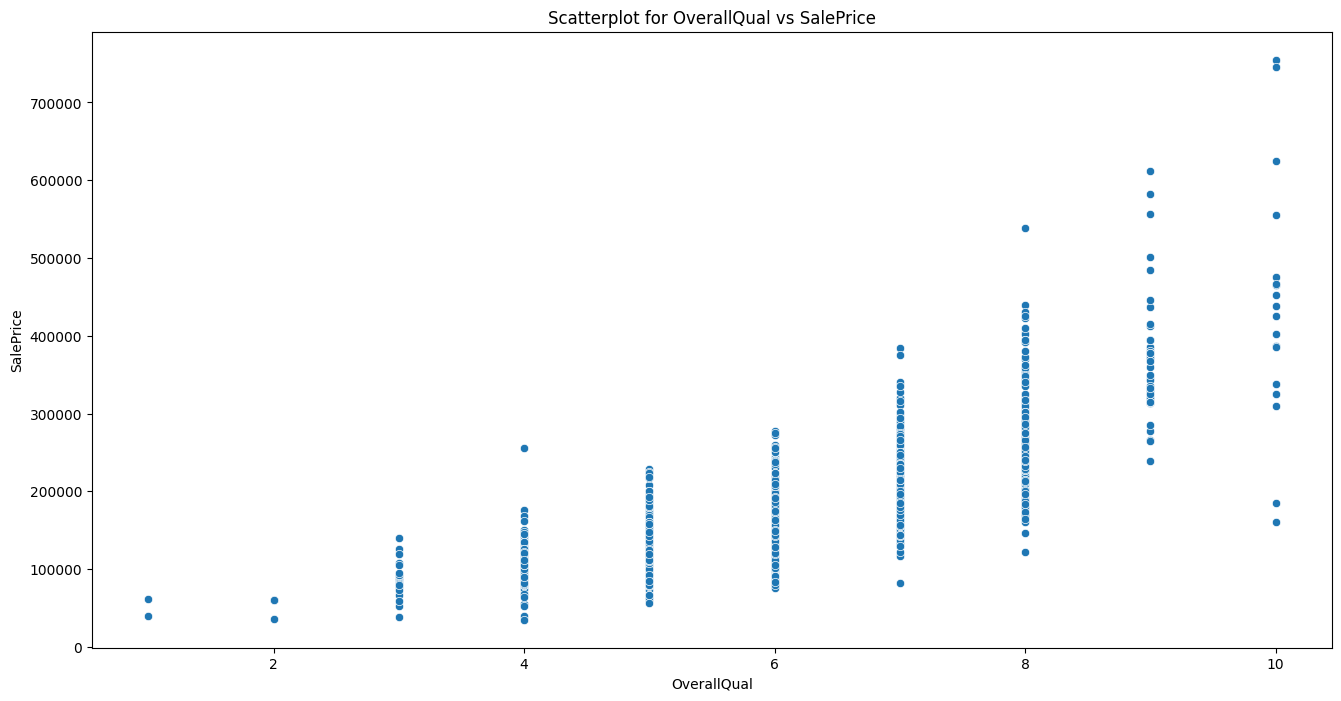

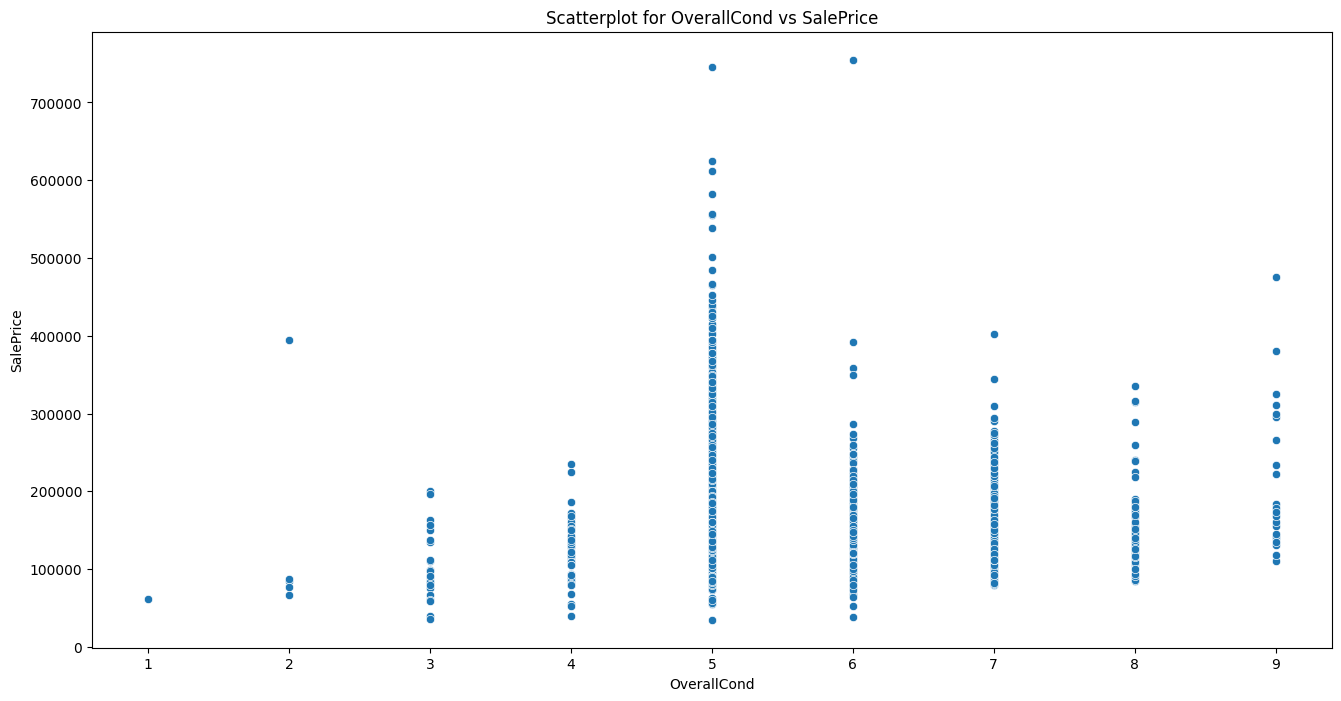

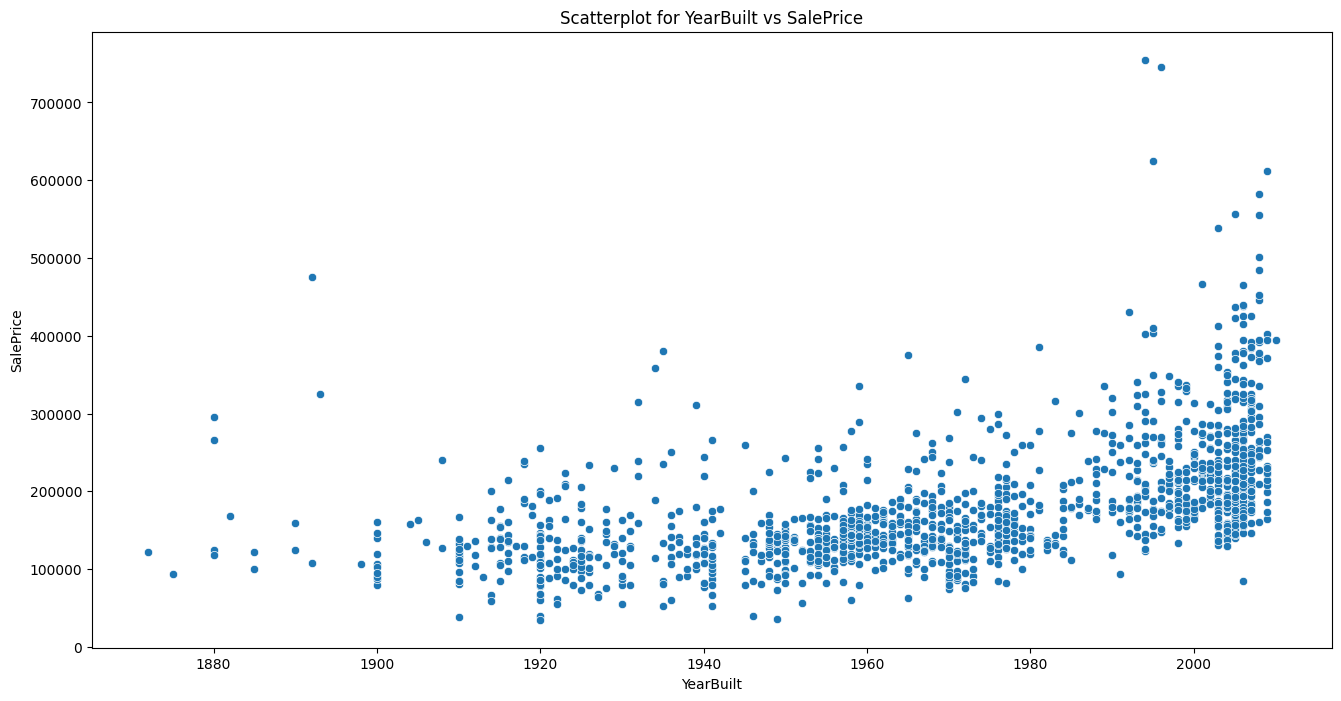

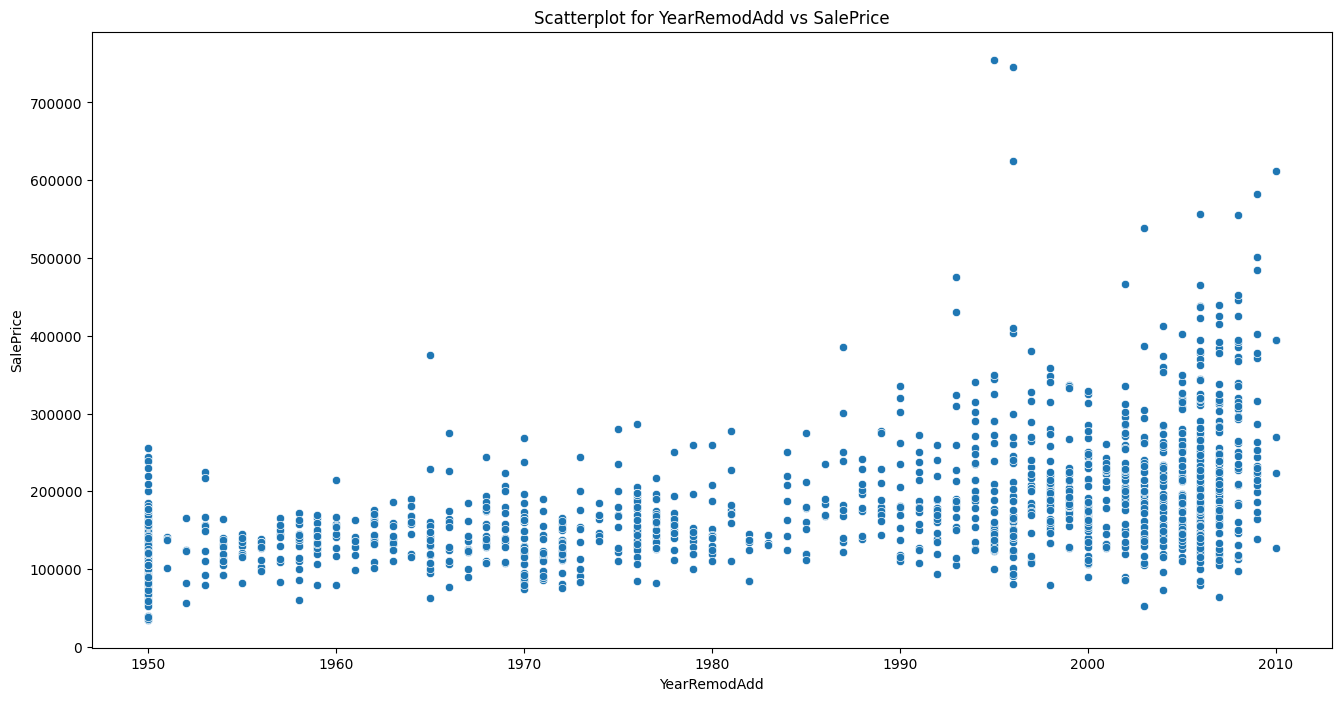

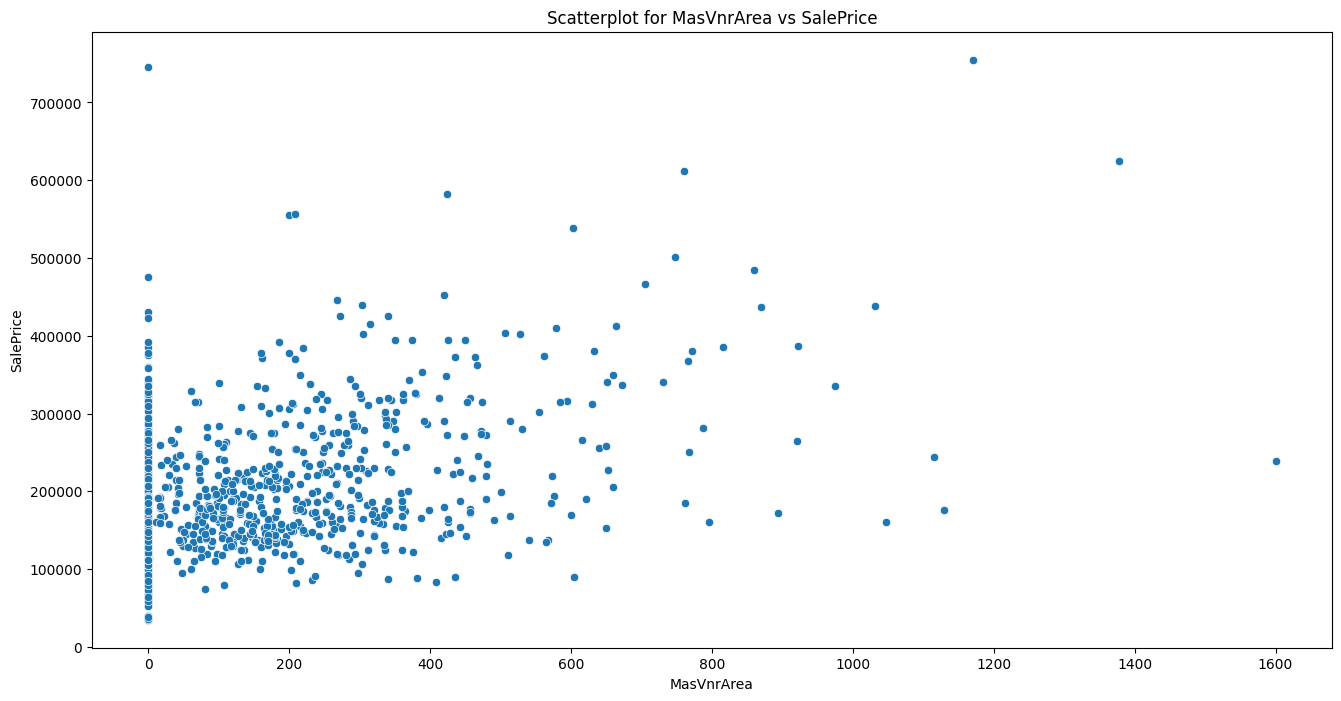

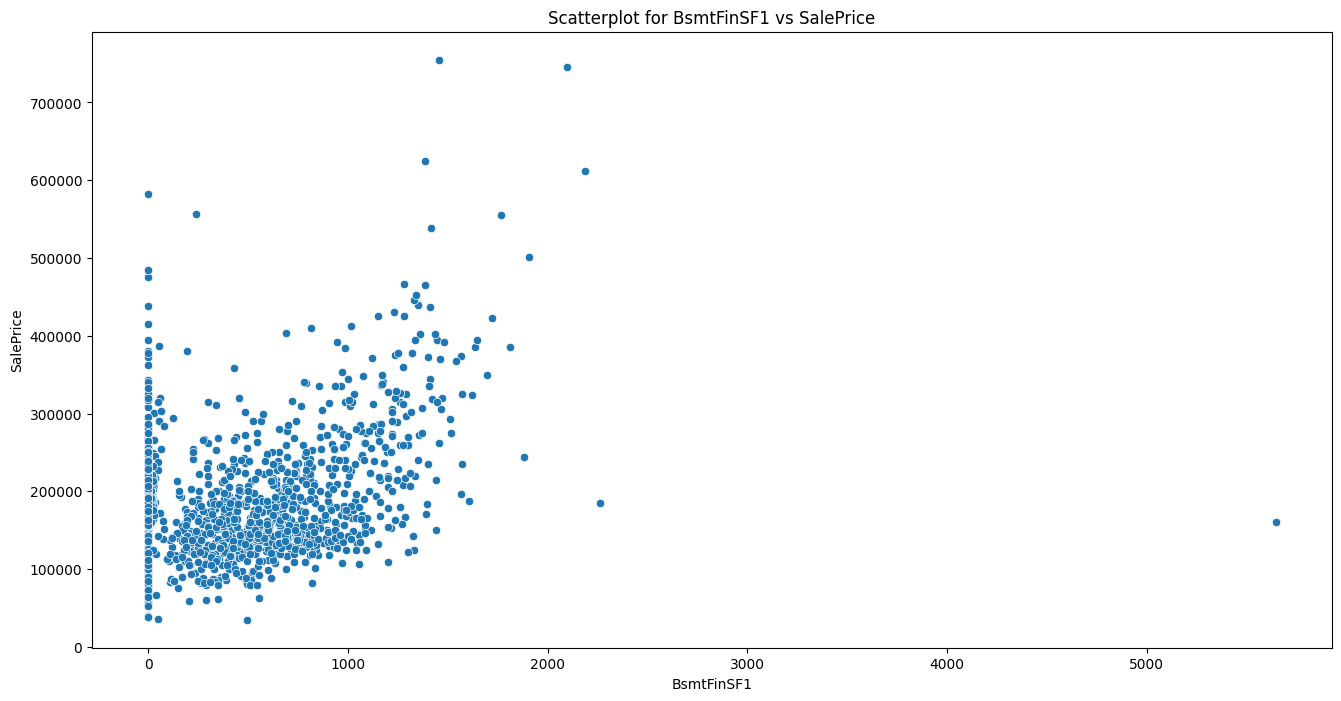

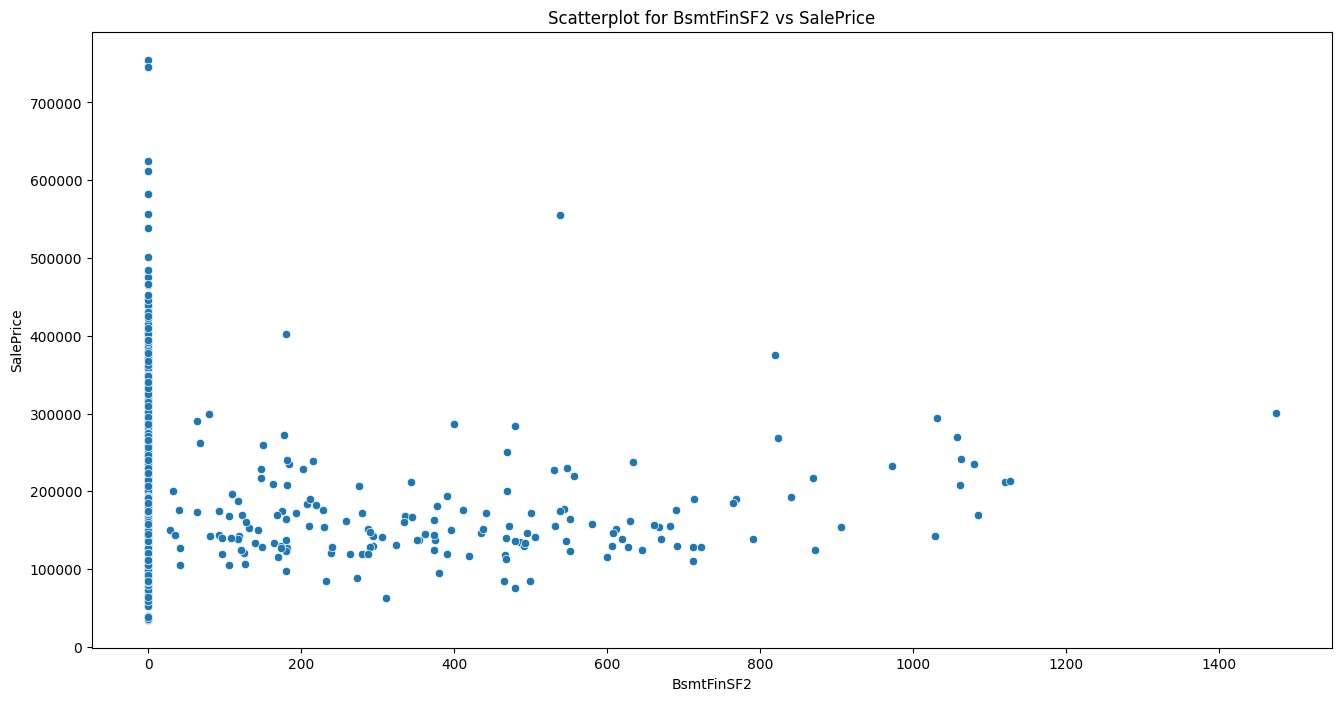

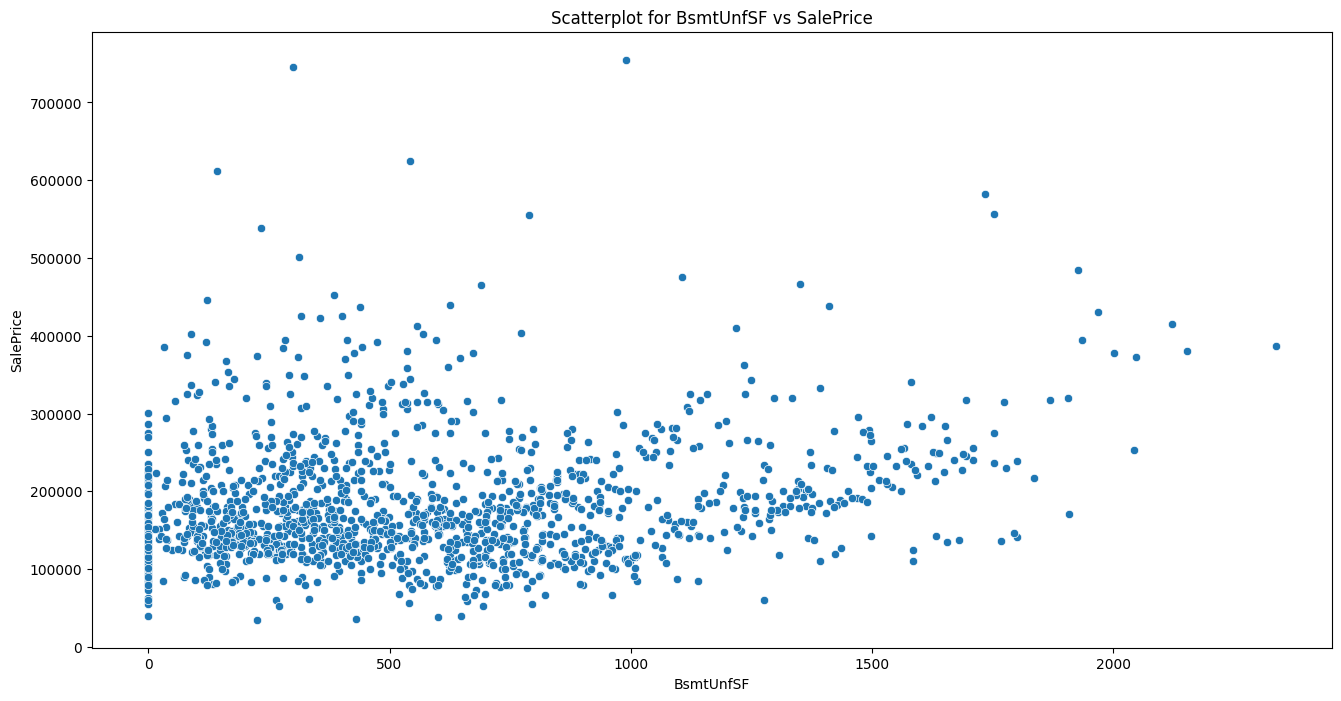

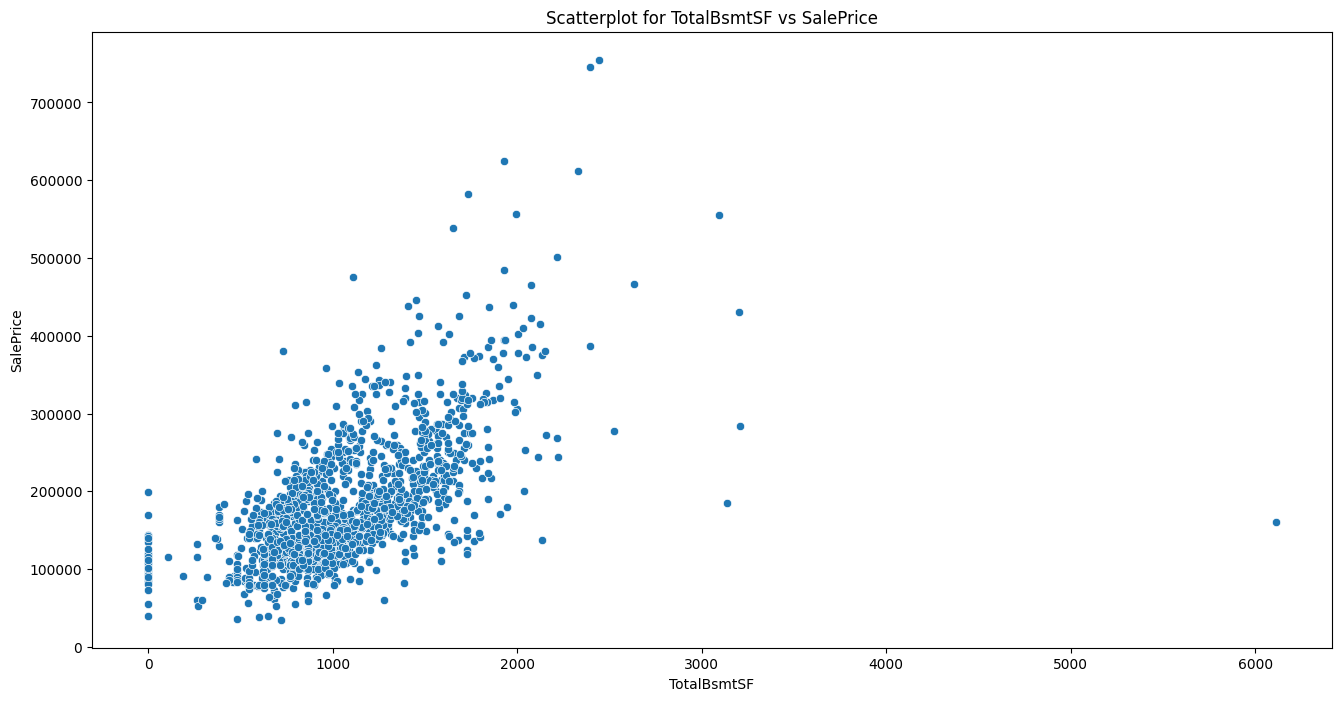

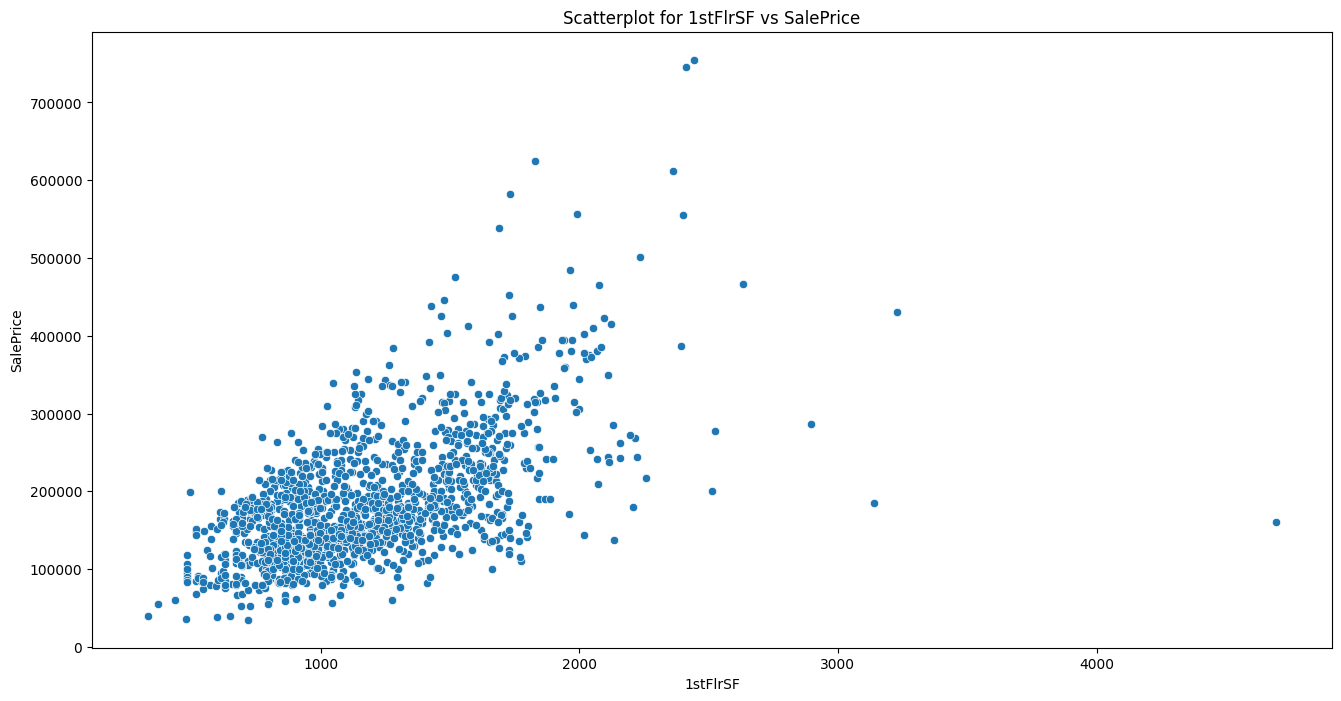

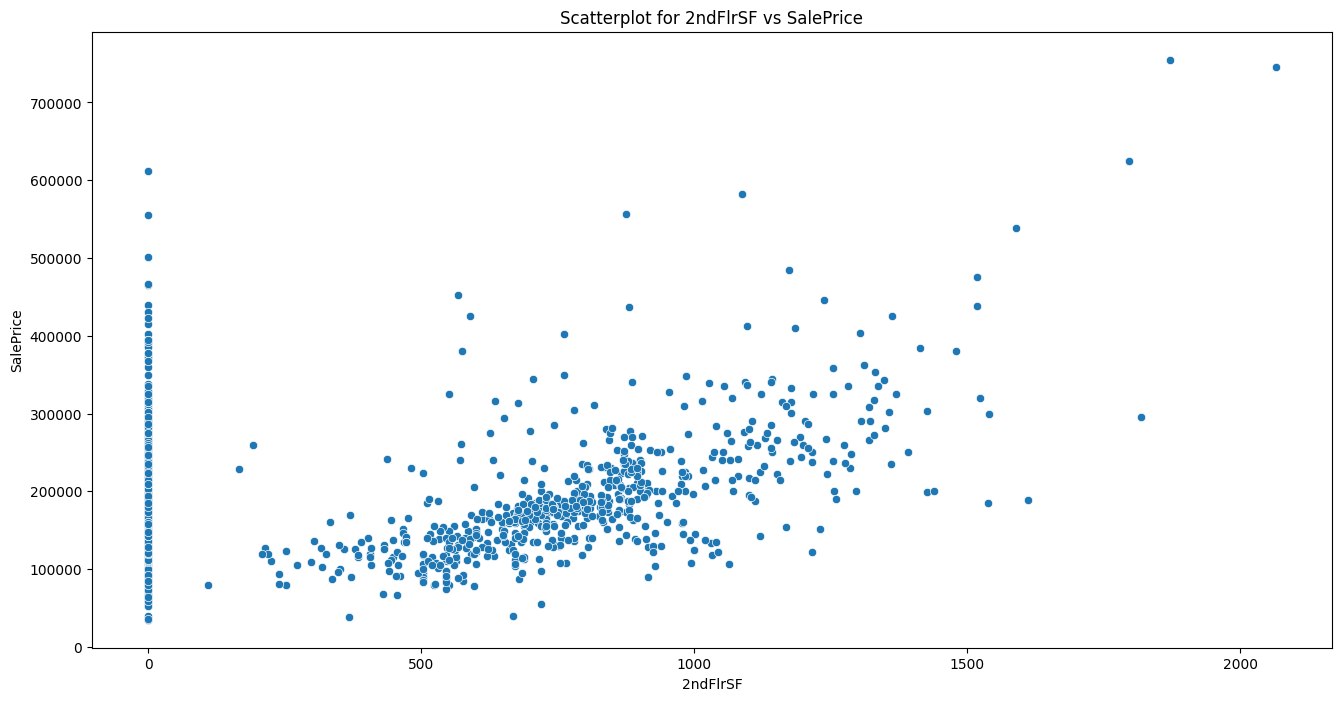

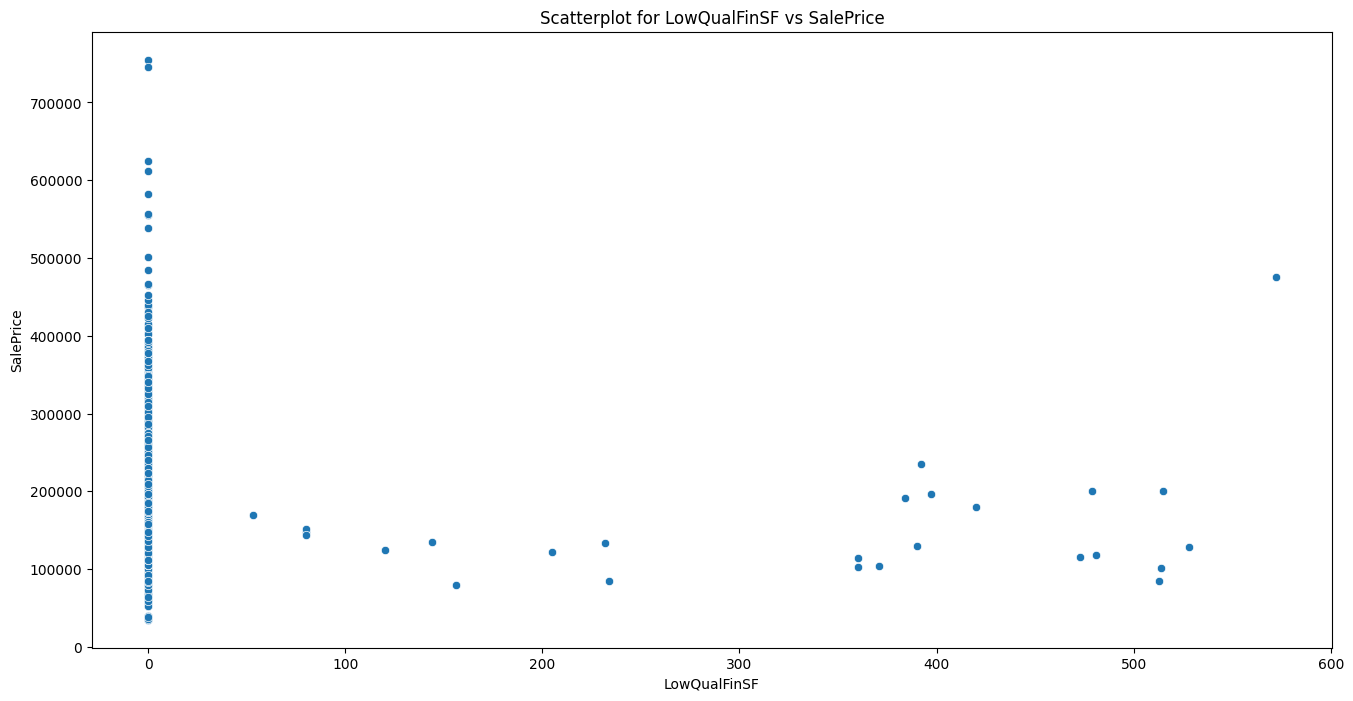

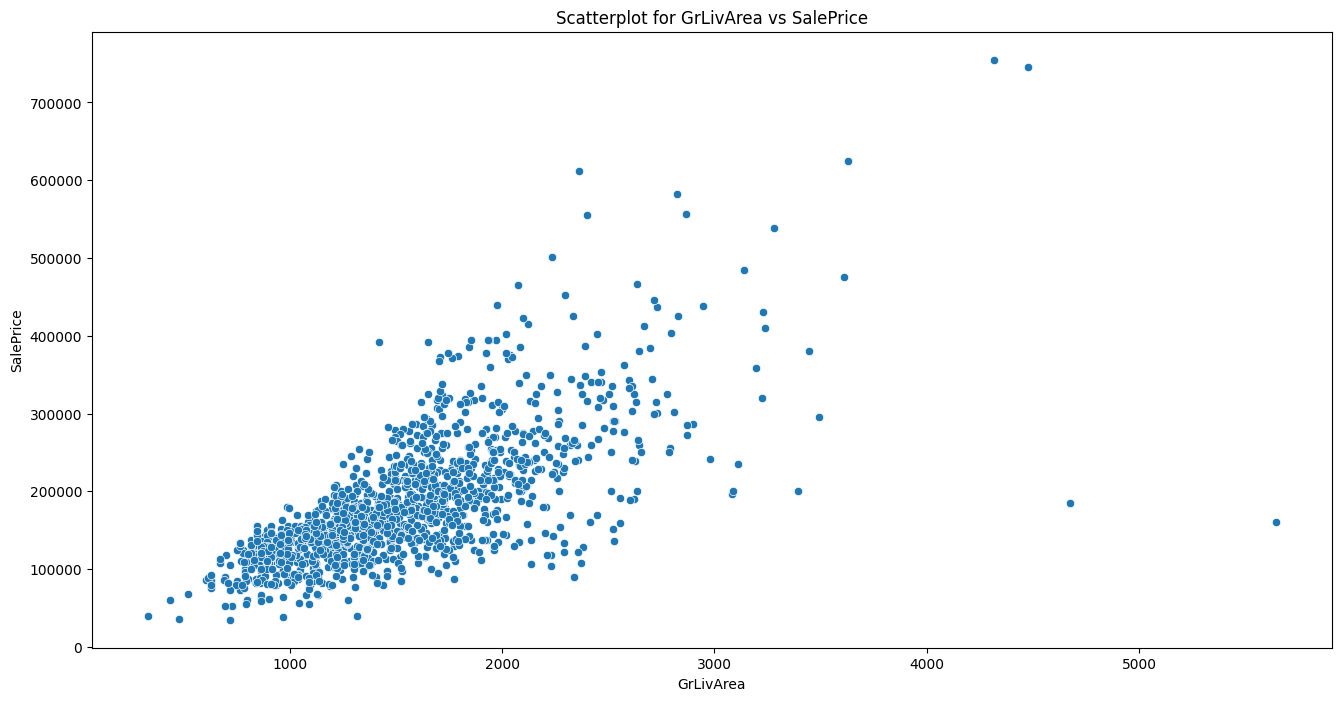

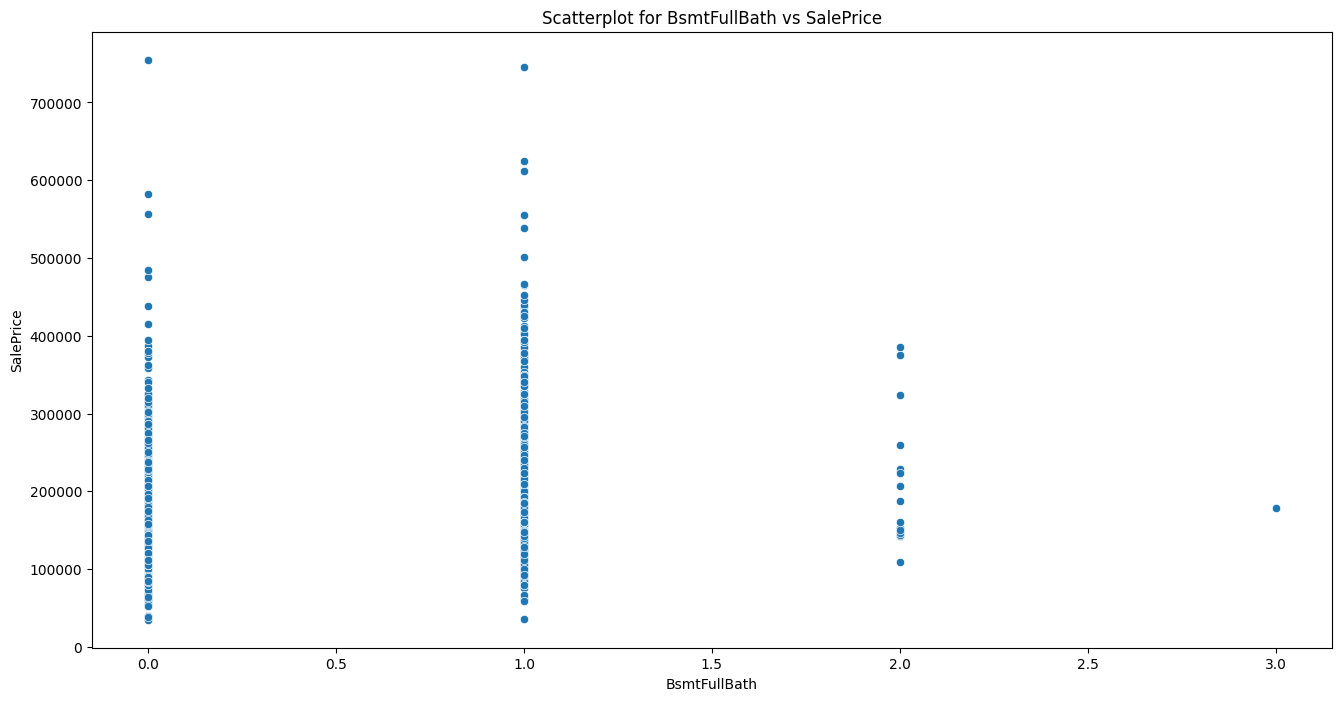

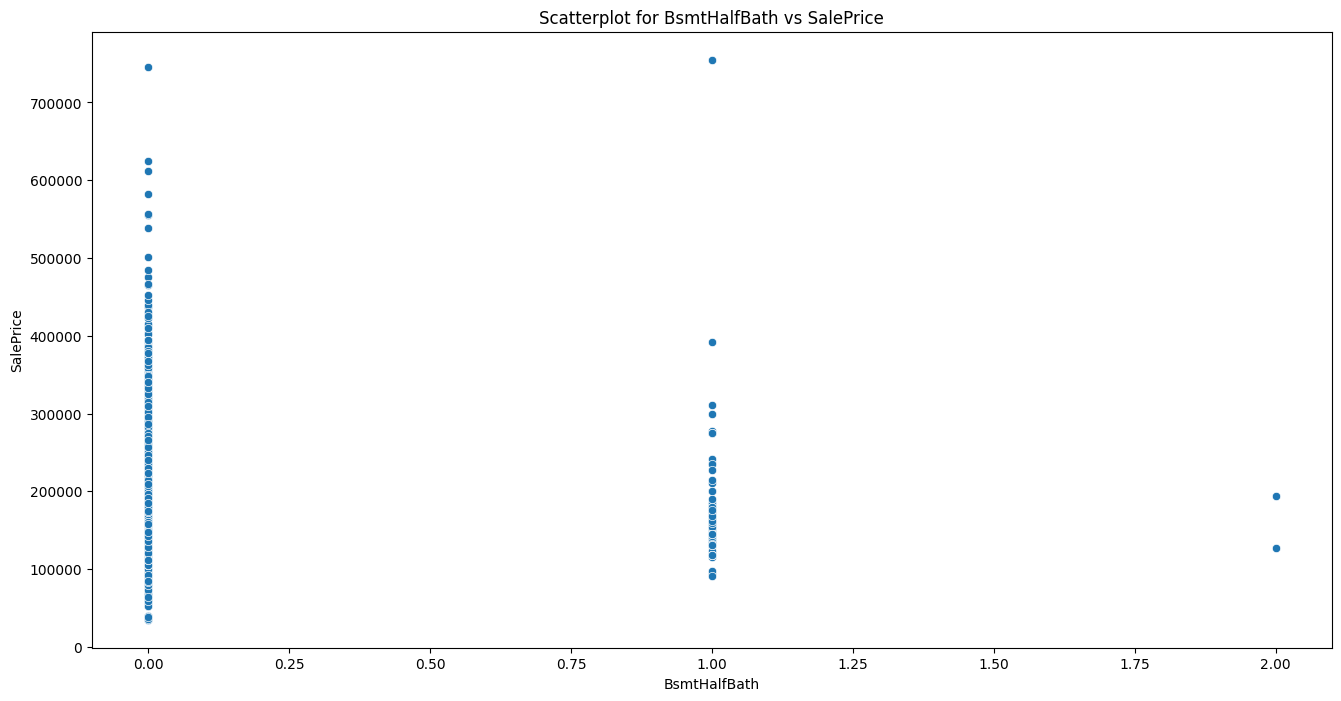

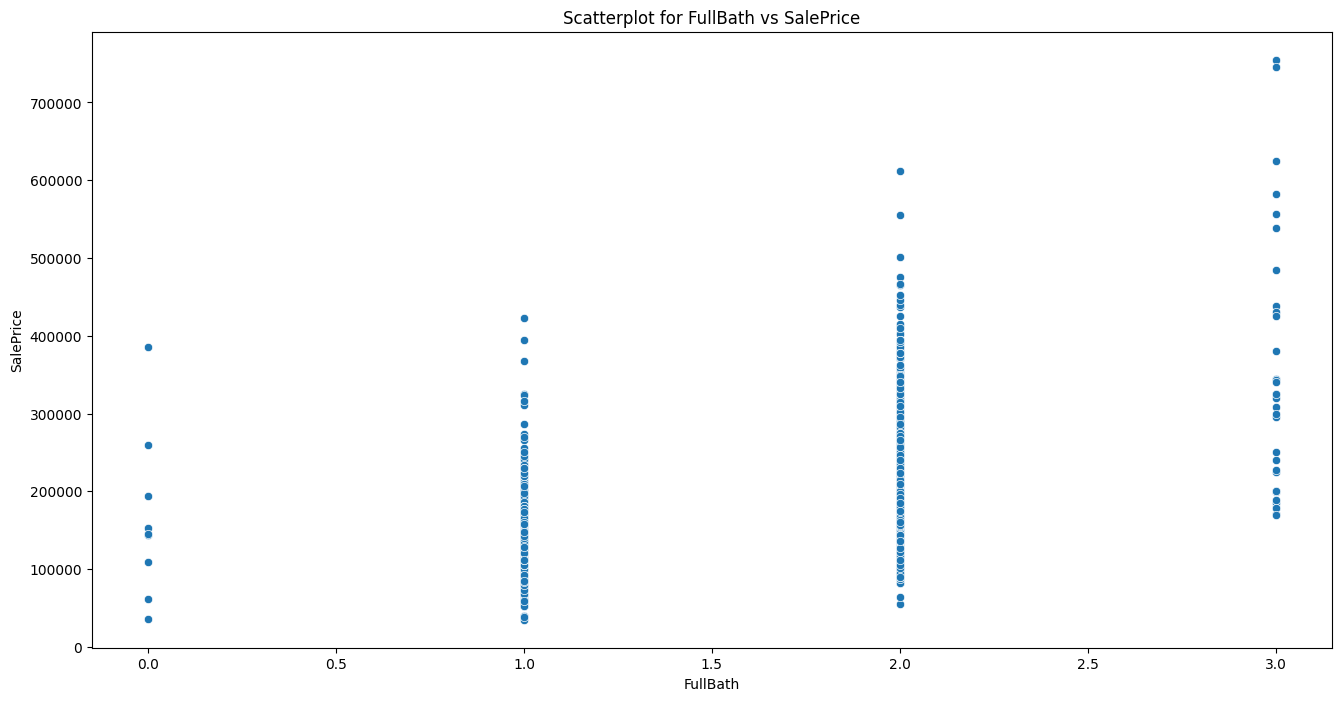

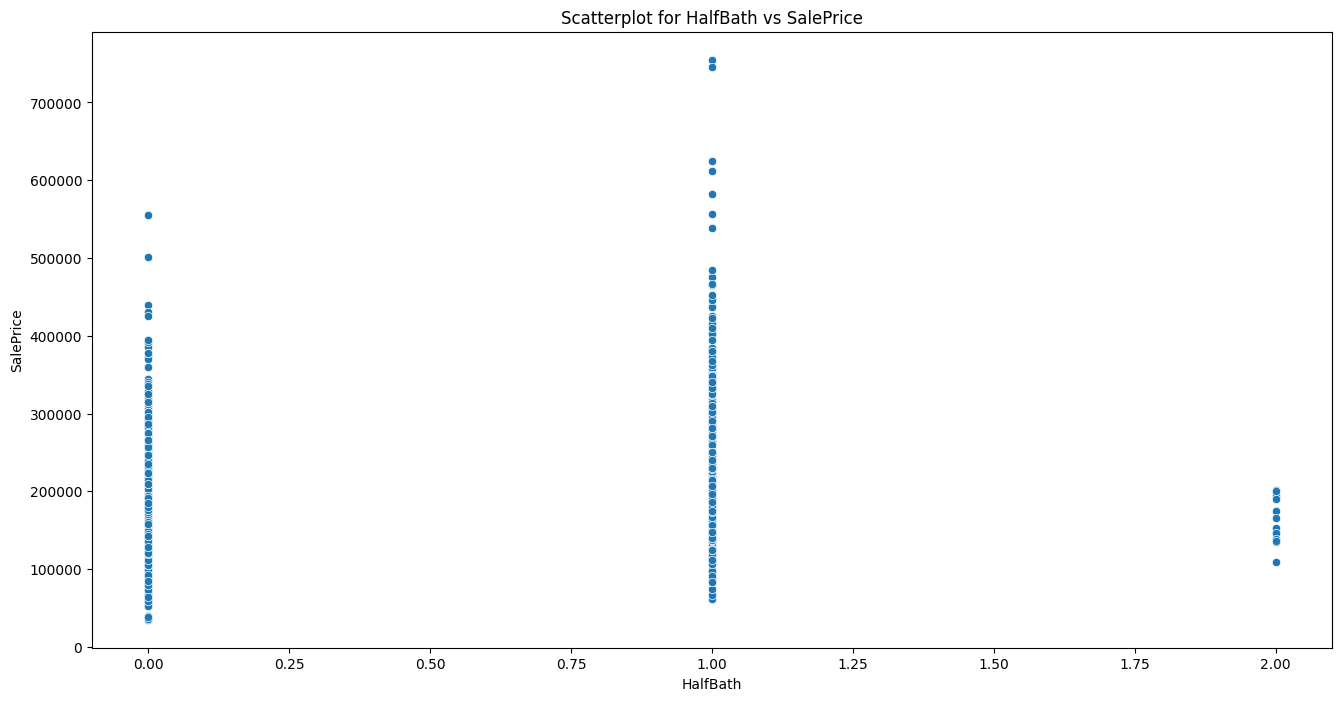

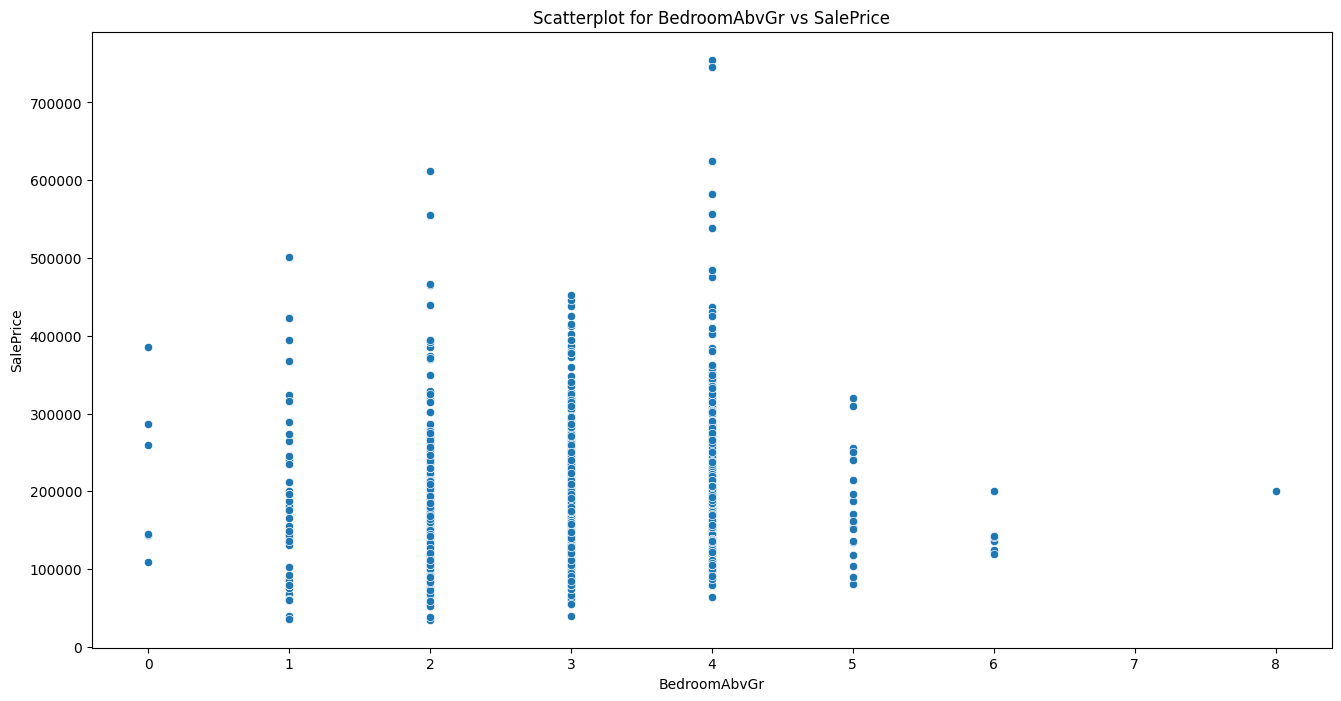

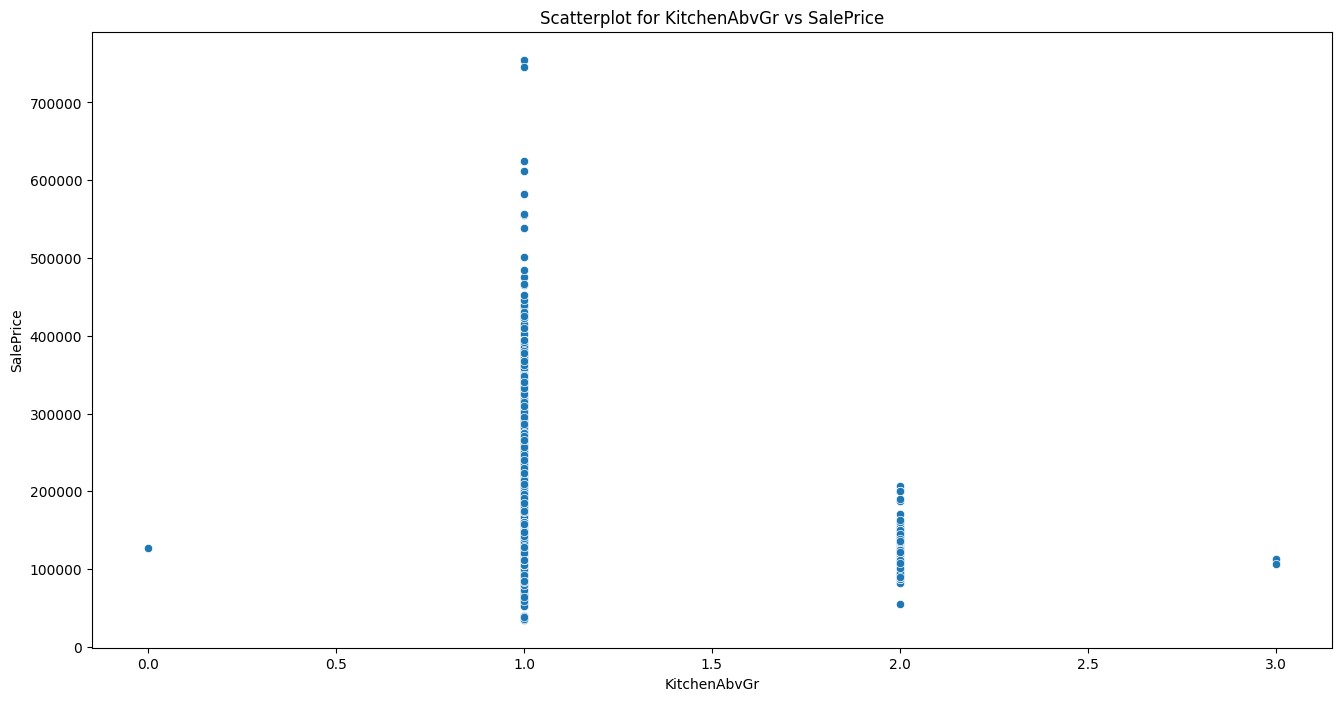

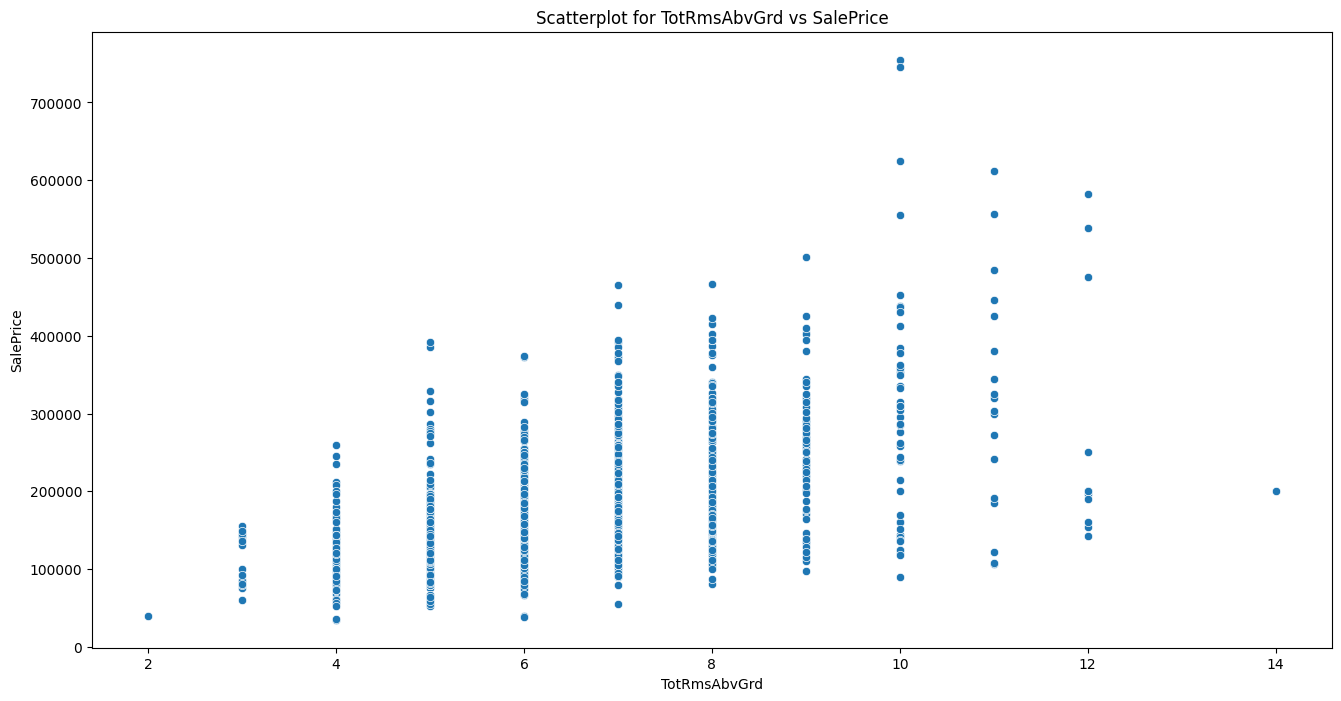

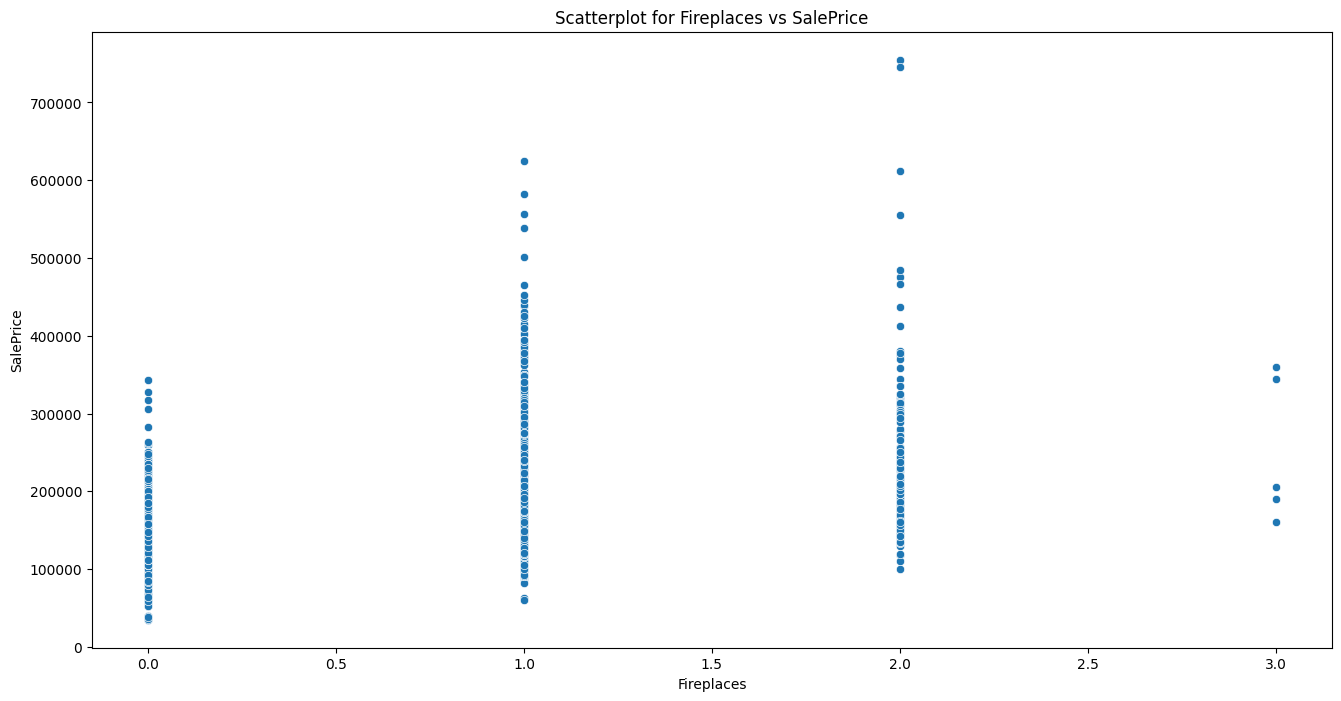

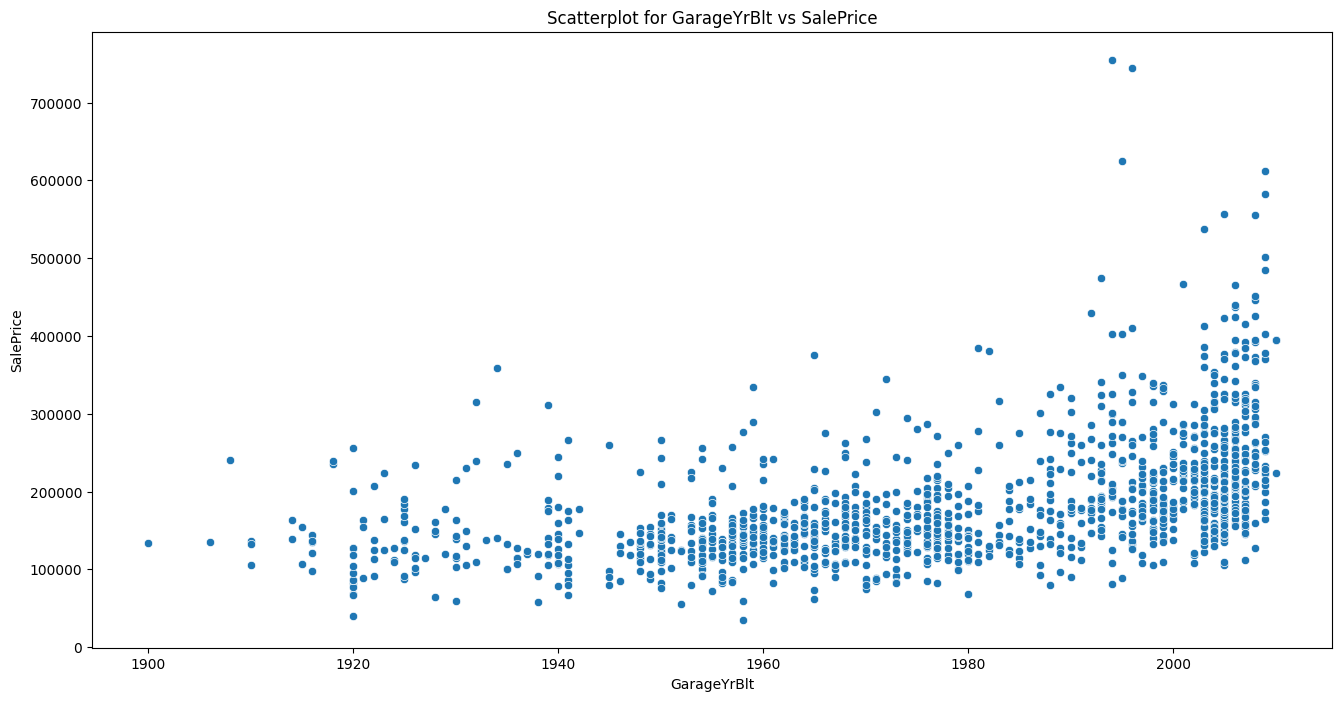

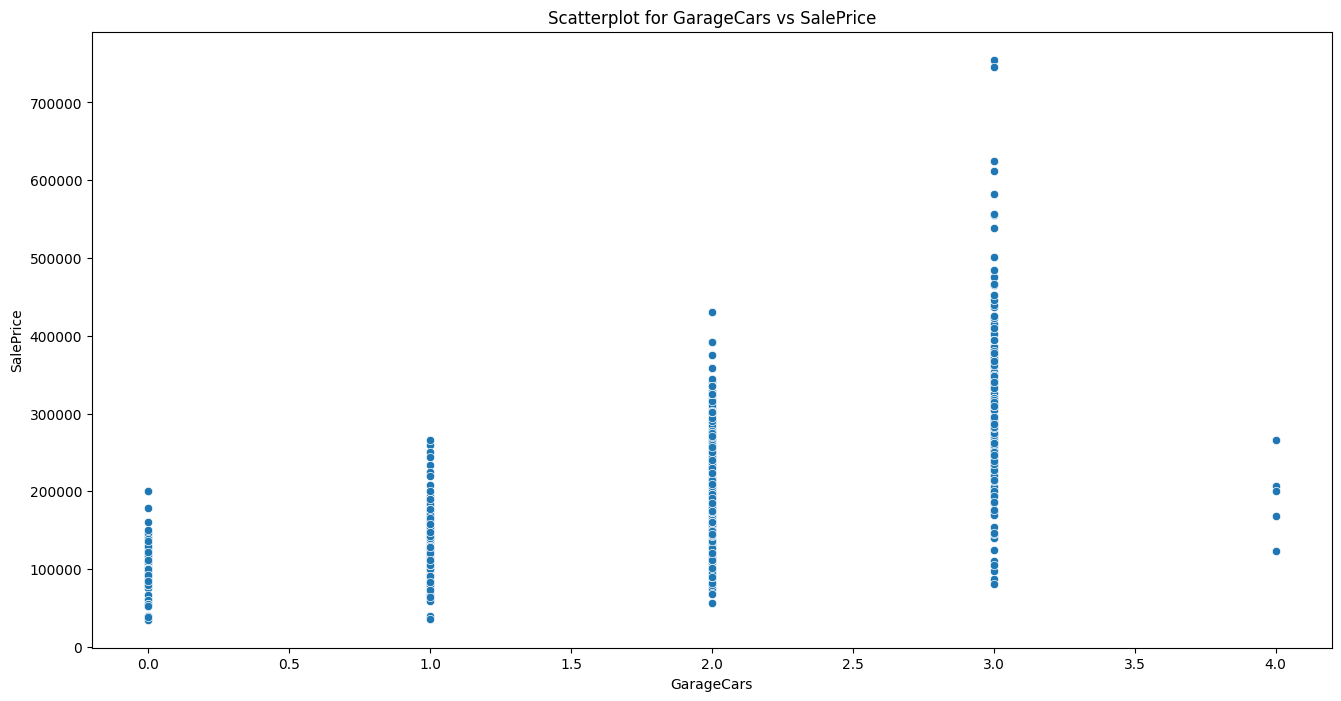

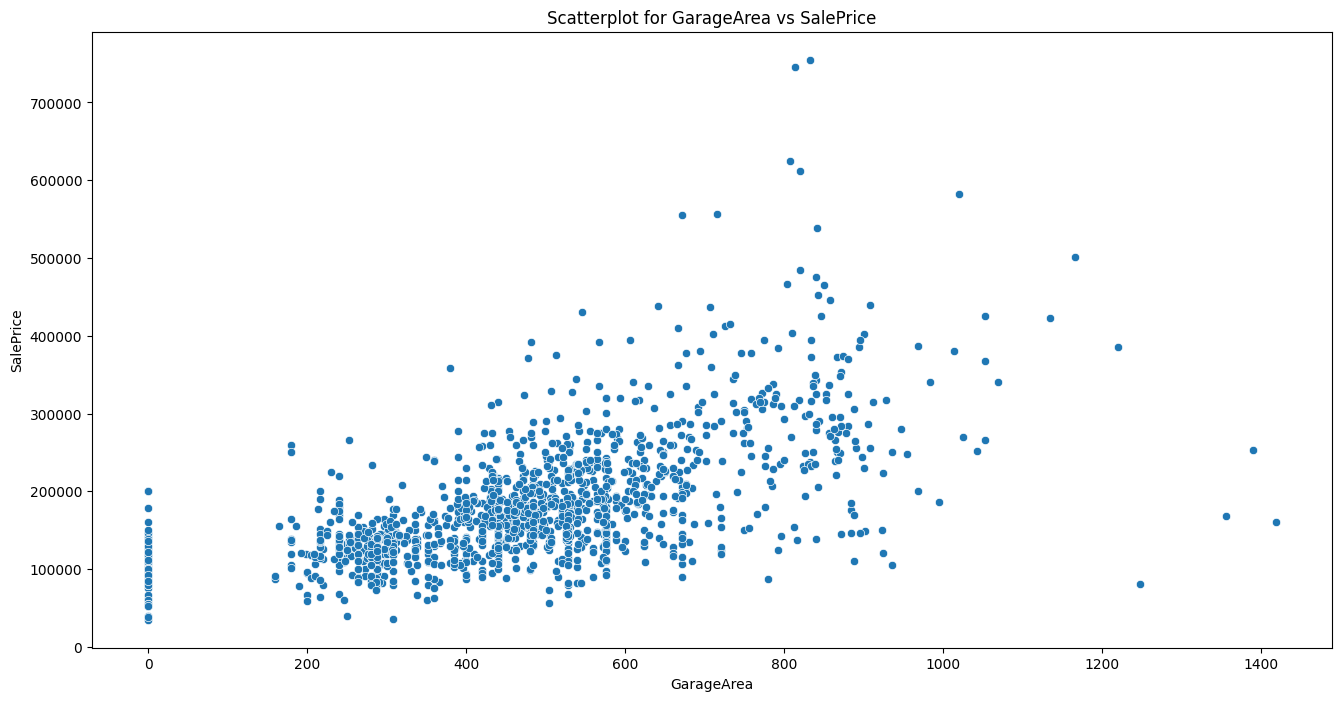

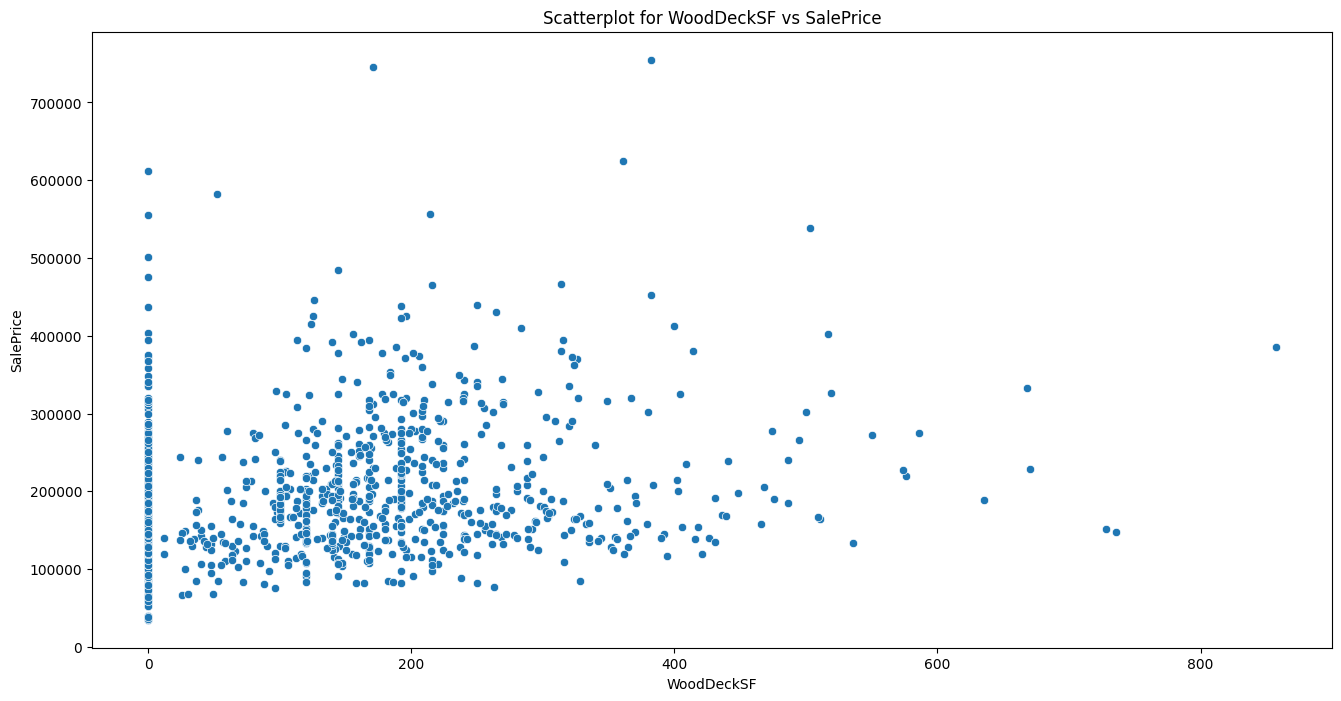

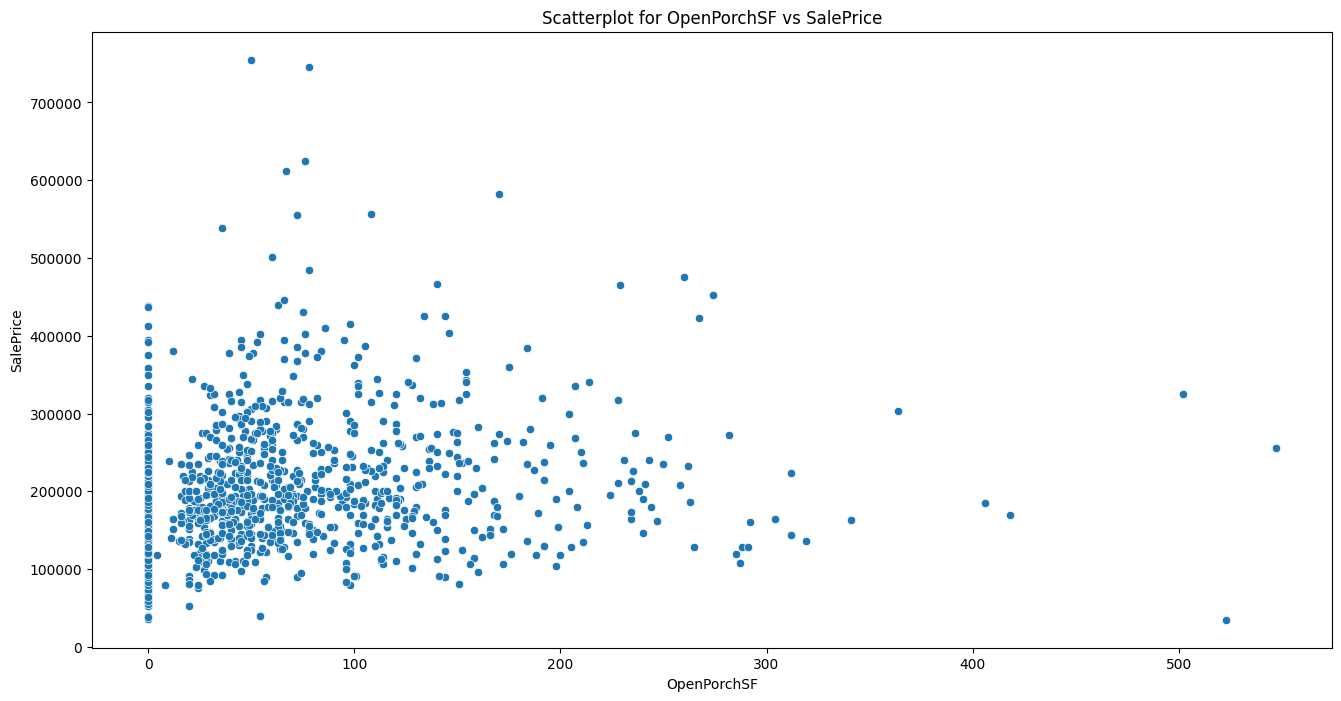

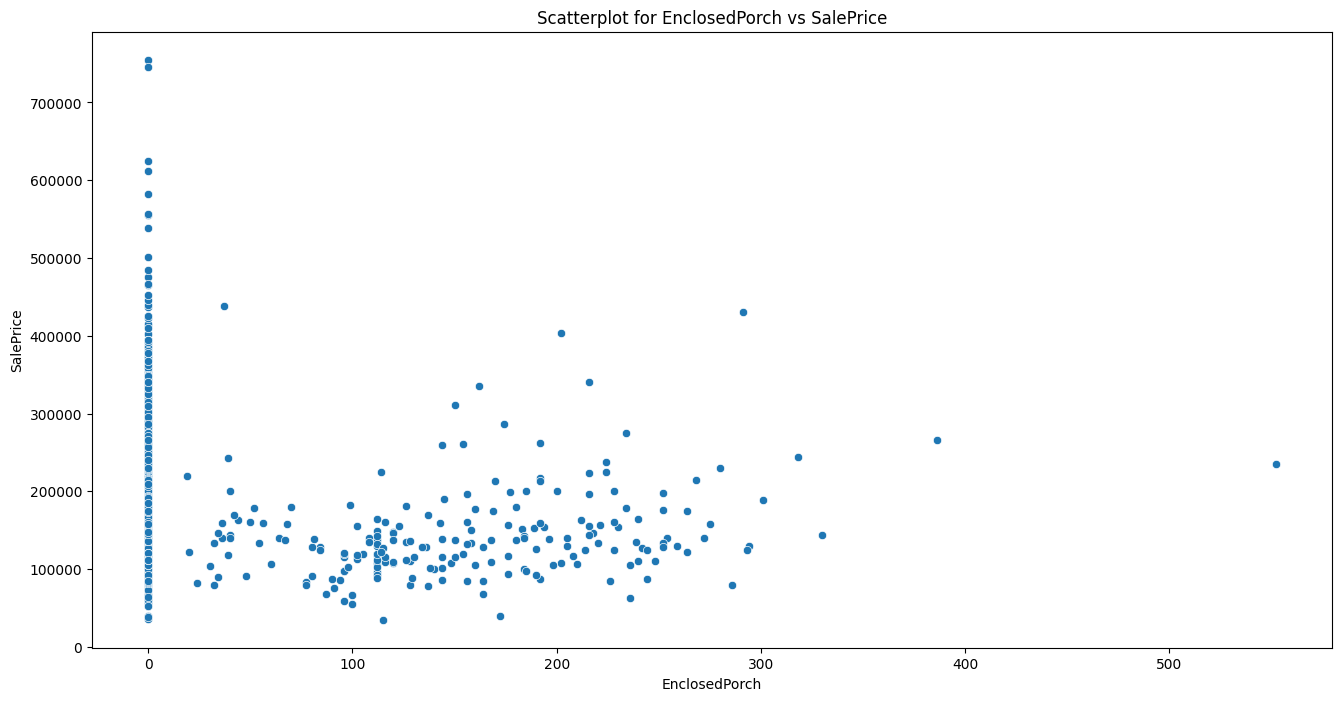

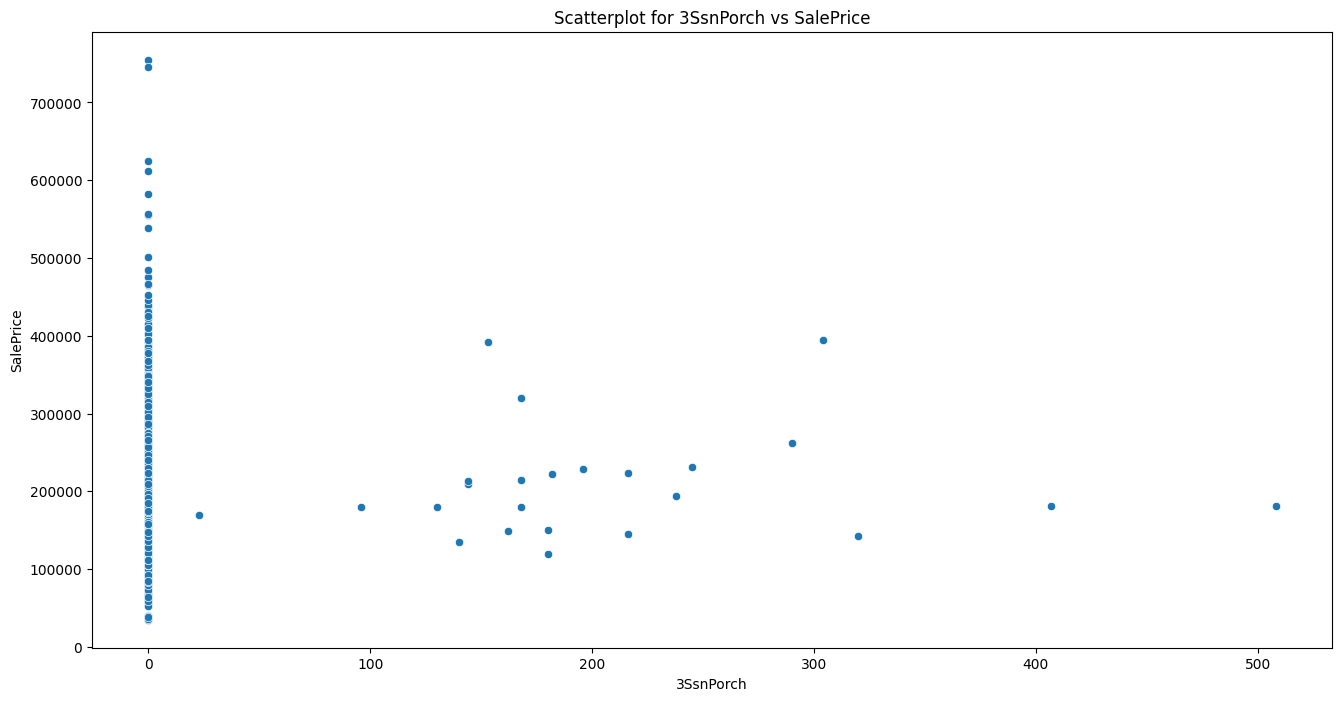

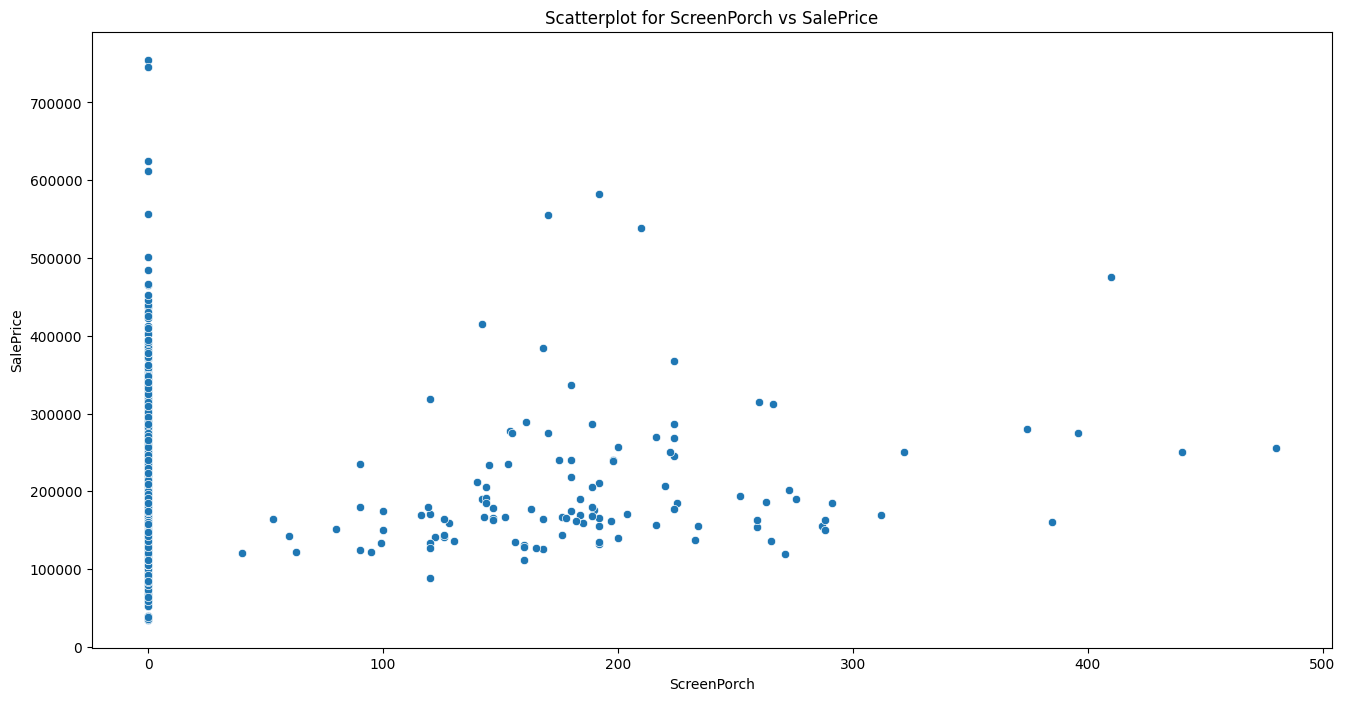

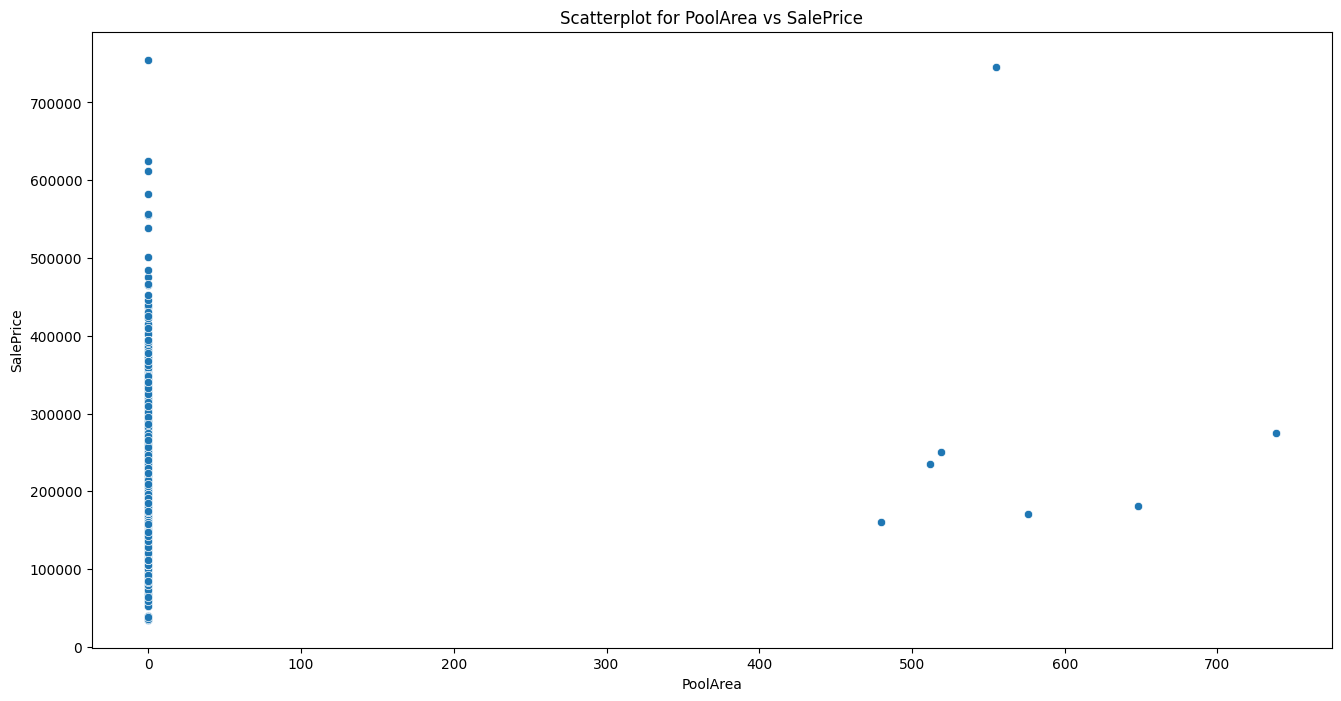

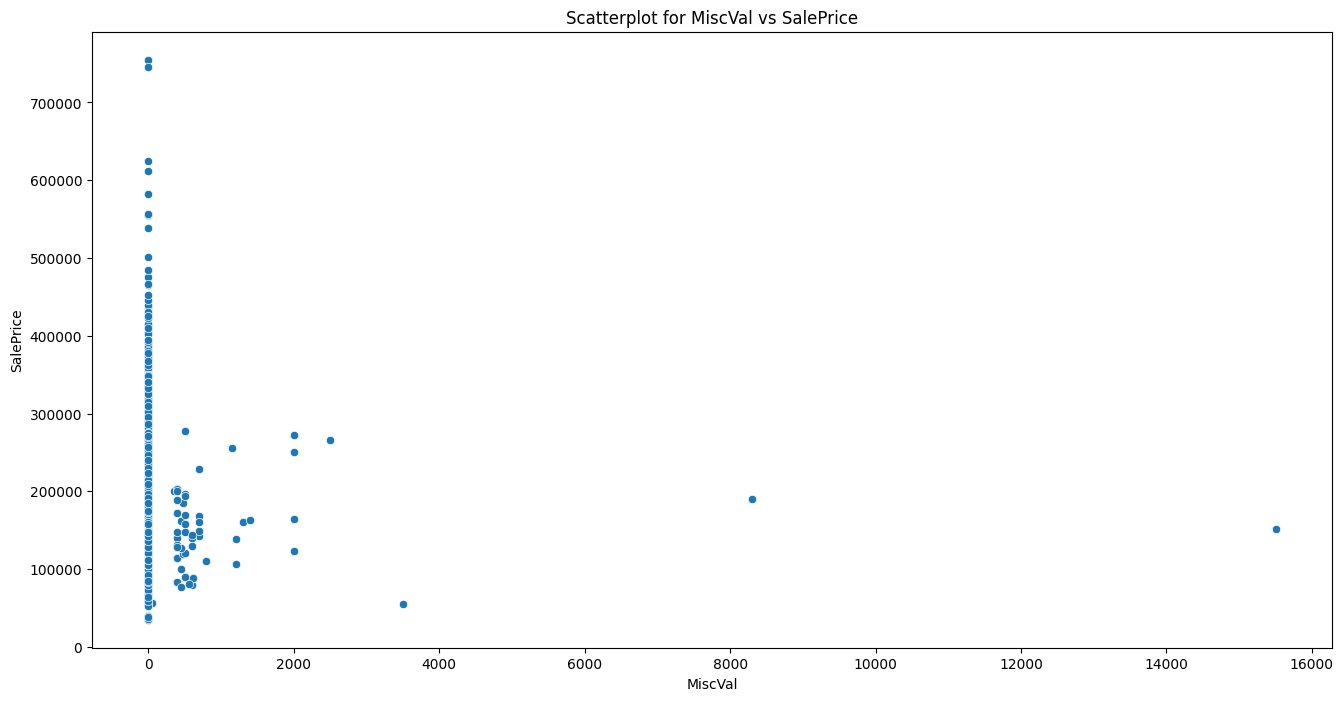

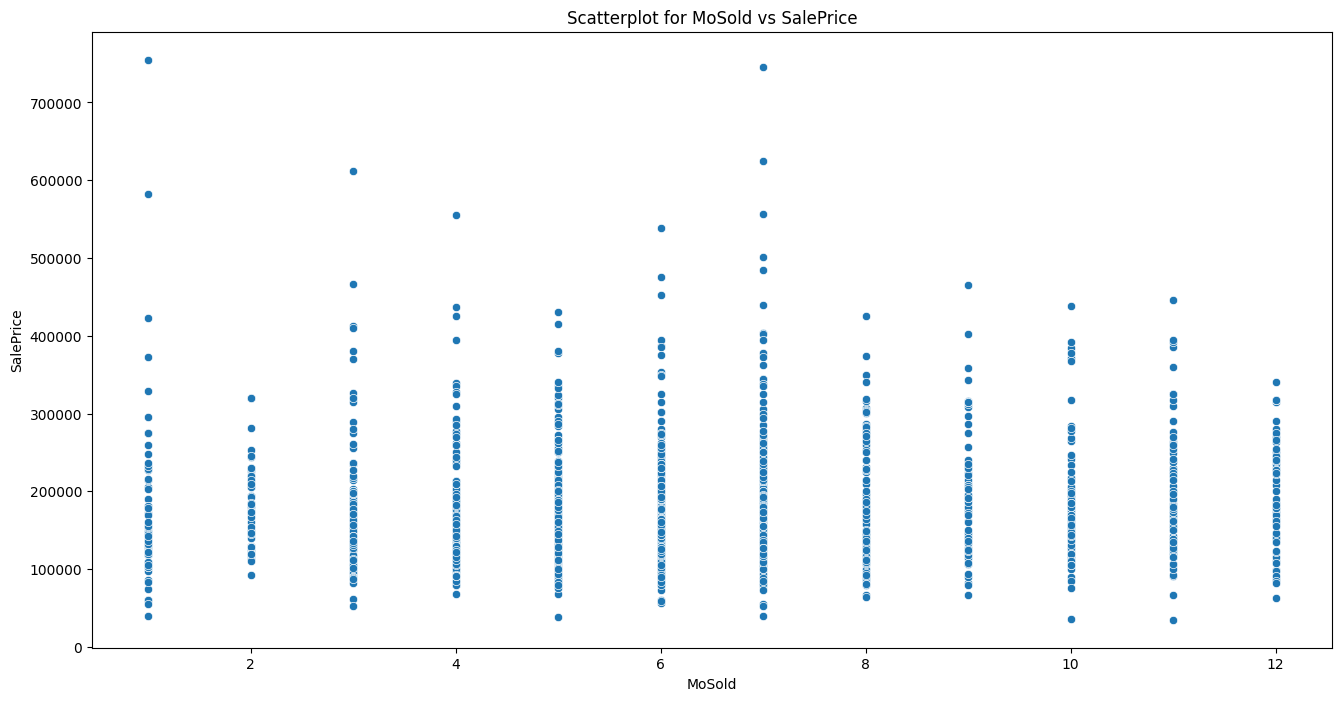

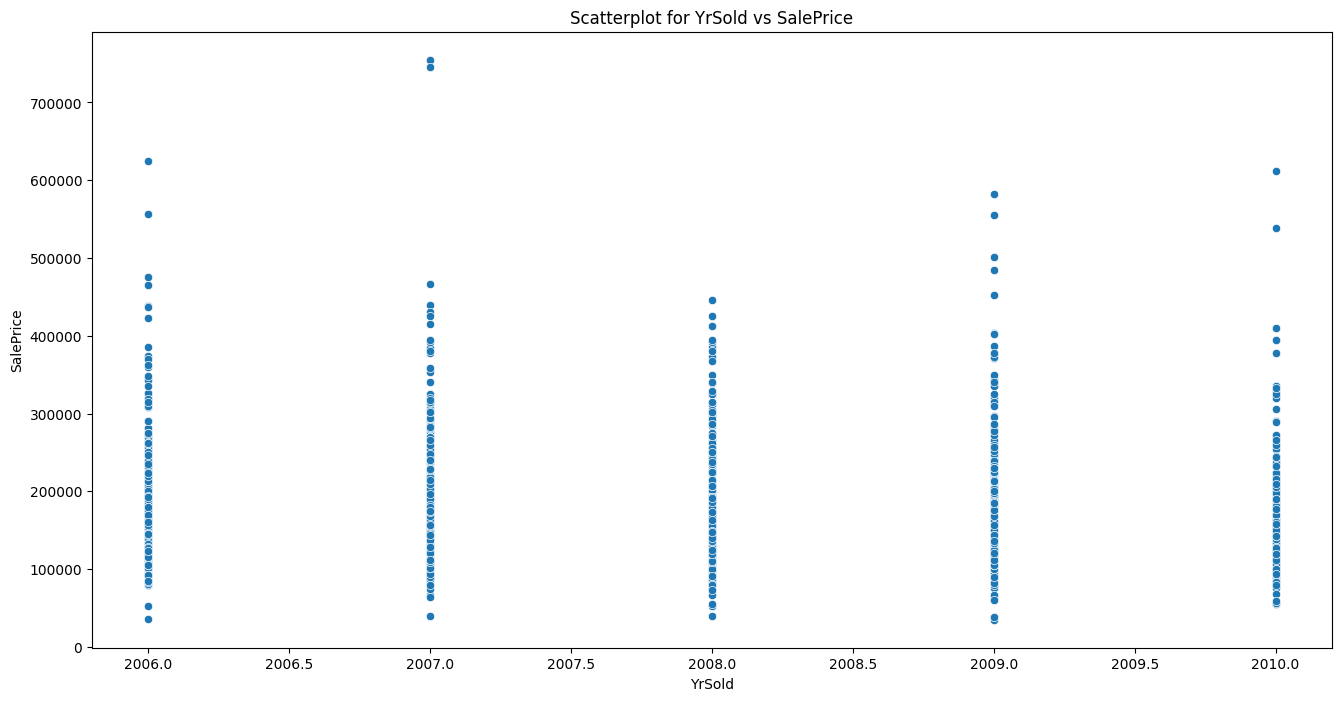

In [16]:
for i in con:
    if i!='SalePrice':
        plt.figure(figsize=(16,8))
        sns.scatterplot(data=df, x=i, y="SalePrice")
        plt.title(f'Scatterplot for {i} vs SalePrice')
        plt.show()

### 2. Cat vs Con = Boxplot

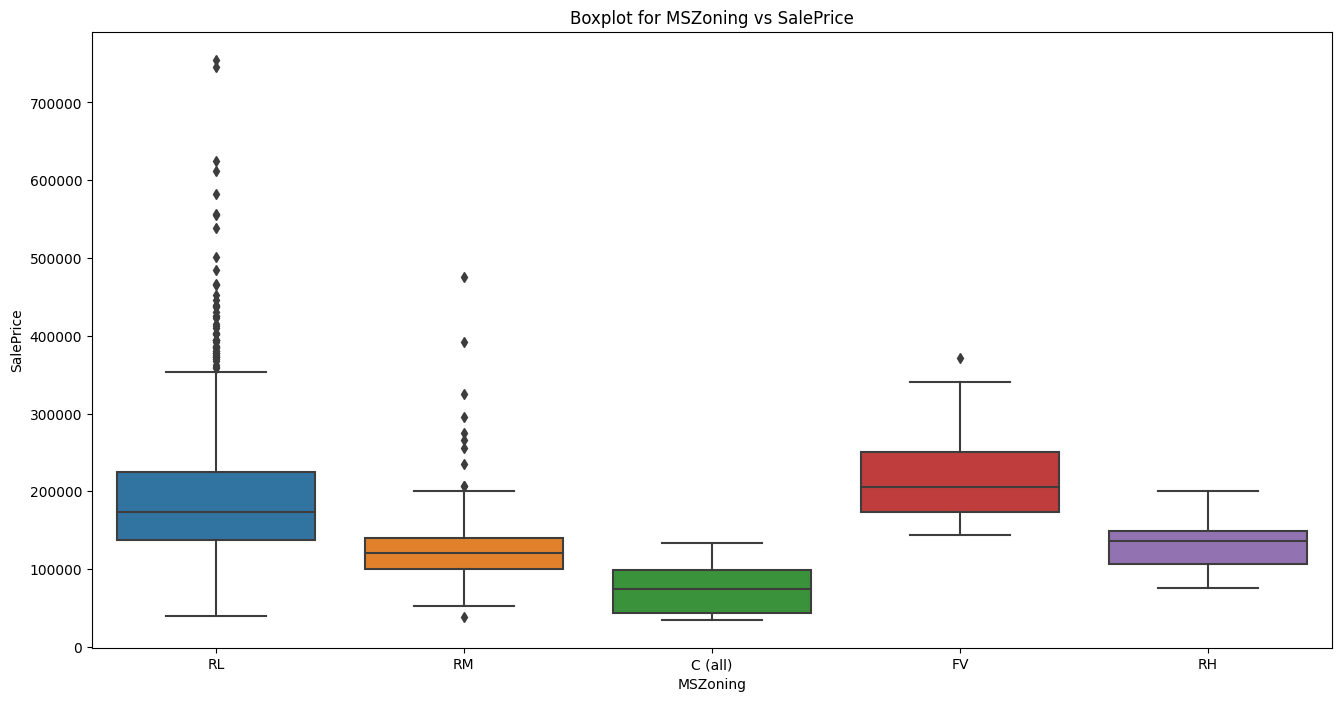

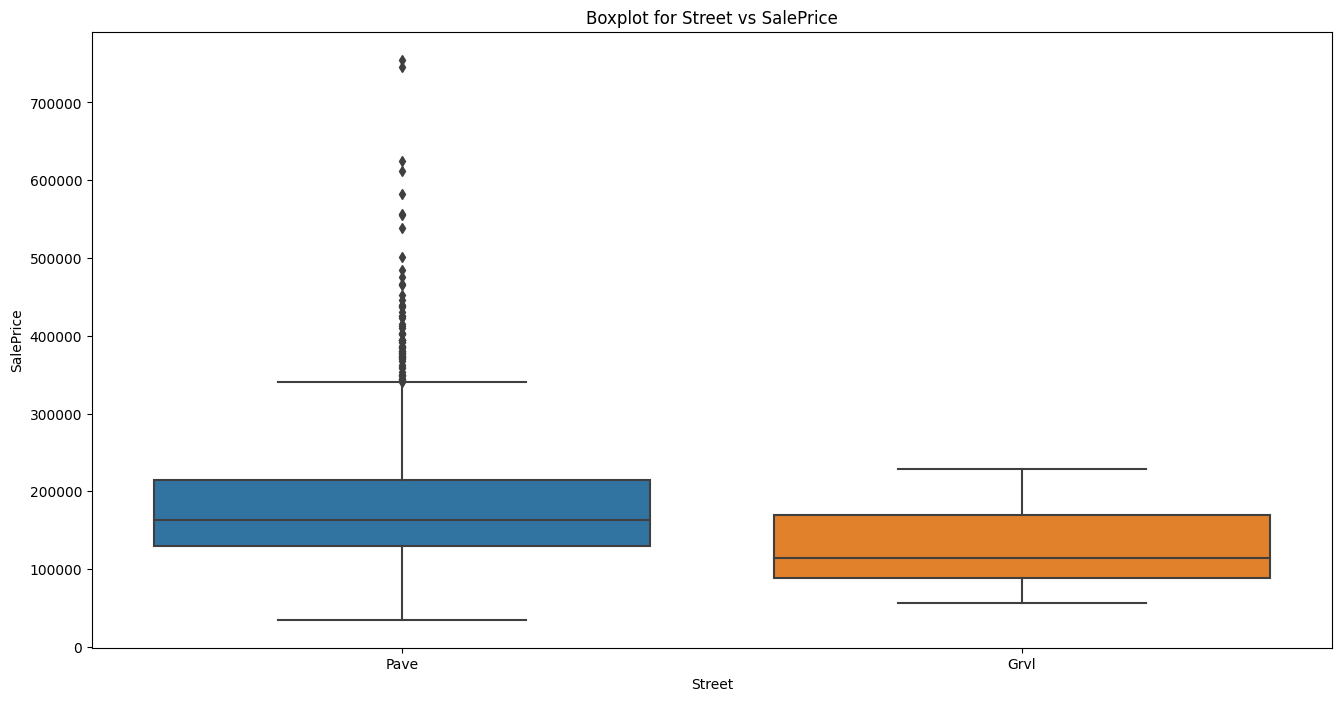

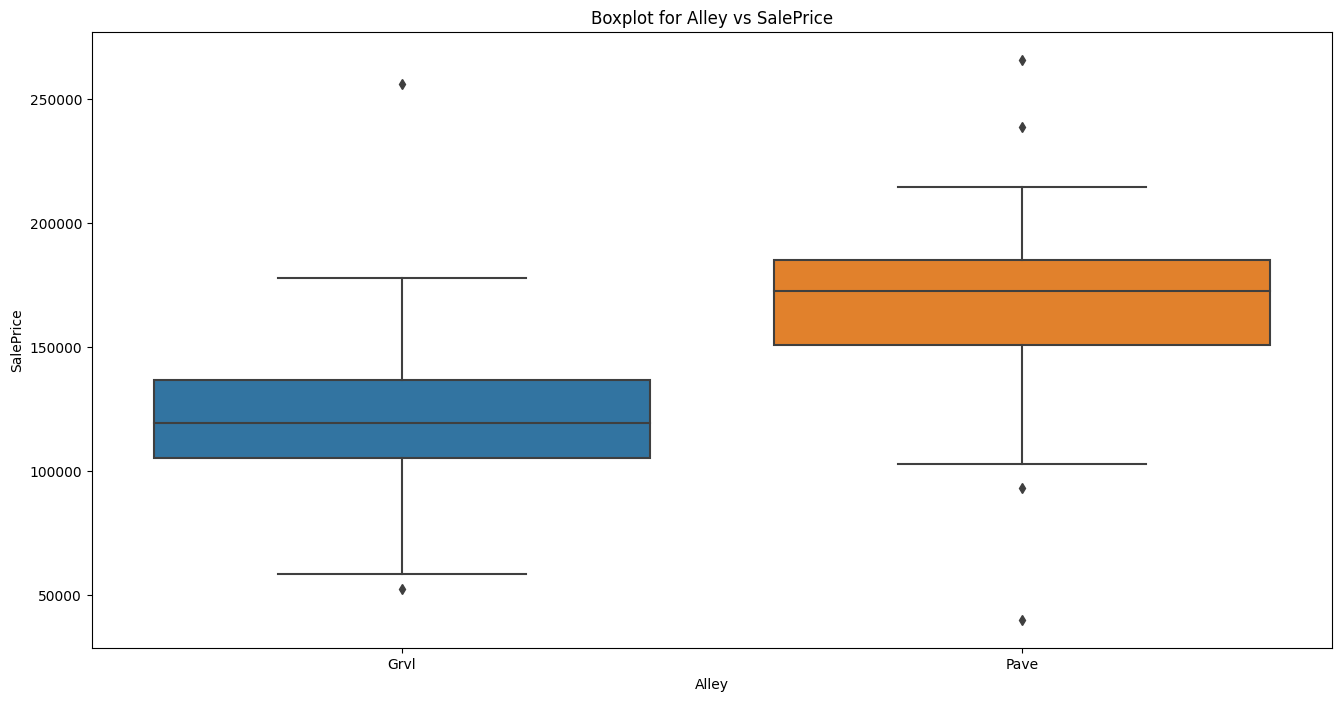

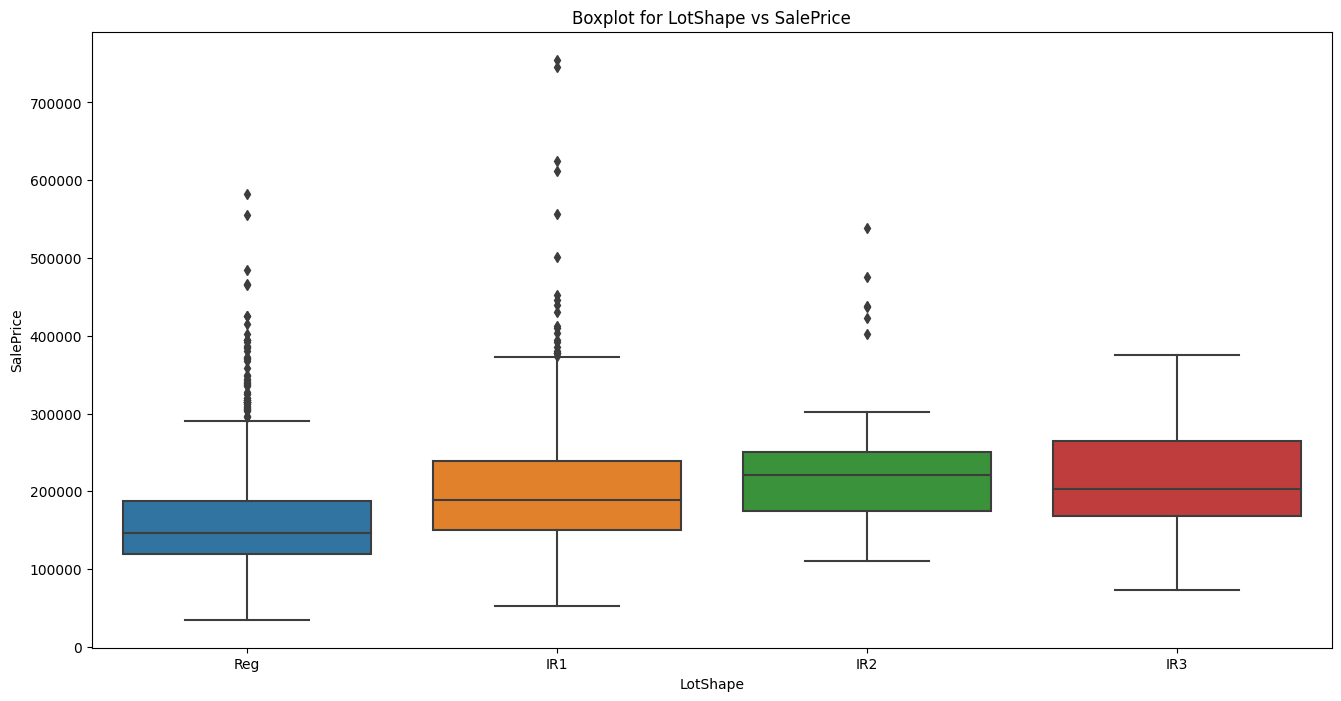

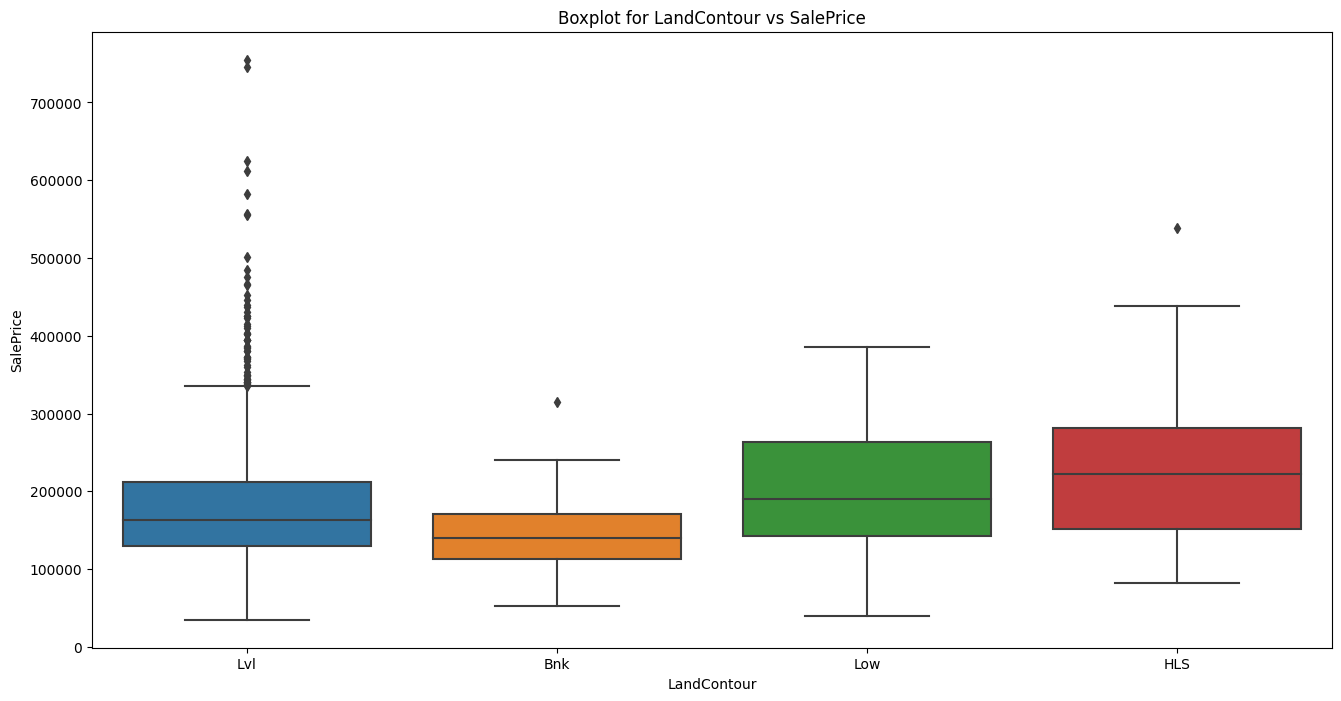

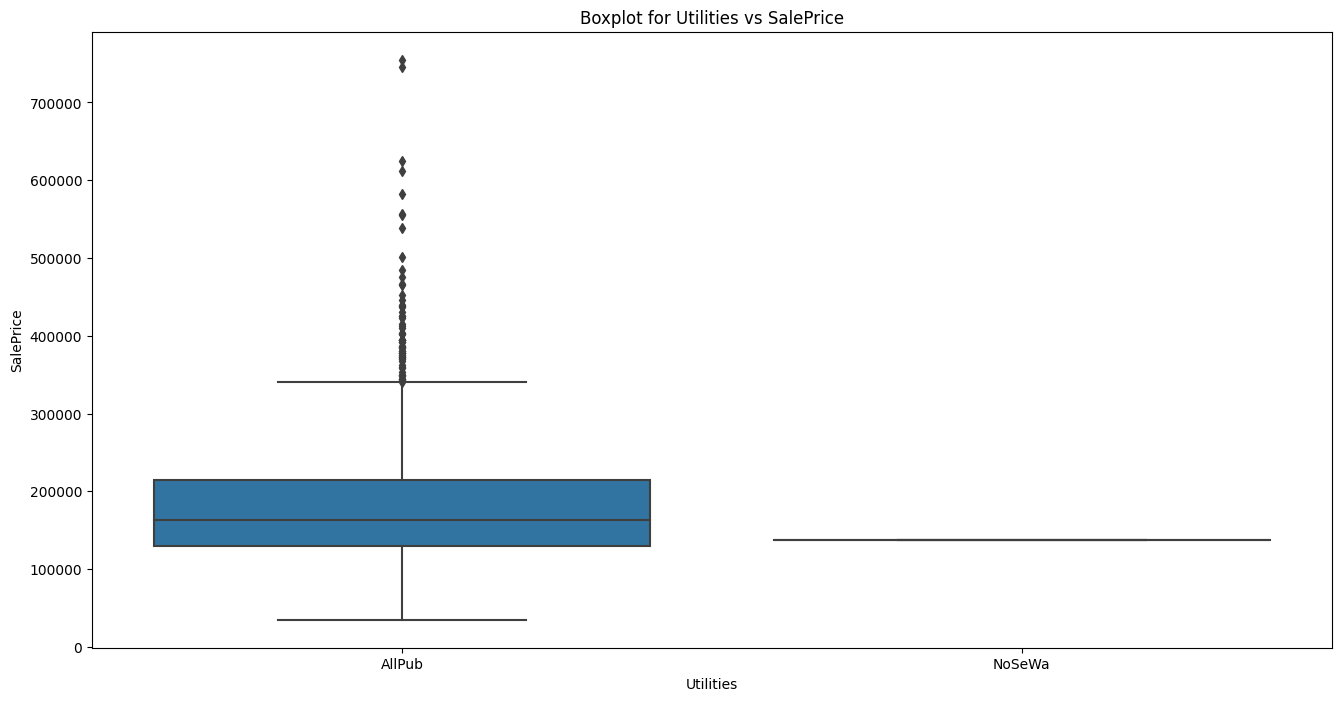

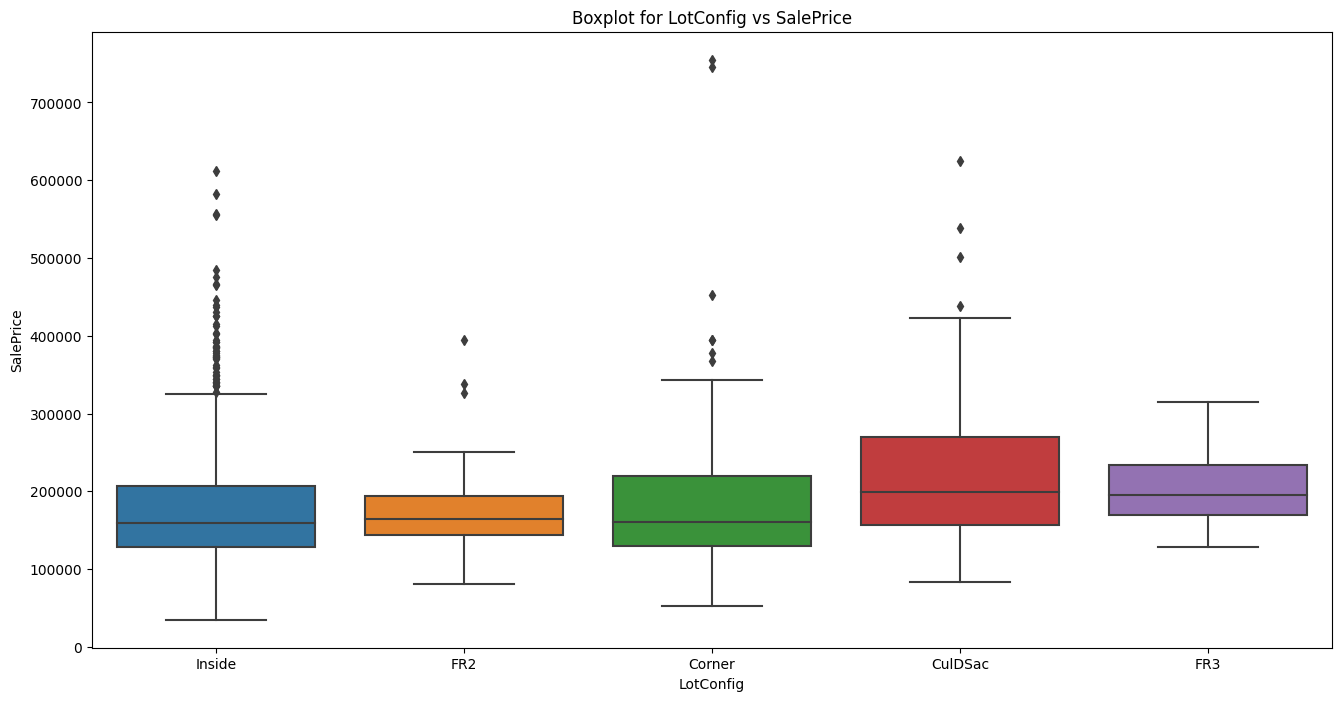

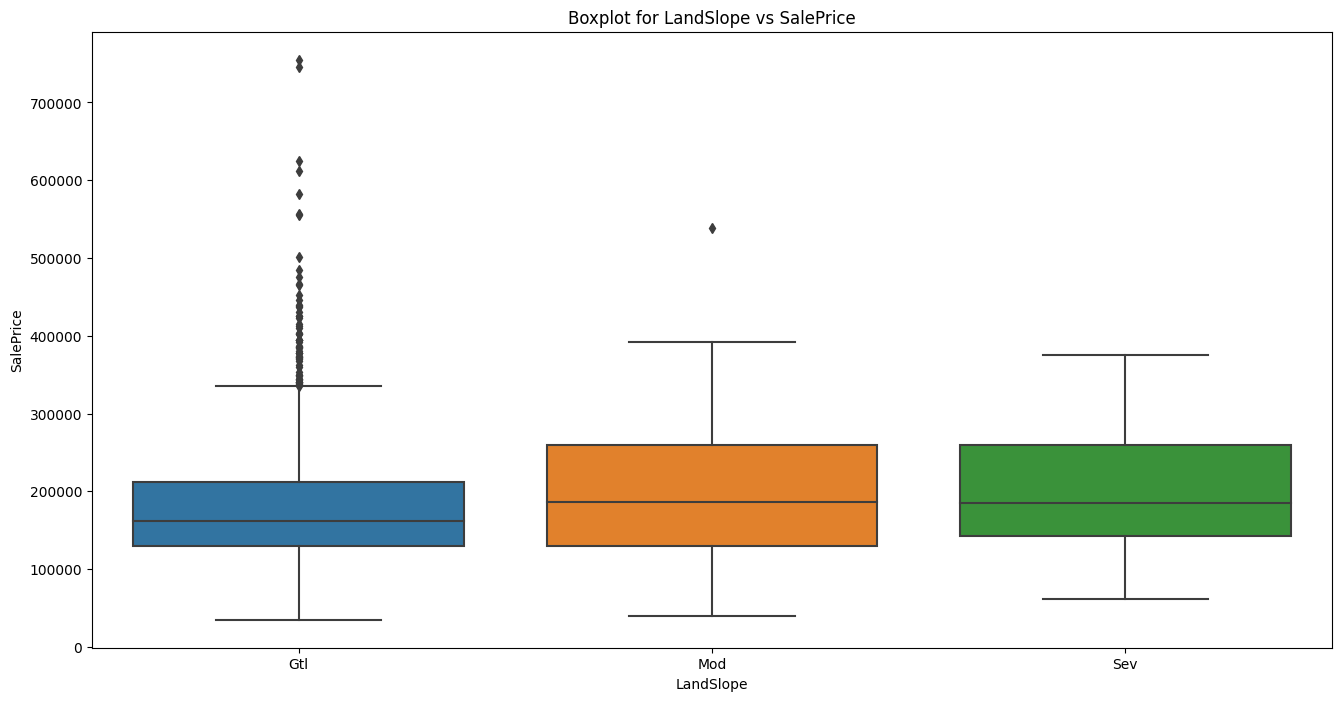

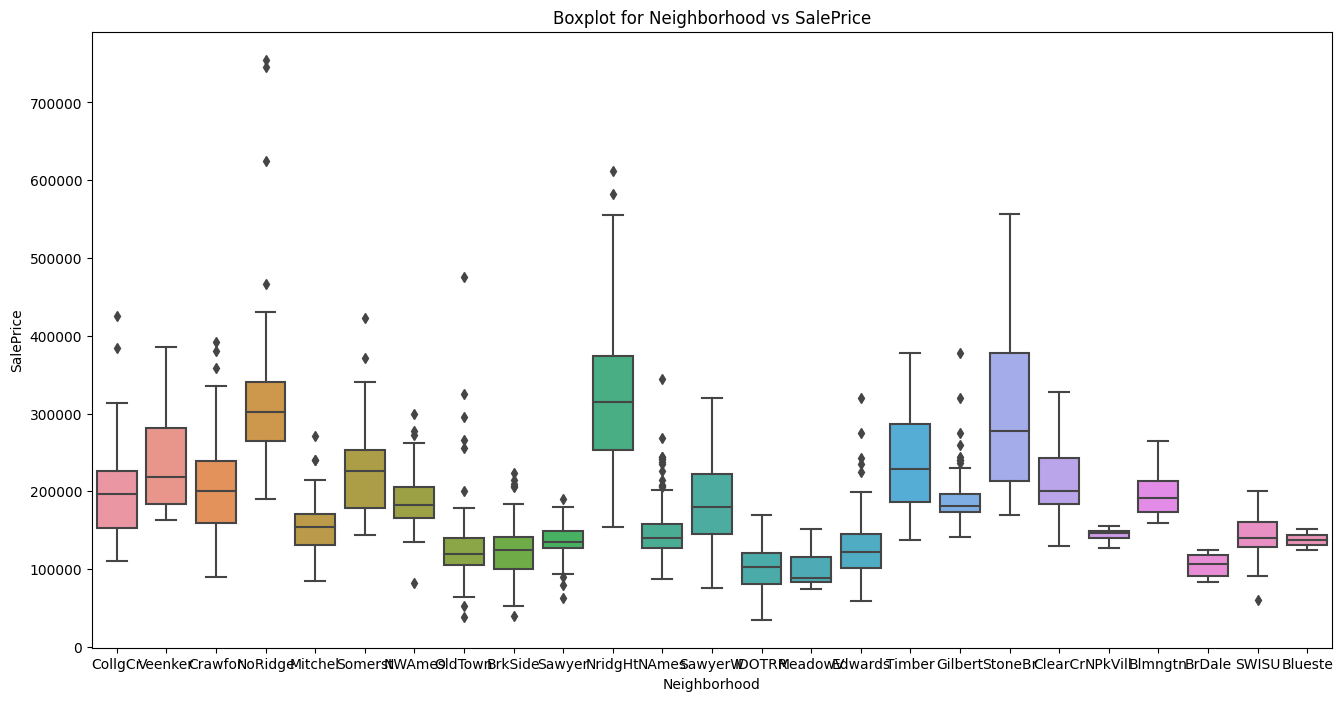

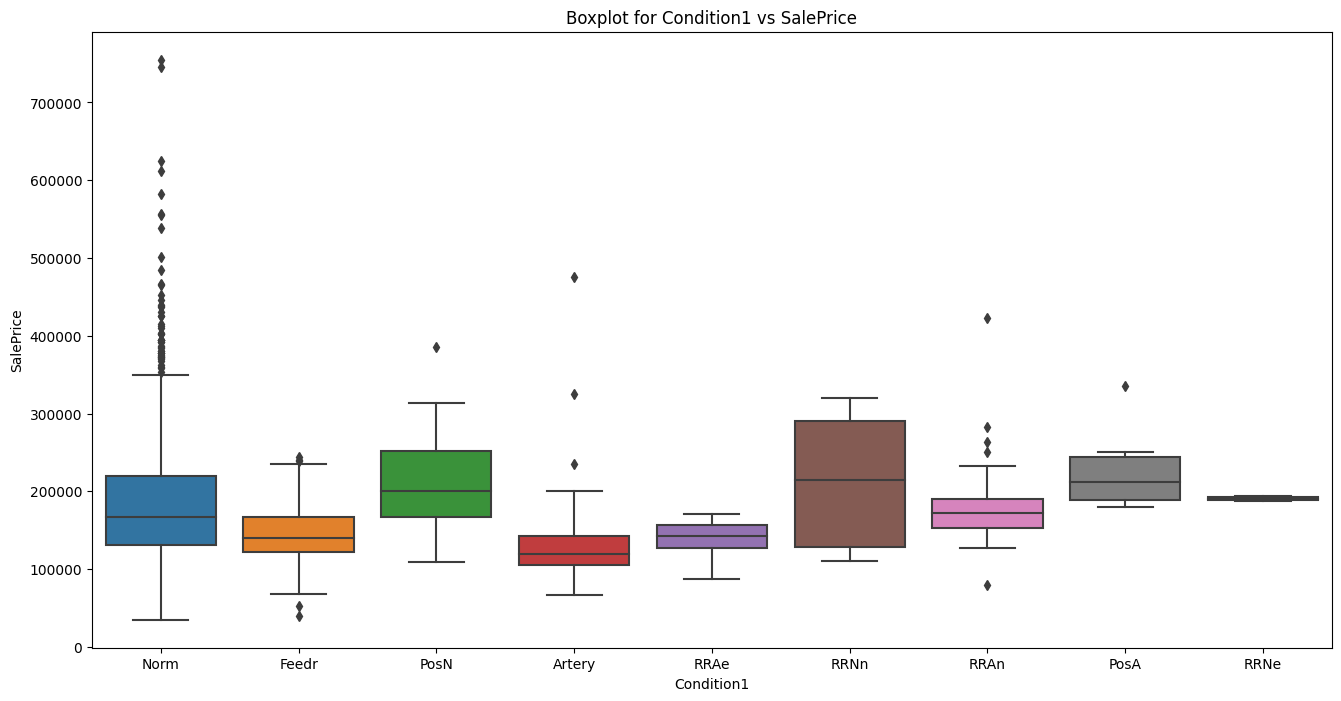

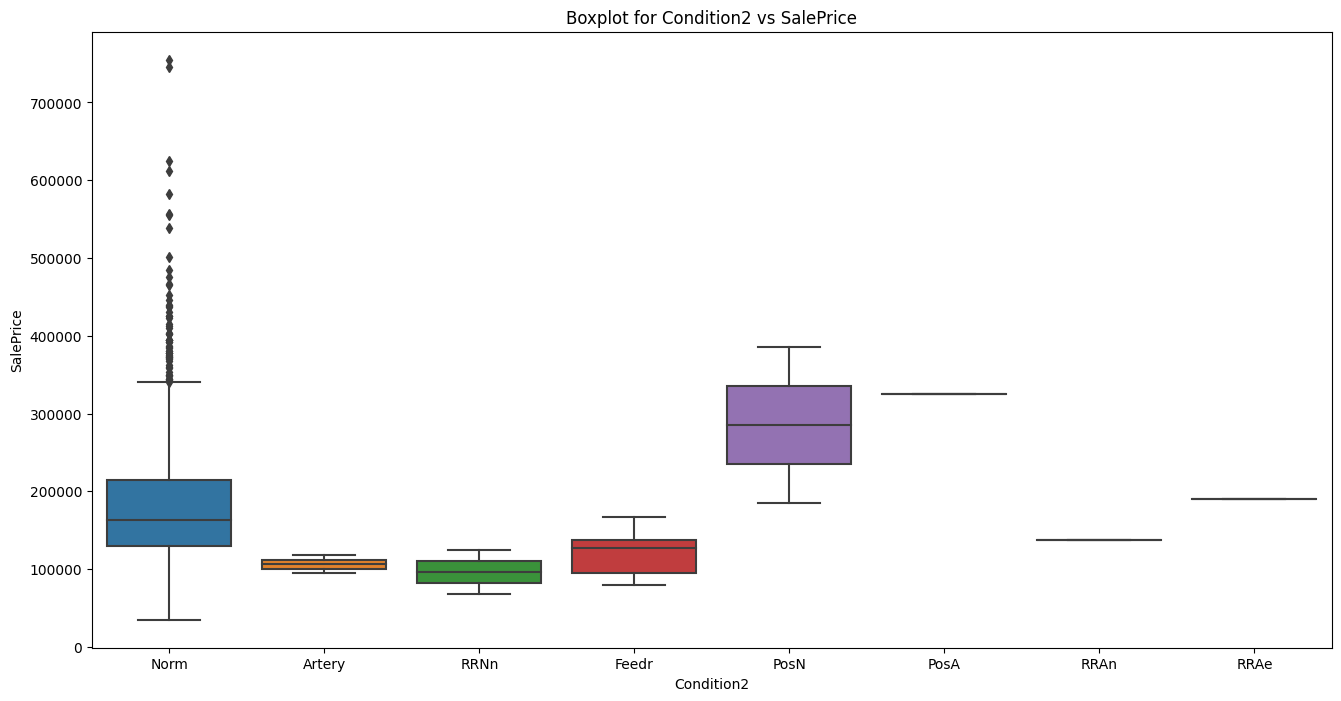

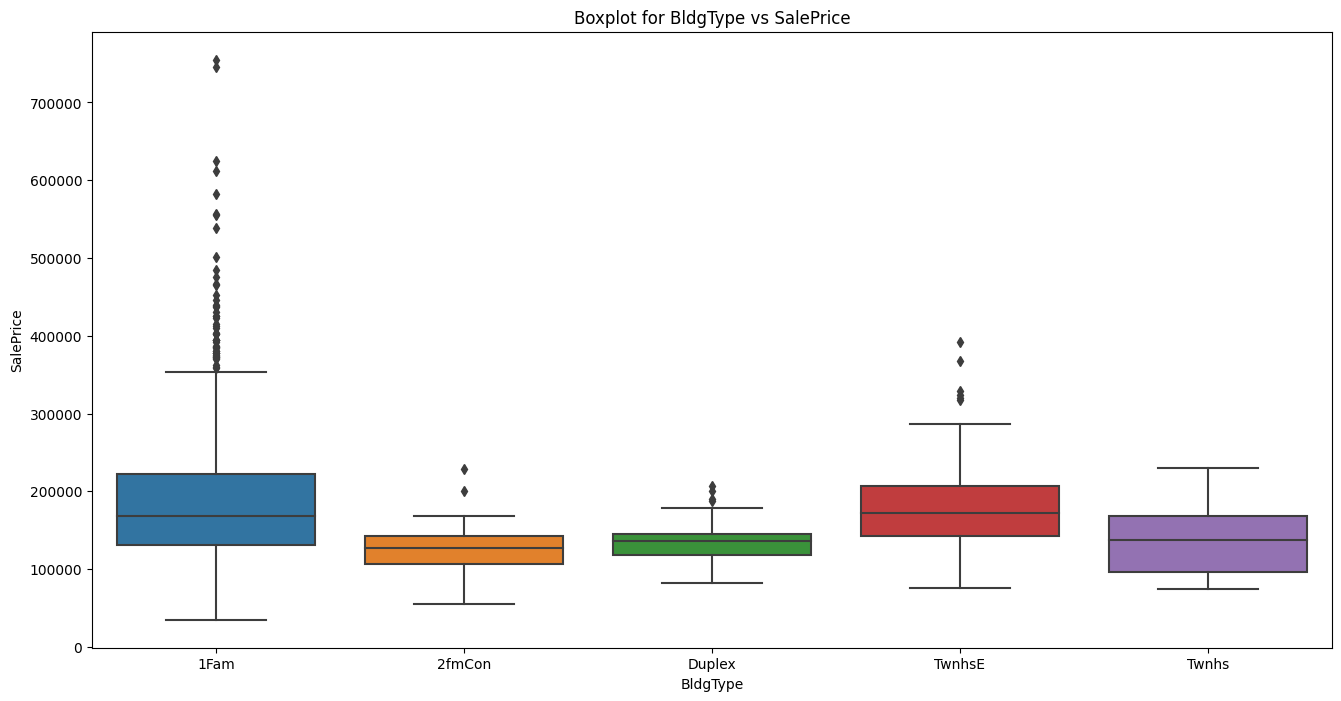

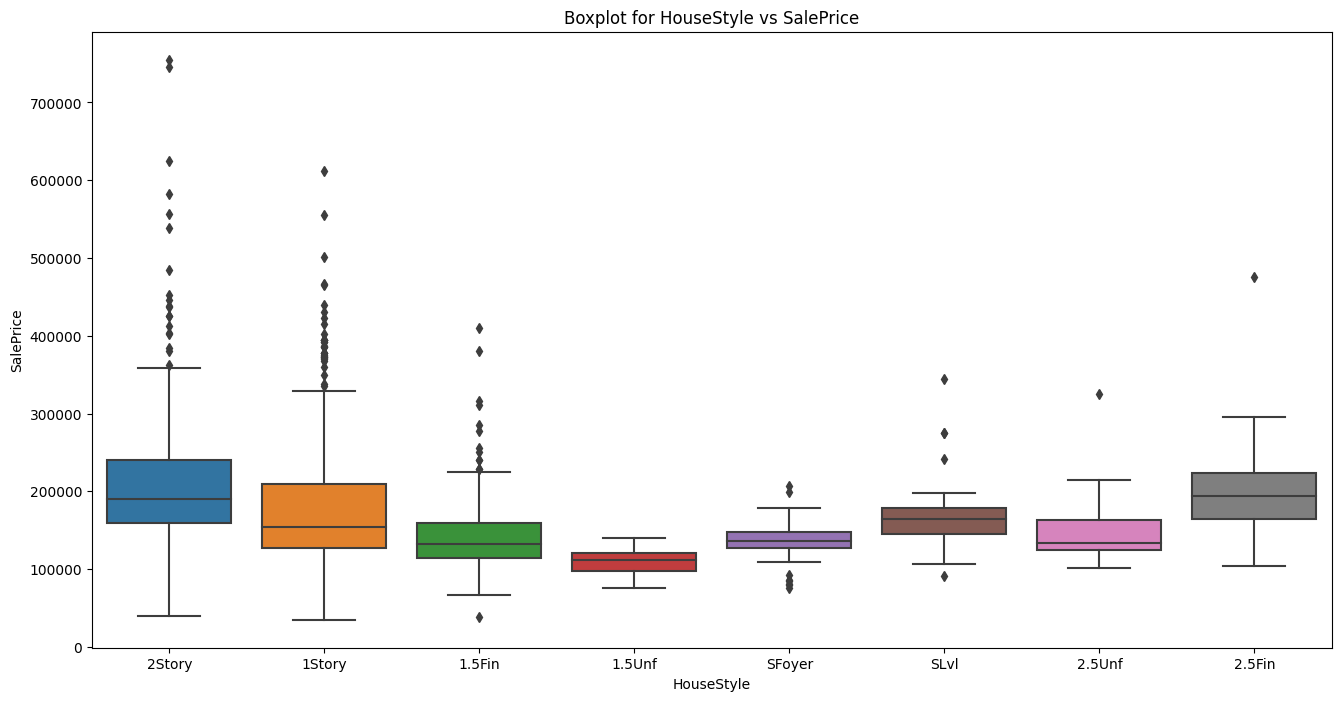

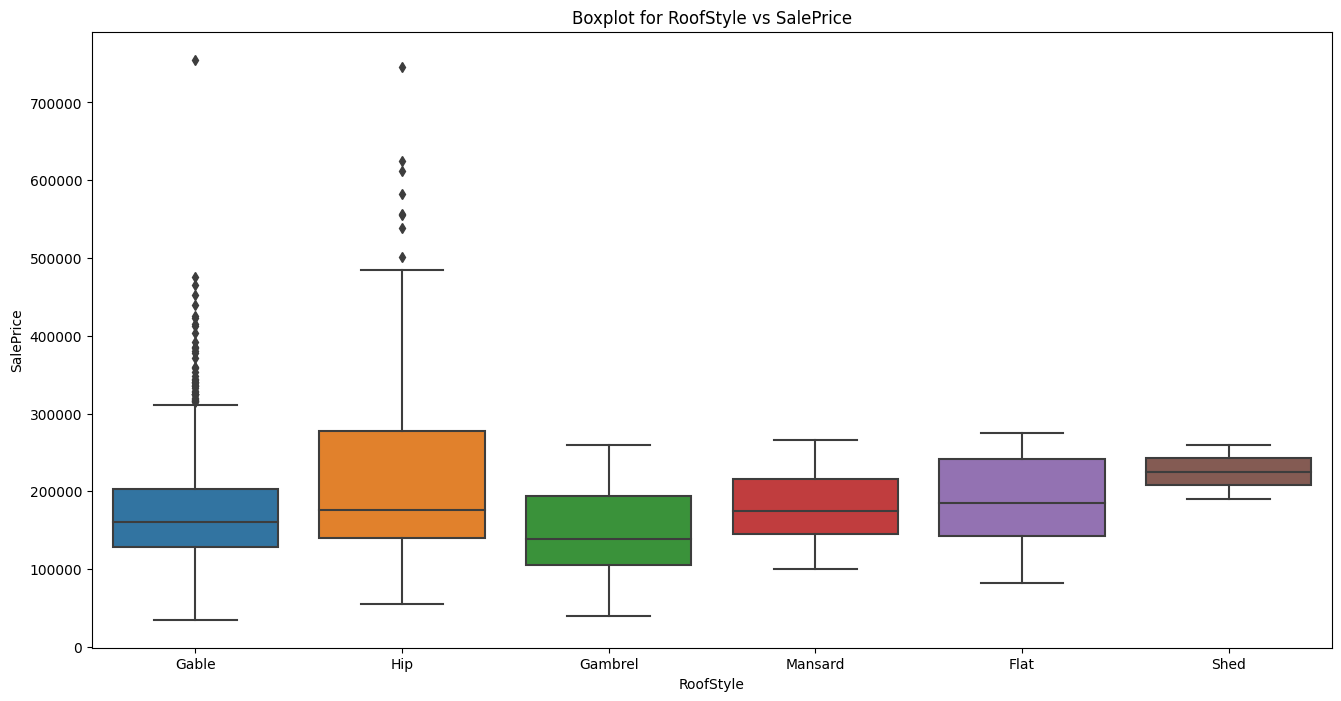

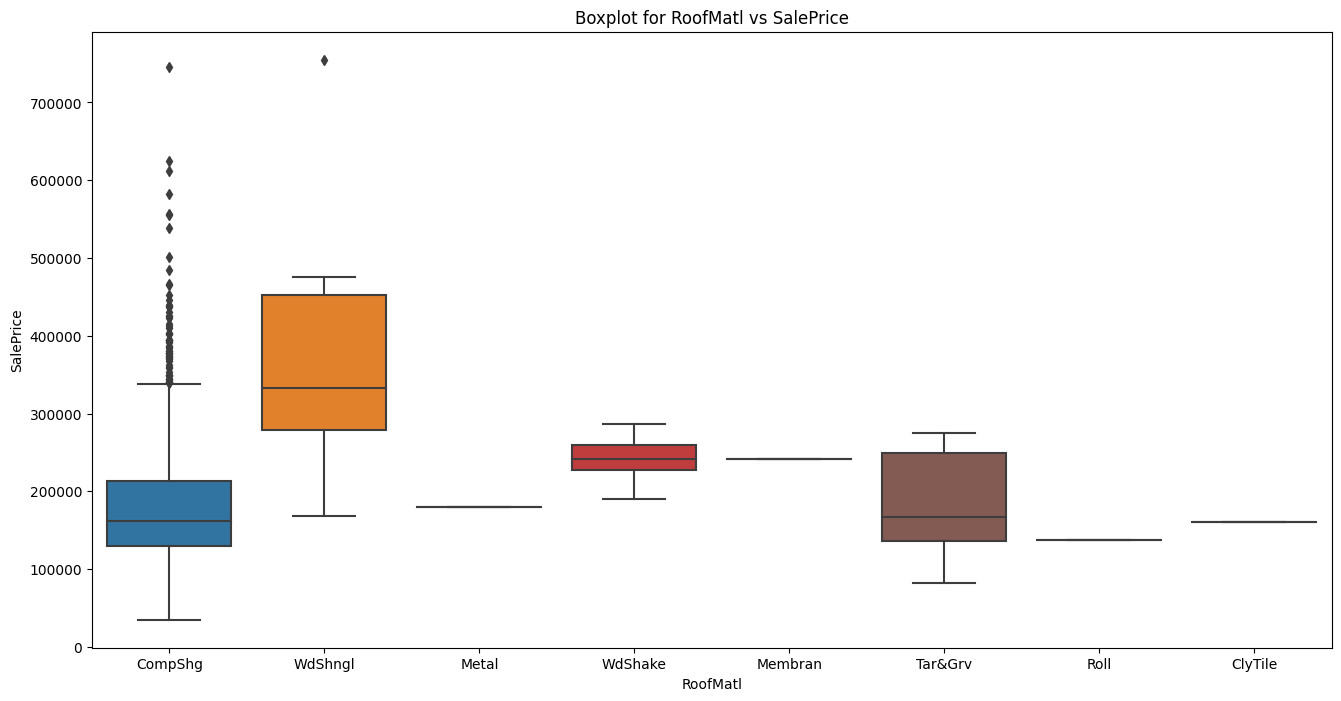

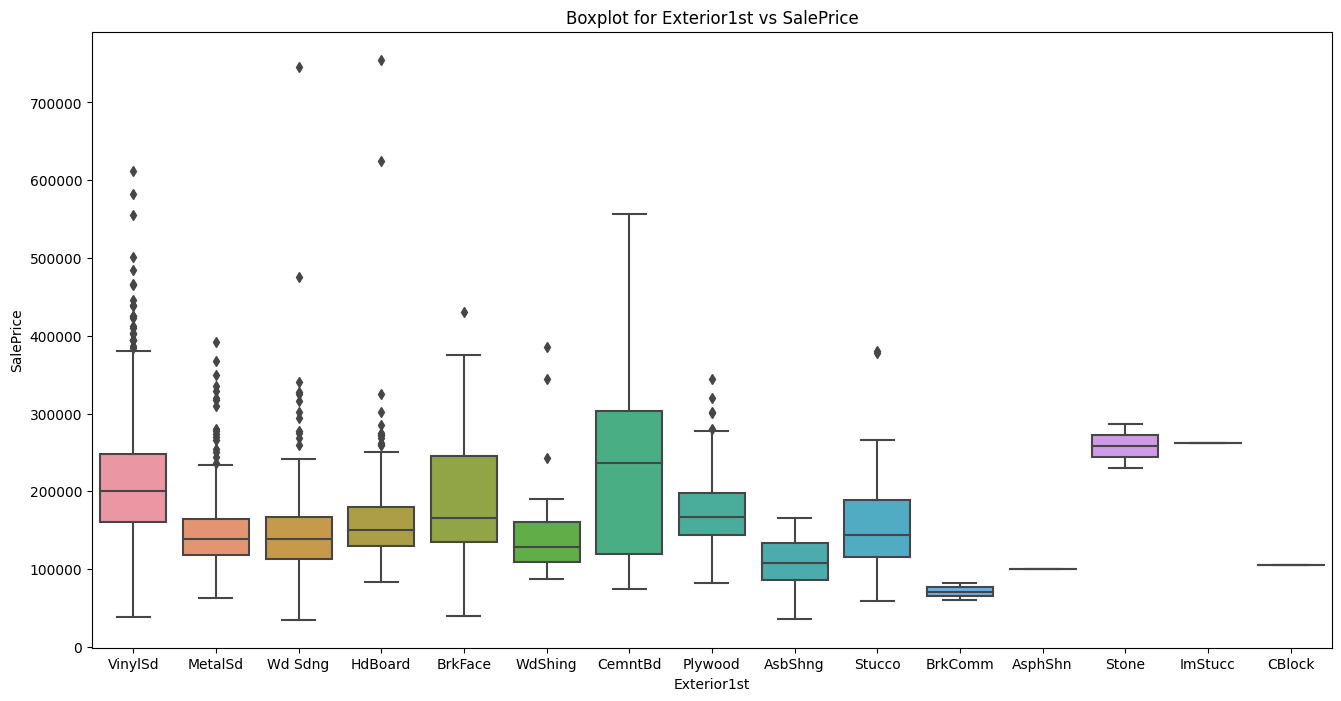

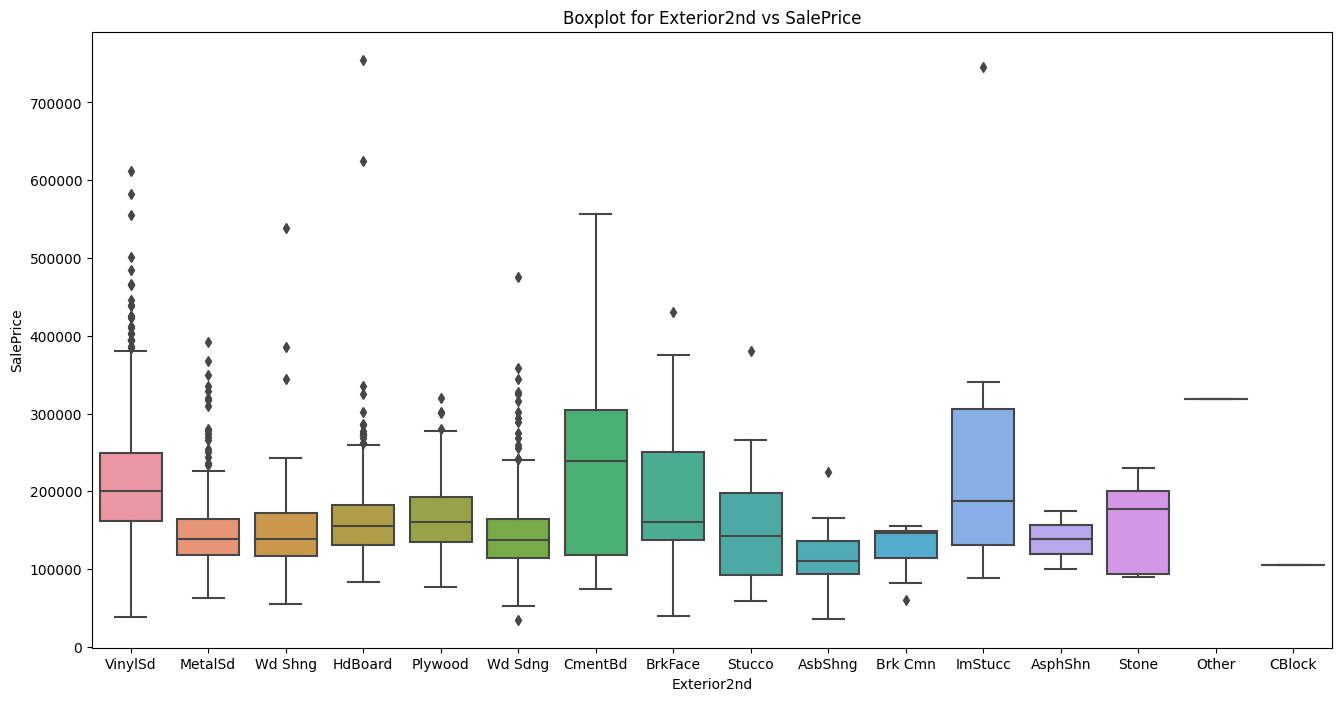

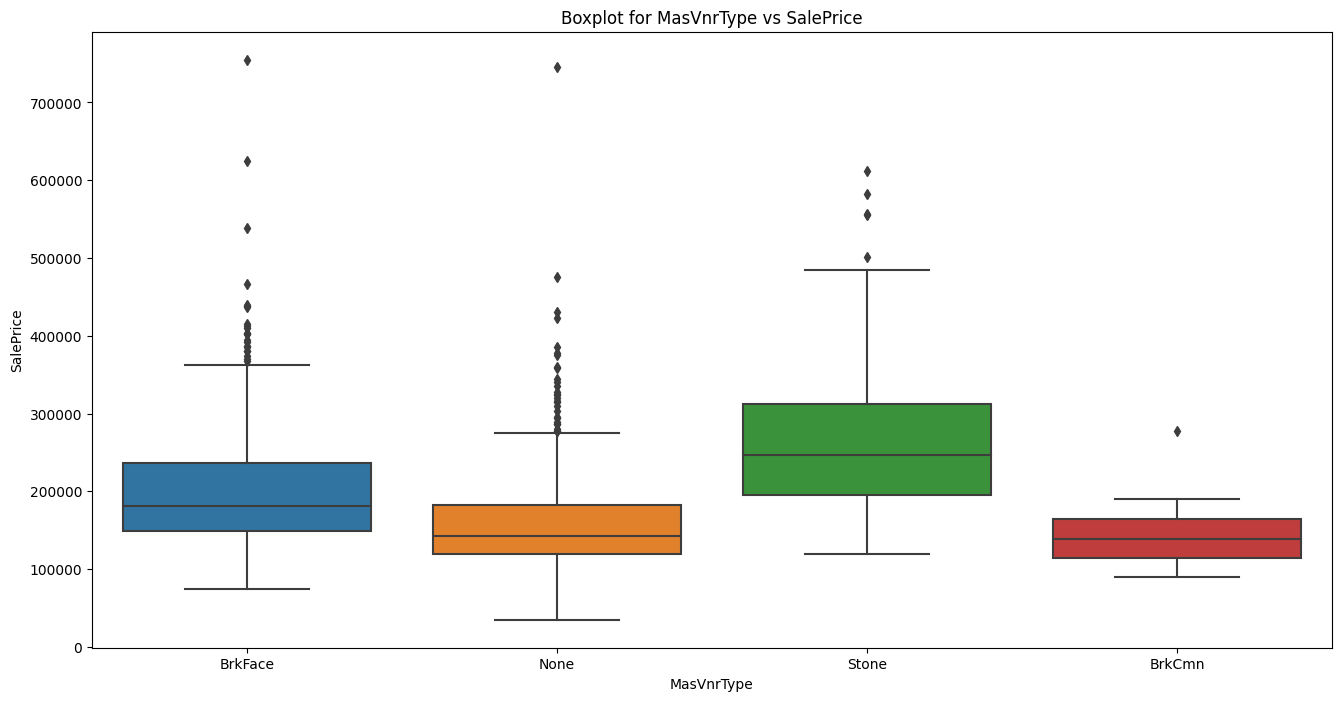

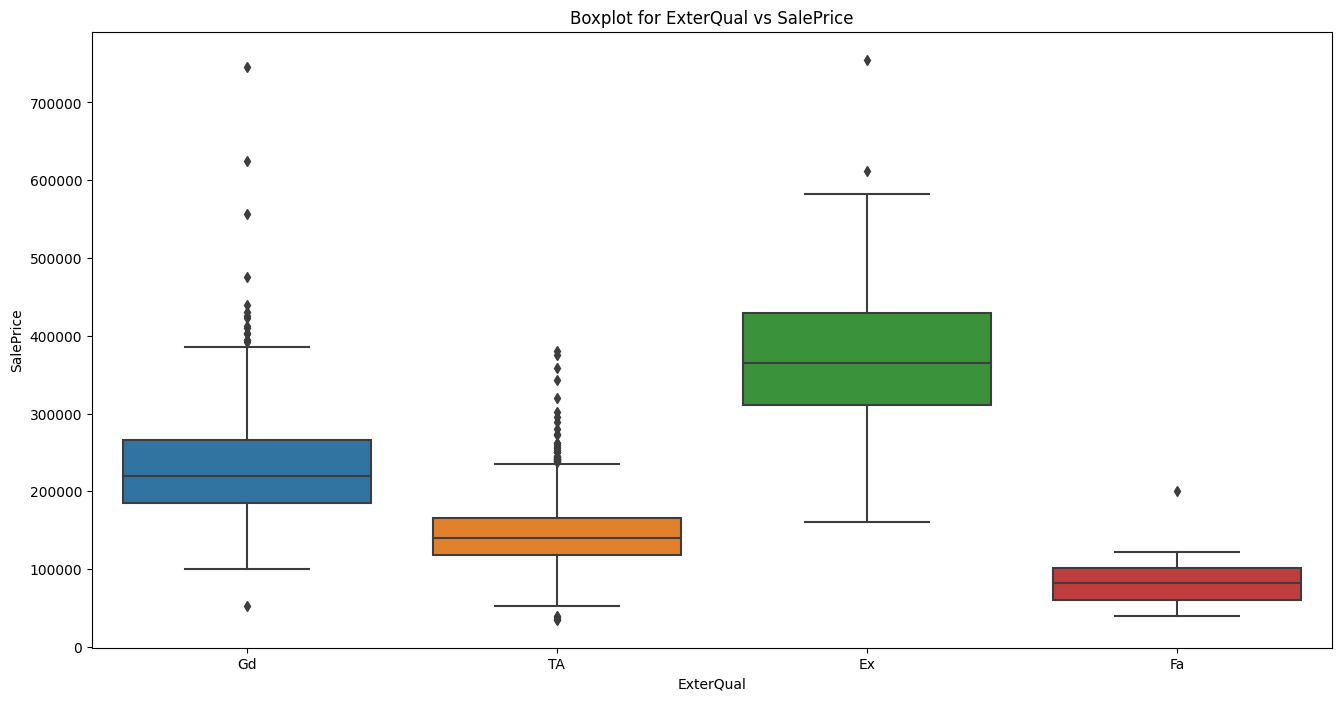

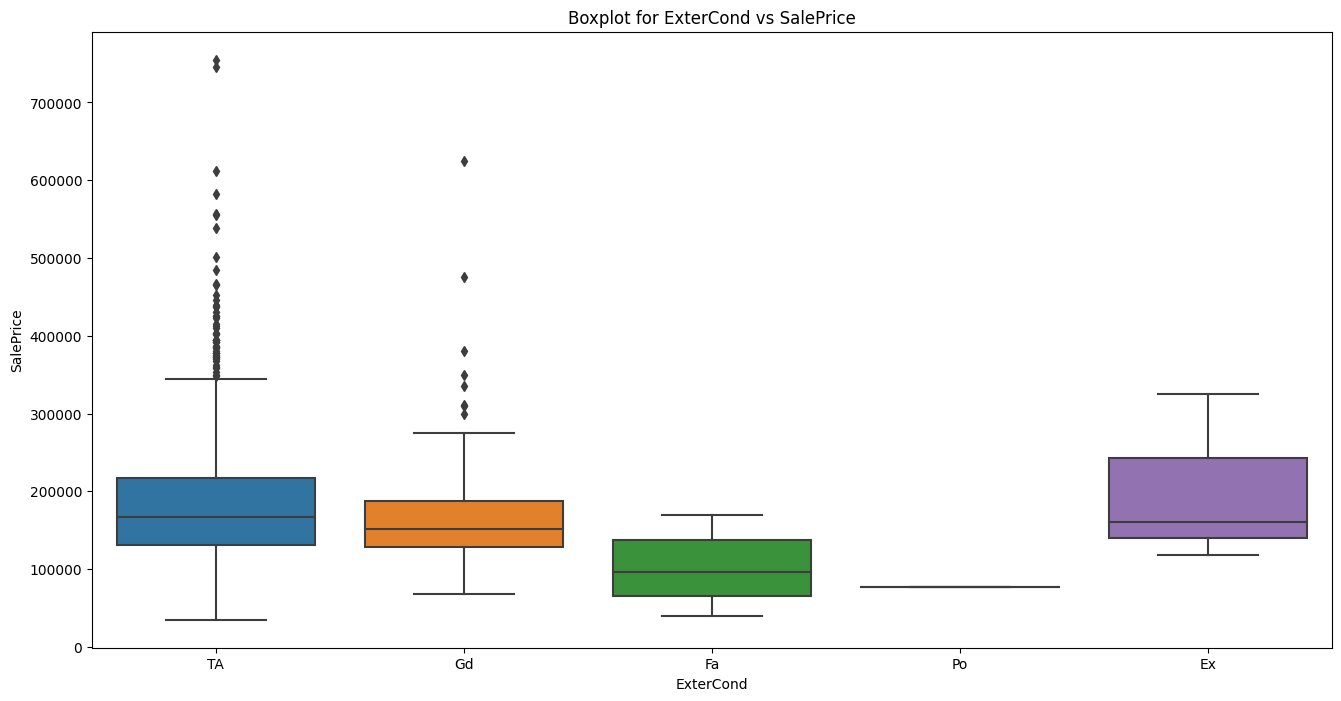

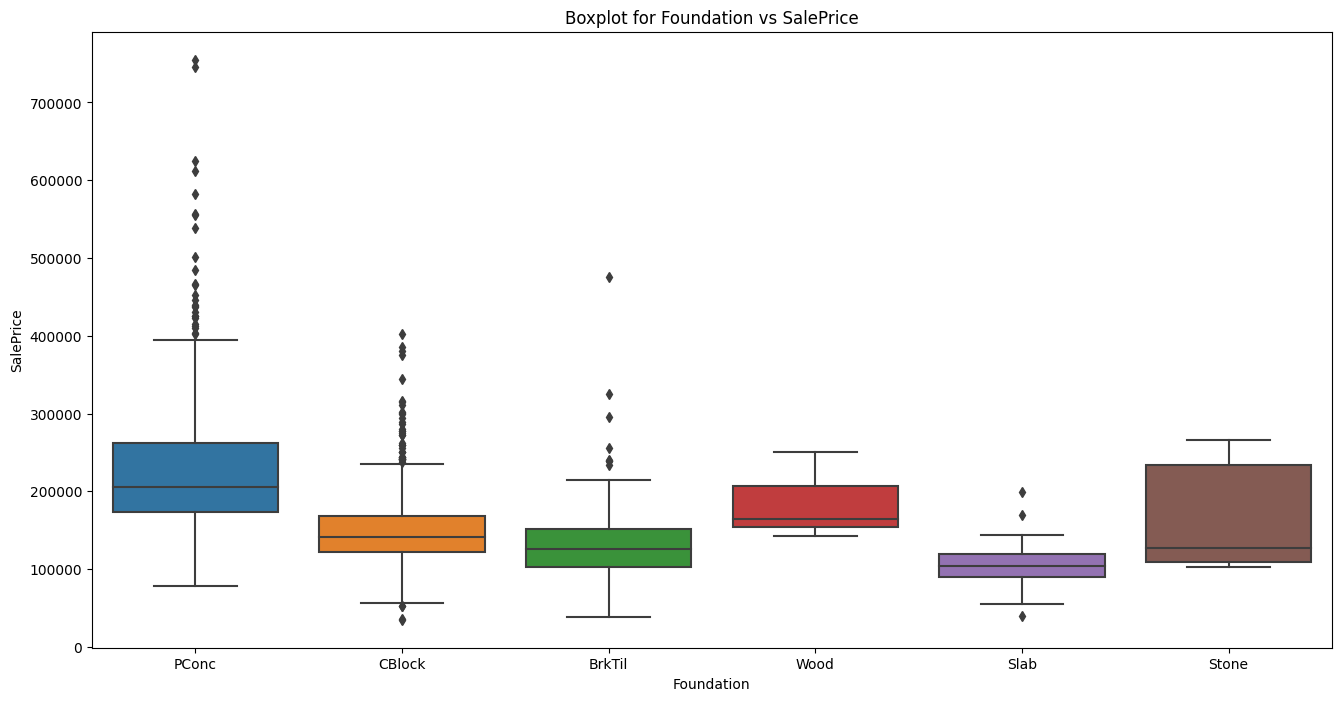

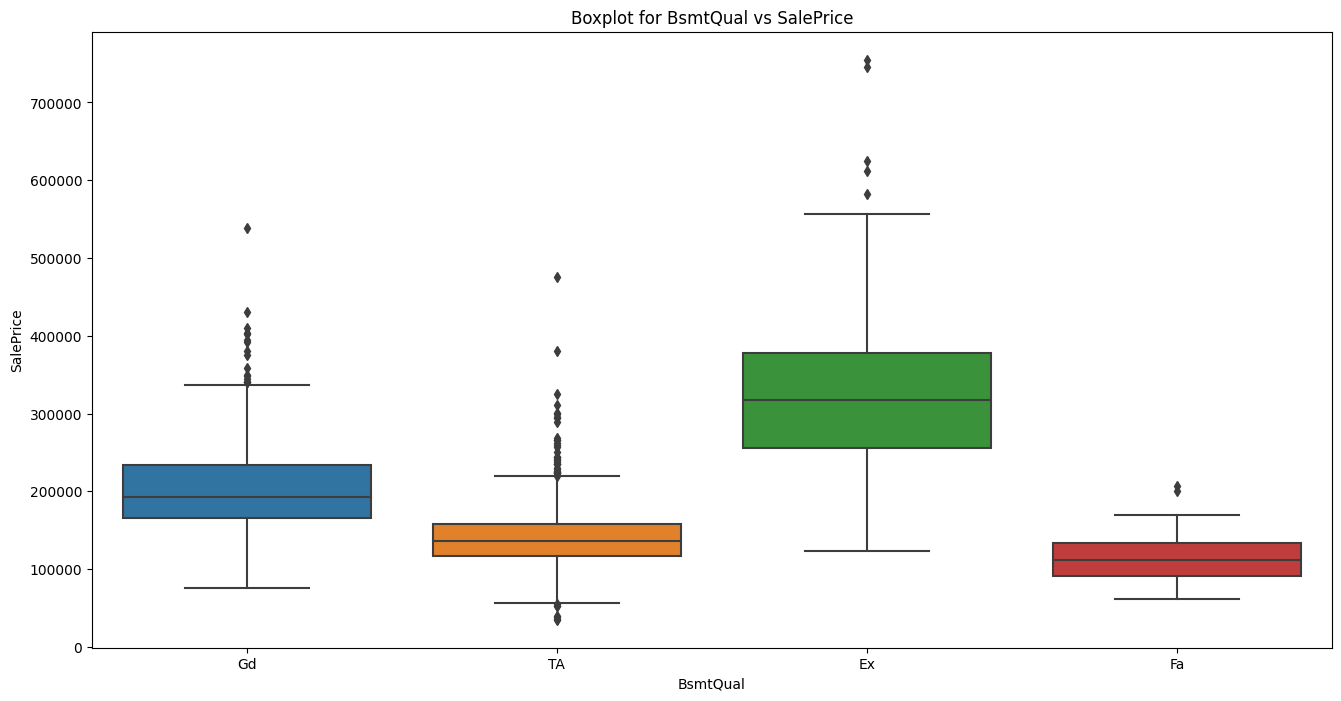

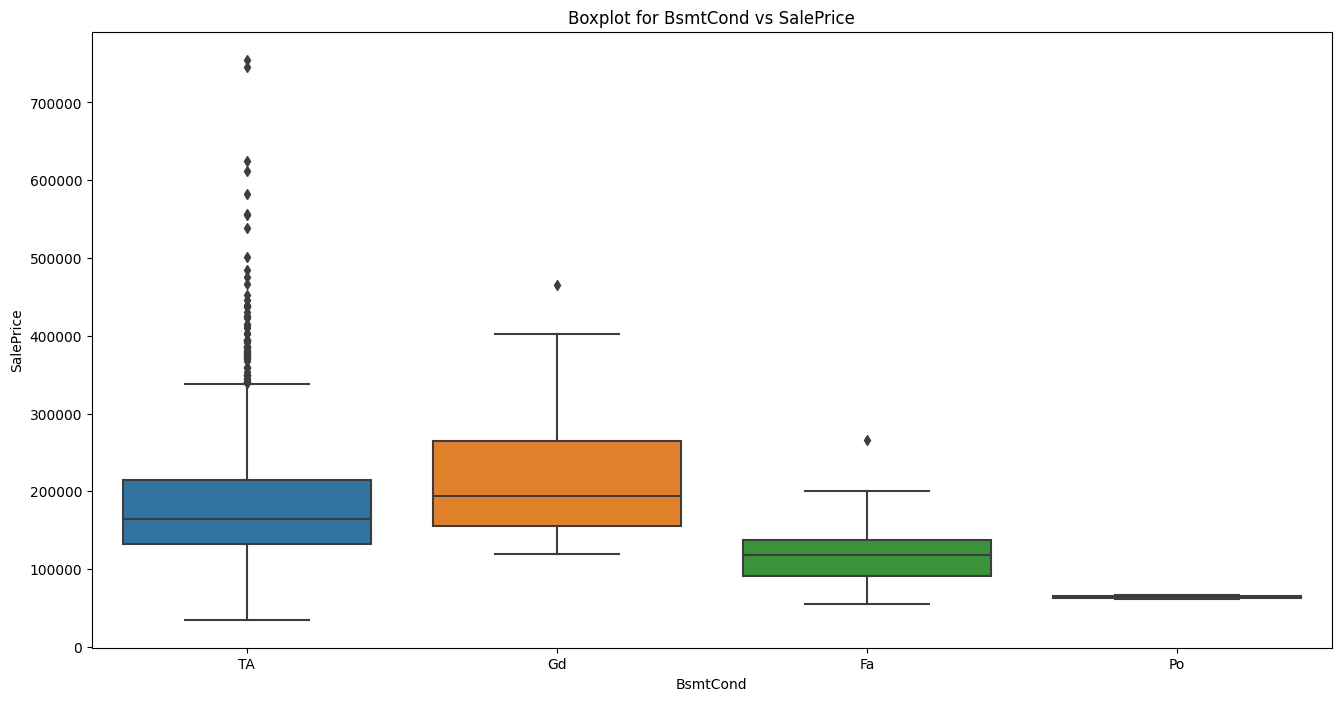

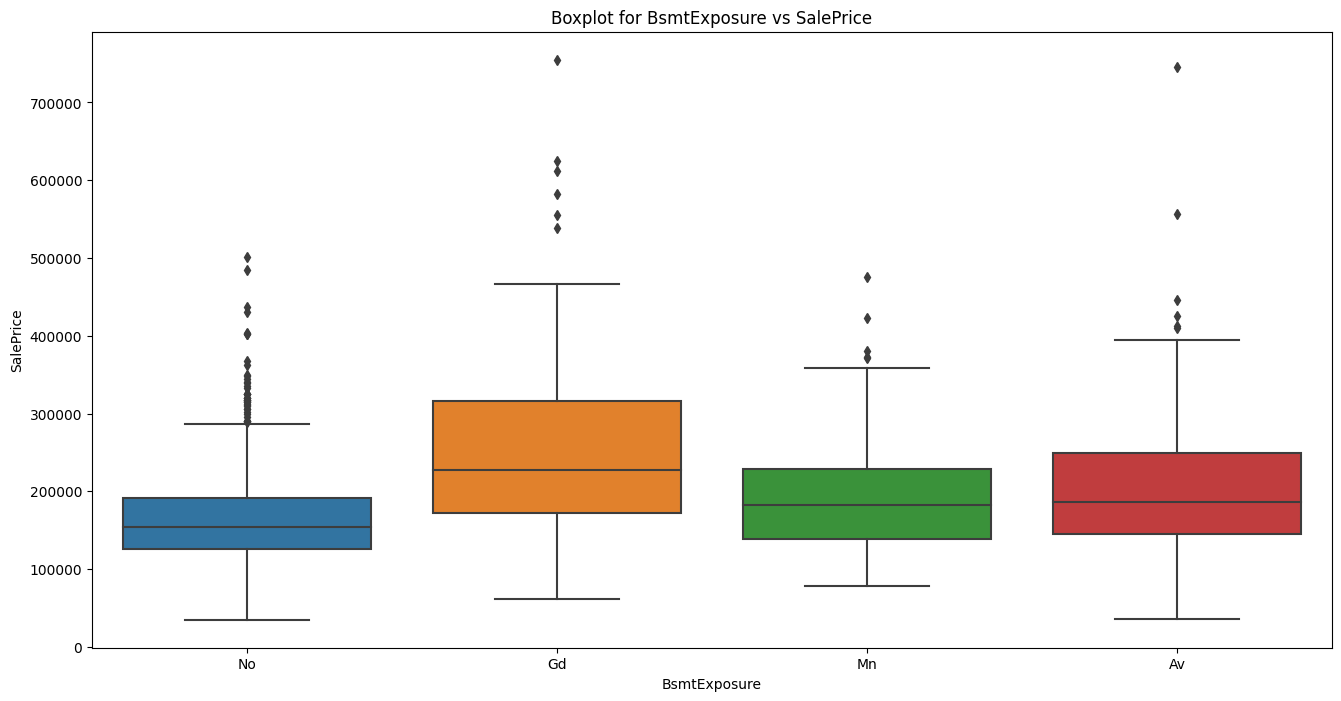

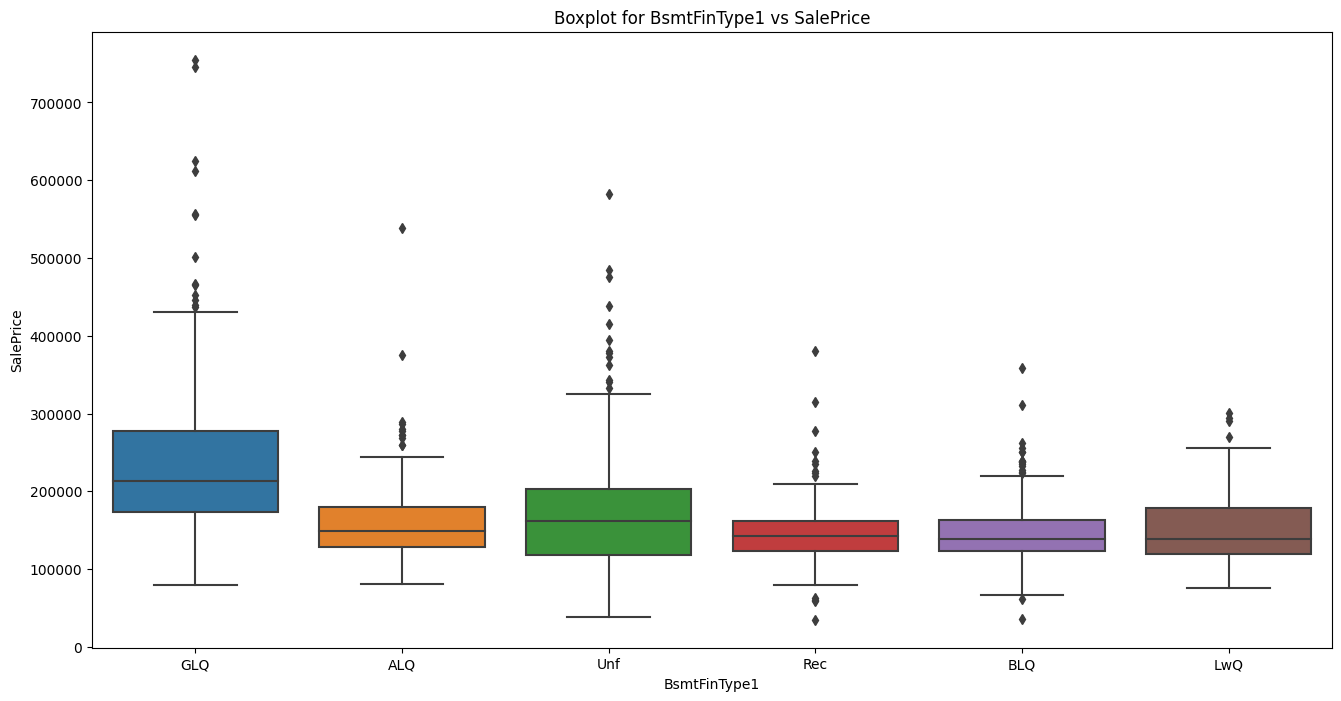

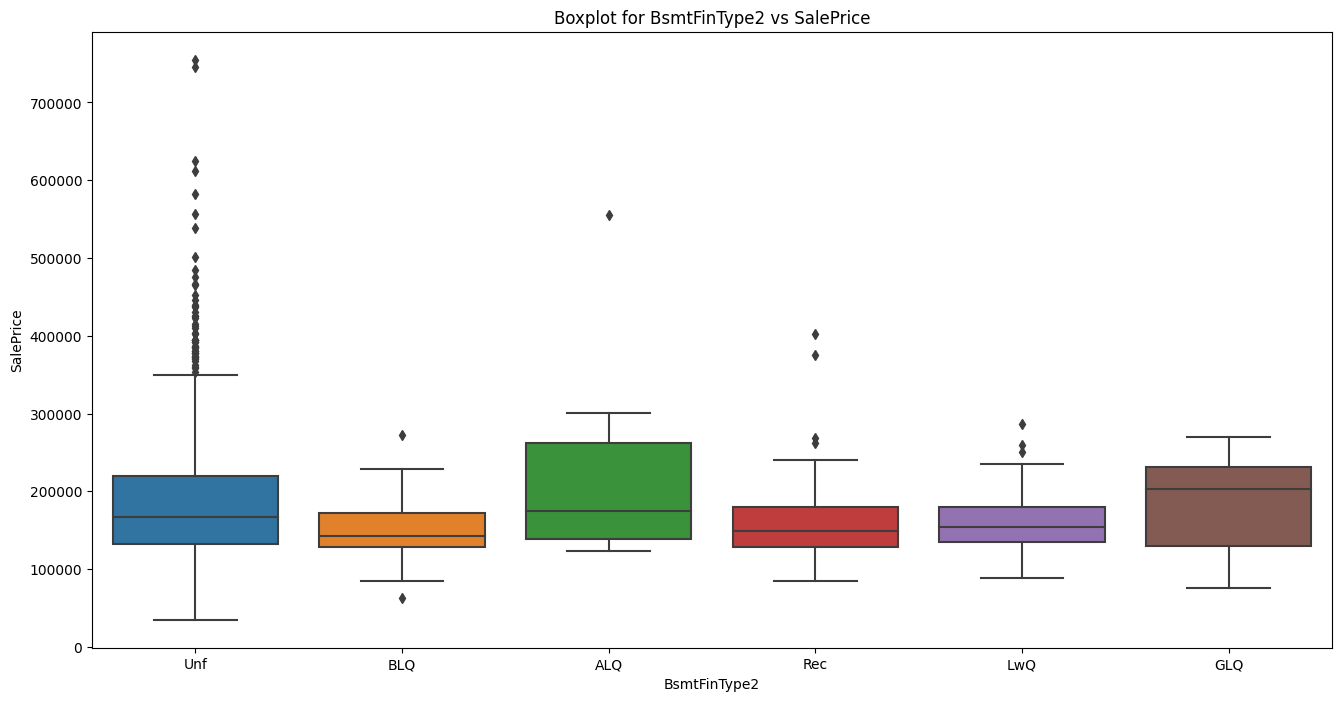

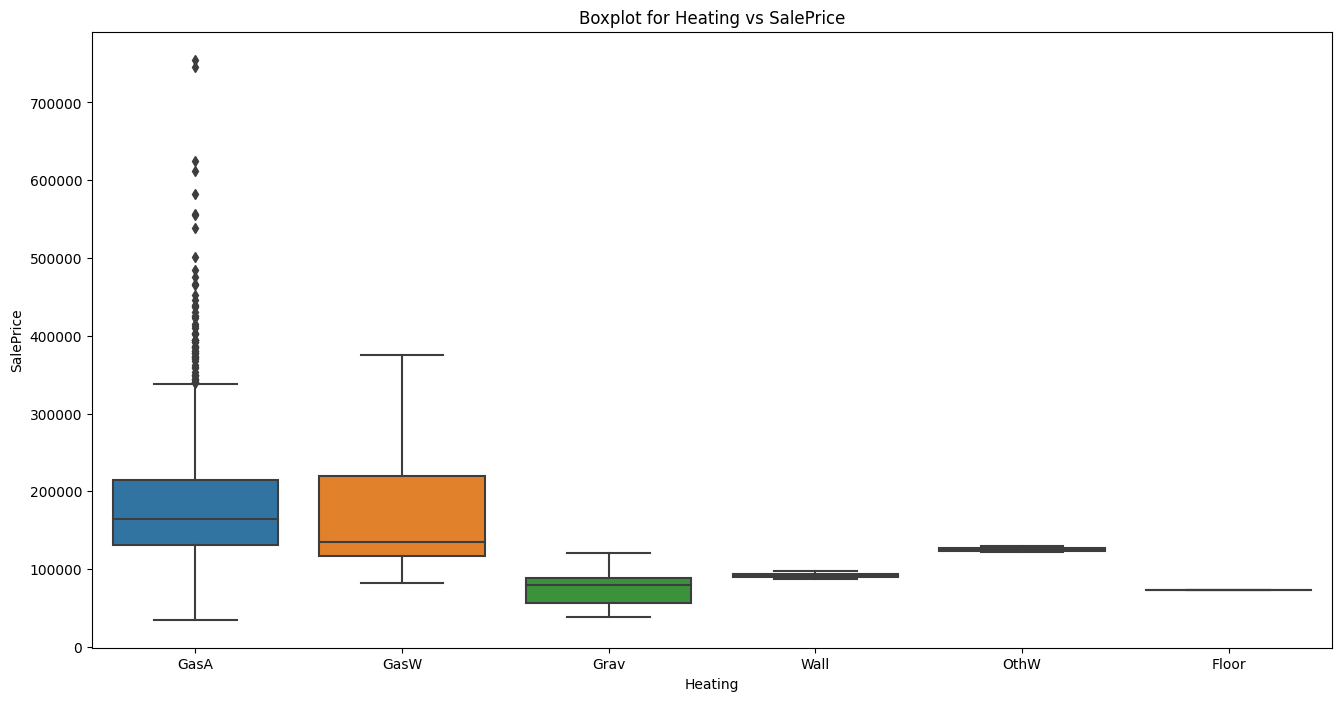

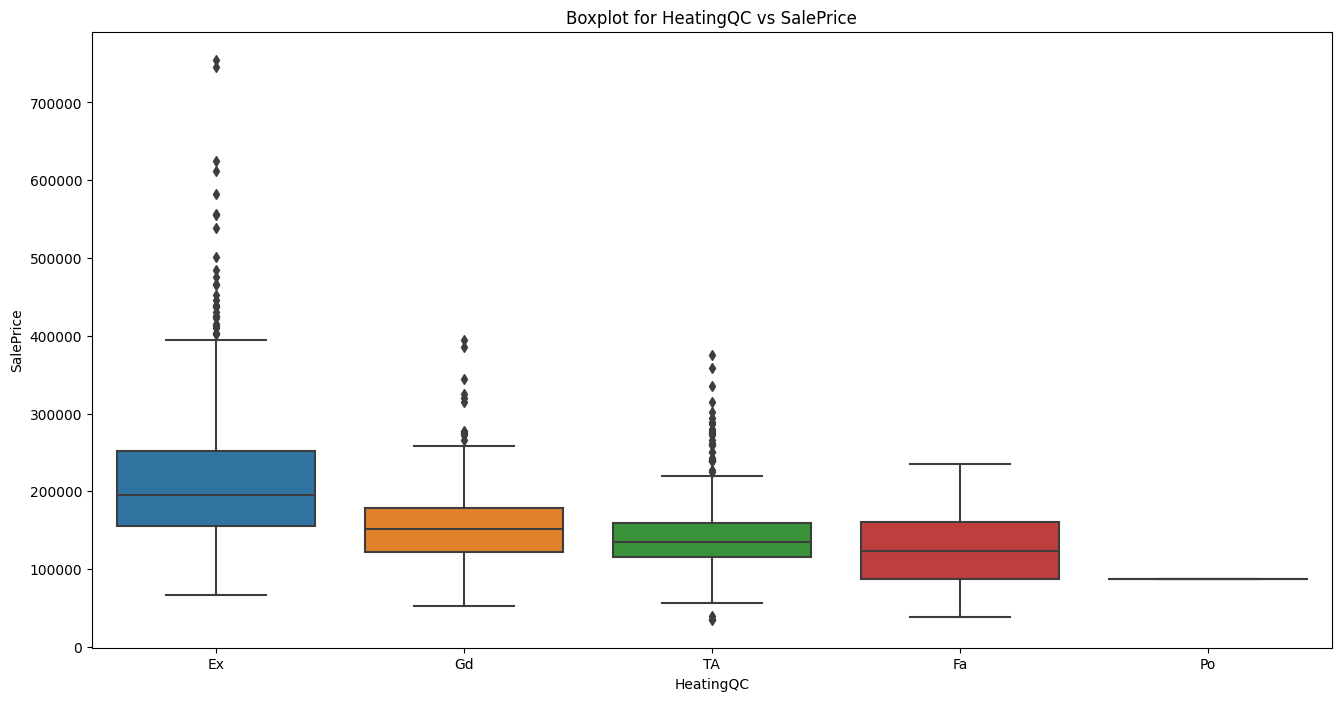

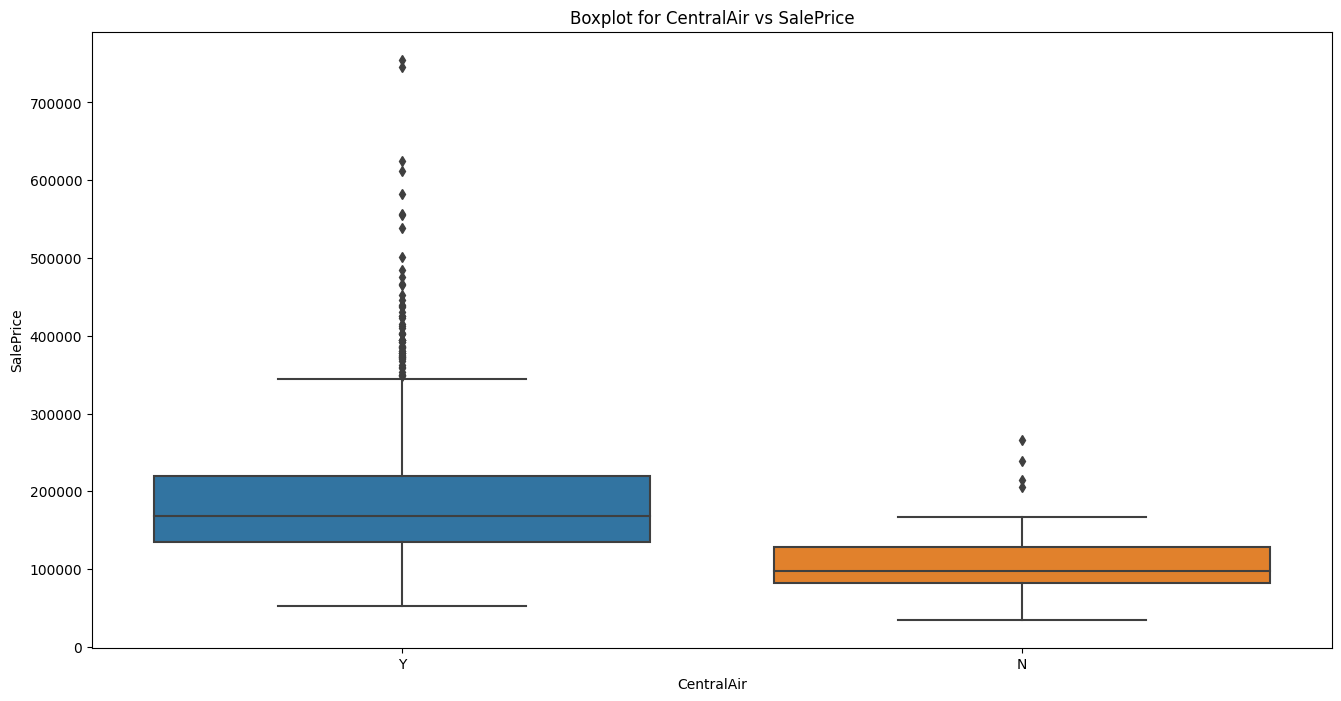

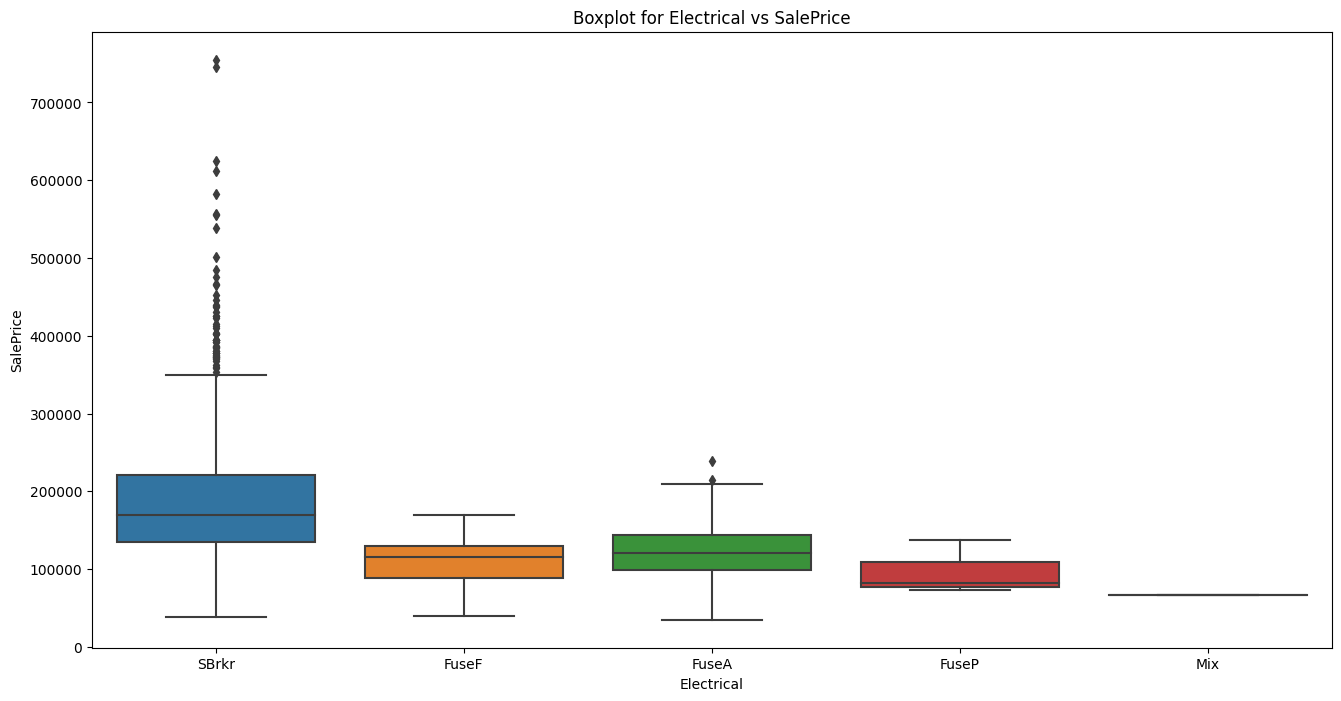

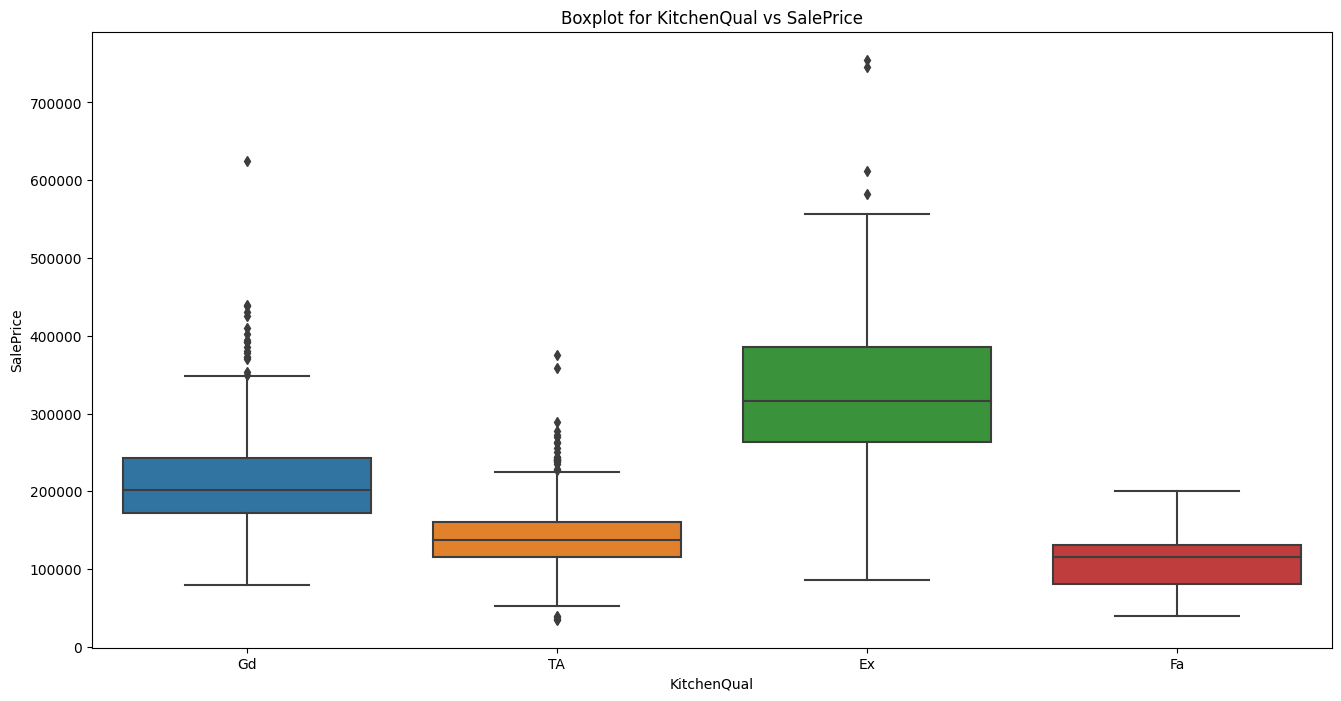

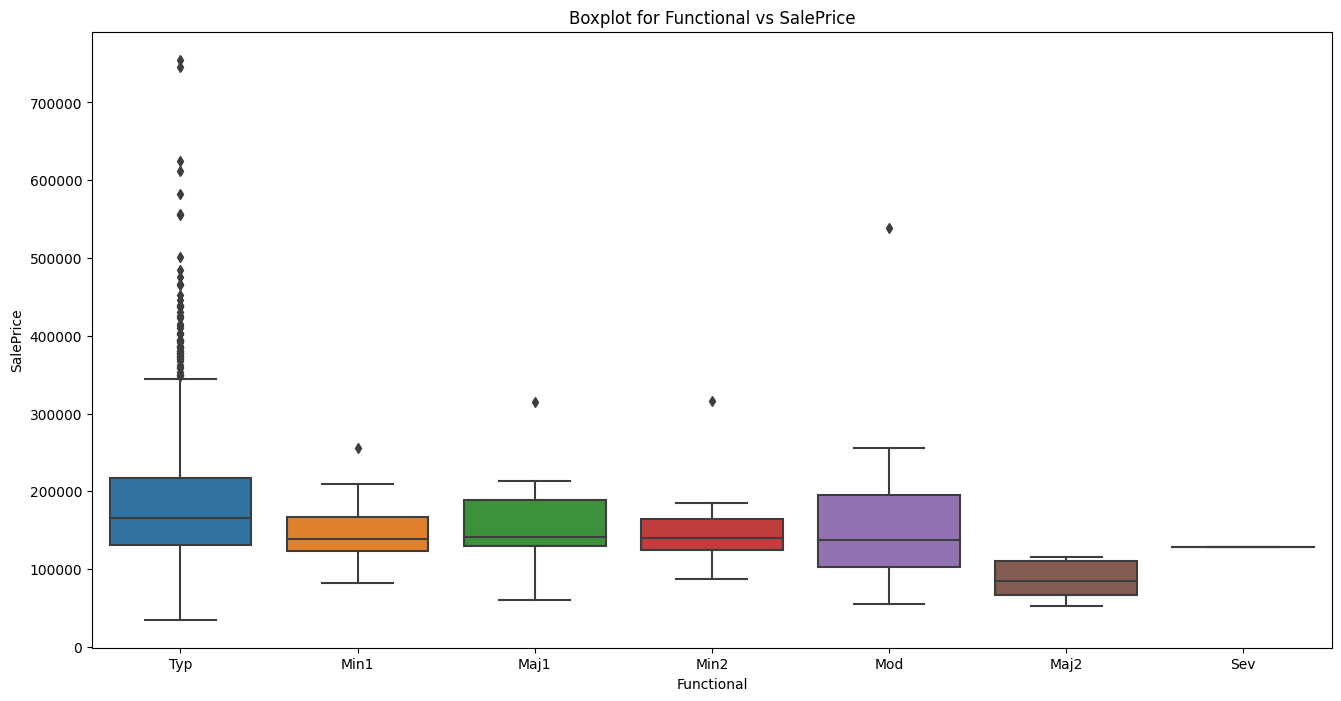

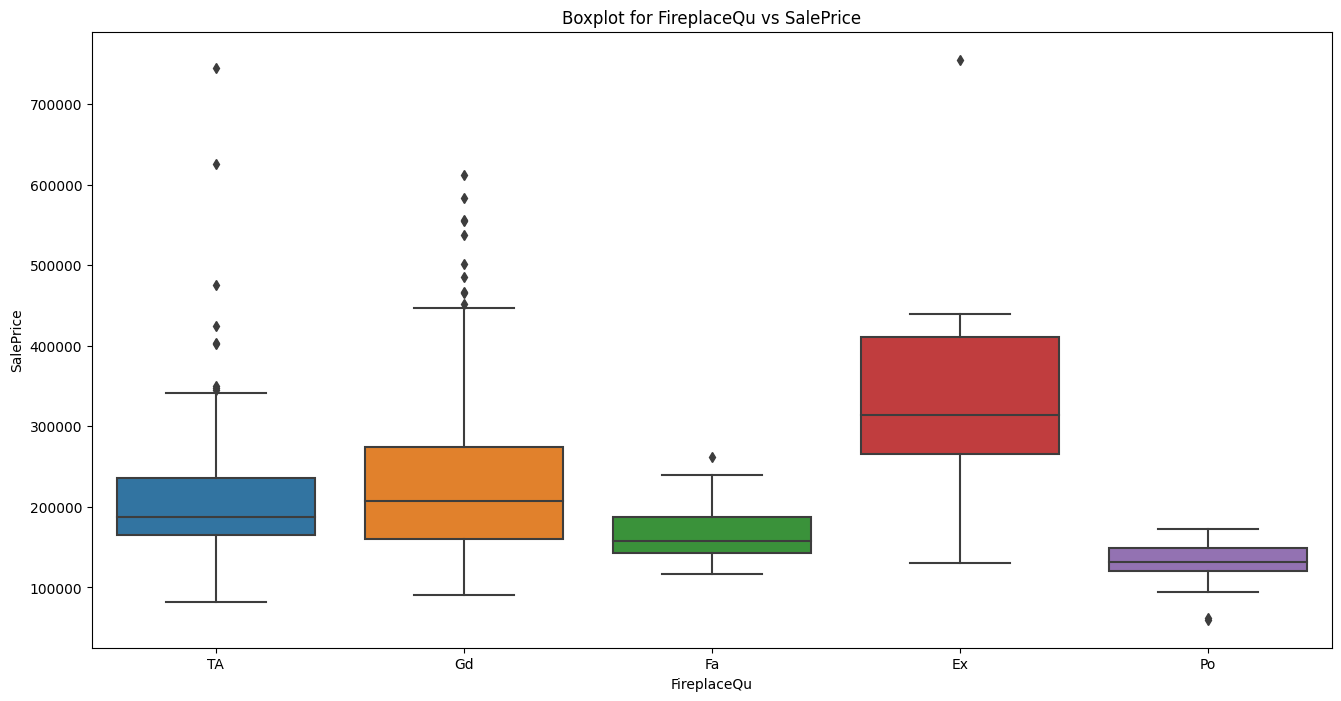

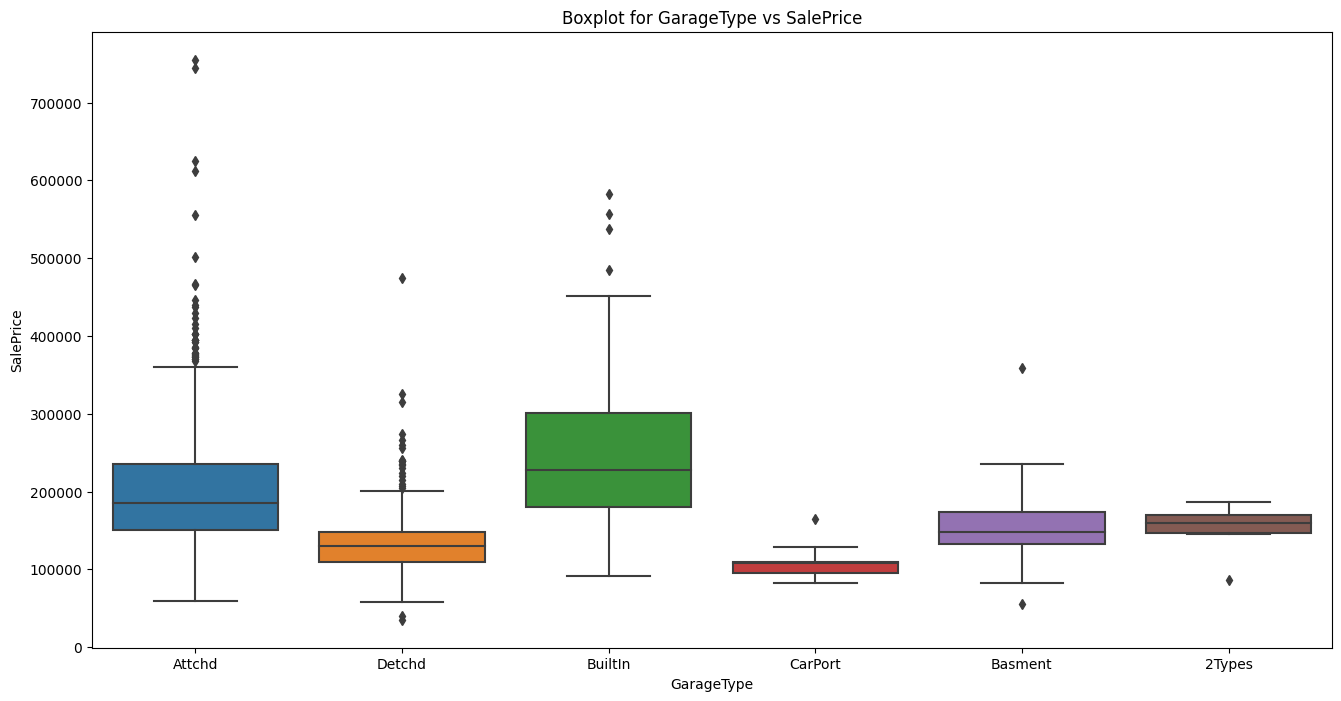

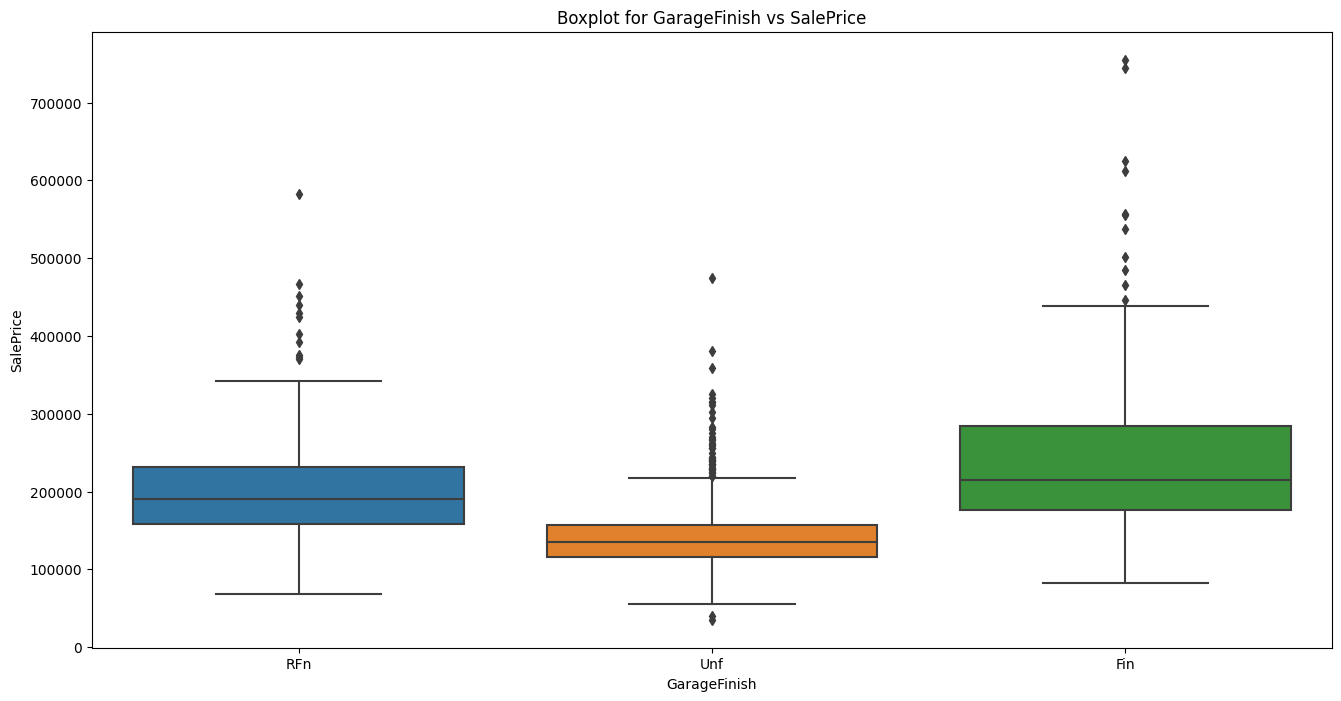

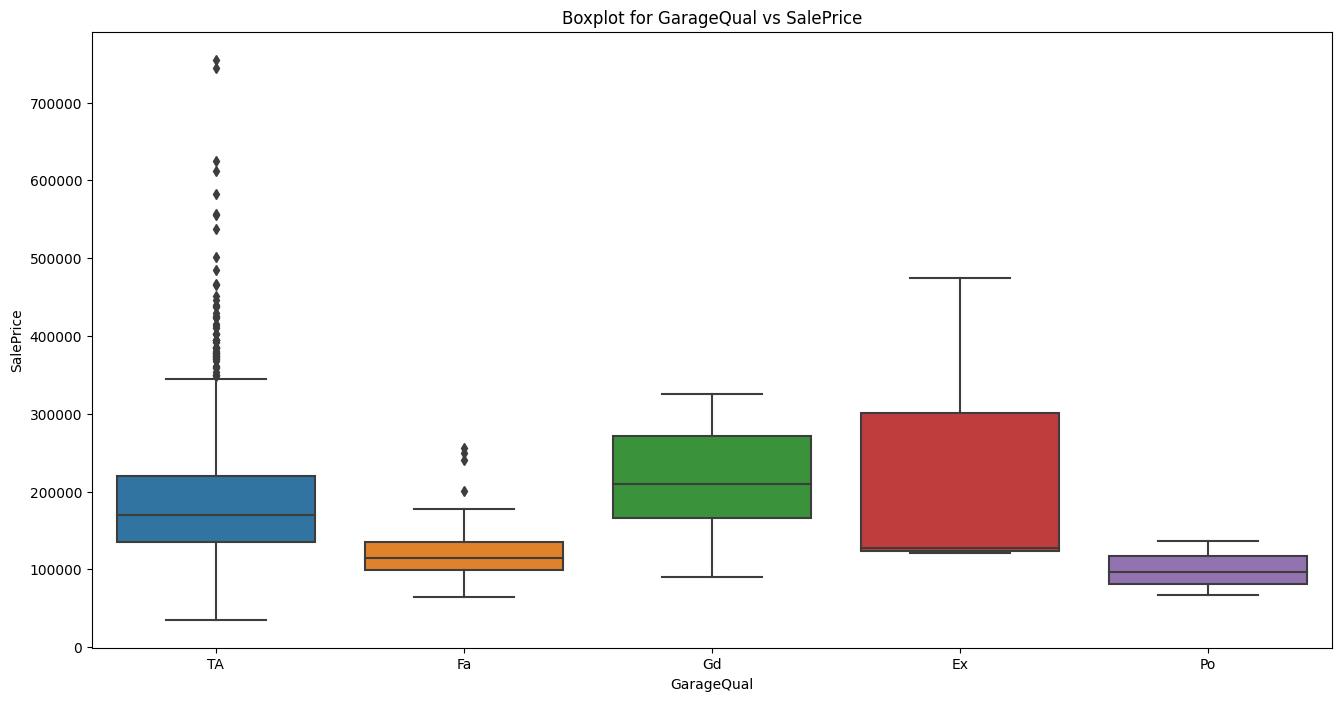

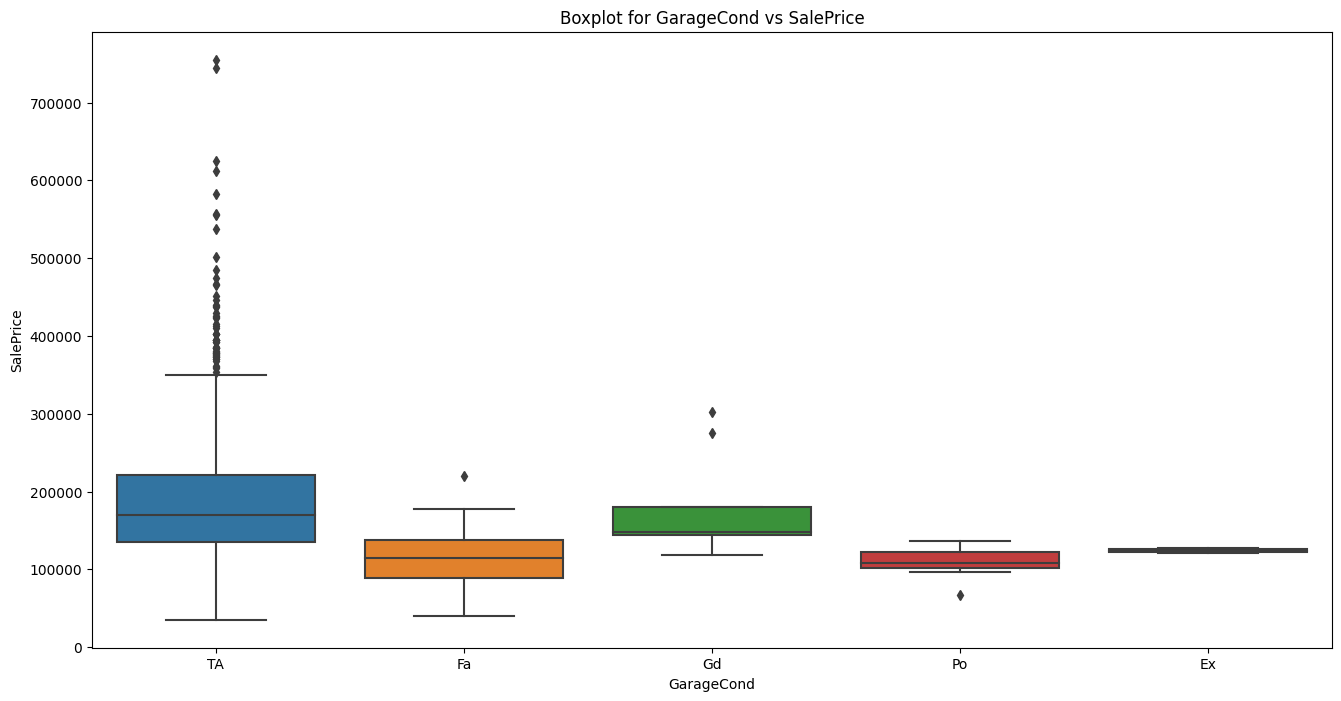

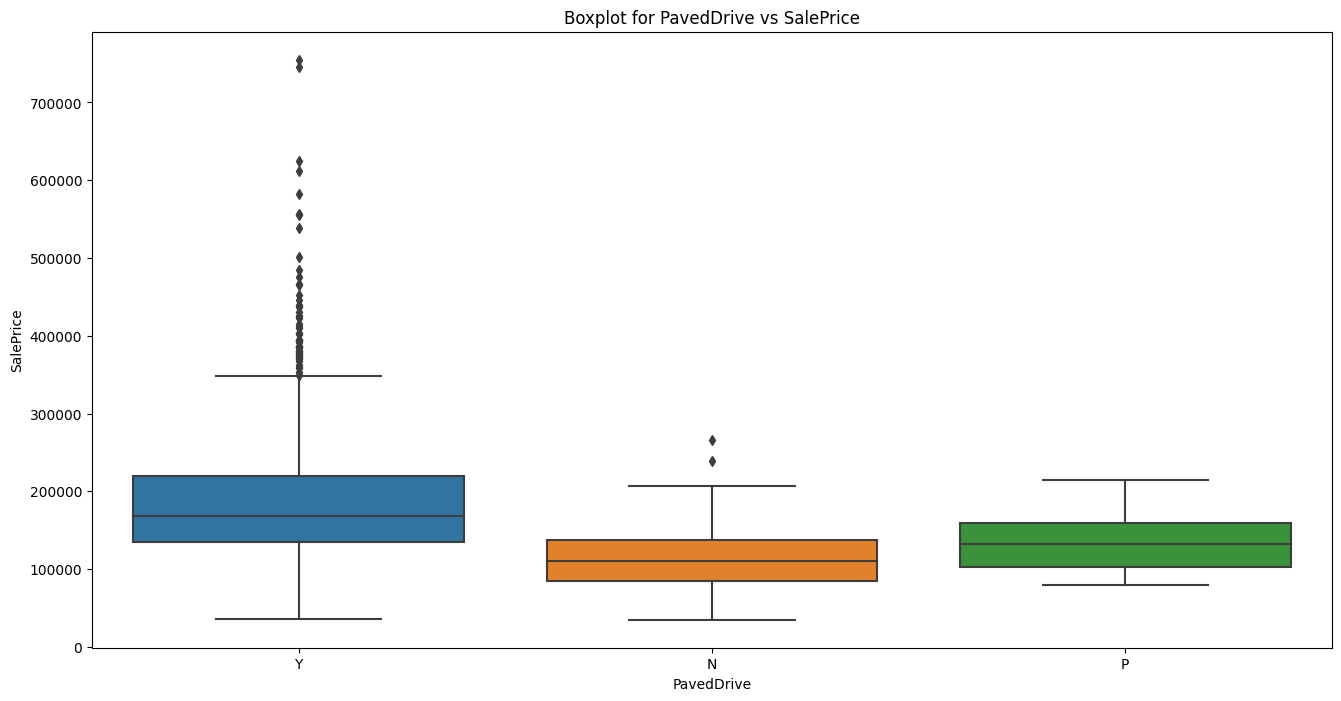

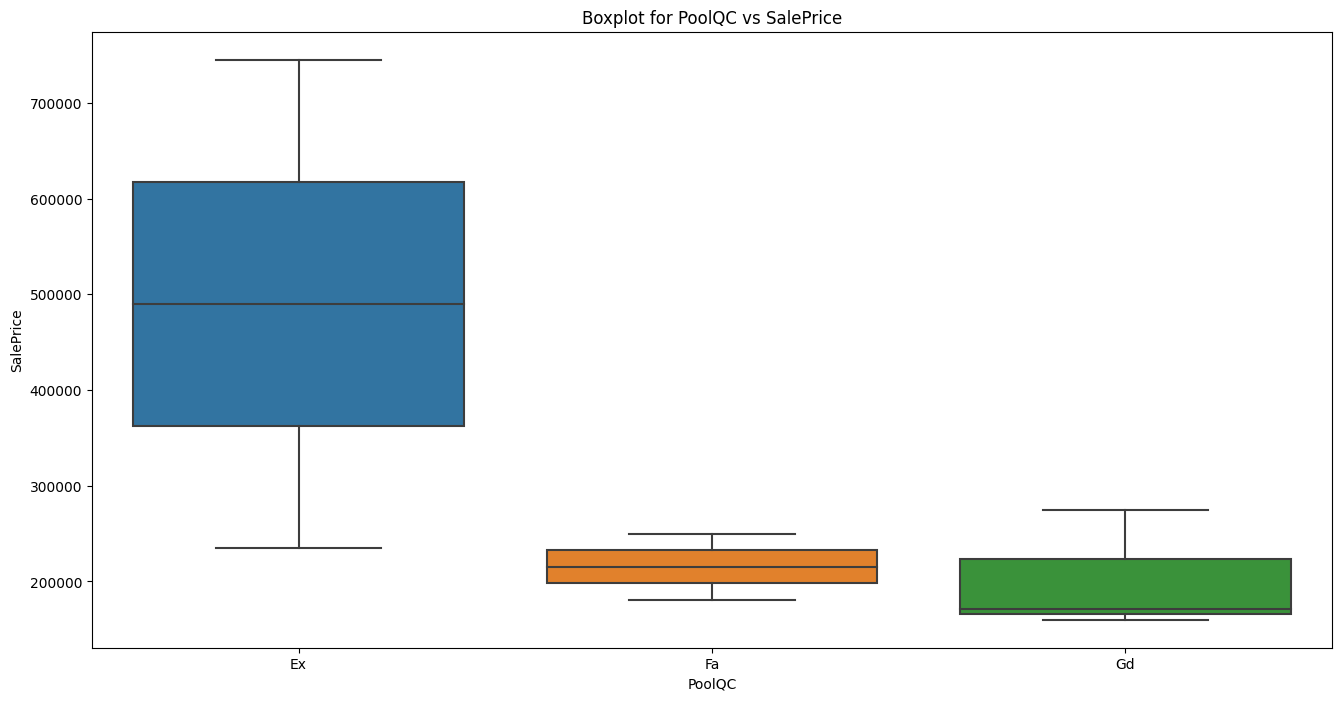

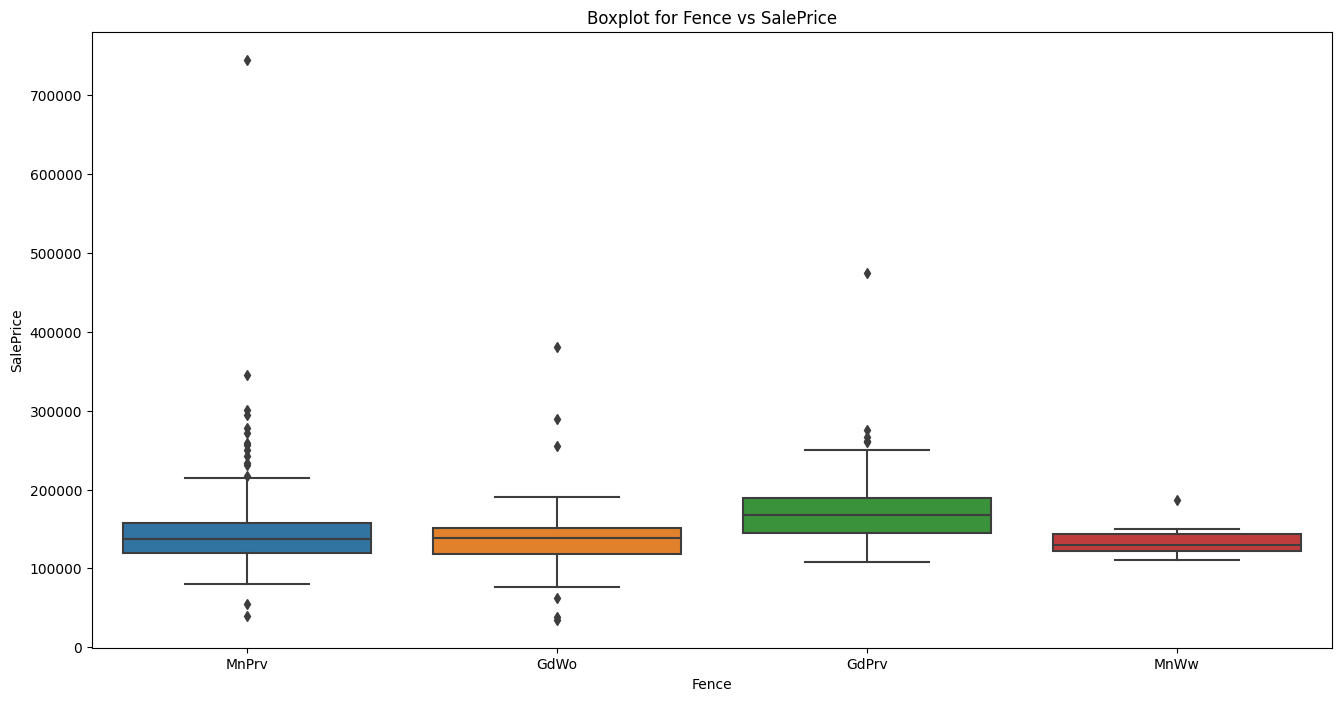

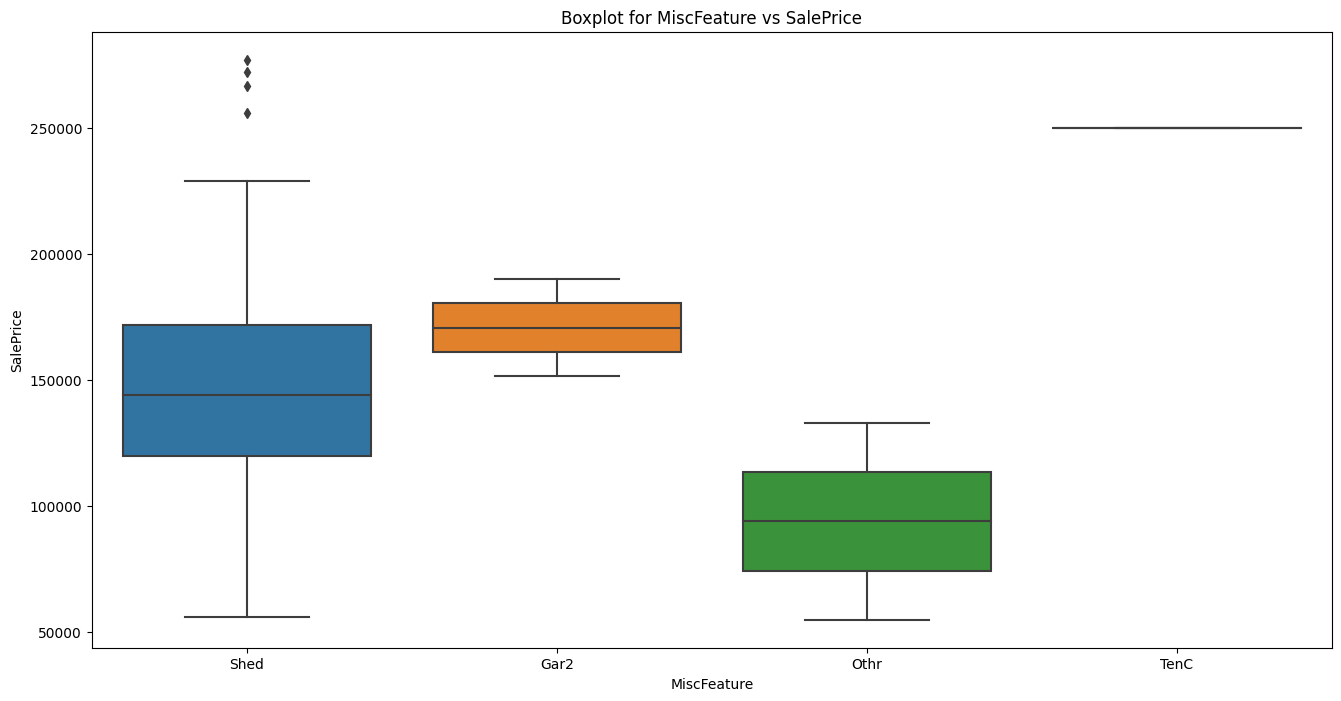

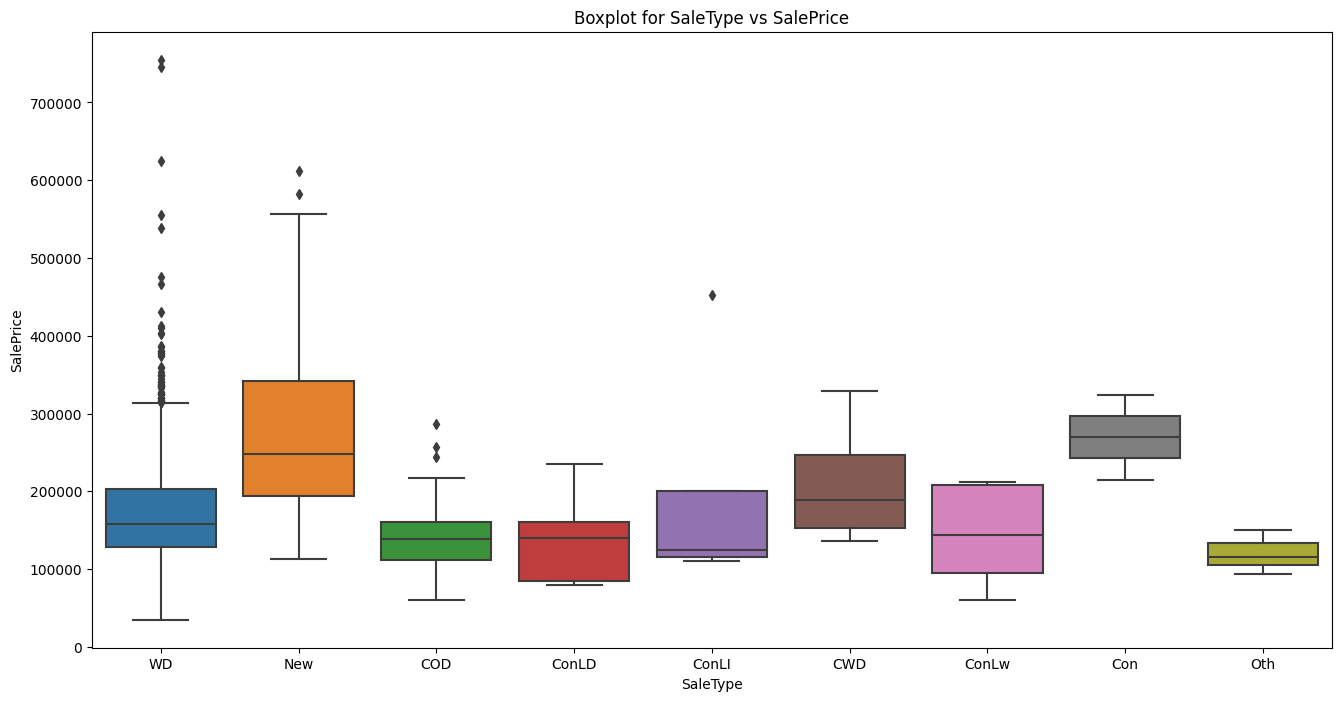

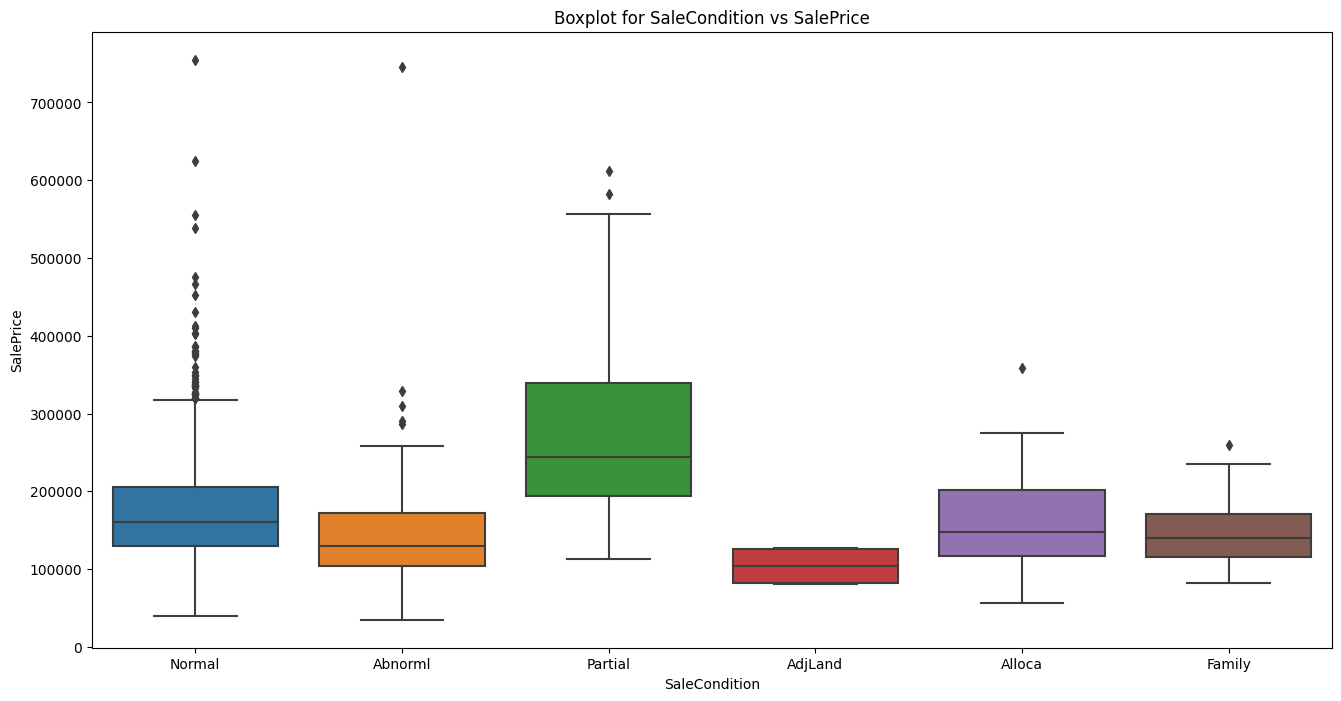

In [17]:
for i in cat:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=df, x=i, y='SalePrice')
    plt.title(f'Boxplot for {i} vs SalePrice')
    plt.show()

### 3. Cat vs Cat = Crosstab

In [18]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:
ctab1 = pd.crosstab(df['ExterQual'], df['ExterCond'])
ctab1

ExterCond  Ex  Fa   Gd  Po   TA
ExterQual                      
Ex          1   0    3   0   48
Fa          0   6    0   0    8
Gd          0   0   35   0  453
TA          2  22  108   1  773

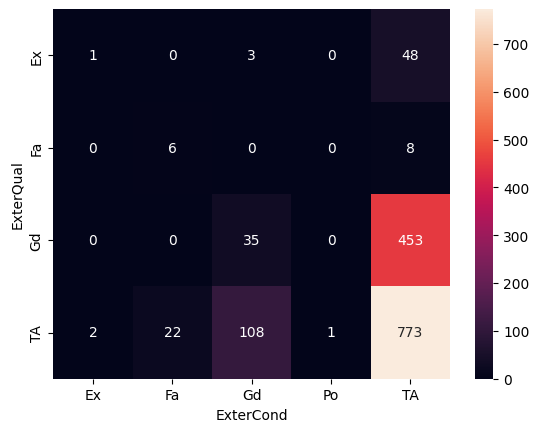

In [20]:
sns.heatmap(ctab1, fmt='d', annot=True)
plt.show()

## Seperate X and Y for machine learning

In [21]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [22]:
X = df.drop(columns=['SalePrice'])
Y = df[['SalePrice']]

In [23]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [24]:
Y.head()

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000

## Seperate Cat and Con for X

In [25]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [26]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

## Create a feature selection pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [29]:
num_pipe1 = Pipeline(steps=[('Impute', SimpleImputer(strategy='median')),
                            ('Scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('Impute', SimpleImputer(strategy='constant', fill_value='NotAvailable')),
                            ('ordinal', OrdinalEncoder())])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)])

In [30]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.07337496, -0.22087509, -0.20714171, ...,  1.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.46031974, -0.09188637, ...,  1.        ,
         8.        ,  4.        ],
       [ 0.07337496, -0.08463612,  0.07347998, ...,  1.        ,
         8.        ,  4.        ],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  3.        ,
         8.        ,  4.        ],
       [-0.87256276, -0.08463612, -0.08016039, ...,  1.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.23325479, -0.05811155, ...,  1.        ,
         8.        ,  4.        ]])

In [31]:
cols = pre1.get_feature_names_out()
cols

array(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat__MSZoning',
       'cat__Street', 'cat__Alley', 'cat__LotShape', 'cat__LandContour',
       'cat__Utilities', 'cat__LotConfig', 'cat__LandSlope',
       'cat__Neighborhood', 'cat__Condition1', 'cat__Condition2',
       'cat__BldgTy

In [32]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0         0.073375         -0.220875     -0.207142          0.651479   
1        -0.872563          0.460320     -0.091886         -0.071836   
2         0.073375         -0.084636      0.073480          0.651479   
3         0.309859         -0.447940     -0.096897          0.651479   
4         0.073375          0.641972      0.375148          1.374795   

   num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0         -0.517200        1.050994           0.878668         0.514104   
1          2.179628        0.156734          -0.429577        -0.570750   
2         -0.517200        0.984752           0.830215         0.325915   
3         -0.517200       -1.863632          -0.720298        -0.570750   
4         -0.517200        0.951632           0.733308         1.366489   

   num__BsmtFinSF1  num__BsmtFinSF2  ...  cat__GarageType  cat__GarageFinish  \
0         0.575425        -0.288653  ...              1.0                2.0   
1         1.171992        -0.288653  ...              1.0                2.0   
2         0.092907        -0.288653  ...              1.0                2.0   
3        -0.499274        -0.288653  ...              5.0                3.0   
4         0.463568        -0.288653  ...              1.0                2.0   

   cat__GarageQual  cat__GarageCond  cat__PavedDrive  cat__PoolQC  cat__Fence  \
0              5.0              5.0              2.0          3.0         4.0   
1              5.0              5.0              2.0          3.0         4.0   
2              5.0              5.0              2.0          3.0         4.0   
3              5.0              5.0              2.0          3.0         4.0   
4              5.0              5.0              2.0          3.0         4.0   

   cat__MiscFeature  cat__SaleType  cat__SaleCondition  
0               1.0            8.0                 4.0  
1               1.0            8.0                 4.0  
2               1.0            8.0                 4.0  
3               1.0            8.0                 0.0  
4               1.0            8.0                 4.0  

[5 rows x 79 columns]

## Perform feature selection with LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [34]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, direction='backward')
sel_features = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtUnfSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__ScreenPorch',
       'num__PoolArea', 'num__YrSold', 'cat__LandContour',
       'cat__Neighborhood', 'cat__BldgType', 'cat__HouseStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__BsmtQual', 'cat__BsmtCond',
       'cat__BsmtExposure', 'cat__BsmtFinType2', 'cat__HeatingQC',
       'cat__KitchenQual', 'cat__Functional', 'cat__GarageFinish',
       'cat__PavedDrive', 'cat__Fence', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [35]:
len(sel_cols)

40

In [36]:
imp_cols=[]
for i in sel_cols:
    col = i.split('__')[1]
    imp_cols.append(col)

In [37]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleCondition']

In [38]:
X_sel = X[imp_cols]

In [39]:
X_sel

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
0             60     8450            7            5       2003       196.0   
1             20     9600            6            8       1976         0.0   
2             60    11250            7            5       2001       162.0   
3             70     9550            7            5       1915         0.0   
4             60    14260            8            5       2000       350.0   
...          ...      ...          ...          ...        ...         ...   
1455          60     7917            6            5       1999         0.0   
1456          20    13175            6            6       1978       119.0   
1457          70     9042            7            9       1941         0.0   
1458          20     9717            5            6       1950         0.0   
1459          20     9937            5            6       1965         0.0   

      BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  BsmtExposure  \
0           150       856       854             0  ...            No   
1           284      1262         0             0  ...            Gd   
2           434       920       866             0  ...            Mn   
3           540       961       756             0  ...            No   
4           490      1145      1053             0  ...            Av   
...         ...       ...       ...           ...  ...           ...   
1455        953       953       694             0  ...            No   
1456        589      2073         0             0  ...            No   
1457        877      1188      1152             0  ...            No   
1458          0      1078         0             0  ...            Mn   
1459        136      1256         0             0  ...            No   

      BsmtFinType2  HeatingQC  KitchenQual  Functional  GarageFinish  \
0              Unf         Ex           Gd         Typ           RFn   
1              Unf         Ex           TA         Typ           RFn   
2              Unf         Ex           Gd         Typ           RFn   
3              Unf         Gd           Gd         Typ           Unf   
4              Unf         Ex           Gd         Typ           RFn   
...            ...        ...          ...         ...           ...   
1455           Unf         Ex           TA         Typ           RFn   
1456           Rec         TA           TA        Min1           Unf   
1457           Unf         Ex           Gd         Typ           RFn   
1458           Rec         Gd           Gd         Typ           Unf   
1459           LwQ         Gd           TA         Typ           Fin   

      PavedDrive  Fence  MiscFeature  SaleCondition  
0              Y    NaN          NaN         Normal  
1              Y    NaN          NaN         Normal  
2              Y    NaN          NaN         Normal  
3              Y    NaN          NaN        Abnorml  
4              Y    NaN          NaN         Normal  
...          ...    ...          ...            ...  
1455           Y    NaN          NaN         Normal  
1456           Y  MnPrv          NaN         Normal  
1457           Y  GdPrv         Shed         Normal  
1458           Y    NaN          NaN         Normal  
1459           Y    NaN          NaN         Normal  

[1460 rows x 40 columns]

## Create a final pipeline

In [40]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [41]:
cat_sel

['LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleCondition']

In [42]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvailable')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [45]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.07337496, -0.20714171,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.09188637, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.07347998,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.08016039, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.05811155, -0.79515147, ...,  0.        ,
         1.        ,  0.        ]])

In [46]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtUnfSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__ScreenPorch',
       'num__PoolArea', 'num__YrSold', 'cat__LandContour_Bnk',
       'cat__LandContour_HLS', 'cat__LandContour_Low',
       'cat__LandContour_Lvl', 'cat__Neighborhood_Blmngtn',
       'cat__Neighborhood_Blueste', 'cat__Neighborhood_BrDale',
       'cat__Neighborhood_BrkSide', 'cat__Neighborhood_ClearCr',
       'cat__Neighborhood_CollgCr', 'cat__Neighborhood_Crawfor',
       'cat__Neighborhood_Edwards', 'cat__Neighborhood_Gilbert',
       'cat__Neighborhood_IDOTRR', 'cat__Neighborhood_MeadowV',
       'cat__Neighborhood_Mitchel', 'cat__Neighborhood_NAmes',
       'cat__Neighborhood_NPkVill', 'cat__Neighborh

In [47]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0         0.073375     -0.207142          0.651479         -0.517200   
1        -0.872563     -0.091886         -0.071836          2.179628   
2         0.073375      0.073480          0.651479         -0.517200   
3         0.309859     -0.096897          0.651479         -0.517200   
4         0.073375      0.375148          1.374795         -0.517200   

   num__YearBuilt  num__MasVnrArea  num__BsmtUnfSF  num__1stFlrSF  \
0        1.050994         0.514104       -0.944591      -0.793434   
1        0.156734        -0.570750       -0.641228       0.257140   
2        0.984752         0.325915       -0.301643      -0.627826   
3       -1.863632        -0.570750       -0.061670      -0.521734   
4        0.951632         1.366489       -0.174865      -0.045611   

   num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvailable  \
0       1.161852          -0.120242  ...                            1.0   
1      -0.795163          -0.120242  ...                            1.0   
2       1.189351          -0.120242  ...                            1.0   
3       0.937276          -0.120242  ...                            1.0   
4       1.617877          -0.120242  ...                            1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         1.0                         0.0   
4                         0.0                         0.0   

   cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   cat__SaleCondition_Normal  cat__SaleCondition_Partial  
0                        1.0                         0.0  
1                        1.0                         0.0  
2                        1.0                         0.0  
3                        0.0                         0.0  
4                        1.0                         0.0  

[5 rows x 155 columns]

## Train Test Split

In [64]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [65]:
xtrain.shape

(1168, 155)

In [66]:
xtest.shape

(292, 155)

## Check performance of Linear Regression

In [67]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [68]:
model.score(xtrain, ytrain)

0.9073957513283171

In [69]:
model.score(xtest, ytest)

-1.3531404299177634e+19

In [70]:
from PM6func import evaluate_model
evaluate_model(xtrain, ytrain, xtest, ytest, model)

Training Results : 
MSE : 552342706.58
RMSE: 23501.97
MAE : 14803.12
R2  : 0.9074


Testing Results : 
MSE : 103790285016026741963241816064.00
RMSE: 322164996571674.06
MAE : 29032969540602.74
R2  : -13531404299177633792.0000


## Apply Ridge with Cross Validation

In [71]:
import numpy as np
params ={'alpha':np.arange(0.1, 100, 0.1)}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [72]:
rr = Ridge()
gscv1 = GridSearchCV(rr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [79]:
gscv1.best_params_

{'alpha': 1.0}

In [80]:
gscv1.best_score_

-1027488194.9064734

In [81]:
best_ridge = gscv1.best_estimator_
best_ridge

Ridge()

In [77]:
best_ridge.score(xtrain, ytrain)

0.8987908280573724

In [78]:
best_ridge.score(xtest, ytest)

0.8869488477929091

In [82]:
evaluate_model(xtrain,ytrain, xtest, ytest, best_ridge)

Training Results : 
MSE : 603667204.95
RMSE: 24569.64
MAE : 15392.36
R2  : 0.8988


Testing Results : 
MSE : 867139215.53
RMSE: 29447.23
MAE : 18399.46
R2  : 0.8869


## Apply on Lasso model

In [83]:
from sklearn.linear_model import Lasso

In [91]:
params2 =  {'alpha':np.arange(90, 110, 0.1)}
params2

{'alpha': array([ 90. ,  90.1,  90.2,  90.3,  90.4,  90.5,  90.6,  90.7,  90.8,
         90.9,  91. ,  91.1,  91.2,  91.3,  91.4,  91.5,  91.6,  91.7,
         91.8,  91.9,  92. ,  92.1,  92.2,  92.3,  92.4,  92.5,  92.6,
         92.7,  92.8,  92.9,  93. ,  93.1,  93.2,  93.3,  93.4,  93.5,
         93.6,  93.7,  93.8,  93.9,  94. ,  94.1,  94.2,  94.3,  94.4,
         94.5,  94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,
         95.4,  95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,
         96.3,  96.4,  96.5,  96.6,  96.7,  96.8,  96.9,  97. ,  97.1,
         97.2,  97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,
         98.1,  98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,
         99. ,  99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,
         99.9, 100. , 100.1, 100.2, 100.3, 100.4, 100.5, 100.6, 100.7,
        100.8, 100.9, 101. , 101.1, 101.2, 101.3, 101.4, 101.5, 101.6,
        101.7, 101.8, 101.9, 102. , 102.1, 102.2, 102.3, 102.4, 102.

In [92]:
ls=Lasso()
gscv2 = GridSearchCV(ls, param_grid=params2, cv=5, scoring='neg_mean_squared_error')
gscv2.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 90. ,  90.1,  90.2,  90.3,  90.4,  90.5,  90.6,  90.7,  90.8,
        90.9,  91. ,  91.1,  91.2,  91.3,  91.4,  91.5,  91.6,  91.7,
        91.8,  91.9,  92. ,  92.1,  92.2,  92.3,  92.4,  92.5,  92.6,
        92.7,  92.8,  92.9,  93. ,  93.1,  93.2,  93.3,  93.4,  93.5,
        93.6,  93.7,  93.8,  93.9,  94. ,  94.1,  94.2,  94.3,  94.4,
        94.5,  94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,
        95.4,  95.5,  95.6,  95.7,  95....
       104.4, 104.5, 104.6, 104.7, 104.8, 104.9, 105. , 105.1, 105.2,
       105.3, 105.4, 105.5, 105.6, 105.7, 105.8, 105.9, 106. , 106.1,
       106.2, 106.3, 106.4, 106.5, 106.6, 106.7, 106.8, 106.9, 107. ,
       107.1, 107.2, 107.3, 107.4, 107.5, 107.6, 107.7, 107.8, 107.9,
       108. , 108.1, 108.2, 108.3, 108.4, 108.5, 108.6, 108.7, 108.8,
       108.9, 109. , 109.1, 109.2, 109.3, 109.4, 109.5, 109.6, 109.7,
       109.8, 109.9])},
             scoring='neg_mean_squared_error')

In [93]:
gscv2.best_params_

{'alpha': 96.59999999999962}

In [94]:
gscv2.best_score_

-992718755.99277

In [95]:
best_lasso = gscv2.best_estimator_
best_lasso

Lasso(alpha=96.59999999999962)

In [96]:
best_lasso.score(xtrain,ytrain)

0.8990902302277202

In [98]:
best_lasso.score(xtest, ytest)

0.8907761792820501

In [100]:
evaluate_model(xtrain, ytrain, xtest, ytest, best_lasso)

Training Results : 
MSE : 601881405.62
RMSE: 24533.27
MAE : 15400.60
R2  : 0.8991


Testing Results : 
MSE : 837782334.50
RMSE: 28944.47
MAE : 17462.91
R2  : 0.8908


## Select best_lasso model for final prediction

## Read sample csv for prediction

In [101]:
xnew = pd.read_csv('sample_set.csv')
xnew.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [102]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [103]:
b = xnew.isna().sum()
b[b>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## preprocess the new data

In [105]:
xnew_pre =pre2.transform(xnew).toarray()
xnew_pre

array([[-0.87256276,  0.11076257, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.37584985, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.33205282, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87256276,  0.95042275, -0.79515147, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66458604, -0.00759964, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.08918038,  0.65147924, ...,  0.        ,
         1.        ,  0.        ]])

In [106]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0        -0.872563      0.110763         -0.795151          0.381743   
1        -0.872563      0.375850         -0.071836          0.381743   
2         0.073375      0.332053         -0.795151         -0.517200   
3         0.073375     -0.054002         -0.071836          0.381743   
4         1.492282     -0.552407          1.374795         -0.517200   

   num__YearBuilt  num__MasVnrArea  num__BsmtUnfSF  num__1stFlrSF  \
0       -0.340077        -0.570750       -0.672923      -0.689929   
1       -0.439440         0.027027       -0.365032       0.430511   
2        0.852269        -0.570750       -0.974021      -0.607125   
3        0.885390        -0.460051       -0.550672      -0.612300   
4        0.686666        -0.570750        1.018211       0.303718   

   num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvailable  \
0      -0.795163          -0.120242  ...                            1.0   
1      -0.795163          -0.120242  ...                            0.0   
2       0.811239          -0.120242  ...                            1.0   
3       0.758532          -0.120242  ...                            1.0   
4      -0.795163          -0.120242  ...                            1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   cat__SaleCondition_Normal  cat__SaleCondition_Partial  
0                        1.0                         0.0  
1                        1.0                         0.0  
2                        1.0                         0.0  
3                        1.0                         0.0  
4                        1.0                         0.0  

[5 rows x 155 columns]

## Predict Sale Price with best lasso

In [107]:
preds = best_lasso.predict(xnew_pre)
preds

array([112487.53077838, 150018.40238819, 167375.08947202, ...,
       168962.82892337, 110425.1658202 , 216320.23483482])

In [110]:
df_final = xnew[['Id']]
df_final

Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]

In [111]:
df_final['SalePrice'] =preds
df_final

Id      SalePrice
0     1461  112487.530778
1     1462  150018.402388
2     1463  167375.089472
3     1464  184335.156660
4     1465  219548.799446
...    ...            ...
1454  2915   85183.055813
1455  2916   74866.451575
1456  2917  168962.828923
1457  2918  110425.165820
1458  2919  216320.234835

[1459 rows x 2 columns]

In [112]:
df_final['SalePrice'] = df_final['SalePrice'].apply(round, args=(2,))

In [113]:
df_final

Id  SalePrice
0     1461  112487.53
1     1462  150018.40
2     1463  167375.09
3     1464  184335.16
4     1465  219548.80
...    ...        ...
1454  2915   85183.06
1455  2916   74866.45
1456  2917  168962.83
1457  2918  110425.17
1458  2919  216320.23

[1459 rows x 2 columns]

## Saving this file in CSV format

In [114]:
df_final.to_csv('HousePricePreds.csv', index=False)

## Plot histogram for predicted values

<Axes: xlabel='SalePrice', ylabel='Count'>

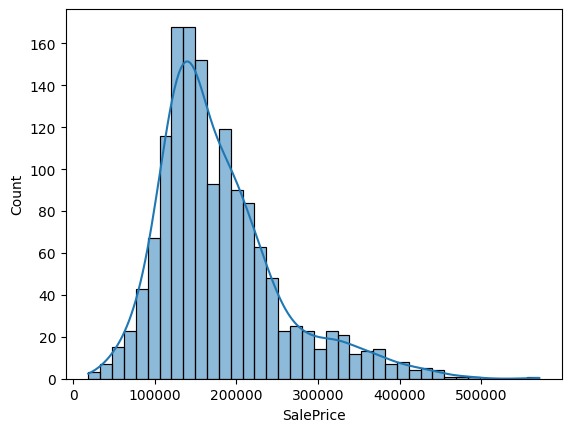

In [115]:
sns.histplot(data=df_final, x='SalePrice', kde=True)